In [1]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Embedding

model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32))
model.summary()

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 32)                2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [2]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, None, 32)          2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [3]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32))
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_5 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_6 (SimpleRNN)     (None, 32)                2080      
Total params: 328,320
Trainable params: 328,320
Non-trainable params: 0
_________________________________________________________________


In [5]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000
max_len = 500
batch_size = 32

print('loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), ' train sequences')
print(len(x_test), ' test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=max_len)
x_test = sequence.pad_sequences(x_test, maxlen=max_len)
print('input_train shape: ', x_train.shape)
print('input_test shape: ', x_test.shape)


loading data...


25000  train sequences
25000  test sequences
Pad sequences (samples x time)


input_train shape:  (25000, 500)
input_test shape:  (25000, 500)


In [6]:
from keras.layers import Dense

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)


Train on 20000 samples, validate on 5000 samples
Epoch 1/10


  128/20000 [..............................] - ETA: 4:41 - loss: 0.6977 - acc: 0.4453

  256/20000 [..............................] - ETA: 2:34 - loss: 0.6998 - acc: 0.4961

  384/20000 [..............................] - ETA: 1:48 - loss: 0.6984 - acc: 0.5052

  512/20000 [..............................] - ETA: 1:25 - loss: 0.6942 - acc: 0.5176

  640/20000 [..............................] - ETA: 1:11 - loss: 0.6953 - acc: 0.5125

  768/20000 [>.............................] - ETA: 1:01 - loss: 0.6943 - acc: 0.5143

  896/20000 [>.............................] - ETA: 54s - loss: 0.6945 - acc: 0.5078 

 1024/20000 [>.............................] - ETA: 49s - loss: 0.6940 - acc: 0.5215

 1152/20000 [>.............................] - ETA: 45s - loss: 0.6945 - acc: 0.5122

 1280/20000 [>.............................] - ETA: 42s - loss: 0.6933 - acc: 0.5211

 1408/20000 [=>............................] - ETA: 39s - loss: 0.6943 - acc: 0.5149

 1536/20000 [=>............................] - ETA: 37s - loss: 0.6948 - acc: 0.5137

 1664/20000 [=>............................] - ETA: 35s - loss: 0.6943 - acc: 0.5168

 1792/20000 [=>............................] - ETA: 33s - loss: 0.6948 - acc: 0.5145

 1920/20000 [=>............................] - ETA: 32s - loss: 0.6946 - acc: 0.5130

 2048/20000 [==>...........................] - ETA: 31s - loss: 0.6942 - acc: 0.5127

 2176/20000 [==>...........................] - ETA: 30s - loss: 0.6942 - acc: 0.5147

 2304/20000 [==>...........................] - ETA: 29s - loss: 0.6938 - acc: 0.5182

 2432/20000 [==>...........................] - ETA: 28s - loss: 0.6935 - acc: 0.5181

 2560/20000 [==>...........................] - ETA: 27s - loss: 0.6932 - acc: 0.5207

 2688/20000 [===>..........................] - ETA: 26s - loss: 0.6930 - acc: 0.5219

 2816/20000 [===>..........................] - ETA: 25s - loss: 0.6929 - acc: 0.5217

 2944/20000 [===>..........................] - ETA: 25s - loss: 0.6926 - acc: 0.5251

 3072/20000 [===>..........................] - ETA: 24s - loss: 0.6924 - acc: 0.5264

 3200/20000 [===>..........................] - ETA: 24s - loss: 0.6923 - acc: 0.5269

 3328/20000 [===>..........................] - ETA: 23s - loss: 0.6923 - acc: 0.5255

 3456/20000 [====>.........................] - ETA: 23s - loss: 0.6921 - acc: 0.5263

 3584/20000 [====>.........................] - ETA: 22s - loss: 0.6924 - acc: 0.5240

 3712/20000 [====>.........................] - ETA: 22s - loss: 0.6922 - acc: 0.5245

 3840/20000 [====>.........................] - ETA: 21s - loss: 0.6921 - acc: 0.5253

 3968/20000 [====>.........................] - ETA: 21s - loss: 0.6919 - acc: 0.5270

 4096/20000 [=====>........................] - ETA: 21s - loss: 0.6925 - acc: 0.5234

 4224/20000 [=====>........................] - ETA: 20s - loss: 0.6924 - acc: 0.5244

 4352/20000 [=====>........................] - ETA: 20s - loss: 0.6923 - acc: 0.5248

 4480/20000 [=====>........................] - ETA: 20s - loss: 0.6923 - acc: 0.5252

 4608/20000 [=====>........................] - ETA: 19s - loss: 0.6921 - acc: 0.5254

 4736/20000 [======>.......................] - ETA: 19s - loss: 0.6918 - acc: 0.5266

 4864/20000 [======>.......................] - ETA: 18s - loss: 0.6915 - acc: 0.5280

 4992/20000 [======>.......................] - ETA: 18s - loss: 0.6916 - acc: 0.5278

 5120/20000 [======>.......................] - ETA: 18s - loss: 0.6917 - acc: 0.5268

 5248/20000 [======>.......................] - ETA: 18s - loss: 0.6917 - acc: 0.5272

 5376/20000 [=======>......................] - ETA: 17s - loss: 0.6916 - acc: 0.5277

 5504/20000 [=======>......................] - ETA: 17s - loss: 0.6914 - acc: 0.5303

 5632/20000 [=======>......................] - ETA: 17s - loss: 0.6913 - acc: 0.5312

 5760/20000 [=======>......................] - ETA: 17s - loss: 0.6911 - acc: 0.5309

 5888/20000 [=======>......................] - ETA: 16s - loss: 0.6910 - acc: 0.5307

 6016/20000 [========>.....................] - ETA: 16s - loss: 0.6911 - acc: 0.5299

 6144/20000 [========>.....................] - ETA: 16s - loss: 0.6910 - acc: 0.5299

 6272/20000 [========>.....................] - ETA: 16s - loss: 0.6908 - acc: 0.5311

 6400/20000 [========>.....................] - ETA: 15s - loss: 0.6908 - acc: 0.5300

 6528/20000 [========>.....................] - ETA: 15s - loss: 0.6907 - acc: 0.5306

 6656/20000 [========>.....................] - ETA: 15s - loss: 0.6905 - acc: 0.5309

 6784/20000 [=========>....................] - ETA: 15s - loss: 0.6905 - acc: 0.5307

 6912/20000 [=========>....................] - ETA: 14s - loss: 0.6903 - acc: 0.5318

 7040/20000 [=========>....................] - ETA: 14s - loss: 0.6902 - acc: 0.5325

 7168/20000 [=========>....................] - ETA: 14s - loss: 0.6900 - acc: 0.5338

 7296/20000 [=========>....................] - ETA: 14s - loss: 0.6898 - acc: 0.5347

 7424/20000 [==========>...................] - ETA: 14s - loss: 0.6895 - acc: 0.5356

 7552/20000 [==========>...................] - ETA: 13s - loss: 0.6894 - acc: 0.5359

 7680/20000 [==========>...................] - ETA: 13s - loss: 0.6895 - acc: 0.5358

 7808/20000 [==========>...................] - ETA: 13s - loss: 0.6893 - acc: 0.5366

 7936/20000 [==========>...................] - ETA: 13s - loss: 0.6892 - acc: 0.5369

 8064/20000 [===========>..................] - ETA: 13s - loss: 0.6891 - acc: 0.5370

 8192/20000 [===========>..................] - ETA: 12s - loss: 0.6890 - acc: 0.5375

 8320/20000 [===========>..................] - ETA: 12s - loss: 0.6889 - acc: 0.5380

 8448/20000 [===========>..................] - ETA: 12s - loss: 0.6888 - acc: 0.5380

 8576/20000 [===========>..................] - ETA: 12s - loss: 0.6887 - acc: 0.5389

 8704/20000 [============>.................] - ETA: 12s - loss: 0.6888 - acc: 0.5381

 8832/20000 [============>.................] - ETA: 11s - loss: 0.6888 - acc: 0.5378

 8960/20000 [============>.................] - ETA: 11s - loss: 0.6884 - acc: 0.5388

 9088/20000 [============>.................] - ETA: 11s - loss: 0.6882 - acc: 0.5397

 9216/20000 [============>.................] - ETA: 11s - loss: 0.6882 - acc: 0.5396

 9344/20000 [=============>................] - ETA: 11s - loss: 0.6882 - acc: 0.5398

 9472/20000 [=============>................] - ETA: 11s - loss: 0.6880 - acc: 0.5406

 9600/20000 [=============>................] - ETA: 10s - loss: 0.6879 - acc: 0.5401

 9728/20000 [=============>................] - ETA: 10s - loss: 0.6877 - acc: 0.5413

 9856/20000 [=============>................] - ETA: 10s - loss: 0.6877 - acc: 0.5413

 9984/20000 [=============>................] - ETA: 10s - loss: 0.6874 - acc: 0.5430

10112/20000 [==============>...............] - ETA: 10s - loss: 0.6872 - acc: 0.5433

10240/20000 [==============>...............] - ETA: 10s - loss: 0.6870 - acc: 0.5441

10368/20000 [==============>...............] - ETA: 10s - loss: 0.6869 - acc: 0.5443

10496/20000 [==============>...............] - ETA: 9s - loss: 0.6868 - acc: 0.5452 

10624/20000 [==============>...............] - ETA: 9s - loss: 0.6868 - acc: 0.5450

10752/20000 [===============>..............] - ETA: 9s - loss: 0.6867 - acc: 0.5451

10880/20000 [===============>..............] - ETA: 9s - loss: 0.6866 - acc: 0.5456

11008/20000 [===============>..............] - ETA: 9s - loss: 0.6865 - acc: 0.5459

11136/20000 [===============>..............] - ETA: 9s - loss: 0.6861 - acc: 0.5471

11264/20000 [===============>..............] - ETA: 9s - loss: 0.6860 - acc: 0.5472

11392/20000 [================>.............] - ETA: 8s - loss: 0.6859 - acc: 0.5474

11520/20000 [================>.............] - ETA: 8s - loss: 0.6856 - acc: 0.5487

11648/20000 [================>.............] - ETA: 8s - loss: 0.6853 - acc: 0.5495

11776/20000 [================>.............] - ETA: 8s - loss: 0.6853 - acc: 0.5498

11904/20000 [================>.............] - ETA: 8s - loss: 0.6853 - acc: 0.5501

12032/20000 [=================>............] - ETA: 8s - loss: 0.6851 - acc: 0.5507

12160/20000 [=================>............] - ETA: 8s - loss: 0.6849 - acc: 0.5520

12288/20000 [=================>............] - ETA: 7s - loss: 0.6846 - acc: 0.5528

12416/20000 [=================>............] - ETA: 7s - loss: 0.6844 - acc: 0.5532

12544/20000 [=================>............] - ETA: 7s - loss: 0.6844 - acc: 0.5537

12672/20000 [==================>...........] - ETA: 7s - loss: 0.6841 - acc: 0.5542

12800/20000 [==================>...........] - ETA: 7s - loss: 0.6833 - acc: 0.5561

12928/20000 [==================>...........] - ETA: 7s - loss: 0.6832 - acc: 0.5564

13056/20000 [==================>...........] - ETA: 7s - loss: 0.6828 - acc: 0.5568

13184/20000 [==================>...........] - ETA: 6s - loss: 0.6824 - acc: 0.5576

13312/20000 [==================>...........] - ETA: 6s - loss: 0.6819 - acc: 0.5591

13440/20000 [===================>..........] - ETA: 6s - loss: 0.6819 - acc: 0.5589

13568/20000 [===================>..........] - ETA: 6s - loss: 0.6814 - acc: 0.5601

13696/20000 [===================>..........] - ETA: 6s - loss: 0.6809 - acc: 0.5610

13824/20000 [===================>..........] - ETA: 6s - loss: 0.6804 - acc: 0.5616

13952/20000 [===================>..........] - ETA: 6s - loss: 0.6800 - acc: 0.5620

14080/20000 [====================>.........] - ETA: 5s - loss: 0.6793 - acc: 0.5639

14208/20000 [====================>.........] - ETA: 5s - loss: 0.6784 - acc: 0.5652

14336/20000 [====================>.........] - ETA: 5s - loss: 0.6780 - acc: 0.5661

14464/20000 [====================>.........] - ETA: 5s - loss: 0.6793 - acc: 0.5653

14592/20000 [====================>.........] - ETA: 5s - loss: 0.6792 - acc: 0.5651

14720/20000 [=====================>........] - ETA: 5s - loss: 0.6781 - acc: 0.5669

14848/20000 [=====================>........] - ETA: 5s - loss: 0.6769 - acc: 0.5687

14976/20000 [=====================>........] - ETA: 4s - loss: 0.6765 - acc: 0.5692

15104/20000 [=====================>........] - ETA: 4s - loss: 0.6758 - acc: 0.5700

15232/20000 [=====================>........] - ETA: 4s - loss: 0.6750 - acc: 0.5712

15360/20000 [======================>.......] - ETA: 4s - loss: 0.6750 - acc: 0.5709

15488/20000 [======================>.......] - ETA: 4s - loss: 0.6745 - acc: 0.5716

15616/20000 [======================>.......] - ETA: 4s - loss: 0.6738 - acc: 0.5728

15744/20000 [======================>.......] - ETA: 4s - loss: 0.6730 - acc: 0.5741

15872/20000 [======================>.......] - ETA: 4s - loss: 0.6720 - acc: 0.5759

16000/20000 [=======================>......] - ETA: 3s - loss: 0.6712 - acc: 0.5769

16128/20000 [=======================>......] - ETA: 3s - loss: 0.6701 - acc: 0.5786

16256/20000 [=======================>......] - ETA: 3s - loss: 0.6690 - acc: 0.5802

16384/20000 [=======================>......] - ETA: 3s - loss: 0.6680 - acc: 0.5814

16512/20000 [=======================>......] - ETA: 3s - loss: 0.6670 - acc: 0.5828

16640/20000 [=======================>......] - ETA: 3s - loss: 0.6660 - acc: 0.5841

16768/20000 [========================>.....] - ETA: 3s - loss: 0.6651 - acc: 0.5854

16896/20000 [========================>.....] - ETA: 3s - loss: 0.6646 - acc: 0.5858

17024/20000 [========================>.....] - ETA: 2s - loss: 0.6634 - acc: 0.5875

17152/20000 [========================>.....] - ETA: 2s - loss: 0.6627 - acc: 0.5884

17280/20000 [========================>.....] - ETA: 2s - loss: 0.6619 - acc: 0.5897

17408/20000 [=========================>....] - ETA: 2s - loss: 0.6609 - acc: 0.5910

17536/20000 [=========================>....] - ETA: 2s - loss: 0.6596 - acc: 0.5927

17664/20000 [=========================>....] - ETA: 2s - loss: 0.6583 - acc: 0.5943

17792/20000 [=========================>....] - ETA: 2s - loss: 0.6578 - acc: 0.5953

17920/20000 [=========================>....] - ETA: 2s - loss: 0.6568 - acc: 0.5966

18048/20000 [==========================>...] - ETA: 1s - loss: 0.6558 - acc: 0.5979

18176/20000 [==========================>...] - ETA: 1s - loss: 0.6549 - acc: 0.5990

18304/20000 [==========================>...] - ETA: 1s - loss: 0.6539 - acc: 0.6002

18432/20000 [==========================>...] - ETA: 1s - loss: 0.6532 - acc: 0.6009

18560/20000 [==========================>...] - ETA: 1s - loss: 0.6525 - acc: 0.6022

18688/20000 [===========================>..] - ETA: 1s - loss: 0.6512 - acc: 0.6037

18816/20000 [===========================>..] - ETA: 1s - loss: 0.6503 - acc: 0.6048

18944/20000 [===========================>..] - ETA: 1s - loss: 0.6496 - acc: 0.6057

19072/20000 [===========================>..] - ETA: 0s - loss: 0.6488 - acc: 0.6066

19200/20000 [===========================>..] - ETA: 0s - loss: 0.6482 - acc: 0.6071

19328/20000 [===========================>..] - ETA: 0s - loss: 0.6475 - acc: 0.6081

19456/20000 [============================>.] - ETA: 0s - loss: 0.6466 - acc: 0.6092

19584/20000 [============================>.] - ETA: 0s - loss: 0.6458 - acc: 0.6102

19712/20000 [============================>.] - ETA: 0s - loss: 0.6448 - acc: 0.6114

19840/20000 [============================>.] - ETA: 0s - loss: 0.6437 - acc: 0.6127

19968/20000 [============================>.] - ETA: 0s - loss: 0.6426 - acc: 0.6139

20000/20000 [==============================] - 22s 1ms/step - loss: 0.6424 - acc: 0.6141 - val_loss: 0.5447 - val_acc: 0.7256


Epoch 2/10
  128/20000 [..............................] - ETA: 16s - loss: 0.5909 - acc: 0.6484

  256/20000 [..............................] - ETA: 16s - loss: 0.5322 - acc: 0.7266

  384/20000 [..............................] - ETA: 16s - loss: 0.5009 - acc: 0.7604

  512/20000 [..............................] - ETA: 16s - loss: 0.4797 - acc: 0.7754

  640/20000 [..............................] - ETA: 15s - loss: 0.4745 - acc: 0.7844

  768/20000 [>.............................] - ETA: 15s - loss: 0.4743 - acc: 0.7839

  896/20000 [>.............................] - ETA: 15s - loss: 0.4687 - acc: 0.7879

 1024/20000 [>.............................] - ETA: 15s - loss: 0.4692 - acc: 0.7871

 1152/20000 [>.............................] - ETA: 15s - loss: 0.4631 - acc: 0.7891

 1280/20000 [>.............................] - ETA: 15s - loss: 0.5125 - acc: 0.7594

 1408/20000 [=>............................] - ETA: 15s - loss: 0.5307 - acc: 0.7457

 1536/20000 [=>............................] - ETA: 15s - loss: 0.5366 - acc: 0.7376

 1664/20000 [=>............................] - ETA: 15s - loss: 0.5331 - acc: 0.7422

 1792/20000 [=>............................] - ETA: 15s - loss: 0.5249 - acc: 0.7500

 1920/20000 [=>............................] - ETA: 15s - loss: 0.5165 - acc: 0.7578

 2048/20000 [==>...........................] - ETA: 15s - loss: 0.5125 - acc: 0.7603

 2176/20000 [==>...........................] - ETA: 15s - loss: 0.5087 - acc: 0.7624

 2304/20000 [==>...........................] - ETA: 15s - loss: 0.5069 - acc: 0.7622

 2432/20000 [==>...........................] - ETA: 15s - loss: 0.5077 - acc: 0.7619

 2560/20000 [==>...........................] - ETA: 15s - loss: 0.5054 - acc: 0.7652

 2688/20000 [===>..........................] - ETA: 15s - loss: 0.5021 - acc: 0.7682

 2816/20000 [===>..........................] - ETA: 15s - loss: 0.4968 - acc: 0.7724

 2944/20000 [===>..........................] - ETA: 15s - loss: 0.4949 - acc: 0.7731

 3072/20000 [===>..........................] - ETA: 15s - loss: 0.4986 - acc: 0.7686

 3200/20000 [===>..........................] - ETA: 15s - loss: 0.4983 - acc: 0.7691

 3328/20000 [===>..........................] - ETA: 16s - loss: 0.4958 - acc: 0.7728

 3456/20000 [====>.........................] - ETA: 16s - loss: 0.4927 - acc: 0.7752

 3584/20000 [====>.........................] - ETA: 16s - loss: 0.4911 - acc: 0.7765

 3712/20000 [====>.........................] - ETA: 15s - loss: 0.4882 - acc: 0.7786

 3840/20000 [====>.........................] - ETA: 15s - loss: 0.4870 - acc: 0.7784

 3968/20000 [====>.........................] - ETA: 15s - loss: 0.4838 - acc: 0.7812

 4096/20000 [=====>........................] - ETA: 15s - loss: 0.4828 - acc: 0.7812

 4224/20000 [=====>........................] - ETA: 15s - loss: 0.4793 - acc: 0.7846

 4352/20000 [=====>........................] - ETA: 15s - loss: 0.4791 - acc: 0.7835

 4480/20000 [=====>........................] - ETA: 15s - loss: 0.4765 - acc: 0.7859

 4608/20000 [=====>........................] - ETA: 15s - loss: 0.4725 - acc: 0.7884

 4736/20000 [======>.......................] - ETA: 14s - loss: 0.4808 - acc: 0.7827

 4864/20000 [======>.......................] - ETA: 14s - loss: 0.4815 - acc: 0.7817

 4992/20000 [======>.......................] - ETA: 14s - loss: 0.4804 - acc: 0.7821

 5120/20000 [======>.......................] - ETA: 14s - loss: 0.4798 - acc: 0.7822

 5248/20000 [======>.......................] - ETA: 14s - loss: 0.4785 - acc: 0.7832

 5376/20000 [=======>......................] - ETA: 14s - loss: 0.4819 - acc: 0.7801

 5504/20000 [=======>......................] - ETA: 13s - loss: 0.4795 - acc: 0.7820

 5632/20000 [=======>......................] - ETA: 13s - loss: 0.4788 - acc: 0.7821

 5760/20000 [=======>......................] - ETA: 13s - loss: 0.4774 - acc: 0.7835

 5888/20000 [=======>......................] - ETA: 13s - loss: 0.4752 - acc: 0.7848

 6016/20000 [========>.....................] - ETA: 13s - loss: 0.4734 - acc: 0.7862

 6144/20000 [========>.....................] - ETA: 13s - loss: 0.4715 - acc: 0.7878

 6272/20000 [========>.....................] - ETA: 13s - loss: 0.4715 - acc: 0.7873

 6400/20000 [========>.....................] - ETA: 13s - loss: 0.4703 - acc: 0.7889

 6528/20000 [========>.....................] - ETA: 12s - loss: 0.4693 - acc: 0.7892

 6656/20000 [========>.....................] - ETA: 12s - loss: 0.4683 - acc: 0.7900

 6784/20000 [=========>....................] - ETA: 12s - loss: 0.4670 - acc: 0.7914

 6912/20000 [=========>....................] - ETA: 12s - loss: 0.4656 - acc: 0.7920

 7040/20000 [=========>....................] - ETA: 12s - loss: 0.4655 - acc: 0.7913

 7168/20000 [=========>....................] - ETA: 12s - loss: 0.4639 - acc: 0.7924

 7296/20000 [=========>....................] - ETA: 12s - loss: 0.4621 - acc: 0.7936

 7424/20000 [==========>...................] - ETA: 12s - loss: 0.4614 - acc: 0.7939

 7552/20000 [==========>...................] - ETA: 11s - loss: 0.4594 - acc: 0.7952

 7680/20000 [==========>...................] - ETA: 11s - loss: 0.4605 - acc: 0.7941

 7808/20000 [==========>...................] - ETA: 11s - loss: 0.4600 - acc: 0.7947

 7936/20000 [==========>...................] - ETA: 11s - loss: 0.4595 - acc: 0.7954

 8064/20000 [===========>..................] - ETA: 11s - loss: 0.4587 - acc: 0.7959

 8192/20000 [===========>..................] - ETA: 11s - loss: 0.4578 - acc: 0.7961

 8320/20000 [===========>..................] - ETA: 11s - loss: 0.4571 - acc: 0.7964

 8448/20000 [===========>..................] - ETA: 10s - loss: 0.4552 - acc: 0.7978

 8576/20000 [===========>..................] - ETA: 10s - loss: 0.4538 - acc: 0.7986

 8704/20000 [============>.................] - ETA: 10s - loss: 0.4530 - acc: 0.7996

 8832/20000 [============>.................] - ETA: 10s - loss: 0.4514 - acc: 0.8005

 8960/20000 [============>.................] - ETA: 10s - loss: 0.4503 - acc: 0.8011

 9088/20000 [============>.................] - ETA: 10s - loss: 0.4492 - acc: 0.8020

 9216/20000 [============>.................] - ETA: 10s - loss: 0.4483 - acc: 0.8020

 9344/20000 [=============>................] - ETA: 9s - loss: 0.4489 - acc: 0.8012 

 9472/20000 [=============>................] - ETA: 9s - loss: 0.4493 - acc: 0.8009

 9600/20000 [=============>................] - ETA: 9s - loss: 0.4491 - acc: 0.8009

 9728/20000 [=============>................] - ETA: 9s - loss: 0.4486 - acc: 0.8015

 9856/20000 [=============>................] - ETA: 9s - loss: 0.4482 - acc: 0.8017

 9984/20000 [=============>................] - ETA: 9s - loss: 0.4469 - acc: 0.8027

10112/20000 [==============>...............] - ETA: 9s - loss: 0.4455 - acc: 0.8034

10240/20000 [==============>...............] - ETA: 9s - loss: 0.4460 - acc: 0.8028

10368/20000 [==============>...............] - ETA: 8s - loss: 0.4463 - acc: 0.8027

10496/20000 [==============>...............] - ETA: 8s - loss: 0.4462 - acc: 0.8025

10624/20000 [==============>...............] - ETA: 8s - loss: 0.4454 - acc: 0.8027

10752/20000 [===============>..............] - ETA: 8s - loss: 0.4444 - acc: 0.8033

10880/20000 [===============>..............] - ETA: 8s - loss: 0.4442 - acc: 0.8033

11008/20000 [===============>..............] - ETA: 8s - loss: 0.4441 - acc: 0.8037

11136/20000 [===============>..............] - ETA: 8s - loss: 0.4435 - acc: 0.8040

11264/20000 [===============>..............] - ETA: 7s - loss: 0.4430 - acc: 0.8044

11392/20000 [================>.............] - ETA: 7s - loss: 0.4420 - acc: 0.8053

11520/20000 [================>.............] - ETA: 7s - loss: 0.4442 - acc: 0.8042

11648/20000 [================>.............] - ETA: 7s - loss: 0.4430 - acc: 0.8048

11776/20000 [================>.............] - ETA: 7s - loss: 0.4427 - acc: 0.8050

11904/20000 [================>.............] - ETA: 7s - loss: 0.4424 - acc: 0.8050

12032/20000 [=================>............] - ETA: 7s - loss: 0.4424 - acc: 0.8051

12160/20000 [=================>............] - ETA: 7s - loss: 0.4414 - acc: 0.8055

12288/20000 [=================>............] - ETA: 7s - loss: 0.4408 - acc: 0.8057

12416/20000 [=================>............] - ETA: 6s - loss: 0.4417 - acc: 0.8047

12544/20000 [=================>............] - ETA: 6s - loss: 0.4412 - acc: 0.8049

12672/20000 [==================>...........] - ETA: 6s - loss: 0.4403 - acc: 0.8056

12800/20000 [==================>...........] - ETA: 6s - loss: 0.4398 - acc: 0.8062

12928/20000 [==================>...........] - ETA: 6s - loss: 0.4390 - acc: 0.8066

13056/20000 [==================>...........] - ETA: 6s - loss: 0.4399 - acc: 0.8061

13184/20000 [==================>...........] - ETA: 6s - loss: 0.4392 - acc: 0.8067

13312/20000 [==================>...........] - ETA: 6s - loss: 0.4381 - acc: 0.8072

13440/20000 [===================>..........] - ETA: 5s - loss: 0.4371 - acc: 0.8077

13568/20000 [===================>..........] - ETA: 5s - loss: 0.4359 - acc: 0.8082

13696/20000 [===================>..........] - ETA: 5s - loss: 0.4354 - acc: 0.8085

13824/20000 [===================>..........] - ETA: 5s - loss: 0.4357 - acc: 0.8084

13952/20000 [===================>..........] - ETA: 5s - loss: 0.4353 - acc: 0.8086

14080/20000 [====================>.........] - ETA: 5s - loss: 0.4348 - acc: 0.8089

14208/20000 [====================>.........] - ETA: 5s - loss: 0.4350 - acc: 0.8086

14336/20000 [====================>.........] - ETA: 5s - loss: 0.4347 - acc: 0.8085

14464/20000 [====================>.........] - ETA: 4s - loss: 0.4343 - acc: 0.8086

14592/20000 [====================>.........] - ETA: 4s - loss: 0.4348 - acc: 0.8083

14720/20000 [=====================>........] - ETA: 4s - loss: 0.4348 - acc: 0.8084

14848/20000 [=====================>........] - ETA: 4s - loss: 0.4338 - acc: 0.8091

14976/20000 [=====================>........] - ETA: 4s - loss: 0.4339 - acc: 0.8088

15104/20000 [=====================>........] - ETA: 4s - loss: 0.4338 - acc: 0.8089

15232/20000 [=====================>........] - ETA: 4s - loss: 0.4334 - acc: 0.8092

15360/20000 [======================>.......] - ETA: 4s - loss: 0.4329 - acc: 0.8096

15488/20000 [======================>.......] - ETA: 4s - loss: 0.4324 - acc: 0.8100

15616/20000 [======================>.......] - ETA: 3s - loss: 0.4316 - acc: 0.8105

15744/20000 [======================>.......] - ETA: 3s - loss: 0.4313 - acc: 0.8108

15872/20000 [======================>.......] - ETA: 3s - loss: 0.4309 - acc: 0.8111

16000/20000 [=======================>......] - ETA: 3s - loss: 0.4308 - acc: 0.8112

16128/20000 [=======================>......] - ETA: 3s - loss: 0.4316 - acc: 0.8103

16256/20000 [=======================>......] - ETA: 3s - loss: 0.4314 - acc: 0.8102

16384/20000 [=======================>......] - ETA: 3s - loss: 0.4315 - acc: 0.8102

16512/20000 [=======================>......] - ETA: 3s - loss: 0.4312 - acc: 0.8106

16640/20000 [=======================>......] - ETA: 3s - loss: 0.4312 - acc: 0.8106

16768/20000 [========================>.....] - ETA: 2s - loss: 0.4314 - acc: 0.8103

16896/20000 [========================>.....] - ETA: 2s - loss: 0.4316 - acc: 0.8100

17024/20000 [========================>.....] - ETA: 2s - loss: 0.4317 - acc: 0.8102

17152/20000 [========================>.....] - ETA: 2s - loss: 0.4319 - acc: 0.8102

17280/20000 [========================>.....] - ETA: 2s - loss: 0.4318 - acc: 0.8102

17408/20000 [=========================>....] - ETA: 2s - loss: 0.4316 - acc: 0.8103

17536/20000 [=========================>....] - ETA: 2s - loss: 0.4320 - acc: 0.8099

17664/20000 [=========================>....] - ETA: 2s - loss: 0.4320 - acc: 0.8098

17792/20000 [=========================>....] - ETA: 1s - loss: 0.4315 - acc: 0.8103

17920/20000 [=========================>....] - ETA: 1s - loss: 0.4311 - acc: 0.8106

18048/20000 [==========================>...] - ETA: 1s - loss: 0.4304 - acc: 0.8112

18176/20000 [==========================>...] - ETA: 1s - loss: 0.4300 - acc: 0.8115

18304/20000 [==========================>...] - ETA: 1s - loss: 0.4298 - acc: 0.8117

18432/20000 [==========================>...] - ETA: 1s - loss: 0.4294 - acc: 0.8119

18560/20000 [==========================>...] - ETA: 1s - loss: 0.4293 - acc: 0.8120

18688/20000 [===========================>..] - ETA: 1s - loss: 0.4289 - acc: 0.8122

18816/20000 [===========================>..] - ETA: 1s - loss: 0.4281 - acc: 0.8126

18944/20000 [===========================>..] - ETA: 0s - loss: 0.4278 - acc: 0.8127

19072/20000 [===========================>..] - ETA: 0s - loss: 0.4274 - acc: 0.8130

19200/20000 [===========================>..] - ETA: 0s - loss: 0.4265 - acc: 0.8134

19328/20000 [===========================>..] - ETA: 0s - loss: 0.4259 - acc: 0.8137

19456/20000 [============================>.] - ETA: 0s - loss: 0.4264 - acc: 0.8133

19584/20000 [============================>.] - ETA: 0s - loss: 0.4264 - acc: 0.8133

19712/20000 [============================>.] - ETA: 0s - loss: 0.4255 - acc: 0.8137

19840/20000 [============================>.] - ETA: 0s - loss: 0.4251 - acc: 0.8139

19968/20000 [============================>.] - ETA: 0s - loss: 0.4241 - acc: 0.8145

20000/20000 [==============================] - 20s 977us/step - loss: 0.4237 - acc: 0.8147 - val_loss: 0.5289 - val_acc: 0.7712


Epoch 3/10
  128/20000 [..............................] - ETA: 17s - loss: 0.3747 - acc: 0.8281

  256/20000 [..............................] - ETA: 17s - loss: 0.3510 - acc: 0.8438

  384/20000 [..............................] - ETA: 16s - loss: 0.3308 - acc: 0.8594

  512/20000 [..............................] - ETA: 16s - loss: 0.3284 - acc: 0.8652

  640/20000 [..............................] - ETA: 16s - loss: 0.3180 - acc: 0.8719

  768/20000 [>.............................] - ETA: 16s - loss: 0.3089 - acc: 0.8815

  896/20000 [>.............................] - ETA: 16s - loss: 0.3012 - acc: 0.8884

 1024/20000 [>.............................] - ETA: 16s - loss: 0.2981 - acc: 0.8877

 1152/20000 [>.............................] - ETA: 15s - loss: 0.2957 - acc: 0.8889

 1280/20000 [>.............................] - ETA: 15s - loss: 0.2908 - acc: 0.8906

 1408/20000 [=>............................] - ETA: 15s - loss: 0.2934 - acc: 0.8892

 1536/20000 [=>............................] - ETA: 15s - loss: 0.2906 - acc: 0.8932

 1664/20000 [=>............................] - ETA: 15s - loss: 0.2855 - acc: 0.8960

 1792/20000 [=>............................] - ETA: 15s - loss: 0.2896 - acc: 0.8923

 1920/20000 [=>............................] - ETA: 15s - loss: 0.2868 - acc: 0.8927

 2048/20000 [==>...........................] - ETA: 15s - loss: 0.2870 - acc: 0.8921

 2176/20000 [==>...........................] - ETA: 14s - loss: 0.2872 - acc: 0.8920

 2304/20000 [==>...........................] - ETA: 14s - loss: 0.2850 - acc: 0.8924

 2432/20000 [==>...........................] - ETA: 14s - loss: 0.2832 - acc: 0.8935

 2560/20000 [==>...........................] - ETA: 14s - loss: 0.2867 - acc: 0.8902

 2688/20000 [===>..........................] - ETA: 14s - loss: 0.2842 - acc: 0.8917

 2816/20000 [===>..........................] - ETA: 14s - loss: 0.2865 - acc: 0.8896

 2944/20000 [===>..........................] - ETA: 14s - loss: 0.2868 - acc: 0.8906

 3072/20000 [===>..........................] - ETA: 14s - loss: 0.2889 - acc: 0.8893

 3200/20000 [===>..........................] - ETA: 14s - loss: 0.2884 - acc: 0.8891

 3328/20000 [===>..........................] - ETA: 14s - loss: 0.2874 - acc: 0.8894

 3456/20000 [====>.........................] - ETA: 13s - loss: 0.2851 - acc: 0.8906

 3584/20000 [====>.........................] - ETA: 13s - loss: 0.2888 - acc: 0.8887

 3712/20000 [====>.........................] - ETA: 13s - loss: 0.2877 - acc: 0.8901

 3840/20000 [====>.........................] - ETA: 13s - loss: 0.2874 - acc: 0.8901

 3968/20000 [====>.........................] - ETA: 13s - loss: 0.2941 - acc: 0.8866

 4096/20000 [=====>........................] - ETA: 13s - loss: 0.2960 - acc: 0.8857

 4224/20000 [=====>........................] - ETA: 13s - loss: 0.2934 - acc: 0.8871

 4352/20000 [=====>........................] - ETA: 13s - loss: 0.2930 - acc: 0.8869

 4480/20000 [=====>........................] - ETA: 13s - loss: 0.2922 - acc: 0.8879

 4608/20000 [=====>........................] - ETA: 12s - loss: 0.2906 - acc: 0.8889

 4736/20000 [======>.......................] - ETA: 12s - loss: 0.2925 - acc: 0.8883

 4864/20000 [======>.......................] - ETA: 12s - loss: 0.2938 - acc: 0.8869

 4992/20000 [======>.......................] - ETA: 12s - loss: 0.2952 - acc: 0.8862

 5120/20000 [======>.......................] - ETA: 12s - loss: 0.2937 - acc: 0.8867

 5248/20000 [======>.......................] - ETA: 12s - loss: 0.2952 - acc: 0.8857

 5376/20000 [=======>......................] - ETA: 12s - loss: 0.2953 - acc: 0.8860

 5504/20000 [=======>......................] - ETA: 12s - loss: 0.2943 - acc: 0.8870

 5632/20000 [=======>......................] - ETA: 12s - loss: 0.2948 - acc: 0.8867

 5760/20000 [=======>......................] - ETA: 11s - loss: 0.2938 - acc: 0.8875

 5888/20000 [=======>......................] - ETA: 11s - loss: 0.2934 - acc: 0.8876

 6016/20000 [========>.....................] - ETA: 11s - loss: 0.2946 - acc: 0.8863

 6144/20000 [========>.....................] - ETA: 11s - loss: 0.2954 - acc: 0.8861

 6272/20000 [========>.....................] - ETA: 11s - loss: 0.2955 - acc: 0.8860

 6400/20000 [========>.....................] - ETA: 11s - loss: 0.2953 - acc: 0.8855

 6528/20000 [========>.....................] - ETA: 11s - loss: 0.2954 - acc: 0.8853

 6656/20000 [========>.....................] - ETA: 11s - loss: 0.2947 - acc: 0.8857

 6784/20000 [=========>....................] - ETA: 11s - loss: 0.2949 - acc: 0.8853

 6912/20000 [=========>....................] - ETA: 10s - loss: 0.2950 - acc: 0.8853

 7040/20000 [=========>....................] - ETA: 10s - loss: 0.2941 - acc: 0.8857

 7168/20000 [=========>....................] - ETA: 10s - loss: 0.2946 - acc: 0.8848

 7296/20000 [=========>....................] - ETA: 10s - loss: 0.2962 - acc: 0.8832

 7424/20000 [==========>...................] - ETA: 10s - loss: 0.2956 - acc: 0.8831

 7552/20000 [==========>...................] - ETA: 10s - loss: 0.2960 - acc: 0.8827

 7680/20000 [==========>...................] - ETA: 10s - loss: 0.2961 - acc: 0.8823

 7808/20000 [==========>...................] - ETA: 10s - loss: 0.2956 - acc: 0.8828

 7936/20000 [==========>...................] - ETA: 10s - loss: 0.2952 - acc: 0.8829

 8064/20000 [===========>..................] - ETA: 10s - loss: 0.2942 - acc: 0.8833

 8192/20000 [===========>..................] - ETA: 9s - loss: 0.2935 - acc: 0.8837 

 8320/20000 [===========>..................] - ETA: 9s - loss: 0.2926 - acc: 0.8841

 8448/20000 [===========>..................] - ETA: 9s - loss: 0.2923 - acc: 0.8842

 8576/20000 [===========>..................] - ETA: 9s - loss: 0.2920 - acc: 0.8842

 8704/20000 [============>.................] - ETA: 9s - loss: 0.2928 - acc: 0.8833

 8832/20000 [============>.................] - ETA: 9s - loss: 0.2928 - acc: 0.8834

 8960/20000 [============>.................] - ETA: 9s - loss: 0.2951 - acc: 0.8820

 9088/20000 [============>.................] - ETA: 9s - loss: 0.2956 - acc: 0.8813

 9216/20000 [============>.................] - ETA: 9s - loss: 0.2960 - acc: 0.8812

 9344/20000 [=============>................] - ETA: 8s - loss: 0.2959 - acc: 0.8813

 9472/20000 [=============>................] - ETA: 8s - loss: 0.2949 - acc: 0.8818

 9600/20000 [=============>................] - ETA: 8s - loss: 0.2947 - acc: 0.8819

 9728/20000 [=============>................] - ETA: 8s - loss: 0.2949 - acc: 0.8817

 9856/20000 [=============>................] - ETA: 8s - loss: 0.2971 - acc: 0.8808

 9984/20000 [=============>................] - ETA: 8s - loss: 0.2967 - acc: 0.8811

10112/20000 [==============>...............] - ETA: 8s - loss: 0.2979 - acc: 0.8804

10240/20000 [==============>...............] - ETA: 8s - loss: 0.2989 - acc: 0.8799

10368/20000 [==============>...............] - ETA: 8s - loss: 0.2991 - acc: 0.8796

10496/20000 [==============>...............] - ETA: 7s - loss: 0.2985 - acc: 0.8801

10624/20000 [==============>...............] - ETA: 7s - loss: 0.2972 - acc: 0.8807

10752/20000 [===============>..............] - ETA: 7s - loss: 0.2970 - acc: 0.8810

10880/20000 [===============>..............] - ETA: 7s - loss: 0.2956 - acc: 0.8817

11008/20000 [===============>..............] - ETA: 7s - loss: 0.2947 - acc: 0.8820

11136/20000 [===============>..............] - ETA: 7s - loss: 0.2949 - acc: 0.8819

11264/20000 [===============>..............] - ETA: 7s - loss: 0.2947 - acc: 0.8819

11392/20000 [================>.............] - ETA: 7s - loss: 0.2938 - acc: 0.8825

11520/20000 [================>.............] - ETA: 7s - loss: 0.2929 - acc: 0.8830

11648/20000 [================>.............] - ETA: 7s - loss: 0.2941 - acc: 0.8822

11776/20000 [================>.............] - ETA: 6s - loss: 0.2944 - acc: 0.8823

11904/20000 [================>.............] - ETA: 6s - loss: 0.2945 - acc: 0.8821

12032/20000 [=================>............] - ETA: 6s - loss: 0.2946 - acc: 0.8822

12160/20000 [=================>............] - ETA: 6s - loss: 0.2946 - acc: 0.8824

12288/20000 [=================>............] - ETA: 6s - loss: 0.2955 - acc: 0.8820

12416/20000 [=================>............] - ETA: 6s - loss: 0.2947 - acc: 0.8825

12544/20000 [=================>............] - ETA: 6s - loss: 0.2951 - acc: 0.8821

12672/20000 [==================>...........] - ETA: 6s - loss: 0.2952 - acc: 0.8819

12800/20000 [==================>...........] - ETA: 6s - loss: 0.2952 - acc: 0.8819

12928/20000 [==================>...........] - ETA: 5s - loss: 0.2943 - acc: 0.8824

13056/20000 [==================>...........] - ETA: 5s - loss: 0.2941 - acc: 0.8824

13184/20000 [==================>...........] - ETA: 5s - loss: 0.2941 - acc: 0.8824

13312/20000 [==================>...........] - ETA: 5s - loss: 0.2943 - acc: 0.8821

13440/20000 [===================>..........] - ETA: 5s - loss: 0.2940 - acc: 0.8824

13568/20000 [===================>..........] - ETA: 5s - loss: 0.2938 - acc: 0.8828

13696/20000 [===================>..........] - ETA: 5s - loss: 0.2949 - acc: 0.8822

13824/20000 [===================>..........] - ETA: 5s - loss: 0.2943 - acc: 0.8825

13952/20000 [===================>..........] - ETA: 5s - loss: 0.2936 - acc: 0.8827

14080/20000 [====================>.........] - ETA: 4s - loss: 0.2933 - acc: 0.8832

14208/20000 [====================>.........] - ETA: 4s - loss: 0.2933 - acc: 0.8832

14336/20000 [====================>.........] - ETA: 4s - loss: 0.2927 - acc: 0.8834

14464/20000 [====================>.........] - ETA: 4s - loss: 0.2924 - acc: 0.8834

14592/20000 [====================>.........] - ETA: 4s - loss: 0.2938 - acc: 0.8826

14720/20000 [=====================>........] - ETA: 4s - loss: 0.2935 - acc: 0.8826

14848/20000 [=====================>........] - ETA: 4s - loss: 0.2928 - acc: 0.8829

14976/20000 [=====================>........] - ETA: 4s - loss: 0.2925 - acc: 0.8832

15104/20000 [=====================>........] - ETA: 4s - loss: 0.2922 - acc: 0.8831

15232/20000 [=====================>........] - ETA: 3s - loss: 0.2918 - acc: 0.8832

15360/20000 [======================>.......] - ETA: 3s - loss: 0.2916 - acc: 0.8834

15488/20000 [======================>.......] - ETA: 3s - loss: 0.2914 - acc: 0.8835

15616/20000 [======================>.......] - ETA: 3s - loss: 0.2911 - acc: 0.8838

15744/20000 [======================>.......] - ETA: 3s - loss: 0.2911 - acc: 0.8836

15872/20000 [======================>.......] - ETA: 3s - loss: 0.2910 - acc: 0.8835

16000/20000 [=======================>......] - ETA: 3s - loss: 0.2907 - acc: 0.8836

16128/20000 [=======================>......] - ETA: 3s - loss: 0.2905 - acc: 0.8837

16256/20000 [=======================>......] - ETA: 3s - loss: 0.2902 - acc: 0.8838

16384/20000 [=======================>......] - ETA: 3s - loss: 0.2902 - acc: 0.8836

16512/20000 [=======================>......] - ETA: 2s - loss: 0.2900 - acc: 0.8838

16640/20000 [=======================>......] - ETA: 2s - loss: 0.2897 - acc: 0.8841

16768/20000 [========================>.....] - ETA: 2s - loss: 0.2903 - acc: 0.8837

16896/20000 [========================>.....] - ETA: 2s - loss: 0.2902 - acc: 0.8838

17024/20000 [========================>.....] - ETA: 2s - loss: 0.2902 - acc: 0.8839

17152/20000 [========================>.....] - ETA: 2s - loss: 0.2898 - acc: 0.8840

17280/20000 [========================>.....] - ETA: 2s - loss: 0.2900 - acc: 0.8841

17408/20000 [=========================>....] - ETA: 2s - loss: 0.2904 - acc: 0.8839

17536/20000 [=========================>....] - ETA: 2s - loss: 0.2908 - acc: 0.8837

17664/20000 [=========================>....] - ETA: 1s - loss: 0.2906 - acc: 0.8838

17792/20000 [=========================>....] - ETA: 1s - loss: 0.2909 - acc: 0.8838

17920/20000 [=========================>....] - ETA: 1s - loss: 0.2912 - acc: 0.8835

18048/20000 [==========================>...] - ETA: 1s - loss: 0.2915 - acc: 0.8833

18176/20000 [==========================>...] - ETA: 1s - loss: 0.2919 - acc: 0.8831

18304/20000 [==========================>...] - ETA: 1s - loss: 0.2918 - acc: 0.8831

18432/20000 [==========================>...] - ETA: 1s - loss: 0.2918 - acc: 0.8832

18560/20000 [==========================>...] - ETA: 1s - loss: 0.2918 - acc: 0.8832

18688/20000 [===========================>..] - ETA: 1s - loss: 0.2916 - acc: 0.8831

18816/20000 [===========================>..] - ETA: 0s - loss: 0.2918 - acc: 0.8829

18944/20000 [===========================>..] - ETA: 0s - loss: 0.2918 - acc: 0.8829

19072/20000 [===========================>..] - ETA: 0s - loss: 0.2917 - acc: 0.8829

19200/20000 [===========================>..] - ETA: 0s - loss: 0.2914 - acc: 0.8831

19328/20000 [===========================>..] - ETA: 0s - loss: 0.2915 - acc: 0.8831

19456/20000 [============================>.] - ETA: 0s - loss: 0.2914 - acc: 0.8834

19584/20000 [============================>.] - ETA: 0s - loss: 0.2907 - acc: 0.8836

19712/20000 [============================>.] - ETA: 0s - loss: 0.2906 - acc: 0.8837

19840/20000 [============================>.] - ETA: 0s - loss: 0.2905 - acc: 0.8837

19968/20000 [============================>.] - ETA: 0s - loss: 0.2903 - acc: 0.8838

20000/20000 [==============================] - 19s 926us/step - loss: 0.2905 - acc: 0.8837 - val_loss: 0.3729 - val_acc: 0.8396


Epoch 4/10
  128/20000 [..............................] - ETA: 16s - loss: 0.1593 - acc: 0.9375

  256/20000 [..............................] - ETA: 16s - loss: 0.1690 - acc: 0.9375

  384/20000 [..............................] - ETA: 16s - loss: 0.2039 - acc: 0.9323

  512/20000 [..............................] - ETA: 16s - loss: 0.2149 - acc: 0.9258

  640/20000 [..............................] - ETA: 16s - loss: 0.2291 - acc: 0.9187

  768/20000 [>.............................] - ETA: 15s - loss: 0.2602 - acc: 0.8984

  896/20000 [>.............................] - ETA: 15s - loss: 0.2550 - acc: 0.9029

 1024/20000 [>.............................] - ETA: 15s - loss: 0.2440 - acc: 0.9092

 1152/20000 [>.............................] - ETA: 15s - loss: 0.2434 - acc: 0.9106

 1280/20000 [>.............................] - ETA: 15s - loss: 0.2392 - acc: 0.9117

 1408/20000 [=>............................] - ETA: 15s - loss: 0.2415 - acc: 0.9105

 1536/20000 [=>............................] - ETA: 15s - loss: 0.2408 - acc: 0.9108

 1664/20000 [=>............................] - ETA: 15s - loss: 0.2354 - acc: 0.9129

 1792/20000 [=>............................] - ETA: 15s - loss: 0.2384 - acc: 0.9113

 1920/20000 [=>............................] - ETA: 14s - loss: 0.2370 - acc: 0.9109

 2048/20000 [==>...........................] - ETA: 14s - loss: 0.2421 - acc: 0.9082

 2176/20000 [==>...........................] - ETA: 14s - loss: 0.2403 - acc: 0.9099

 2304/20000 [==>...........................] - ETA: 14s - loss: 0.2358 - acc: 0.9119

 2432/20000 [==>...........................] - ETA: 14s - loss: 0.2349 - acc: 0.9124

 2560/20000 [==>...........................] - ETA: 14s - loss: 0.2321 - acc: 0.9137

 2688/20000 [===>..........................] - ETA: 14s - loss: 0.2309 - acc: 0.9129

 2816/20000 [===>..........................] - ETA: 14s - loss: 0.2302 - acc: 0.9123

 2944/20000 [===>..........................] - ETA: 14s - loss: 0.2307 - acc: 0.9117

 3072/20000 [===>..........................] - ETA: 14s - loss: 0.2306 - acc: 0.9121

 3200/20000 [===>..........................] - ETA: 13s - loss: 0.2309 - acc: 0.9113

 3328/20000 [===>..........................] - ETA: 13s - loss: 0.2327 - acc: 0.9099

 3456/20000 [====>.........................] - ETA: 13s - loss: 0.2335 - acc: 0.9103

 3584/20000 [====>.........................] - ETA: 13s - loss: 0.2309 - acc: 0.9121

 3712/20000 [====>.........................] - ETA: 13s - loss: 0.2302 - acc: 0.9130

 3840/20000 [====>.........................] - ETA: 13s - loss: 0.2300 - acc: 0.9130

 3968/20000 [====>.........................] - ETA: 13s - loss: 0.2287 - acc: 0.9141

 4096/20000 [=====>........................] - ETA: 13s - loss: 0.2274 - acc: 0.9146

 4224/20000 [=====>........................] - ETA: 13s - loss: 0.2270 - acc: 0.9141

 4352/20000 [=====>........................] - ETA: 13s - loss: 0.2279 - acc: 0.9136

 4480/20000 [=====>........................] - ETA: 13s - loss: 0.2289 - acc: 0.9129

 4608/20000 [=====>........................] - ETA: 13s - loss: 0.2280 - acc: 0.9132

 4736/20000 [======>.......................] - ETA: 12s - loss: 0.2279 - acc: 0.9130

 4864/20000 [======>.......................] - ETA: 12s - loss: 0.2300 - acc: 0.9116

 4992/20000 [======>.......................] - ETA: 12s - loss: 0.2303 - acc: 0.9119

 5120/20000 [======>.......................] - ETA: 12s - loss: 0.2289 - acc: 0.9131

 5248/20000 [======>.......................] - ETA: 12s - loss: 0.2262 - acc: 0.9144

 5376/20000 [=======>......................] - ETA: 12s - loss: 0.2273 - acc: 0.9137

 5504/20000 [=======>......................] - ETA: 12s - loss: 0.2256 - acc: 0.9146

 5632/20000 [=======>......................] - ETA: 12s - loss: 0.2255 - acc: 0.9148

 5760/20000 [=======>......................] - ETA: 12s - loss: 0.2244 - acc: 0.9156

 5888/20000 [=======>......................] - ETA: 12s - loss: 0.2262 - acc: 0.9146

 6016/20000 [========>.....................] - ETA: 12s - loss: 0.2263 - acc: 0.9146

 6144/20000 [========>.....................] - ETA: 13s - loss: 0.2274 - acc: 0.9144

 6272/20000 [========>.....................] - ETA: 13s - loss: 0.2274 - acc: 0.9145

 6400/20000 [========>.....................] - ETA: 13s - loss: 0.2272 - acc: 0.9142

 6528/20000 [========>.....................] - ETA: 13s - loss: 0.2271 - acc: 0.9144

 6656/20000 [========>.....................] - ETA: 13s - loss: 0.2264 - acc: 0.9151

 6784/20000 [=========>....................] - ETA: 13s - loss: 0.2260 - acc: 0.9151

 6912/20000 [=========>....................] - ETA: 13s - loss: 0.2258 - acc: 0.9155

 7040/20000 [=========>....................] - ETA: 13s - loss: 0.2255 - acc: 0.9155

 7168/20000 [=========>....................] - ETA: 13s - loss: 0.2259 - acc: 0.9155

 7296/20000 [=========>....................] - ETA: 12s - loss: 0.2252 - acc: 0.9157

 7424/20000 [==========>...................] - ETA: 12s - loss: 0.2249 - acc: 0.9161

 7552/20000 [==========>...................] - ETA: 12s - loss: 0.2309 - acc: 0.9130

 7680/20000 [==========>...................] - ETA: 12s - loss: 0.2314 - acc: 0.9125

 7808/20000 [==========>...................] - ETA: 12s - loss: 0.2315 - acc: 0.9124

 7936/20000 [==========>...................] - ETA: 12s - loss: 0.2316 - acc: 0.9123

 8064/20000 [===========>..................] - ETA: 12s - loss: 0.2319 - acc: 0.9121

 8192/20000 [===========>..................] - ETA: 12s - loss: 0.2306 - acc: 0.9126

 8320/20000 [===========>..................] - ETA: 12s - loss: 0.2299 - acc: 0.9129

 8448/20000 [===========>..................] - ETA: 12s - loss: 0.2297 - acc: 0.9132

 8576/20000 [===========>..................] - ETA: 12s - loss: 0.2293 - acc: 0.9132

 8704/20000 [============>.................] - ETA: 12s - loss: 0.2289 - acc: 0.9134

 8832/20000 [============>.................] - ETA: 12s - loss: 0.2288 - acc: 0.9134

 8960/20000 [============>.................] - ETA: 12s - loss: 0.2295 - acc: 0.9129

 9088/20000 [============>.................] - ETA: 11s - loss: 0.2291 - acc: 0.9131

 9216/20000 [============>.................] - ETA: 11s - loss: 0.2286 - acc: 0.9130

 9344/20000 [=============>................] - ETA: 11s - loss: 0.2302 - acc: 0.9120

 9472/20000 [=============>................] - ETA: 11s - loss: 0.2302 - acc: 0.9123

 9600/20000 [=============>................] - ETA: 11s - loss: 0.2304 - acc: 0.9120

 9728/20000 [=============>................] - ETA: 11s - loss: 0.2306 - acc: 0.9120

 9856/20000 [=============>................] - ETA: 11s - loss: 0.2298 - acc: 0.9124

 9984/20000 [=============>................] - ETA: 10s - loss: 0.2285 - acc: 0.9132

10112/20000 [==============>...............] - ETA: 10s - loss: 0.2275 - acc: 0.9134

10240/20000 [==============>...............] - ETA: 10s - loss: 0.2268 - acc: 0.9137

10368/20000 [==============>...............] - ETA: 10s - loss: 0.2266 - acc: 0.9137

10496/20000 [==============>...............] - ETA: 10s - loss: 0.2265 - acc: 0.9136

10624/20000 [==============>...............] - ETA: 10s - loss: 0.2266 - acc: 0.9135

10752/20000 [===============>..............] - ETA: 9s - loss: 0.2283 - acc: 0.9126 

10880/20000 [===============>..............] - ETA: 9s - loss: 0.2291 - acc: 0.9121

11008/20000 [===============>..............] - ETA: 9s - loss: 0.2303 - acc: 0.9116

11136/20000 [===============>..............] - ETA: 9s - loss: 0.2310 - acc: 0.9112

11264/20000 [===============>..............] - ETA: 9s - loss: 0.2308 - acc: 0.9113

11392/20000 [================>.............] - ETA: 9s - loss: 0.2300 - acc: 0.9118

11520/20000 [================>.............] - ETA: 9s - loss: 0.2298 - acc: 0.9117

11648/20000 [================>.............] - ETA: 8s - loss: 0.2309 - acc: 0.9115

11776/20000 [================>.............] - ETA: 8s - loss: 0.2308 - acc: 0.9117

11904/20000 [================>.............] - ETA: 8s - loss: 0.2303 - acc: 0.9119

12032/20000 [=================>............] - ETA: 8s - loss: 0.2294 - acc: 0.9123

12160/20000 [=================>............] - ETA: 8s - loss: 0.2291 - acc: 0.9124

12288/20000 [=================>............] - ETA: 8s - loss: 0.2289 - acc: 0.9125

12416/20000 [=================>............] - ETA: 7s - loss: 0.2293 - acc: 0.9125

12544/20000 [=================>............] - ETA: 7s - loss: 0.2295 - acc: 0.9124

12672/20000 [==================>...........] - ETA: 7s - loss: 0.2295 - acc: 0.9126

12800/20000 [==================>...........] - ETA: 7s - loss: 0.2295 - acc: 0.9127

12928/20000 [==================>...........] - ETA: 7s - loss: 0.2294 - acc: 0.9127

13056/20000 [==================>...........] - ETA: 7s - loss: 0.2292 - acc: 0.9128

13184/20000 [==================>...........] - ETA: 7s - loss: 0.2287 - acc: 0.9130

13312/20000 [==================>...........] - ETA: 6s - loss: 0.2280 - acc: 0.9132

13440/20000 [===================>..........] - ETA: 6s - loss: 0.2276 - acc: 0.9134

13568/20000 [===================>..........] - ETA: 6s - loss: 0.2275 - acc: 0.9134

13696/20000 [===================>..........] - ETA: 6s - loss: 0.2272 - acc: 0.9133

13824/20000 [===================>..........] - ETA: 6s - loss: 0.2279 - acc: 0.9128

13952/20000 [===================>..........] - ETA: 6s - loss: 0.2299 - acc: 0.9119

14080/20000 [====================>.........] - ETA: 6s - loss: 0.2304 - acc: 0.9117

14208/20000 [====================>.........] - ETA: 6s - loss: 0.2308 - acc: 0.9116

14336/20000 [====================>.........] - ETA: 5s - loss: 0.2303 - acc: 0.9120

14464/20000 [====================>.........] - ETA: 5s - loss: 0.2302 - acc: 0.9122

14592/20000 [====================>.........] - ETA: 5s - loss: 0.2299 - acc: 0.9121

14720/20000 [=====================>........] - ETA: 5s - loss: 0.2302 - acc: 0.9118

14848/20000 [=====================>........] - ETA: 5s - loss: 0.2306 - acc: 0.9114

14976/20000 [=====================>........] - ETA: 5s - loss: 0.2307 - acc: 0.9113

15104/20000 [=====================>........] - ETA: 5s - loss: 0.2306 - acc: 0.9113

15232/20000 [=====================>........] - ETA: 4s - loss: 0.2306 - acc: 0.9112

15360/20000 [======================>.......] - ETA: 4s - loss: 0.2301 - acc: 0.9113

15488/20000 [======================>.......] - ETA: 4s - loss: 0.2301 - acc: 0.9112

15616/20000 [======================>.......] - ETA: 4s - loss: 0.2301 - acc: 0.9112

15744/20000 [======================>.......] - ETA: 4s - loss: 0.2300 - acc: 0.9112

15872/20000 [======================>.......] - ETA: 4s - loss: 0.2296 - acc: 0.9115

16000/20000 [=======================>......] - ETA: 4s - loss: 0.2290 - acc: 0.9118

16128/20000 [=======================>......] - ETA: 4s - loss: 0.2295 - acc: 0.9118

16256/20000 [=======================>......] - ETA: 3s - loss: 0.2293 - acc: 0.9118

16384/20000 [=======================>......] - ETA: 3s - loss: 0.2293 - acc: 0.9116

16512/20000 [=======================>......] - ETA: 3s - loss: 0.2296 - acc: 0.9112

16640/20000 [=======================>......] - ETA: 3s - loss: 0.2297 - acc: 0.9112

16768/20000 [========================>.....] - ETA: 3s - loss: 0.2296 - acc: 0.9111

16896/20000 [========================>.....] - ETA: 3s - loss: 0.2306 - acc: 0.9106

17024/20000 [========================>.....] - ETA: 3s - loss: 0.2307 - acc: 0.9104

17152/20000 [========================>.....] - ETA: 2s - loss: 0.2305 - acc: 0.9105

17280/20000 [========================>.....] - ETA: 2s - loss: 0.2308 - acc: 0.9103

17408/20000 [=========================>....] - ETA: 2s - loss: 0.2307 - acc: 0.9104

17536/20000 [=========================>....] - ETA: 2s - loss: 0.2302 - acc: 0.9107

17664/20000 [=========================>....] - ETA: 2s - loss: 0.2297 - acc: 0.9109

17792/20000 [=========================>....] - ETA: 2s - loss: 0.2304 - acc: 0.9107

17920/20000 [=========================>....] - ETA: 2s - loss: 0.2308 - acc: 0.9104

18048/20000 [==========================>...] - ETA: 2s - loss: 0.2312 - acc: 0.9099

18176/20000 [==========================>...] - ETA: 1s - loss: 0.2317 - acc: 0.9094

18304/20000 [==========================>...] - ETA: 1s - loss: 0.2318 - acc: 0.9093

18432/20000 [==========================>...] - ETA: 1s - loss: 0.2313 - acc: 0.9095

18560/20000 [==========================>...] - ETA: 1s - loss: 0.2310 - acc: 0.9094

18688/20000 [===========================>..] - ETA: 1s - loss: 0.2311 - acc: 0.9092

18816/20000 [===========================>..] - ETA: 1s - loss: 0.2312 - acc: 0.9092

18944/20000 [===========================>..] - ETA: 1s - loss: 0.2305 - acc: 0.9095

19072/20000 [===========================>..] - ETA: 0s - loss: 0.2302 - acc: 0.9096

19200/20000 [===========================>..] - ETA: 0s - loss: 0.2304 - acc: 0.9095

19328/20000 [===========================>..] - ETA: 0s - loss: 0.2305 - acc: 0.9094

19456/20000 [============================>.] - ETA: 0s - loss: 0.2307 - acc: 0.9093

19584/20000 [============================>.] - ETA: 0s - loss: 0.2309 - acc: 0.9091

19712/20000 [============================>.] - ETA: 0s - loss: 0.2308 - acc: 0.9092

19840/20000 [============================>.] - ETA: 0s - loss: 0.2304 - acc: 0.9093

19968/20000 [============================>.] - ETA: 0s - loss: 0.2312 - acc: 0.9089

20000/20000 [==============================] - 22s 1ms/step - loss: 0.2311 - acc: 0.9090 - val_loss: 0.3776 - val_acc: 0.8412


Epoch 5/10
  128/20000 [..............................] - ETA: 16s - loss: 0.1483 - acc: 0.9453

  256/20000 [..............................] - ETA: 16s - loss: 0.1722 - acc: 0.9414

  384/20000 [..............................] - ETA: 17s - loss: 0.1945 - acc: 0.9375

  512/20000 [..............................] - ETA: 16s - loss: 0.1617 - acc: 0.9512

  640/20000 [..............................] - ETA: 16s - loss: 0.1502 - acc: 0.9563

  768/20000 [>.............................] - ETA: 16s - loss: 0.1589 - acc: 0.9492

  896/20000 [>.............................] - ETA: 16s - loss: 0.1599 - acc: 0.9498

 1024/20000 [>.............................] - ETA: 16s - loss: 0.1595 - acc: 0.9473

 1152/20000 [>.............................] - ETA: 17s - loss: 0.1582 - acc: 0.9488

 1280/20000 [>.............................] - ETA: 17s - loss: 0.1552 - acc: 0.9516

 1408/20000 [=>............................] - ETA: 16s - loss: 0.1484 - acc: 0.9538

 1536/20000 [=>............................] - ETA: 16s - loss: 0.1469 - acc: 0.9531

 1664/20000 [=>............................] - ETA: 16s - loss: 0.1496 - acc: 0.9507

 1792/20000 [=>............................] - ETA: 16s - loss: 0.1498 - acc: 0.9520

 1920/20000 [=>............................] - ETA: 16s - loss: 0.1503 - acc: 0.9521

 2048/20000 [==>...........................] - ETA: 16s - loss: 0.1472 - acc: 0.9536

 2176/20000 [==>...........................] - ETA: 16s - loss: 0.1476 - acc: 0.9536

 2304/20000 [==>...........................] - ETA: 16s - loss: 0.1497 - acc: 0.9536

 2432/20000 [==>...........................] - ETA: 16s - loss: 0.1539 - acc: 0.9507

 2560/20000 [==>...........................] - ETA: 15s - loss: 0.1553 - acc: 0.9484

 2688/20000 [===>..........................] - ETA: 15s - loss: 0.1539 - acc: 0.9483

 2816/20000 [===>..........................] - ETA: 15s - loss: 0.1533 - acc: 0.9489

 2944/20000 [===>..........................] - ETA: 15s - loss: 0.1526 - acc: 0.9494

 3072/20000 [===>..........................] - ETA: 15s - loss: 0.1517 - acc: 0.9499

 3200/20000 [===>..........................] - ETA: 15s - loss: 0.1497 - acc: 0.9509

 3328/20000 [===>..........................] - ETA: 15s - loss: 0.1511 - acc: 0.9498

 3456/20000 [====>.........................] - ETA: 14s - loss: 0.1564 - acc: 0.9468

 3584/20000 [====>.........................] - ETA: 14s - loss: 0.1561 - acc: 0.9470

 3712/20000 [====>.........................] - ETA: 14s - loss: 0.1551 - acc: 0.9477

 3840/20000 [====>.........................] - ETA: 14s - loss: 0.1539 - acc: 0.9484

 3968/20000 [====>.........................] - ETA: 14s - loss: 0.1524 - acc: 0.9491

 4096/20000 [=====>........................] - ETA: 14s - loss: 0.1509 - acc: 0.9500

 4224/20000 [=====>........................] - ETA: 14s - loss: 0.1495 - acc: 0.9500

 4352/20000 [=====>........................] - ETA: 13s - loss: 0.1555 - acc: 0.9472

 4480/20000 [=====>........................] - ETA: 13s - loss: 0.1581 - acc: 0.9458

 4608/20000 [=====>........................] - ETA: 13s - loss: 0.1587 - acc: 0.9460

 4736/20000 [======>.......................] - ETA: 13s - loss: 0.1584 - acc: 0.9466

 4864/20000 [======>.......................] - ETA: 13s - loss: 0.1594 - acc: 0.9457

 4992/20000 [======>.......................] - ETA: 13s - loss: 0.1593 - acc: 0.9453

 5120/20000 [======>.......................] - ETA: 13s - loss: 0.1597 - acc: 0.9451

 5248/20000 [======>.......................] - ETA: 13s - loss: 0.1601 - acc: 0.9455

 5376/20000 [=======>......................] - ETA: 13s - loss: 0.1600 - acc: 0.9455

 5504/20000 [=======>......................] - ETA: 13s - loss: 0.1586 - acc: 0.9464

 5632/20000 [=======>......................] - ETA: 13s - loss: 0.1583 - acc: 0.9464

 5760/20000 [=======>......................] - ETA: 12s - loss: 0.1581 - acc: 0.9464

 5888/20000 [=======>......................] - ETA: 12s - loss: 0.1568 - acc: 0.9468

 6016/20000 [========>.....................] - ETA: 12s - loss: 0.1558 - acc: 0.9471

 6144/20000 [========>.....................] - ETA: 12s - loss: 0.1548 - acc: 0.9474

 6272/20000 [========>.....................] - ETA: 12s - loss: 0.1555 - acc: 0.9474

 6400/20000 [========>.....................] - ETA: 12s - loss: 0.1565 - acc: 0.9469

 6528/20000 [========>.....................] - ETA: 12s - loss: 0.1570 - acc: 0.9468

 6656/20000 [========>.....................] - ETA: 12s - loss: 0.1567 - acc: 0.9471

 6784/20000 [=========>....................] - ETA: 11s - loss: 0.1564 - acc: 0.9471

 6912/20000 [=========>....................] - ETA: 11s - loss: 0.1570 - acc: 0.9470

 7040/20000 [=========>....................] - ETA: 11s - loss: 0.1557 - acc: 0.9476

 7168/20000 [=========>....................] - ETA: 11s - loss: 0.1558 - acc: 0.9473

 7296/20000 [=========>....................] - ETA: 11s - loss: 0.1558 - acc: 0.9476

 7424/20000 [==========>...................] - ETA: 11s - loss: 0.1545 - acc: 0.9483

 7552/20000 [==========>...................] - ETA: 11s - loss: 0.1548 - acc: 0.9480

 7680/20000 [==========>...................] - ETA: 11s - loss: 0.1543 - acc: 0.9483

 7808/20000 [==========>...................] - ETA: 11s - loss: 0.1539 - acc: 0.9485

 7936/20000 [==========>...................] - ETA: 11s - loss: 0.1529 - acc: 0.9490

 8064/20000 [===========>..................] - ETA: 10s - loss: 0.1515 - acc: 0.9497

 8192/20000 [===========>..................] - ETA: 10s - loss: 0.1523 - acc: 0.9491

 8320/20000 [===========>..................] - ETA: 10s - loss: 0.1538 - acc: 0.9484

 8448/20000 [===========>..................] - ETA: 10s - loss: 0.1539 - acc: 0.9484

 8576/20000 [===========>..................] - ETA: 10s - loss: 0.1540 - acc: 0.9486

 8704/20000 [============>.................] - ETA: 10s - loss: 0.1543 - acc: 0.9484

 8832/20000 [============>.................] - ETA: 10s - loss: 0.1545 - acc: 0.9484

 8960/20000 [============>.................] - ETA: 10s - loss: 0.1543 - acc: 0.9483

 9088/20000 [============>.................] - ETA: 10s - loss: 0.1545 - acc: 0.9481

 9216/20000 [============>.................] - ETA: 9s - loss: 0.1548 - acc: 0.9476 

 9344/20000 [=============>................] - ETA: 9s - loss: 0.1552 - acc: 0.9472

 9472/20000 [=============>................] - ETA: 9s - loss: 0.1554 - acc: 0.9473

 9600/20000 [=============>................] - ETA: 9s - loss: 0.1550 - acc: 0.9474

 9728/20000 [=============>................] - ETA: 9s - loss: 0.1550 - acc: 0.9478

 9856/20000 [=============>................] - ETA: 9s - loss: 0.1558 - acc: 0.9472

 9984/20000 [=============>................] - ETA: 9s - loss: 0.1562 - acc: 0.9468

10112/20000 [==============>...............] - ETA: 9s - loss: 0.1566 - acc: 0.9466

10240/20000 [==============>...............] - ETA: 9s - loss: 0.1567 - acc: 0.9470

10368/20000 [==============>...............] - ETA: 8s - loss: 0.1564 - acc: 0.9473

10496/20000 [==============>...............] - ETA: 8s - loss: 0.1567 - acc: 0.9469

10624/20000 [==============>...............] - ETA: 8s - loss: 0.1572 - acc: 0.9467

10752/20000 [===============>..............] - ETA: 8s - loss: 0.1572 - acc: 0.9468

10880/20000 [===============>..............] - ETA: 8s - loss: 0.1571 - acc: 0.9469

11008/20000 [===============>..............] - ETA: 8s - loss: 0.1567 - acc: 0.9469

11136/20000 [===============>..............] - ETA: 8s - loss: 0.1583 - acc: 0.9460

11264/20000 [===============>..............] - ETA: 8s - loss: 0.1590 - acc: 0.9454

11392/20000 [================>.............] - ETA: 7s - loss: 0.1590 - acc: 0.9455

11520/20000 [================>.............] - ETA: 7s - loss: 0.1583 - acc: 0.9459

11648/20000 [================>.............] - ETA: 7s - loss: 0.1583 - acc: 0.9461

11776/20000 [================>.............] - ETA: 7s - loss: 0.1576 - acc: 0.9463

11904/20000 [================>.............] - ETA: 7s - loss: 0.1573 - acc: 0.9464

12032/20000 [=================>............] - ETA: 7s - loss: 0.1569 - acc: 0.9465

12160/20000 [=================>............] - ETA: 7s - loss: 0.1562 - acc: 0.9467

12288/20000 [=================>............] - ETA: 7s - loss: 0.1559 - acc: 0.9469

12416/20000 [=================>............] - ETA: 7s - loss: 0.1560 - acc: 0.9467

12544/20000 [=================>............] - ETA: 6s - loss: 0.1559 - acc: 0.9466

12672/20000 [==================>...........] - ETA: 6s - loss: 0.1555 - acc: 0.9467

12800/20000 [==================>...........] - ETA: 6s - loss: 0.1565 - acc: 0.9461

12928/20000 [==================>...........] - ETA: 6s - loss: 0.1567 - acc: 0.9459

13056/20000 [==================>...........] - ETA: 6s - loss: 0.1567 - acc: 0.9458

13184/20000 [==================>...........] - ETA: 6s - loss: 0.1574 - acc: 0.9452

13312/20000 [==================>...........] - ETA: 6s - loss: 0.1574 - acc: 0.9451

13440/20000 [===================>..........] - ETA: 6s - loss: 0.1573 - acc: 0.9453

13568/20000 [===================>..........] - ETA: 5s - loss: 0.1574 - acc: 0.9451

13696/20000 [===================>..........] - ETA: 5s - loss: 0.1573 - acc: 0.9451

13824/20000 [===================>..........] - ETA: 5s - loss: 0.1576 - acc: 0.9449

13952/20000 [===================>..........] - ETA: 5s - loss: 0.1575 - acc: 0.9450

14080/20000 [====================>.........] - ETA: 5s - loss: 0.1573 - acc: 0.9452

14208/20000 [====================>.........] - ETA: 5s - loss: 0.1578 - acc: 0.9450

14336/20000 [====================>.........] - ETA: 5s - loss: 0.1580 - acc: 0.9448

14464/20000 [====================>.........] - ETA: 5s - loss: 0.1577 - acc: 0.9450

14592/20000 [====================>.........] - ETA: 4s - loss: 0.1576 - acc: 0.9449

14720/20000 [=====================>........] - ETA: 4s - loss: 0.1577 - acc: 0.9447

14848/20000 [=====================>........] - ETA: 4s - loss: 0.1588 - acc: 0.9442

14976/20000 [=====================>........] - ETA: 4s - loss: 0.1584 - acc: 0.9444

15104/20000 [=====================>........] - ETA: 4s - loss: 0.1588 - acc: 0.9442

15232/20000 [=====================>........] - ETA: 4s - loss: 0.1591 - acc: 0.9441

15360/20000 [======================>.......] - ETA: 4s - loss: 0.1594 - acc: 0.9439

15488/20000 [======================>.......] - ETA: 4s - loss: 0.1599 - acc: 0.9436

15616/20000 [======================>.......] - ETA: 4s - loss: 0.1603 - acc: 0.9433

15744/20000 [======================>.......] - ETA: 3s - loss: 0.1608 - acc: 0.9430

15872/20000 [======================>.......] - ETA: 3s - loss: 0.1608 - acc: 0.9431

16000/20000 [=======================>......] - ETA: 3s - loss: 0.1616 - acc: 0.9428

16128/20000 [=======================>......] - ETA: 3s - loss: 0.1614 - acc: 0.9430

16256/20000 [=======================>......] - ETA: 3s - loss: 0.1611 - acc: 0.9430

16384/20000 [=======================>......] - ETA: 3s - loss: 0.1640 - acc: 0.9420

16512/20000 [=======================>......] - ETA: 3s - loss: 0.1672 - acc: 0.9407

16640/20000 [=======================>......] - ETA: 3s - loss: 0.1671 - acc: 0.9407

16768/20000 [========================>.....] - ETA: 2s - loss: 0.1676 - acc: 0.9405

16896/20000 [========================>.....] - ETA: 2s - loss: 0.1681 - acc: 0.9403

17024/20000 [========================>.....] - ETA: 2s - loss: 0.1679 - acc: 0.9404

17152/20000 [========================>.....] - ETA: 2s - loss: 0.1680 - acc: 0.9404

17280/20000 [========================>.....] - ETA: 2s - loss: 0.1678 - acc: 0.9403

17408/20000 [=========================>....] - ETA: 2s - loss: 0.1679 - acc: 0.9403

17536/20000 [=========================>....] - ETA: 2s - loss: 0.1680 - acc: 0.9401

17664/20000 [=========================>....] - ETA: 2s - loss: 0.1675 - acc: 0.9403

17792/20000 [=========================>....] - ETA: 2s - loss: 0.1672 - acc: 0.9404

17920/20000 [=========================>....] - ETA: 1s - loss: 0.1667 - acc: 0.9406

18048/20000 [==========================>...] - ETA: 1s - loss: 0.1667 - acc: 0.9405

18176/20000 [==========================>...] - ETA: 1s - loss: 0.1664 - acc: 0.9406

18304/20000 [==========================>...] - ETA: 1s - loss: 0.1661 - acc: 0.9408

18432/20000 [==========================>...] - ETA: 1s - loss: 0.1658 - acc: 0.9410

18560/20000 [==========================>...] - ETA: 1s - loss: 0.1655 - acc: 0.9411

18688/20000 [===========================>..] - ETA: 1s - loss: 0.1652 - acc: 0.9412

18816/20000 [===========================>..] - ETA: 1s - loss: 0.1648 - acc: 0.9414

18944/20000 [===========================>..] - ETA: 0s - loss: 0.1644 - acc: 0.9416

19072/20000 [===========================>..] - ETA: 0s - loss: 0.1644 - acc: 0.9416

19200/20000 [===========================>..] - ETA: 0s - loss: 0.1642 - acc: 0.9417

19328/20000 [===========================>..] - ETA: 0s - loss: 0.1638 - acc: 0.9418

19456/20000 [============================>.] - ETA: 0s - loss: 0.1642 - acc: 0.9416

19584/20000 [============================>.] - ETA: 0s - loss: 0.1642 - acc: 0.9416

19712/20000 [============================>.] - ETA: 0s - loss: 0.1641 - acc: 0.9416

19840/20000 [============================>.] - ETA: 0s - loss: 0.1639 - acc: 0.9417

19968/20000 [============================>.] - ETA: 0s - loss: 0.1639 - acc: 0.9416

20000/20000 [==============================] - 20s 1ms/step - loss: 0.1637 - acc: 0.9416 - val_loss: 0.4036 - val_acc: 0.8562


Epoch 6/10
  128/20000 [..............................] - ETA: 17s - loss: 0.0911 - acc: 0.9766

  256/20000 [..............................] - ETA: 18s - loss: 0.0921 - acc: 0.9766

  384/20000 [..............................] - ETA: 18s - loss: 0.0843 - acc: 0.9792

  512/20000 [..............................] - ETA: 17s - loss: 0.0816 - acc: 0.9785

  640/20000 [..............................] - ETA: 17s - loss: 0.0801 - acc: 0.9750

  768/20000 [>.............................] - ETA: 17s - loss: 0.0735 - acc: 0.9792

  896/20000 [>.............................] - ETA: 17s - loss: 0.0749 - acc: 0.9777

 1024/20000 [>.............................] - ETA: 17s - loss: 0.0753 - acc: 0.9785

 1152/20000 [>.............................] - ETA: 17s - loss: 0.0761 - acc: 0.9757

 1280/20000 [>.............................] - ETA: 16s - loss: 0.0765 - acc: 0.9758

 1408/20000 [=>............................] - ETA: 16s - loss: 0.0794 - acc: 0.9751

 1536/20000 [=>............................] - ETA: 16s - loss: 0.0820 - acc: 0.9746

 1664/20000 [=>............................] - ETA: 16s - loss: 0.0813 - acc: 0.9748

 1792/20000 [=>............................] - ETA: 16s - loss: 0.0866 - acc: 0.9721

 1920/20000 [=>............................] - ETA: 16s - loss: 0.0874 - acc: 0.9719

 2048/20000 [==>...........................] - ETA: 16s - loss: 0.0897 - acc: 0.9717

 2176/20000 [==>...........................] - ETA: 16s - loss: 0.0907 - acc: 0.9715

 2304/20000 [==>...........................] - ETA: 16s - loss: 0.0893 - acc: 0.9722

 2432/20000 [==>...........................] - ETA: 16s - loss: 0.0896 - acc: 0.9725

 2560/20000 [==>...........................] - ETA: 15s - loss: 0.0921 - acc: 0.9723

 2688/20000 [===>..........................] - ETA: 15s - loss: 0.0919 - acc: 0.9725

 2816/20000 [===>..........................] - ETA: 16s - loss: 0.0949 - acc: 0.9705

 2944/20000 [===>..........................] - ETA: 15s - loss: 0.0978 - acc: 0.9694

 3072/20000 [===>..........................] - ETA: 15s - loss: 0.0996 - acc: 0.9691

 3200/20000 [===>..........................] - ETA: 15s - loss: 0.1012 - acc: 0.9684

 3328/20000 [===>..........................] - ETA: 15s - loss: 0.1002 - acc: 0.9691

 3456/20000 [====>.........................] - ETA: 15s - loss: 0.1003 - acc: 0.9685

 3584/20000 [====>.........................] - ETA: 15s - loss: 0.1000 - acc: 0.9682

 3712/20000 [====>.........................] - ETA: 15s - loss: 0.0997 - acc: 0.9677

 3840/20000 [====>.........................] - ETA: 14s - loss: 0.0988 - acc: 0.9685

 3968/20000 [====>.........................] - ETA: 14s - loss: 0.0996 - acc: 0.9675

 4096/20000 [=====>........................] - ETA: 14s - loss: 0.1012 - acc: 0.9668

 4224/20000 [=====>........................] - ETA: 14s - loss: 0.1027 - acc: 0.9664

 4352/20000 [=====>........................] - ETA: 14s - loss: 0.1031 - acc: 0.9665

 4480/20000 [=====>........................] - ETA: 14s - loss: 0.1040 - acc: 0.9663

 4608/20000 [=====>........................] - ETA: 14s - loss: 0.1033 - acc: 0.9668

 4736/20000 [======>.......................] - ETA: 14s - loss: 0.1023 - acc: 0.9673

 4864/20000 [======>.......................] - ETA: 14s - loss: 0.1019 - acc: 0.9675

 4992/20000 [======>.......................] - ETA: 14s - loss: 0.1017 - acc: 0.9675

 5120/20000 [======>.......................] - ETA: 14s - loss: 0.1042 - acc: 0.9668

 5248/20000 [======>.......................] - ETA: 14s - loss: 0.1047 - acc: 0.9665

 5376/20000 [=======>......................] - ETA: 13s - loss: 0.1037 - acc: 0.9667

 5504/20000 [=======>......................] - ETA: 13s - loss: 0.1041 - acc: 0.9668

 5632/20000 [=======>......................] - ETA: 13s - loss: 0.1040 - acc: 0.9668

 5760/20000 [=======>......................] - ETA: 13s - loss: 0.1040 - acc: 0.9668

 5888/20000 [=======>......................] - ETA: 13s - loss: 0.1039 - acc: 0.9669

 6016/20000 [========>.....................] - ETA: 13s - loss: 0.1042 - acc: 0.9668

 6144/20000 [========>.....................] - ETA: 13s - loss: 0.1039 - acc: 0.9671

 6272/20000 [========>.....................] - ETA: 12s - loss: 0.1042 - acc: 0.9667

 6400/20000 [========>.....................] - ETA: 12s - loss: 0.1067 - acc: 0.9658

 6528/20000 [========>.....................] - ETA: 12s - loss: 0.1069 - acc: 0.9658

 6656/20000 [========>.....................] - ETA: 12s - loss: 0.1066 - acc: 0.9657

 6784/20000 [=========>....................] - ETA: 12s - loss: 0.1061 - acc: 0.9657

 6912/20000 [=========>....................] - ETA: 12s - loss: 0.1058 - acc: 0.9657

 7040/20000 [=========>....................] - ETA: 12s - loss: 0.1055 - acc: 0.9658

 7168/20000 [=========>....................] - ETA: 12s - loss: 0.1050 - acc: 0.9661

 7296/20000 [=========>....................] - ETA: 11s - loss: 0.1068 - acc: 0.9648

 7424/20000 [==========>...................] - ETA: 11s - loss: 0.1078 - acc: 0.9642

 7552/20000 [==========>...................] - ETA: 11s - loss: 0.1082 - acc: 0.9644

 7680/20000 [==========>...................] - ETA: 11s - loss: 0.1089 - acc: 0.9638

 7808/20000 [==========>...................] - ETA: 11s - loss: 0.1087 - acc: 0.9641

 7936/20000 [==========>...................] - ETA: 11s - loss: 0.1087 - acc: 0.9641

 8064/20000 [===========>..................] - ETA: 11s - loss: 0.1083 - acc: 0.9643

 8192/20000 [===========>..................] - ETA: 11s - loss: 0.1082 - acc: 0.9642

 8320/20000 [===========>..................] - ETA: 10s - loss: 0.1080 - acc: 0.9642

 8448/20000 [===========>..................] - ETA: 10s - loss: 0.1079 - acc: 0.9641

 8576/20000 [===========>..................] - ETA: 10s - loss: 0.1073 - acc: 0.9643

 8704/20000 [============>.................] - ETA: 10s - loss: 0.1075 - acc: 0.9642

 8832/20000 [============>.................] - ETA: 10s - loss: 0.1079 - acc: 0.9639

 8960/20000 [============>.................] - ETA: 10s - loss: 0.1077 - acc: 0.9640

 9088/20000 [============>.................] - ETA: 10s - loss: 0.1078 - acc: 0.9639

 9216/20000 [============>.................] - ETA: 10s - loss: 0.1074 - acc: 0.9640

 9344/20000 [=============>................] - ETA: 10s - loss: 0.1072 - acc: 0.9641

 9472/20000 [=============>................] - ETA: 9s - loss: 0.1069 - acc: 0.9644 

 9600/20000 [=============>................] - ETA: 9s - loss: 0.1065 - acc: 0.9646

 9728/20000 [=============>................] - ETA: 9s - loss: 0.1064 - acc: 0.9646

 9856/20000 [=============>................] - ETA: 9s - loss: 0.1065 - acc: 0.9645

 9984/20000 [=============>................] - ETA: 9s - loss: 0.1061 - acc: 0.9646

10112/20000 [==============>...............] - ETA: 9s - loss: 0.1059 - acc: 0.9648

10240/20000 [==============>...............] - ETA: 9s - loss: 0.1055 - acc: 0.9651

10368/20000 [==============>...............] - ETA: 9s - loss: 0.1056 - acc: 0.9650

10496/20000 [==============>...............] - ETA: 9s - loss: 0.1062 - acc: 0.9647

10624/20000 [==============>...............] - ETA: 9s - loss: 0.1066 - acc: 0.9646

10752/20000 [===============>..............] - ETA: 9s - loss: 0.1066 - acc: 0.9646

10880/20000 [===============>..............] - ETA: 9s - loss: 0.1065 - acc: 0.9646

11008/20000 [===============>..............] - ETA: 8s - loss: 0.1061 - acc: 0.9648

11136/20000 [===============>..............] - ETA: 8s - loss: 0.1061 - acc: 0.9648

11264/20000 [===============>..............] - ETA: 8s - loss: 0.1067 - acc: 0.9644

11392/20000 [================>.............] - ETA: 8s - loss: 0.1071 - acc: 0.9644

11520/20000 [================>.............] - ETA: 8s - loss: 0.1070 - acc: 0.9646

11648/20000 [================>.............] - ETA: 8s - loss: 0.1072 - acc: 0.9643

11776/20000 [================>.............] - ETA: 8s - loss: 0.1071 - acc: 0.9643

11904/20000 [================>.............] - ETA: 8s - loss: 0.1068 - acc: 0.9645

12032/20000 [=================>............] - ETA: 8s - loss: 0.1063 - acc: 0.9647

12160/20000 [=================>............] - ETA: 7s - loss: 0.1057 - acc: 0.9650

12288/20000 [=================>............] - ETA: 7s - loss: 0.1053 - acc: 0.9649

12416/20000 [=================>............] - ETA: 7s - loss: 0.1058 - acc: 0.9648

12544/20000 [=================>............] - ETA: 7s - loss: 0.1054 - acc: 0.9650

12672/20000 [==================>...........] - ETA: 7s - loss: 0.1051 - acc: 0.9652

12800/20000 [==================>...........] - ETA: 7s - loss: 0.1049 - acc: 0.9653

12928/20000 [==================>...........] - ETA: 7s - loss: 0.1050 - acc: 0.9652

13056/20000 [==================>...........] - ETA: 7s - loss: 0.1049 - acc: 0.9652

13184/20000 [==================>...........] - ETA: 6s - loss: 0.1046 - acc: 0.9652

13312/20000 [==================>...........] - ETA: 6s - loss: 0.1043 - acc: 0.9654

13440/20000 [===================>..........] - ETA: 6s - loss: 0.1046 - acc: 0.9653

13568/20000 [===================>..........] - ETA: 6s - loss: 0.1044 - acc: 0.9654

13696/20000 [===================>..........] - ETA: 6s - loss: 0.1039 - acc: 0.9655

13824/20000 [===================>..........] - ETA: 6s - loss: 0.1043 - acc: 0.9654

13952/20000 [===================>..........] - ETA: 6s - loss: 0.1040 - acc: 0.9655

14080/20000 [====================>.........] - ETA: 5s - loss: 0.1040 - acc: 0.9656

14208/20000 [====================>.........] - ETA: 5s - loss: 0.1045 - acc: 0.9655

14336/20000 [====================>.........] - ETA: 5s - loss: 0.1049 - acc: 0.9653

14464/20000 [====================>.........] - ETA: 5s - loss: 0.1058 - acc: 0.9647

14592/20000 [====================>.........] - ETA: 5s - loss: 0.1062 - acc: 0.9646

14720/20000 [=====================>........] - ETA: 5s - loss: 0.1061 - acc: 0.9645

14848/20000 [=====================>........] - ETA: 5s - loss: 0.1059 - acc: 0.9646

14976/20000 [=====================>........] - ETA: 5s - loss: 0.1058 - acc: 0.9647

15104/20000 [=====================>........] - ETA: 4s - loss: 0.1056 - acc: 0.9646

15232/20000 [=====================>........] - ETA: 4s - loss: 0.1060 - acc: 0.9644

15360/20000 [======================>.......] - ETA: 4s - loss: 0.1057 - acc: 0.9644

15488/20000 [======================>.......] - ETA: 4s - loss: 0.1056 - acc: 0.9644

15616/20000 [======================>.......] - ETA: 4s - loss: 0.1056 - acc: 0.9643

15744/20000 [======================>.......] - ETA: 4s - loss: 0.1063 - acc: 0.9640

15872/20000 [======================>.......] - ETA: 4s - loss: 0.1072 - acc: 0.9636

16000/20000 [=======================>......] - ETA: 4s - loss: 0.1073 - acc: 0.9636

16128/20000 [=======================>......] - ETA: 3s - loss: 0.1070 - acc: 0.9637

16256/20000 [=======================>......] - ETA: 3s - loss: 0.1066 - acc: 0.9639

16384/20000 [=======================>......] - ETA: 3s - loss: 0.1066 - acc: 0.9639

16512/20000 [=======================>......] - ETA: 3s - loss: 0.1065 - acc: 0.9638

16640/20000 [=======================>......] - ETA: 3s - loss: 0.1066 - acc: 0.9638

16768/20000 [========================>.....] - ETA: 3s - loss: 0.1072 - acc: 0.9635

16896/20000 [========================>.....] - ETA: 3s - loss: 0.1068 - acc: 0.9637

17024/20000 [========================>.....] - ETA: 2s - loss: 0.1067 - acc: 0.9636

17152/20000 [========================>.....] - ETA: 2s - loss: 0.1067 - acc: 0.9637

17280/20000 [========================>.....] - ETA: 2s - loss: 0.1067 - acc: 0.9636

17408/20000 [=========================>....] - ETA: 2s - loss: 0.1067 - acc: 0.9636

17536/20000 [=========================>....] - ETA: 2s - loss: 0.1070 - acc: 0.9635

17664/20000 [=========================>....] - ETA: 2s - loss: 0.1069 - acc: 0.9637

17792/20000 [=========================>....] - ETA: 2s - loss: 0.1073 - acc: 0.9634

17920/20000 [=========================>....] - ETA: 2s - loss: 0.1073 - acc: 0.9633

18048/20000 [==========================>...] - ETA: 1s - loss: 0.1071 - acc: 0.9634

18176/20000 [==========================>...] - ETA: 1s - loss: 0.1072 - acc: 0.9634

18304/20000 [==========================>...] - ETA: 1s - loss: 0.1073 - acc: 0.9633

18432/20000 [==========================>...] - ETA: 1s - loss: 0.1072 - acc: 0.9633

18560/20000 [==========================>...] - ETA: 1s - loss: 0.1075 - acc: 0.9632

18688/20000 [===========================>..] - ETA: 1s - loss: 0.1080 - acc: 0.9631

18816/20000 [===========================>..] - ETA: 1s - loss: 0.1085 - acc: 0.9629

18944/20000 [===========================>..] - ETA: 1s - loss: 0.1090 - acc: 0.9626

19072/20000 [===========================>..] - ETA: 0s - loss: 0.1104 - acc: 0.9619

19200/20000 [===========================>..] - ETA: 0s - loss: 0.1108 - acc: 0.9618

19328/20000 [===========================>..] - ETA: 0s - loss: 0.1109 - acc: 0.9618

19456/20000 [============================>.] - ETA: 0s - loss: 0.1111 - acc: 0.9617

19584/20000 [============================>.] - ETA: 0s - loss: 0.1110 - acc: 0.9617

19712/20000 [============================>.] - ETA: 0s - loss: 0.1109 - acc: 0.9617

19840/20000 [============================>.] - ETA: 0s - loss: 0.1110 - acc: 0.9617

19968/20000 [============================>.] - ETA: 0s - loss: 0.1114 - acc: 0.9614

20000/20000 [==============================] - 22s 1ms/step - loss: 0.1113 - acc: 0.9615 - val_loss: 0.4032 - val_acc: 0.8564


Epoch 7/10
  128/20000 [..............................] - ETA: 25s - loss: 0.0707 - acc: 0.9766

  256/20000 [..............................] - ETA: 25s - loss: 0.0606 - acc: 0.9805

  384/20000 [..............................] - ETA: 24s - loss: 0.0511 - acc: 0.9870

  512/20000 [..............................] - ETA: 22s - loss: 0.0462 - acc: 0.9883

  640/20000 [..............................] - ETA: 21s - loss: 0.0472 - acc: 0.9875

  768/20000 [>.............................] - ETA: 20s - loss: 0.0471 - acc: 0.9857

  896/20000 [>.............................] - ETA: 20s - loss: 0.0551 - acc: 0.9833

 1024/20000 [>.............................] - ETA: 19s - loss: 0.0572 - acc: 0.9844

 1152/20000 [>.............................] - ETA: 19s - loss: 0.0563 - acc: 0.9852

 1280/20000 [>.............................] - ETA: 19s - loss: 0.0552 - acc: 0.9859

 1408/20000 [=>............................] - ETA: 18s - loss: 0.0549 - acc: 0.9844

 1536/20000 [=>............................] - ETA: 18s - loss: 0.0540 - acc: 0.9850

 1664/20000 [=>............................] - ETA: 17s - loss: 0.0522 - acc: 0.9856

 1792/20000 [=>............................] - ETA: 18s - loss: 0.0524 - acc: 0.9855

 1920/20000 [=>............................] - ETA: 17s - loss: 0.0520 - acc: 0.9859

 2048/20000 [==>...........................] - ETA: 17s - loss: 0.0521 - acc: 0.9858

 2176/20000 [==>...........................] - ETA: 17s - loss: 0.0515 - acc: 0.9862

 2304/20000 [==>...........................] - ETA: 17s - loss: 0.0509 - acc: 0.9865

 2432/20000 [==>...........................] - ETA: 16s - loss: 0.0505 - acc: 0.9868

 2560/20000 [==>...........................] - ETA: 16s - loss: 0.0508 - acc: 0.9867

 2688/20000 [===>..........................] - ETA: 16s - loss: 0.0499 - acc: 0.9870

 2816/20000 [===>..........................] - ETA: 16s - loss: 0.0502 - acc: 0.9865

 2944/20000 [===>..........................] - ETA: 16s - loss: 0.0495 - acc: 0.9868

 3072/20000 [===>..........................] - ETA: 16s - loss: 0.0484 - acc: 0.9873

 3200/20000 [===>..........................] - ETA: 15s - loss: 0.0478 - acc: 0.9878

 3328/20000 [===>..........................] - ETA: 15s - loss: 0.0480 - acc: 0.9880

 3456/20000 [====>.........................] - ETA: 15s - loss: 0.0490 - acc: 0.9878

 3584/20000 [====>.........................] - ETA: 15s - loss: 0.0507 - acc: 0.9869

 3712/20000 [====>.........................] - ETA: 15s - loss: 0.0519 - acc: 0.9865

 3840/20000 [====>.........................] - ETA: 15s - loss: 0.0523 - acc: 0.9865

 3968/20000 [====>.........................] - ETA: 14s - loss: 0.0526 - acc: 0.9866

 4096/20000 [=====>........................] - ETA: 15s - loss: 0.0520 - acc: 0.9868

 4224/20000 [=====>........................] - ETA: 15s - loss: 0.0524 - acc: 0.9865

 4352/20000 [=====>........................] - ETA: 15s - loss: 0.0527 - acc: 0.9860

 4480/20000 [=====>........................] - ETA: 15s - loss: 0.0563 - acc: 0.9839

 4608/20000 [=====>........................] - ETA: 15s - loss: 0.0597 - acc: 0.9820

 4736/20000 [======>.......................] - ETA: 15s - loss: 0.0603 - acc: 0.9818

 4864/20000 [======>.......................] - ETA: 15s - loss: 0.0601 - acc: 0.9821

 4992/20000 [======>.......................] - ETA: 15s - loss: 0.0604 - acc: 0.9822

 5120/20000 [======>.......................] - ETA: 14s - loss: 0.0600 - acc: 0.9822

 5248/20000 [======>.......................] - ETA: 14s - loss: 0.0593 - acc: 0.9827

 5376/20000 [=======>......................] - ETA: 14s - loss: 0.0587 - acc: 0.9829

 5504/20000 [=======>......................] - ETA: 14s - loss: 0.0598 - acc: 0.9820

 5632/20000 [=======>......................] - ETA: 14s - loss: 0.0598 - acc: 0.9822

 5760/20000 [=======>......................] - ETA: 14s - loss: 0.0605 - acc: 0.9819

 5888/20000 [=======>......................] - ETA: 13s - loss: 0.0604 - acc: 0.9822

 6016/20000 [========>.....................] - ETA: 13s - loss: 0.0610 - acc: 0.9819

 6144/20000 [========>.....................] - ETA: 13s - loss: 0.0610 - acc: 0.9819

 6272/20000 [========>.....................] - ETA: 13s - loss: 0.0610 - acc: 0.9818

 6400/20000 [========>.....................] - ETA: 13s - loss: 0.0607 - acc: 0.9819

 6528/20000 [========>.....................] - ETA: 13s - loss: 0.0608 - acc: 0.9819

 6656/20000 [========>.....................] - ETA: 13s - loss: 0.0611 - acc: 0.9817

 6784/20000 [=========>....................] - ETA: 13s - loss: 0.0611 - acc: 0.9817

 6912/20000 [=========>....................] - ETA: 12s - loss: 0.0612 - acc: 0.9816

 7040/20000 [=========>....................] - ETA: 12s - loss: 0.0607 - acc: 0.9818

 7168/20000 [=========>....................] - ETA: 12s - loss: 0.0605 - acc: 0.9819

 7296/20000 [=========>....................] - ETA: 12s - loss: 0.0603 - acc: 0.9820

 7424/20000 [==========>...................] - ETA: 12s - loss: 0.0599 - acc: 0.9821

 7552/20000 [==========>...................] - ETA: 12s - loss: 0.0601 - acc: 0.9820

 7680/20000 [==========>...................] - ETA: 12s - loss: 0.0609 - acc: 0.9815

 7808/20000 [==========>...................] - ETA: 12s - loss: 0.0621 - acc: 0.9809

 7936/20000 [==========>...................] - ETA: 12s - loss: 0.0618 - acc: 0.9811

 8064/20000 [===========>..................] - ETA: 12s - loss: 0.0630 - acc: 0.9804

 8192/20000 [===========>..................] - ETA: 11s - loss: 0.0645 - acc: 0.9797

 8320/20000 [===========>..................] - ETA: 11s - loss: 0.0642 - acc: 0.9799

 8448/20000 [===========>..................] - ETA: 11s - loss: 0.0639 - acc: 0.9800

 8576/20000 [===========>..................] - ETA: 11s - loss: 0.0637 - acc: 0.9802

 8704/20000 [============>.................] - ETA: 11s - loss: 0.0636 - acc: 0.9801

 8832/20000 [============>.................] - ETA: 11s - loss: 0.0637 - acc: 0.9798

 8960/20000 [============>.................] - ETA: 11s - loss: 0.0637 - acc: 0.9797

 9088/20000 [============>.................] - ETA: 11s - loss: 0.0632 - acc: 0.9800

 9216/20000 [============>.................] - ETA: 10s - loss: 0.0626 - acc: 0.9803

 9344/20000 [=============>................] - ETA: 10s - loss: 0.0620 - acc: 0.9805

 9472/20000 [=============>................] - ETA: 10s - loss: 0.0615 - acc: 0.9807

 9600/20000 [=============>................] - ETA: 10s - loss: 0.0616 - acc: 0.9807

 9728/20000 [=============>................] - ETA: 10s - loss: 0.0627 - acc: 0.9804

 9856/20000 [=============>................] - ETA: 10s - loss: 0.0633 - acc: 0.9802

 9984/20000 [=============>................] - ETA: 10s - loss: 0.0632 - acc: 0.9804

10112/20000 [==============>...............] - ETA: 9s - loss: 0.0629 - acc: 0.9805 

10240/20000 [==============>...............] - ETA: 9s - loss: 0.0629 - acc: 0.9806

10368/20000 [==============>...............] - ETA: 9s - loss: 0.0630 - acc: 0.9806

10496/20000 [==============>...............] - ETA: 9s - loss: 0.0626 - acc: 0.9808

10624/20000 [==============>...............] - ETA: 9s - loss: 0.0624 - acc: 0.9810

10752/20000 [===============>..............] - ETA: 9s - loss: 0.0621 - acc: 0.9812

10880/20000 [===============>..............] - ETA: 9s - loss: 0.0620 - acc: 0.9812

11008/20000 [===============>..............] - ETA: 8s - loss: 0.0618 - acc: 0.9813

11136/20000 [===============>..............] - ETA: 8s - loss: 0.0613 - acc: 0.9815

11264/20000 [===============>..............] - ETA: 8s - loss: 0.0611 - acc: 0.9816

11392/20000 [================>.............] - ETA: 8s - loss: 0.0609 - acc: 0.9817

11520/20000 [================>.............] - ETA: 8s - loss: 0.0640 - acc: 0.9806

11648/20000 [================>.............] - ETA: 8s - loss: 0.0644 - acc: 0.9804

11776/20000 [================>.............] - ETA: 8s - loss: 0.0652 - acc: 0.9797

11904/20000 [================>.............] - ETA: 7s - loss: 0.0655 - acc: 0.9798

12032/20000 [=================>............] - ETA: 7s - loss: 0.0659 - acc: 0.9796

12160/20000 [=================>............] - ETA: 7s - loss: 0.0658 - acc: 0.9798

12288/20000 [=================>............] - ETA: 7s - loss: 0.0661 - acc: 0.9797

12416/20000 [=================>............] - ETA: 7s - loss: 0.0661 - acc: 0.9797

12544/20000 [=================>............] - ETA: 7s - loss: 0.0659 - acc: 0.9798

12672/20000 [==================>...........] - ETA: 7s - loss: 0.0659 - acc: 0.9797

12800/20000 [==================>...........] - ETA: 7s - loss: 0.0654 - acc: 0.9799

12928/20000 [==================>...........] - ETA: 6s - loss: 0.0652 - acc: 0.9800

13056/20000 [==================>...........] - ETA: 6s - loss: 0.0650 - acc: 0.9802

13184/20000 [==================>...........] - ETA: 6s - loss: 0.0648 - acc: 0.9802

13312/20000 [==================>...........] - ETA: 6s - loss: 0.0651 - acc: 0.9800

13440/20000 [===================>..........] - ETA: 6s - loss: 0.0650 - acc: 0.9801

13568/20000 [===================>..........] - ETA: 6s - loss: 0.0646 - acc: 0.9802

13696/20000 [===================>..........] - ETA: 6s - loss: 0.0643 - acc: 0.9804

13824/20000 [===================>..........] - ETA: 6s - loss: 0.0642 - acc: 0.9805

13952/20000 [===================>..........] - ETA: 5s - loss: 0.0642 - acc: 0.9804

14080/20000 [====================>.........] - ETA: 5s - loss: 0.0645 - acc: 0.9804

14208/20000 [====================>.........] - ETA: 5s - loss: 0.0644 - acc: 0.9803

14336/20000 [====================>.........] - ETA: 5s - loss: 0.0644 - acc: 0.9803

14464/20000 [====================>.........] - ETA: 5s - loss: 0.0644 - acc: 0.9804

14592/20000 [====================>.........] - ETA: 5s - loss: 0.0643 - acc: 0.9804

14720/20000 [=====================>........] - ETA: 5s - loss: 0.0641 - acc: 0.9804

14848/20000 [=====================>........] - ETA: 5s - loss: 0.0640 - acc: 0.9804

14976/20000 [=====================>........] - ETA: 4s - loss: 0.0644 - acc: 0.9802

15104/20000 [=====================>........] - ETA: 4s - loss: 0.0647 - acc: 0.9800

15232/20000 [=====================>........] - ETA: 4s - loss: 0.0648 - acc: 0.9798

15360/20000 [======================>.......] - ETA: 4s - loss: 0.0660 - acc: 0.9792

15488/20000 [======================>.......] - ETA: 4s - loss: 0.0672 - acc: 0.9786

15616/20000 [======================>.......] - ETA: 4s - loss: 0.0675 - acc: 0.9784

15744/20000 [======================>.......] - ETA: 4s - loss: 0.0677 - acc: 0.9784

15872/20000 [======================>.......] - ETA: 4s - loss: 0.0680 - acc: 0.9783

16000/20000 [=======================>......] - ETA: 3s - loss: 0.0681 - acc: 0.9782

16128/20000 [=======================>......] - ETA: 3s - loss: 0.0682 - acc: 0.9781

16256/20000 [=======================>......] - ETA: 3s - loss: 0.0682 - acc: 0.9782

16384/20000 [=======================>......] - ETA: 3s - loss: 0.0679 - acc: 0.9782

16512/20000 [=======================>......] - ETA: 3s - loss: 0.0678 - acc: 0.9783

16640/20000 [=======================>......] - ETA: 3s - loss: 0.0676 - acc: 0.9784

16768/20000 [========================>.....] - ETA: 3s - loss: 0.0679 - acc: 0.9784

16896/20000 [========================>.....] - ETA: 3s - loss: 0.0678 - acc: 0.9783

17024/20000 [========================>.....] - ETA: 2s - loss: 0.0677 - acc: 0.9783

17152/20000 [========================>.....] - ETA: 2s - loss: 0.0679 - acc: 0.9783

17280/20000 [========================>.....] - ETA: 2s - loss: 0.0678 - acc: 0.9782

17408/20000 [=========================>....] - ETA: 2s - loss: 0.0679 - acc: 0.9782

17536/20000 [=========================>....] - ETA: 2s - loss: 0.0688 - acc: 0.9776

17664/20000 [=========================>....] - ETA: 2s - loss: 0.0698 - acc: 0.9772

17792/20000 [=========================>....] - ETA: 2s - loss: 0.0708 - acc: 0.9769

17920/20000 [=========================>....] - ETA: 2s - loss: 0.0708 - acc: 0.9768

18048/20000 [==========================>...] - ETA: 1s - loss: 0.0707 - acc: 0.9768

18176/20000 [==========================>...] - ETA: 1s - loss: 0.0705 - acc: 0.9768

18304/20000 [==========================>...] - ETA: 1s - loss: 0.0703 - acc: 0.9769

18432/20000 [==========================>...] - ETA: 1s - loss: 0.0702 - acc: 0.9769

18560/20000 [==========================>...] - ETA: 1s - loss: 0.0703 - acc: 0.9769

18688/20000 [===========================>..] - ETA: 1s - loss: 0.0700 - acc: 0.9770

18816/20000 [===========================>..] - ETA: 1s - loss: 0.0702 - acc: 0.9771

18944/20000 [===========================>..] - ETA: 1s - loss: 0.0700 - acc: 0.9772

19072/20000 [===========================>..] - ETA: 0s - loss: 0.0700 - acc: 0.9772

19200/20000 [===========================>..] - ETA: 0s - loss: 0.0700 - acc: 0.9771

19328/20000 [===========================>..] - ETA: 0s - loss: 0.0699 - acc: 0.9772

19456/20000 [============================>.] - ETA: 0s - loss: 0.0696 - acc: 0.9773

19584/20000 [============================>.] - ETA: 0s - loss: 0.0699 - acc: 0.9771

19712/20000 [============================>.] - ETA: 0s - loss: 0.0702 - acc: 0.9770

19840/20000 [============================>.] - ETA: 0s - loss: 0.0703 - acc: 0.9769

19968/20000 [============================>.] - ETA: 0s - loss: 0.0706 - acc: 0.9768

20000/20000 [==============================] - 21s 1ms/step - loss: 0.0706 - acc: 0.9768 - val_loss: 0.4772 - val_acc: 0.8326


Epoch 8/10
  128/20000 [..............................] - ETA: 24s - loss: 0.0228 - acc: 0.9922

  256/20000 [..............................] - ETA: 20s - loss: 0.0299 - acc: 0.9922

  384/20000 [..............................] - ETA: 19s - loss: 0.0254 - acc: 0.9948

  512/20000 [..............................] - ETA: 18s - loss: 0.0263 - acc: 0.9941

  640/20000 [..............................] - ETA: 17s - loss: 0.0233 - acc: 0.9953

  768/20000 [>.............................] - ETA: 17s - loss: 0.0301 - acc: 0.9909

  896/20000 [>.............................] - ETA: 17s - loss: 0.0287 - acc: 0.9922

 1024/20000 [>.............................] - ETA: 16s - loss: 0.0265 - acc: 0.9932

 1152/20000 [>.............................] - ETA: 16s - loss: 0.0260 - acc: 0.9939

 1280/20000 [>.............................] - ETA: 16s - loss: 0.0262 - acc: 0.9945

 1408/20000 [=>............................] - ETA: 16s - loss: 0.0270 - acc: 0.9936

 1536/20000 [=>............................] - ETA: 16s - loss: 0.0259 - acc: 0.9941

 1664/20000 [=>............................] - ETA: 16s - loss: 0.0258 - acc: 0.9946

 1792/20000 [=>............................] - ETA: 16s - loss: 0.0259 - acc: 0.9944

 1920/20000 [=>............................] - ETA: 16s - loss: 0.0254 - acc: 0.9948

 2048/20000 [==>...........................] - ETA: 16s - loss: 0.0248 - acc: 0.9951

 2176/20000 [==>...........................] - ETA: 15s - loss: 0.0247 - acc: 0.9949

 2304/20000 [==>...........................] - ETA: 15s - loss: 0.0242 - acc: 0.9952

 2432/20000 [==>...........................] - ETA: 16s - loss: 0.0235 - acc: 0.9955

 2560/20000 [==>...........................] - ETA: 16s - loss: 0.0238 - acc: 0.9953

 2688/20000 [===>..........................] - ETA: 16s - loss: 0.0251 - acc: 0.9952

 2816/20000 [===>..........................] - ETA: 16s - loss: 0.0255 - acc: 0.9950

 2944/20000 [===>..........................] - ETA: 15s - loss: 0.0264 - acc: 0.9946

 3072/20000 [===>..........................] - ETA: 15s - loss: 0.0302 - acc: 0.9925

 3200/20000 [===>..........................] - ETA: 15s - loss: 0.0320 - acc: 0.9922

 3328/20000 [===>..........................] - ETA: 15s - loss: 0.0328 - acc: 0.9922

 3456/20000 [====>.........................] - ETA: 15s - loss: 0.0336 - acc: 0.9919

 3584/20000 [====>.........................] - ETA: 15s - loss: 0.0333 - acc: 0.9922

 3712/20000 [====>.........................] - ETA: 15s - loss: 0.0331 - acc: 0.9922

 3840/20000 [====>.........................] - ETA: 14s - loss: 0.0328 - acc: 0.9924

 3968/20000 [====>.........................] - ETA: 14s - loss: 0.0330 - acc: 0.9924

 4096/20000 [=====>........................] - ETA: 14s - loss: 0.0329 - acc: 0.9924

 4224/20000 [=====>........................] - ETA: 14s - loss: 0.0332 - acc: 0.9920

 4352/20000 [=====>........................] - ETA: 14s - loss: 0.0328 - acc: 0.9920

 4480/20000 [=====>........................] - ETA: 14s - loss: 0.0323 - acc: 0.9922

 4608/20000 [=====>........................] - ETA: 14s - loss: 0.0323 - acc: 0.9920

 4736/20000 [======>.......................] - ETA: 14s - loss: 0.0325 - acc: 0.9920

 4864/20000 [======>.......................] - ETA: 13s - loss: 0.0324 - acc: 0.9920

 4992/20000 [======>.......................] - ETA: 13s - loss: 0.0326 - acc: 0.9916

 5120/20000 [======>.......................] - ETA: 13s - loss: 0.0361 - acc: 0.9898

 5248/20000 [======>.......................] - ETA: 13s - loss: 0.0366 - acc: 0.9897

 5376/20000 [=======>......................] - ETA: 13s - loss: 0.0367 - acc: 0.9896

 5504/20000 [=======>......................] - ETA: 13s - loss: 0.0379 - acc: 0.9889

 5632/20000 [=======>......................] - ETA: 13s - loss: 0.0380 - acc: 0.9892

 5760/20000 [=======>......................] - ETA: 13s - loss: 0.0392 - acc: 0.9891

 5888/20000 [=======>......................] - ETA: 12s - loss: 0.0387 - acc: 0.9893

 6016/20000 [========>.....................] - ETA: 12s - loss: 0.0383 - acc: 0.9895

 6144/20000 [========>.....................] - ETA: 12s - loss: 0.0386 - acc: 0.9894

 6272/20000 [========>.....................] - ETA: 12s - loss: 0.0392 - acc: 0.9892

 6400/20000 [========>.....................] - ETA: 12s - loss: 0.0407 - acc: 0.9884

 6528/20000 [========>.....................] - ETA: 12s - loss: 0.0405 - acc: 0.9887

 6656/20000 [========>.....................] - ETA: 12s - loss: 0.0401 - acc: 0.9889

 6784/20000 [=========>....................] - ETA: 12s - loss: 0.0398 - acc: 0.9889

 6912/20000 [=========>....................] - ETA: 11s - loss: 0.0398 - acc: 0.9889

 7040/20000 [=========>....................] - ETA: 11s - loss: 0.0396 - acc: 0.9889

 7168/20000 [=========>....................] - ETA: 11s - loss: 0.0393 - acc: 0.9890

 7296/20000 [=========>....................] - ETA: 11s - loss: 0.0392 - acc: 0.9890

 7424/20000 [==========>...................] - ETA: 11s - loss: 0.0389 - acc: 0.9891

 7552/20000 [==========>...................] - ETA: 11s - loss: 0.0385 - acc: 0.9893

 7680/20000 [==========>...................] - ETA: 11s - loss: 0.0383 - acc: 0.9893

 7808/20000 [==========>...................] - ETA: 11s - loss: 0.0380 - acc: 0.9894

 7936/20000 [==========>...................] - ETA: 11s - loss: 0.0378 - acc: 0.9894

 8064/20000 [===========>..................] - ETA: 11s - loss: 0.0377 - acc: 0.9896

 8192/20000 [===========>..................] - ETA: 10s - loss: 0.0374 - acc: 0.9897

 8320/20000 [===========>..................] - ETA: 10s - loss: 0.0377 - acc: 0.9895

 8448/20000 [===========>..................] - ETA: 10s - loss: 0.0381 - acc: 0.9896

 8576/20000 [===========>..................] - ETA: 10s - loss: 0.0382 - acc: 0.9894

 8704/20000 [============>.................] - ETA: 10s - loss: 0.0378 - acc: 0.9894

 8832/20000 [============>.................] - ETA: 10s - loss: 0.0379 - acc: 0.9894

 8960/20000 [============>.................] - ETA: 10s - loss: 0.0386 - acc: 0.9891

 9088/20000 [============>.................] - ETA: 10s - loss: 0.0392 - acc: 0.9888

 9216/20000 [============>.................] - ETA: 10s - loss: 0.0396 - acc: 0.9886

 9344/20000 [=============>................] - ETA: 9s - loss: 0.0395 - acc: 0.9888 

 9472/20000 [=============>................] - ETA: 9s - loss: 0.0394 - acc: 0.9887

 9600/20000 [=============>................] - ETA: 9s - loss: 0.0392 - acc: 0.9889

 9728/20000 [=============>................] - ETA: 9s - loss: 0.0390 - acc: 0.9888

 9856/20000 [=============>................] - ETA: 9s - loss: 0.0390 - acc: 0.9888

 9984/20000 [=============>................] - ETA: 9s - loss: 0.0389 - acc: 0.9890

10112/20000 [==============>...............] - ETA: 9s - loss: 0.0386 - acc: 0.9890

10240/20000 [==============>...............] - ETA: 9s - loss: 0.0387 - acc: 0.9890

10368/20000 [==============>...............] - ETA: 8s - loss: 0.0385 - acc: 0.9891

10496/20000 [==============>...............] - ETA: 8s - loss: 0.0384 - acc: 0.9891

10624/20000 [==============>...............] - ETA: 8s - loss: 0.0384 - acc: 0.9892

10752/20000 [===============>..............] - ETA: 8s - loss: 0.0388 - acc: 0.9889

10880/20000 [===============>..............] - ETA: 8s - loss: 0.0385 - acc: 0.9891

11008/20000 [===============>..............] - ETA: 8s - loss: 0.0392 - acc: 0.9890

11136/20000 [===============>..............] - ETA: 8s - loss: 0.0389 - acc: 0.9890

11264/20000 [===============>..............] - ETA: 8s - loss: 0.0393 - acc: 0.9888

11392/20000 [================>.............] - ETA: 7s - loss: 0.0393 - acc: 0.9889

11520/20000 [================>.............] - ETA: 7s - loss: 0.0392 - acc: 0.9889

11648/20000 [================>.............] - ETA: 7s - loss: 0.0390 - acc: 0.9889

11776/20000 [================>.............] - ETA: 7s - loss: 0.0389 - acc: 0.9889

11904/20000 [================>.............] - ETA: 7s - loss: 0.0387 - acc: 0.9890

12032/20000 [=================>............] - ETA: 7s - loss: 0.0385 - acc: 0.9890

12160/20000 [=================>............] - ETA: 7s - loss: 0.0383 - acc: 0.9891

12288/20000 [=================>............] - ETA: 7s - loss: 0.0381 - acc: 0.9893

12416/20000 [=================>............] - ETA: 6s - loss: 0.0380 - acc: 0.9892

12544/20000 [=================>............] - ETA: 6s - loss: 0.0379 - acc: 0.9892

12672/20000 [==================>...........] - ETA: 6s - loss: 0.0377 - acc: 0.9893

12800/20000 [==================>...........] - ETA: 6s - loss: 0.0382 - acc: 0.9892

12928/20000 [==================>...........] - ETA: 6s - loss: 0.0380 - acc: 0.9893

13056/20000 [==================>...........] - ETA: 6s - loss: 0.0379 - acc: 0.9894

13184/20000 [==================>...........] - ETA: 6s - loss: 0.0381 - acc: 0.9892

13312/20000 [==================>...........] - ETA: 6s - loss: 0.0418 - acc: 0.9876

13440/20000 [===================>..........] - ETA: 5s - loss: 0.0420 - acc: 0.9876

13568/20000 [===================>..........] - ETA: 5s - loss: 0.0421 - acc: 0.9875

13696/20000 [===================>..........] - ETA: 5s - loss: 0.0425 - acc: 0.9873

13824/20000 [===================>..........] - ETA: 5s - loss: 0.0426 - acc: 0.9873

13952/20000 [===================>..........] - ETA: 5s - loss: 0.0426 - acc: 0.9872

14080/20000 [====================>.........] - ETA: 5s - loss: 0.0427 - acc: 0.9872

14208/20000 [====================>.........] - ETA: 5s - loss: 0.0425 - acc: 0.9873

14336/20000 [====================>.........] - ETA: 5s - loss: 0.0424 - acc: 0.9874

14464/20000 [====================>.........] - ETA: 5s - loss: 0.0424 - acc: 0.9873

14592/20000 [====================>.........] - ETA: 4s - loss: 0.0423 - acc: 0.9874

14720/20000 [=====================>........] - ETA: 4s - loss: 0.0421 - acc: 0.9875

14848/20000 [=====================>........] - ETA: 4s - loss: 0.0419 - acc: 0.9875

14976/20000 [=====================>........] - ETA: 4s - loss: 0.0417 - acc: 0.9876

15104/20000 [=====================>........] - ETA: 4s - loss: 0.0421 - acc: 0.9875

15232/20000 [=====================>........] - ETA: 4s - loss: 0.0427 - acc: 0.9871

15360/20000 [======================>.......] - ETA: 4s - loss: 0.0427 - acc: 0.9872

15488/20000 [======================>.......] - ETA: 4s - loss: 0.0425 - acc: 0.9873

15616/20000 [======================>.......] - ETA: 3s - loss: 0.0425 - acc: 0.9873

15744/20000 [======================>.......] - ETA: 3s - loss: 0.0424 - acc: 0.9873

15872/20000 [======================>.......] - ETA: 3s - loss: 0.0422 - acc: 0.9874

16000/20000 [=======================>......] - ETA: 3s - loss: 0.0419 - acc: 0.9875

16128/20000 [=======================>......] - ETA: 3s - loss: 0.0418 - acc: 0.9875

16256/20000 [=======================>......] - ETA: 3s - loss: 0.0418 - acc: 0.9875

16384/20000 [=======================>......] - ETA: 3s - loss: 0.0417 - acc: 0.9875

16512/20000 [=======================>......] - ETA: 3s - loss: 0.0419 - acc: 0.9875

16640/20000 [=======================>......] - ETA: 3s - loss: 0.0420 - acc: 0.9876

16768/20000 [========================>.....] - ETA: 2s - loss: 0.0418 - acc: 0.9876

16896/20000 [========================>.....] - ETA: 2s - loss: 0.0417 - acc: 0.9876

17024/20000 [========================>.....] - ETA: 2s - loss: 0.0416 - acc: 0.9877

17152/20000 [========================>.....] - ETA: 2s - loss: 0.0415 - acc: 0.9878

17280/20000 [========================>.....] - ETA: 2s - loss: 0.0414 - acc: 0.9877

17408/20000 [=========================>....] - ETA: 2s - loss: 0.0413 - acc: 0.9878

17536/20000 [=========================>....] - ETA: 2s - loss: 0.0411 - acc: 0.9879

17664/20000 [=========================>....] - ETA: 2s - loss: 0.0409 - acc: 0.9880

17792/20000 [=========================>....] - ETA: 2s - loss: 0.0408 - acc: 0.9880

17920/20000 [=========================>....] - ETA: 1s - loss: 0.0408 - acc: 0.9880

18048/20000 [==========================>...] - ETA: 1s - loss: 0.0406 - acc: 0.9881

18176/20000 [==========================>...] - ETA: 1s - loss: 0.0405 - acc: 0.9881

18304/20000 [==========================>...] - ETA: 1s - loss: 0.0410 - acc: 0.9880

18432/20000 [==========================>...] - ETA: 1s - loss: 0.0412 - acc: 0.9880

18560/20000 [==========================>...] - ETA: 1s - loss: 0.0414 - acc: 0.9879

18688/20000 [===========================>..] - ETA: 1s - loss: 0.0416 - acc: 0.9878

18816/20000 [===========================>..] - ETA: 1s - loss: 0.0419 - acc: 0.9876

18944/20000 [===========================>..] - ETA: 0s - loss: 0.0419 - acc: 0.9876

19072/20000 [===========================>..] - ETA: 0s - loss: 0.0419 - acc: 0.9877

19200/20000 [===========================>..] - ETA: 0s - loss: 0.0417 - acc: 0.9878

19328/20000 [===========================>..] - ETA: 0s - loss: 0.0417 - acc: 0.9878

19456/20000 [============================>.] - ETA: 0s - loss: 0.0419 - acc: 0.9877

19584/20000 [============================>.] - ETA: 0s - loss: 0.0422 - acc: 0.9876

19712/20000 [============================>.] - ETA: 0s - loss: 0.0423 - acc: 0.9875

19840/20000 [============================>.] - ETA: 0s - loss: 0.0423 - acc: 0.9876

19968/20000 [============================>.] - ETA: 0s - loss: 0.0422 - acc: 0.9876

20000/20000 [==============================] - 20s 1ms/step - loss: 0.0422 - acc: 0.9876 - val_loss: 0.5864 - val_acc: 0.8146


Epoch 9/10
  128/20000 [..............................] - ETA: 27s - loss: 0.0176 - acc: 0.9922

  256/20000 [..............................] - ETA: 23s - loss: 0.0136 - acc: 0.9961

  384/20000 [..............................] - ETA: 20s - loss: 0.0111 - acc: 0.9974

  512/20000 [..............................] - ETA: 19s - loss: 0.0104 - acc: 0.9980

  640/20000 [..............................] - ETA: 18s - loss: 0.0096 - acc: 0.9984

  768/20000 [>.............................] - ETA: 18s - loss: 0.0092 - acc: 0.9987

  896/20000 [>.............................] - ETA: 18s - loss: 0.0091 - acc: 0.9989

 1024/20000 [>.............................] - ETA: 17s - loss: 0.0096 - acc: 0.9990

 1152/20000 [>.............................] - ETA: 17s - loss: 0.0112 - acc: 0.9983

 1280/20000 [>.............................] - ETA: 17s - loss: 0.0109 - acc: 0.9984

 1408/20000 [=>............................] - ETA: 16s - loss: 0.0106 - acc: 0.9986

 1536/20000 [=>............................] - ETA: 16s - loss: 0.0116 - acc: 0.9980

 1664/20000 [=>............................] - ETA: 16s - loss: 0.0135 - acc: 0.9970

 1792/20000 [=>............................] - ETA: 16s - loss: 0.0142 - acc: 0.9967

 1920/20000 [=>............................] - ETA: 16s - loss: 0.0139 - acc: 0.9969

 2048/20000 [==>...........................] - ETA: 15s - loss: 0.0144 - acc: 0.9966

 2176/20000 [==>...........................] - ETA: 15s - loss: 0.0145 - acc: 0.9968

 2304/20000 [==>...........................] - ETA: 15s - loss: 0.0140 - acc: 0.9970

 2432/20000 [==>...........................] - ETA: 15s - loss: 0.0144 - acc: 0.9971

 2560/20000 [==>...........................] - ETA: 15s - loss: 0.0159 - acc: 0.9973

 2688/20000 [===>..........................] - ETA: 15s - loss: 0.0158 - acc: 0.9974

 2816/20000 [===>..........................] - ETA: 15s - loss: 0.0157 - acc: 0.9975

 2944/20000 [===>..........................] - ETA: 15s - loss: 0.0166 - acc: 0.9969

 3072/20000 [===>..........................] - ETA: 14s - loss: 0.0172 - acc: 0.9971

 3200/20000 [===>..........................] - ETA: 14s - loss: 0.0173 - acc: 0.9972

 3328/20000 [===>..........................] - ETA: 14s - loss: 0.0174 - acc: 0.9973

 3456/20000 [====>.........................] - ETA: 14s - loss: 0.0174 - acc: 0.9974

 3584/20000 [====>.........................] - ETA: 14s - loss: 0.0173 - acc: 0.9975

 3712/20000 [====>.........................] - ETA: 14s - loss: 0.0170 - acc: 0.9976

 3840/20000 [====>.........................] - ETA: 14s - loss: 0.0186 - acc: 0.9971

 3968/20000 [====>.........................] - ETA: 14s - loss: 0.0247 - acc: 0.9947

 4096/20000 [=====>........................] - ETA: 14s - loss: 0.0284 - acc: 0.9929

 4224/20000 [=====>........................] - ETA: 13s - loss: 0.0302 - acc: 0.9924

 4352/20000 [=====>........................] - ETA: 13s - loss: 0.0304 - acc: 0.9924

 4480/20000 [=====>........................] - ETA: 13s - loss: 0.0305 - acc: 0.9924

 4608/20000 [=====>........................] - ETA: 13s - loss: 0.0303 - acc: 0.9926

 4736/20000 [======>.......................] - ETA: 13s - loss: 0.0300 - acc: 0.9928

 4864/20000 [======>.......................] - ETA: 13s - loss: 0.0296 - acc: 0.9930

 4992/20000 [======>.......................] - ETA: 13s - loss: 0.0294 - acc: 0.9930

 5120/20000 [======>.......................] - ETA: 13s - loss: 0.0289 - acc: 0.9932

 5248/20000 [======>.......................] - ETA: 12s - loss: 0.0299 - acc: 0.9931

 5376/20000 [=======>......................] - ETA: 12s - loss: 0.0295 - acc: 0.9931

 5504/20000 [=======>......................] - ETA: 12s - loss: 0.0295 - acc: 0.9931

 5632/20000 [=======>......................] - ETA: 12s - loss: 0.0293 - acc: 0.9933

 5760/20000 [=======>......................] - ETA: 12s - loss: 0.0289 - acc: 0.9934

 5888/20000 [=======>......................] - ETA: 12s - loss: 0.0285 - acc: 0.9935

 6016/20000 [========>.....................] - ETA: 12s - loss: 0.0280 - acc: 0.9937

 6144/20000 [========>.....................] - ETA: 12s - loss: 0.0280 - acc: 0.9935

 6272/20000 [========>.....................] - ETA: 12s - loss: 0.0284 - acc: 0.9935

 6400/20000 [========>.....................] - ETA: 12s - loss: 0.0283 - acc: 0.9933

 6528/20000 [========>.....................] - ETA: 11s - loss: 0.0279 - acc: 0.9934

 6656/20000 [========>.....................] - ETA: 11s - loss: 0.0277 - acc: 0.9935

 6784/20000 [=========>....................] - ETA: 11s - loss: 0.0276 - acc: 0.9935

 6912/20000 [=========>....................] - ETA: 11s - loss: 0.0273 - acc: 0.9936

 7040/20000 [=========>....................] - ETA: 11s - loss: 0.0270 - acc: 0.9938

 7168/20000 [=========>....................] - ETA: 11s - loss: 0.0268 - acc: 0.9937

 7296/20000 [=========>....................] - ETA: 11s - loss: 0.0265 - acc: 0.9938

 7424/20000 [==========>...................] - ETA: 11s - loss: 0.0262 - acc: 0.9939

 7552/20000 [==========>...................] - ETA: 11s - loss: 0.0259 - acc: 0.9940

 7680/20000 [==========>...................] - ETA: 11s - loss: 0.0256 - acc: 0.9941

 7808/20000 [==========>...................] - ETA: 11s - loss: 0.0254 - acc: 0.9942

 7936/20000 [==========>...................] - ETA: 11s - loss: 0.0250 - acc: 0.9943

 8064/20000 [===========>..................] - ETA: 10s - loss: 0.0249 - acc: 0.9944

 8192/20000 [===========>..................] - ETA: 10s - loss: 0.0246 - acc: 0.9945

 8320/20000 [===========>..................] - ETA: 10s - loss: 0.0244 - acc: 0.9945

 8448/20000 [===========>..................] - ETA: 10s - loss: 0.0246 - acc: 0.9943

 8576/20000 [===========>..................] - ETA: 10s - loss: 0.0244 - acc: 0.9944

 8704/20000 [============>.................] - ETA: 10s - loss: 0.0244 - acc: 0.9944

 8832/20000 [============>.................] - ETA: 10s - loss: 0.0243 - acc: 0.9943

 8960/20000 [============>.................] - ETA: 10s - loss: 0.0242 - acc: 0.9944

 9088/20000 [============>.................] - ETA: 10s - loss: 0.0239 - acc: 0.9945

 9216/20000 [============>.................] - ETA: 9s - loss: 0.0237 - acc: 0.9946 

 9344/20000 [=============>................] - ETA: 9s - loss: 0.0235 - acc: 0.9946

 9472/20000 [=============>................] - ETA: 9s - loss: 0.0233 - acc: 0.9947

 9600/20000 [=============>................] - ETA: 9s - loss: 0.0233 - acc: 0.9946

 9728/20000 [=============>................] - ETA: 9s - loss: 0.0232 - acc: 0.9947

 9856/20000 [=============>................] - ETA: 9s - loss: 0.0231 - acc: 0.9947

 9984/20000 [=============>................] - ETA: 9s - loss: 0.0229 - acc: 0.9948

10112/20000 [==============>...............] - ETA: 9s - loss: 0.0244 - acc: 0.9942

10240/20000 [==============>...............] - ETA: 8s - loss: 0.0247 - acc: 0.9940

10368/20000 [==============>...............] - ETA: 8s - loss: 0.0246 - acc: 0.9941

10496/20000 [==============>...............] - ETA: 8s - loss: 0.0247 - acc: 0.9940

10624/20000 [==============>...............] - ETA: 8s - loss: 0.0245 - acc: 0.9941

10752/20000 [===============>..............] - ETA: 8s - loss: 0.0244 - acc: 0.9941

10880/20000 [===============>..............] - ETA: 8s - loss: 0.0243 - acc: 0.9942

11008/20000 [===============>..............] - ETA: 8s - loss: 0.0242 - acc: 0.9943

11136/20000 [===============>..............] - ETA: 8s - loss: 0.0240 - acc: 0.9943

11264/20000 [===============>..............] - ETA: 8s - loss: 0.0242 - acc: 0.9943

11392/20000 [================>.............] - ETA: 8s - loss: 0.0241 - acc: 0.9944

11520/20000 [================>.............] - ETA: 8s - loss: 0.0240 - acc: 0.9944

11648/20000 [================>.............] - ETA: 7s - loss: 0.0239 - acc: 0.9943

11776/20000 [================>.............] - ETA: 7s - loss: 0.0238 - acc: 0.9944

11904/20000 [================>.............] - ETA: 7s - loss: 0.0236 - acc: 0.9945

12032/20000 [=================>............] - ETA: 7s - loss: 0.0235 - acc: 0.9944

12160/20000 [=================>............] - ETA: 7s - loss: 0.0235 - acc: 0.9944

12288/20000 [=================>............] - ETA: 7s - loss: 0.0234 - acc: 0.9945

12416/20000 [=================>............] - ETA: 7s - loss: 0.0237 - acc: 0.9943

12544/20000 [=================>............] - ETA: 7s - loss: 0.0236 - acc: 0.9943

12672/20000 [==================>...........] - ETA: 7s - loss: 0.0235 - acc: 0.9944

12800/20000 [==================>...........] - ETA: 6s - loss: 0.0235 - acc: 0.9944

12928/20000 [==================>...........] - ETA: 6s - loss: 0.0233 - acc: 0.9944

13056/20000 [==================>...........] - ETA: 6s - loss: 0.0232 - acc: 0.9945

13184/20000 [==================>...........] - ETA: 6s - loss: 0.0232 - acc: 0.9945

13312/20000 [==================>...........] - ETA: 6s - loss: 0.0231 - acc: 0.9945

13440/20000 [===================>..........] - ETA: 6s - loss: 0.0231 - acc: 0.9945

13568/20000 [===================>..........] - ETA: 6s - loss: 0.0229 - acc: 0.9945

13696/20000 [===================>..........] - ETA: 6s - loss: 0.0229 - acc: 0.9946

13824/20000 [===================>..........] - ETA: 5s - loss: 0.0228 - acc: 0.9946

13952/20000 [===================>..........] - ETA: 5s - loss: 0.0233 - acc: 0.9944

14080/20000 [====================>.........] - ETA: 5s - loss: 0.0253 - acc: 0.9935

14208/20000 [====================>.........] - ETA: 5s - loss: 0.0257 - acc: 0.9932

14336/20000 [====================>.........] - ETA: 5s - loss: 0.0258 - acc: 0.9932

14464/20000 [====================>.........] - ETA: 5s - loss: 0.0257 - acc: 0.9932

14592/20000 [====================>.........] - ETA: 5s - loss: 0.0257 - acc: 0.9932

14720/20000 [=====================>........] - ETA: 5s - loss: 0.0255 - acc: 0.9933

14848/20000 [=====================>........] - ETA: 5s - loss: 0.0255 - acc: 0.9933

14976/20000 [=====================>........] - ETA: 4s - loss: 0.0255 - acc: 0.9933

15104/20000 [=====================>........] - ETA: 4s - loss: 0.0254 - acc: 0.9934

15232/20000 [=====================>........] - ETA: 4s - loss: 0.0253 - acc: 0.9934

15360/20000 [======================>.......] - ETA: 4s - loss: 0.0252 - acc: 0.9935

15488/20000 [======================>.......] - ETA: 4s - loss: 0.0257 - acc: 0.9933

15616/20000 [======================>.......] - ETA: 4s - loss: 0.0260 - acc: 0.9932

15744/20000 [======================>.......] - ETA: 4s - loss: 0.0261 - acc: 0.9932

15872/20000 [======================>.......] - ETA: 4s - loss: 0.0262 - acc: 0.9932

16000/20000 [=======================>......] - ETA: 4s - loss: 0.0261 - acc: 0.9932

16128/20000 [=======================>......] - ETA: 3s - loss: 0.0259 - acc: 0.9932

16256/20000 [=======================>......] - ETA: 3s - loss: 0.0260 - acc: 0.9932

16384/20000 [=======================>......] - ETA: 3s - loss: 0.0260 - acc: 0.9932

16512/20000 [=======================>......] - ETA: 3s - loss: 0.0262 - acc: 0.9932

16640/20000 [=======================>......] - ETA: 3s - loss: 0.0264 - acc: 0.9931

16768/20000 [========================>.....] - ETA: 3s - loss: 0.0267 - acc: 0.9930

16896/20000 [========================>.....] - ETA: 3s - loss: 0.0266 - acc: 0.9931

17024/20000 [========================>.....] - ETA: 3s - loss: 0.0265 - acc: 0.9931

17152/20000 [========================>.....] - ETA: 2s - loss: 0.0265 - acc: 0.9931

17280/20000 [========================>.....] - ETA: 2s - loss: 0.0265 - acc: 0.9931

17408/20000 [=========================>....] - ETA: 2s - loss: 0.0264 - acc: 0.9931

17536/20000 [=========================>....] - ETA: 2s - loss: 0.0265 - acc: 0.9930

17664/20000 [=========================>....] - ETA: 2s - loss: 0.0268 - acc: 0.9929

17792/20000 [=========================>....] - ETA: 2s - loss: 0.0268 - acc: 0.9929

17920/20000 [=========================>....] - ETA: 2s - loss: 0.0267 - acc: 0.9928

18048/20000 [==========================>...] - ETA: 1s - loss: 0.0268 - acc: 0.9928

18176/20000 [==========================>...] - ETA: 1s - loss: 0.0268 - acc: 0.9928

18304/20000 [==========================>...] - ETA: 1s - loss: 0.0267 - acc: 0.9928

18432/20000 [==========================>...] - ETA: 1s - loss: 0.0266 - acc: 0.9929

18560/20000 [==========================>...] - ETA: 1s - loss: 0.0267 - acc: 0.9928

18688/20000 [===========================>..] - ETA: 1s - loss: 0.0268 - acc: 0.9928

18816/20000 [===========================>..] - ETA: 1s - loss: 0.0280 - acc: 0.9922

18944/20000 [===========================>..] - ETA: 1s - loss: 0.0279 - acc: 0.9923

19072/20000 [===========================>..] - ETA: 0s - loss: 0.0278 - acc: 0.9923

19200/20000 [===========================>..] - ETA: 0s - loss: 0.0277 - acc: 0.9924

19328/20000 [===========================>..] - ETA: 0s - loss: 0.0275 - acc: 0.9924

19456/20000 [============================>.] - ETA: 0s - loss: 0.0275 - acc: 0.9924

19584/20000 [============================>.] - ETA: 0s - loss: 0.0274 - acc: 0.9924

19712/20000 [============================>.] - ETA: 0s - loss: 0.0273 - acc: 0.9925

19840/20000 [============================>.] - ETA: 0s - loss: 0.0273 - acc: 0.9925

19968/20000 [============================>.] - ETA: 0s - loss: 0.0272 - acc: 0.9925

20000/20000 [==============================] - 22s 1ms/step - loss: 0.0271 - acc: 0.9926 - val_loss: 0.7351 - val_acc: 0.7648


Epoch 10/10
  128/20000 [..............................] - ETA: 18s - loss: 0.0371 - acc: 0.9844

  256/20000 [..............................] - ETA: 21s - loss: 0.0238 - acc: 0.9922

  384/20000 [..............................] - ETA: 19s - loss: 0.0177 - acc: 0.9948

  512/20000 [..............................] - ETA: 20s - loss: 0.0145 - acc: 0.9961

  640/20000 [..............................] - ETA: 21s - loss: 0.0128 - acc: 0.9969

  768/20000 [>.............................] - ETA: 20s - loss: 0.0136 - acc: 0.9974

  896/20000 [>.............................] - ETA: 20s - loss: 0.0130 - acc: 0.9978

 1024/20000 [>.............................] - ETA: 20s - loss: 0.0117 - acc: 0.9980

 1152/20000 [>.............................] - ETA: 20s - loss: 0.0114 - acc: 0.9983

 1280/20000 [>.............................] - ETA: 19s - loss: 0.0111 - acc: 0.9984

 1408/20000 [=>............................] - ETA: 19s - loss: 0.0105 - acc: 0.9986

 1536/20000 [=>............................] - ETA: 20s - loss: 0.0100 - acc: 0.9987

 1664/20000 [=>............................] - ETA: 19s - loss: 0.0096 - acc: 0.9988

 1792/20000 [=>............................] - ETA: 19s - loss: 0.0105 - acc: 0.9983

 1920/20000 [=>............................] - ETA: 19s - loss: 0.0107 - acc: 0.9979

 2048/20000 [==>...........................] - ETA: 19s - loss: 0.0105 - acc: 0.9980

 2176/20000 [==>...........................] - ETA: 18s - loss: 0.0102 - acc: 0.9982

 2304/20000 [==>...........................] - ETA: 18s - loss: 0.0099 - acc: 0.9983

 2432/20000 [==>...........................] - ETA: 18s - loss: 0.0095 - acc: 0.9984

 2560/20000 [==>...........................] - ETA: 18s - loss: 0.0092 - acc: 0.9984

 2688/20000 [===>..........................] - ETA: 17s - loss: 0.0091 - acc: 0.9981

 2816/20000 [===>..........................] - ETA: 17s - loss: 0.0089 - acc: 0.9982

 2944/20000 [===>..........................] - ETA: 17s - loss: 0.0088 - acc: 0.9983

 3072/20000 [===>..........................] - ETA: 16s - loss: 0.0092 - acc: 0.9980

 3200/20000 [===>..........................] - ETA: 16s - loss: 0.0093 - acc: 0.9981

 3328/20000 [===>..........................] - ETA: 16s - loss: 0.0092 - acc: 0.9982

 3456/20000 [====>.........................] - ETA: 16s - loss: 0.0092 - acc: 0.9983

 3584/20000 [====>.........................] - ETA: 16s - loss: 0.0093 - acc: 0.9983

 3712/20000 [====>.........................] - ETA: 15s - loss: 0.0092 - acc: 0.9984

 3840/20000 [====>.........................] - ETA: 15s - loss: 0.0090 - acc: 0.9984

 3968/20000 [====>.........................] - ETA: 15s - loss: 0.0089 - acc: 0.9985

 4096/20000 [=====>........................] - ETA: 15s - loss: 0.0087 - acc: 0.9985

 4224/20000 [=====>........................] - ETA: 15s - loss: 0.0087 - acc: 0.9983

 4352/20000 [=====>........................] - ETA: 15s - loss: 0.0089 - acc: 0.9982

 4480/20000 [=====>........................] - ETA: 15s - loss: 0.0093 - acc: 0.9980

 4608/20000 [=====>........................] - ETA: 14s - loss: 0.0124 - acc: 0.9965

 4736/20000 [======>.......................] - ETA: 14s - loss: 0.0130 - acc: 0.9964

 4864/20000 [======>.......................] - ETA: 14s - loss: 0.0129 - acc: 0.9965

 4992/20000 [======>.......................] - ETA: 14s - loss: 0.0127 - acc: 0.9966

 5120/20000 [======>.......................] - ETA: 14s - loss: 0.0125 - acc: 0.9967

 5248/20000 [======>.......................] - ETA: 14s - loss: 0.0124 - acc: 0.9968

 5376/20000 [=======>......................] - ETA: 14s - loss: 0.0122 - acc: 0.9968

 5504/20000 [=======>......................] - ETA: 14s - loss: 0.0120 - acc: 0.9969

 5632/20000 [=======>......................] - ETA: 14s - loss: 0.0119 - acc: 0.9970

 5760/20000 [=======>......................] - ETA: 14s - loss: 0.0117 - acc: 0.9970

 5888/20000 [=======>......................] - ETA: 14s - loss: 0.0116 - acc: 0.9971

 6016/20000 [========>.....................] - ETA: 13s - loss: 0.0114 - acc: 0.9972

 6144/20000 [========>.....................] - ETA: 13s - loss: 0.0113 - acc: 0.9972

 6272/20000 [========>.....................] - ETA: 13s - loss: 0.0111 - acc: 0.9973

 6400/20000 [========>.....................] - ETA: 13s - loss: 0.0112 - acc: 0.9972

 6528/20000 [========>.....................] - ETA: 13s - loss: 0.0112 - acc: 0.9971

 6656/20000 [========>.....................] - ETA: 13s - loss: 0.0111 - acc: 0.9971

 6784/20000 [=========>....................] - ETA: 12s - loss: 0.0110 - acc: 0.9972

 6912/20000 [=========>....................] - ETA: 12s - loss: 0.0110 - acc: 0.9973

 7040/20000 [=========>....................] - ETA: 12s - loss: 0.0109 - acc: 0.9973

 7168/20000 [=========>....................] - ETA: 12s - loss: 0.0108 - acc: 0.9973

 7296/20000 [=========>....................] - ETA: 12s - loss: 0.0107 - acc: 0.9974

 7424/20000 [==========>...................] - ETA: 12s - loss: 0.0106 - acc: 0.9974

 7552/20000 [==========>...................] - ETA: 12s - loss: 0.0105 - acc: 0.9975

 7680/20000 [==========>...................] - ETA: 12s - loss: 0.0104 - acc: 0.9975

 7808/20000 [==========>...................] - ETA: 12s - loss: 0.0103 - acc: 0.9976

 7936/20000 [==========>...................] - ETA: 11s - loss: 0.0103 - acc: 0.9976

 8064/20000 [===========>..................] - ETA: 11s - loss: 0.0102 - acc: 0.9976

 8192/20000 [===========>..................] - ETA: 11s - loss: 0.0101 - acc: 0.9977

 8320/20000 [===========>..................] - ETA: 11s - loss: 0.0104 - acc: 0.9976

 8448/20000 [===========>..................] - ETA: 11s - loss: 0.0106 - acc: 0.9975

 8576/20000 [===========>..................] - ETA: 11s - loss: 0.0125 - acc: 0.9966

 8704/20000 [============>.................] - ETA: 11s - loss: 0.0129 - acc: 0.9966

 8832/20000 [============>.................] - ETA: 11s - loss: 0.0137 - acc: 0.9963

 8960/20000 [============>.................] - ETA: 10s - loss: 0.0138 - acc: 0.9962

 9088/20000 [============>.................] - ETA: 10s - loss: 0.0152 - acc: 0.9956

 9216/20000 [============>.................] - ETA: 10s - loss: 0.0160 - acc: 0.9953

 9344/20000 [=============>................] - ETA: 10s - loss: 0.0160 - acc: 0.9953

 9472/20000 [=============>................] - ETA: 10s - loss: 0.0165 - acc: 0.9951

 9600/20000 [=============>................] - ETA: 10s - loss: 0.0172 - acc: 0.9949

 9728/20000 [=============>................] - ETA: 10s - loss: 0.0171 - acc: 0.9950

 9856/20000 [=============>................] - ETA: 9s - loss: 0.0172 - acc: 0.9949 

 9984/20000 [=============>................] - ETA: 9s - loss: 0.0171 - acc: 0.9950

10112/20000 [==============>...............] - ETA: 9s - loss: 0.0171 - acc: 0.9950

10240/20000 [==============>...............] - ETA: 9s - loss: 0.0171 - acc: 0.9950

10368/20000 [==============>...............] - ETA: 9s - loss: 0.0174 - acc: 0.9949

10496/20000 [==============>...............] - ETA: 9s - loss: 0.0172 - acc: 0.9950

10624/20000 [==============>...............] - ETA: 9s - loss: 0.0171 - acc: 0.9950

10752/20000 [===============>..............] - ETA: 9s - loss: 0.0170 - acc: 0.9951

10880/20000 [===============>..............] - ETA: 8s - loss: 0.0168 - acc: 0.9951

11008/20000 [===============>..............] - ETA: 8s - loss: 0.0167 - acc: 0.9952

11136/20000 [===============>..............] - ETA: 8s - loss: 0.0166 - acc: 0.9952

11264/20000 [===============>..............] - ETA: 8s - loss: 0.0166 - acc: 0.9952

11392/20000 [================>.............] - ETA: 8s - loss: 0.0164 - acc: 0.9953

11520/20000 [================>.............] - ETA: 8s - loss: 0.0163 - acc: 0.9953

11648/20000 [================>.............] - ETA: 8s - loss: 0.0163 - acc: 0.9953

11776/20000 [================>.............] - ETA: 7s - loss: 0.0163 - acc: 0.9952

11904/20000 [================>.............] - ETA: 7s - loss: 0.0166 - acc: 0.9950

12032/20000 [=================>............] - ETA: 7s - loss: 0.0171 - acc: 0.9948

12160/20000 [=================>............] - ETA: 7s - loss: 0.0172 - acc: 0.9947

12288/20000 [=================>............] - ETA: 7s - loss: 0.0170 - acc: 0.9948

12416/20000 [=================>............] - ETA: 7s - loss: 0.0169 - acc: 0.9948

12544/20000 [=================>............] - ETA: 7s - loss: 0.0168 - acc: 0.9949

12672/20000 [==================>...........] - ETA: 7s - loss: 0.0167 - acc: 0.9949

12800/20000 [==================>...........] - ETA: 6s - loss: 0.0166 - acc: 0.9950

12928/20000 [==================>...........] - ETA: 6s - loss: 0.0165 - acc: 0.9950

13056/20000 [==================>...........] - ETA: 6s - loss: 0.0164 - acc: 0.9951

13184/20000 [==================>...........] - ETA: 6s - loss: 0.0163 - acc: 0.9951

13312/20000 [==================>...........] - ETA: 6s - loss: 0.0168 - acc: 0.9950

13440/20000 [===================>..........] - ETA: 6s - loss: 0.0167 - acc: 0.9951

13568/20000 [===================>..........] - ETA: 6s - loss: 0.0168 - acc: 0.9950

13696/20000 [===================>..........] - ETA: 6s - loss: 0.0167 - acc: 0.9950

13824/20000 [===================>..........] - ETA: 5s - loss: 0.0166 - acc: 0.9951

13952/20000 [===================>..........] - ETA: 5s - loss: 0.0165 - acc: 0.9951

14080/20000 [====================>.........] - ETA: 5s - loss: 0.0164 - acc: 0.9952

14208/20000 [====================>.........] - ETA: 5s - loss: 0.0163 - acc: 0.9952

14336/20000 [====================>.........] - ETA: 5s - loss: 0.0164 - acc: 0.9952

14464/20000 [====================>.........] - ETA: 5s - loss: 0.0170 - acc: 0.9950

14592/20000 [====================>.........] - ETA: 5s - loss: 0.0173 - acc: 0.9948

14720/20000 [=====================>........] - ETA: 5s - loss: 0.0183 - acc: 0.9945

14848/20000 [=====================>........] - ETA: 4s - loss: 0.0185 - acc: 0.9944

14976/20000 [=====================>........] - ETA: 4s - loss: 0.0186 - acc: 0.9945

15104/20000 [=====================>........] - ETA: 4s - loss: 0.0185 - acc: 0.9945

15232/20000 [=====================>........] - ETA: 4s - loss: 0.0185 - acc: 0.9946

15360/20000 [======================>.......] - ETA: 4s - loss: 0.0184 - acc: 0.9946

15488/20000 [======================>.......] - ETA: 4s - loss: 0.0184 - acc: 0.9946

15616/20000 [======================>.......] - ETA: 4s - loss: 0.0183 - acc: 0.9947

15744/20000 [======================>.......] - ETA: 4s - loss: 0.0183 - acc: 0.9947

15872/20000 [======================>.......] - ETA: 3s - loss: 0.0184 - acc: 0.9946

16000/20000 [=======================>......] - ETA: 3s - loss: 0.0183 - acc: 0.9946

16128/20000 [=======================>......] - ETA: 3s - loss: 0.0181 - acc: 0.9947

16256/20000 [=======================>......] - ETA: 3s - loss: 0.0180 - acc: 0.9947

16384/20000 [=======================>......] - ETA: 3s - loss: 0.0179 - acc: 0.9948

16512/20000 [=======================>......] - ETA: 3s - loss: 0.0178 - acc: 0.9948

16640/20000 [=======================>......] - ETA: 3s - loss: 0.0178 - acc: 0.9948

16768/20000 [========================>.....] - ETA: 3s - loss: 0.0176 - acc: 0.9949

16896/20000 [========================>.....] - ETA: 2s - loss: 0.0176 - acc: 0.9949

17024/20000 [========================>.....] - ETA: 2s - loss: 0.0175 - acc: 0.9949

17152/20000 [========================>.....] - ETA: 2s - loss: 0.0174 - acc: 0.9950

17280/20000 [========================>.....] - ETA: 2s - loss: 0.0173 - acc: 0.9950

17408/20000 [=========================>....] - ETA: 2s - loss: 0.0173 - acc: 0.9951

17536/20000 [=========================>....] - ETA: 2s - loss: 0.0172 - acc: 0.9951

17664/20000 [=========================>....] - ETA: 2s - loss: 0.0171 - acc: 0.9951

17792/20000 [=========================>....] - ETA: 2s - loss: 0.0171 - acc: 0.9952

17920/20000 [=========================>....] - ETA: 1s - loss: 0.0170 - acc: 0.9952

18048/20000 [==========================>...] - ETA: 1s - loss: 0.0170 - acc: 0.9952

18176/20000 [==========================>...] - ETA: 1s - loss: 0.0170 - acc: 0.9952

18304/20000 [==========================>...] - ETA: 1s - loss: 0.0172 - acc: 0.9951

18432/20000 [==========================>...] - ETA: 1s - loss: 0.0173 - acc: 0.9951

18560/20000 [==========================>...] - ETA: 1s - loss: 0.0173 - acc: 0.9952

18688/20000 [===========================>..] - ETA: 1s - loss: 0.0172 - acc: 0.9952

18816/20000 [===========================>..] - ETA: 1s - loss: 0.0171 - acc: 0.9952

18944/20000 [===========================>..] - ETA: 1s - loss: 0.0171 - acc: 0.9952

19072/20000 [===========================>..] - ETA: 0s - loss: 0.0170 - acc: 0.9953

19200/20000 [===========================>..] - ETA: 0s - loss: 0.0171 - acc: 0.9952

19328/20000 [===========================>..] - ETA: 0s - loss: 0.0171 - acc: 0.9951

19456/20000 [============================>.] - ETA: 0s - loss: 0.0175 - acc: 0.9950

19584/20000 [============================>.] - ETA: 0s - loss: 0.0175 - acc: 0.9950

19712/20000 [============================>.] - ETA: 0s - loss: 0.0175 - acc: 0.9950

19840/20000 [============================>.] - ETA: 0s - loss: 0.0174 - acc: 0.9951

19968/20000 [============================>.] - ETA: 0s - loss: 0.0173 - acc: 0.9951

20000/20000 [==============================] - 21s 1ms/step - loss: 0.0173 - acc: 0.9951 - val_loss: 0.6143 - val_acc: 0.8262


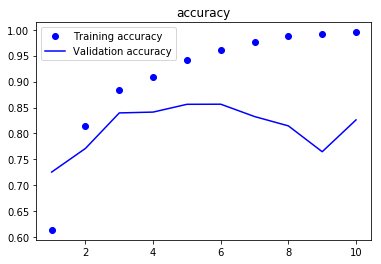

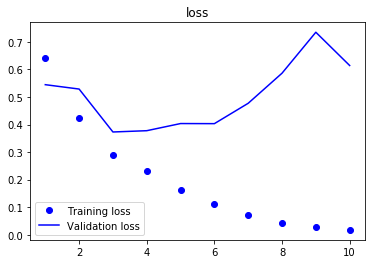

In [8]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epoches = range(1, len(acc) + 1)
plt.plot(epoches, acc, 'bo', label='Training accuracy')
plt.plot(epoches, val_acc, 'b', label='Validation accuracy')
plt.title('accuracy')
plt.legend()

plt.figure()

plt.plot(epoches, loss, 'bo', label='Training loss')
plt.plot(epoches, val_loss, 'b', label='Validation loss')
plt.title('loss')
plt.legend()

plt.show()


In [9]:
from keras.layers import LSTM

model=Sequential()
model.add(Embedding(max_features,32))
model.add(LSTM(32))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history=model.fit(x_train,y_train,
                  epochs=10,
                  batch_size=32,
                  validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10


   32/20000 [..............................] - ETA: 9:11 - loss: 0.6940 - acc: 0.4062

   64/20000 [..............................] - ETA: 5:45 - loss: 0.6933 - acc: 0.5000

   96/20000 [..............................] - ETA: 4:34 - loss: 0.6946 - acc: 0.4688

  128/20000 [..............................] - ETA: 4:02 - loss: 0.6943 - acc: 0.4609

  160/20000 [..............................] - ETA: 3:43 - loss: 0.6939 - acc: 0.4813

  192/20000 [..............................] - ETA: 3:28 - loss: 0.6936 - acc: 0.5052

  224/20000 [..............................] - ETA: 3:18 - loss: 0.6932 - acc: 0.5045

  256/20000 [..............................] - ETA: 3:10 - loss: 0.6932 - acc: 0.5000

  288/20000 [..............................] - ETA: 3:04 - loss: 0.6933 - acc: 0.4931

  320/20000 [..............................] - ETA: 3:00 - loss: 0.6931 - acc: 0.5031

  352/20000 [..............................] - ETA: 2:55 - loss: 0.6932 - acc: 0.5057

  384/20000 [..............................] - ETA: 2:51 - loss: 0.6931 - acc: 0.5078

  416/20000 [..............................] - ETA: 2:48 - loss: 0.6931 - acc: 0.5144

  448/20000 [..............................] - ETA: 2:45 - loss: 0.6930 - acc: 0.5112

  480/20000 [..............................] - ETA: 2:43 - loss: 0.6929 - acc: 0.5146

  512/20000 [..............................] - ETA: 2:41 - loss: 0.6930 - acc: 0.5098

  544/20000 [..............................] - ETA: 2:39 - loss: 0.6930 - acc: 0.5092

  576/20000 [..............................] - ETA: 2:37 - loss: 0.6931 - acc: 0.5052

  608/20000 [..............................] - ETA: 2:37 - loss: 0.6930 - acc: 0.5115

  640/20000 [..............................] - ETA: 2:35 - loss: 0.6930 - acc: 0.5125

  672/20000 [>.............................] - ETA: 2:34 - loss: 0.6930 - acc: 0.5104

  704/20000 [>.............................] - ETA: 2:32 - loss: 0.6929 - acc: 0.5128

  736/20000 [>.............................] - ETA: 2:31 - loss: 0.6930 - acc: 0.5095

  768/20000 [>.............................] - ETA: 2:30 - loss: 0.6929 - acc: 0.5130

  800/20000 [>.............................] - ETA: 2:29 - loss: 0.6928 - acc: 0.5188

  832/20000 [>.............................] - ETA: 2:27 - loss: 0.6926 - acc: 0.5240

  864/20000 [>.............................] - ETA: 2:27 - loss: 0.6926 - acc: 0.5266

  896/20000 [>.............................] - ETA: 2:26 - loss: 0.6924 - acc: 0.5301

  928/20000 [>.............................] - ETA: 2:25 - loss: 0.6925 - acc: 0.5312

  960/20000 [>.............................] - ETA: 2:24 - loss: 0.6923 - acc: 0.5333

  992/20000 [>.............................] - ETA: 2:23 - loss: 0.6923 - acc: 0.5312

 1024/20000 [>.............................] - ETA: 2:22 - loss: 0.6923 - acc: 0.5322

 1056/20000 [>.............................] - ETA: 2:22 - loss: 0.6922 - acc: 0.5341

 1088/20000 [>.............................] - ETA: 2:21 - loss: 0.6922 - acc: 0.5340

 1120/20000 [>.............................] - ETA: 2:20 - loss: 0.6921 - acc: 0.5375

 1152/20000 [>.............................] - ETA: 2:19 - loss: 0.6921 - acc: 0.5365

 1184/20000 [>.............................] - ETA: 2:19 - loss: 0.6921 - acc: 0.5355

 1216/20000 [>.............................] - ETA: 2:18 - loss: 0.6919 - acc: 0.5419

 1248/20000 [>.............................] - ETA: 2:18 - loss: 0.6916 - acc: 0.5449

 1280/20000 [>.............................] - ETA: 2:17 - loss: 0.6915 - acc: 0.5453

 1312/20000 [>.............................] - ETA: 2:16 - loss: 0.6913 - acc: 0.5488

 1344/20000 [=>............................] - ETA: 2:16 - loss: 0.6911 - acc: 0.5491

 1376/20000 [=>............................] - ETA: 2:15 - loss: 0.6909 - acc: 0.5480

 1408/20000 [=>............................] - ETA: 2:15 - loss: 0.6905 - acc: 0.5533

 1440/20000 [=>............................] - ETA: 2:14 - loss: 0.6902 - acc: 0.5528

 1472/20000 [=>............................] - ETA: 2:14 - loss: 0.6904 - acc: 0.5516

 1504/20000 [=>............................] - ETA: 2:13 - loss: 0.6904 - acc: 0.5532

 1536/20000 [=>............................] - ETA: 2:13 - loss: 0.6901 - acc: 0.5553

 1568/20000 [=>............................] - ETA: 2:12 - loss: 0.6897 - acc: 0.5548

 1600/20000 [=>............................] - ETA: 2:12 - loss: 0.6895 - acc: 0.5563

 1632/20000 [=>............................] - ETA: 2:12 - loss: 0.6890 - acc: 0.5607

 1664/20000 [=>............................] - ETA: 2:11 - loss: 0.6887 - acc: 0.5613

 1696/20000 [=>............................] - ETA: 2:11 - loss: 0.6882 - acc: 0.5660

 1728/20000 [=>............................] - ETA: 2:11 - loss: 0.6871 - acc: 0.5683

 1760/20000 [=>............................] - ETA: 2:10 - loss: 0.6927 - acc: 0.5648

 1792/20000 [=>............................] - ETA: 2:10 - loss: 0.6922 - acc: 0.5653

 1824/20000 [=>............................] - ETA: 2:09 - loss: 0.6917 - acc: 0.5647

 1856/20000 [=>............................] - ETA: 2:09 - loss: 0.6905 - acc: 0.5673

 1888/20000 [=>............................] - ETA: 2:08 - loss: 0.6894 - acc: 0.5694

 1920/20000 [=>............................] - ETA: 2:08 - loss: 0.6882 - acc: 0.5708

 1952/20000 [=>............................] - ETA: 2:08 - loss: 0.6872 - acc: 0.5727

 1984/20000 [=>............................] - ETA: 2:07 - loss: 0.6859 - acc: 0.5751

 2016/20000 [==>...........................] - ETA: 2:07 - loss: 0.6857 - acc: 0.5734

 2048/20000 [==>...........................] - ETA: 2:07 - loss: 0.6853 - acc: 0.5742

 2080/20000 [==>...........................] - ETA: 2:06 - loss: 0.6837 - acc: 0.5774

 2112/20000 [==>...........................] - ETA: 2:06 - loss: 0.6839 - acc: 0.5762

 2144/20000 [==>...........................] - ETA: 2:06 - loss: 0.6833 - acc: 0.5774

 2176/20000 [==>...........................] - ETA: 2:05 - loss: 0.6828 - acc: 0.5767

 2208/20000 [==>...........................] - ETA: 2:05 - loss: 0.6816 - acc: 0.5784

 2240/20000 [==>...........................] - ETA: 2:05 - loss: 0.6806 - acc: 0.5804

 2272/20000 [==>...........................] - ETA: 2:04 - loss: 0.6785 - acc: 0.5836

 2304/20000 [==>...........................] - ETA: 2:04 - loss: 0.6772 - acc: 0.5846

 2336/20000 [==>...........................] - ETA: 2:04 - loss: 0.6764 - acc: 0.5860

 2368/20000 [==>...........................] - ETA: 2:03 - loss: 0.6756 - acc: 0.5870

 2400/20000 [==>...........................] - ETA: 2:03 - loss: 0.6742 - acc: 0.5896

 2432/20000 [==>...........................] - ETA: 2:03 - loss: 0.6730 - acc: 0.5913

 2464/20000 [==>...........................] - ETA: 2:02 - loss: 0.6720 - acc: 0.5929

 2496/20000 [==>...........................] - ETA: 2:02 - loss: 0.6701 - acc: 0.5962

 2528/20000 [==>...........................] - ETA: 2:02 - loss: 0.6702 - acc: 0.5961

 2560/20000 [==>...........................] - ETA: 2:02 - loss: 0.6694 - acc: 0.5965

 2592/20000 [==>...........................] - ETA: 2:01 - loss: 0.6689 - acc: 0.5976

 2624/20000 [==>...........................] - ETA: 2:01 - loss: 0.6676 - acc: 0.5998

 2656/20000 [==>...........................] - ETA: 2:01 - loss: 0.6663 - acc: 0.6005

 2688/20000 [===>..........................] - ETA: 2:00 - loss: 0.6654 - acc: 0.6016

 2720/20000 [===>..........................] - ETA: 2:00 - loss: 0.6638 - acc: 0.6044

 2752/20000 [===>..........................] - ETA: 2:00 - loss: 0.6627 - acc: 0.6061

 2784/20000 [===>..........................] - ETA: 2:00 - loss: 0.6621 - acc: 0.6067

 2816/20000 [===>..........................] - ETA: 1:59 - loss: 0.6609 - acc: 0.6087

 2848/20000 [===>..........................] - ETA: 1:59 - loss: 0.6593 - acc: 0.6110

 2880/20000 [===>..........................] - ETA: 1:59 - loss: 0.6577 - acc: 0.6125

 2912/20000 [===>..........................] - ETA: 1:59 - loss: 0.6559 - acc: 0.6147

 2944/20000 [===>..........................] - ETA: 1:58 - loss: 0.6543 - acc: 0.6162

 2976/20000 [===>..........................] - ETA: 1:58 - loss: 0.6539 - acc: 0.6163

 3008/20000 [===>..........................] - ETA: 1:58 - loss: 0.6532 - acc: 0.6177

 3040/20000 [===>..........................] - ETA: 1:57 - loss: 0.6534 - acc: 0.6164

 3072/20000 [===>..........................] - ETA: 1:57 - loss: 0.6528 - acc: 0.6175

 3104/20000 [===>..........................] - ETA: 1:57 - loss: 0.6519 - acc: 0.6189

 3136/20000 [===>..........................] - ETA: 1:57 - loss: 0.6505 - acc: 0.6212

 3168/20000 [===>..........................] - ETA: 1:56 - loss: 0.6490 - acc: 0.6234

 3200/20000 [===>..........................] - ETA: 1:56 - loss: 0.6479 - acc: 0.6247

 3232/20000 [===>..........................] - ETA: 1:56 - loss: 0.6463 - acc: 0.6265

 3264/20000 [===>..........................] - ETA: 1:56 - loss: 0.6452 - acc: 0.6278

 3296/20000 [===>..........................] - ETA: 1:55 - loss: 0.6439 - acc: 0.6289

 3328/20000 [===>..........................] - ETA: 1:55 - loss: 0.6418 - acc: 0.6319

 3360/20000 [====>.........................] - ETA: 1:55 - loss: 0.6415 - acc: 0.6321

 3392/20000 [====>.........................] - ETA: 1:54 - loss: 0.6406 - acc: 0.6333

 3424/20000 [====>.........................] - ETA: 1:54 - loss: 0.6398 - acc: 0.6346

 3456/20000 [====>.........................] - ETA: 1:54 - loss: 0.6381 - acc: 0.6369

 3488/20000 [====>.........................] - ETA: 1:54 - loss: 0.6367 - acc: 0.6382

 3520/20000 [====>.........................] - ETA: 1:54 - loss: 0.6360 - acc: 0.6386

 3552/20000 [====>.........................] - ETA: 1:53 - loss: 0.6351 - acc: 0.6394

 3584/20000 [====>.........................] - ETA: 1:53 - loss: 0.6348 - acc: 0.6398

 3616/20000 [====>.........................] - ETA: 1:53 - loss: 0.6338 - acc: 0.6413

 3648/20000 [====>.........................] - ETA: 1:52 - loss: 0.6332 - acc: 0.6420

 3680/20000 [====>.........................] - ETA: 1:52 - loss: 0.6315 - acc: 0.6440

 3712/20000 [====>.........................] - ETA: 1:52 - loss: 0.6298 - acc: 0.6457

 3744/20000 [====>.........................] - ETA: 1:52 - loss: 0.6287 - acc: 0.6469

 3776/20000 [====>.........................] - ETA: 1:51 - loss: 0.6270 - acc: 0.6491

 3808/20000 [====>.........................] - ETA: 1:51 - loss: 0.6262 - acc: 0.6492

 3840/20000 [====>.........................] - ETA: 1:51 - loss: 0.6252 - acc: 0.6505

 3872/20000 [====>.........................] - ETA: 1:51 - loss: 0.6260 - acc: 0.6490

 3904/20000 [====>.........................] - ETA: 1:50 - loss: 0.6253 - acc: 0.6504

 3936/20000 [====>.........................] - ETA: 1:50 - loss: 0.6243 - acc: 0.6512

 3968/20000 [====>.........................] - ETA: 1:50 - loss: 0.6236 - acc: 0.6522

 4000/20000 [=====>........................] - ETA: 1:50 - loss: 0.6224 - acc: 0.6538

 4032/20000 [=====>........................] - ETA: 1:49 - loss: 0.6212 - acc: 0.6550

 4064/20000 [=====>........................] - ETA: 1:49 - loss: 0.6200 - acc: 0.6558

 4096/20000 [=====>........................] - ETA: 1:49 - loss: 0.6207 - acc: 0.6553

 4128/20000 [=====>........................] - ETA: 1:49 - loss: 0.6195 - acc: 0.6567

 4160/20000 [=====>........................] - ETA: 1:49 - loss: 0.6180 - acc: 0.6584

 4192/20000 [=====>........................] - ETA: 1:48 - loss: 0.6175 - acc: 0.6591

 4224/20000 [=====>........................] - ETA: 1:48 - loss: 0.6157 - acc: 0.6610

 4256/20000 [=====>........................] - ETA: 1:48 - loss: 0.6141 - acc: 0.6631

 4288/20000 [=====>........................] - ETA: 1:48 - loss: 0.6147 - acc: 0.6625

 4320/20000 [=====>........................] - ETA: 1:47 - loss: 0.6139 - acc: 0.6634

 4352/20000 [=====>........................] - ETA: 1:47 - loss: 0.6129 - acc: 0.6645

 4384/20000 [=====>........................] - ETA: 1:47 - loss: 0.6112 - acc: 0.6663

 4416/20000 [=====>........................] - ETA: 1:47 - loss: 0.6105 - acc: 0.6664

 4448/20000 [=====>........................] - ETA: 1:46 - loss: 0.6099 - acc: 0.6668

 4480/20000 [=====>........................] - ETA: 1:46 - loss: 0.6088 - acc: 0.6679

 4512/20000 [=====>........................] - ETA: 1:46 - loss: 0.6082 - acc: 0.6684

 4544/20000 [=====>........................] - ETA: 1:46 - loss: 0.6072 - acc: 0.6695

 4576/20000 [=====>........................] - ETA: 1:45 - loss: 0.6057 - acc: 0.6713

 4608/20000 [=====>........................] - ETA: 1:45 - loss: 0.6049 - acc: 0.6721

 4640/20000 [=====>........................] - ETA: 1:45 - loss: 0.6042 - acc: 0.6728

 4672/20000 [======>.......................] - ETA: 1:45 - loss: 0.6026 - acc: 0.6742

 4704/20000 [======>.......................] - ETA: 1:45 - loss: 0.6011 - acc: 0.6756

 4736/20000 [======>.......................] - ETA: 1:44 - loss: 0.6016 - acc: 0.6753

 4768/20000 [======>.......................] - ETA: 1:44 - loss: 0.6008 - acc: 0.6758

 4800/20000 [======>.......................] - ETA: 1:44 - loss: 0.6003 - acc: 0.6758

 4832/20000 [======>.......................] - ETA: 1:44 - loss: 0.5993 - acc: 0.6767

 4864/20000 [======>.......................] - ETA: 1:43 - loss: 0.5977 - acc: 0.6780

 4896/20000 [======>.......................] - ETA: 1:43 - loss: 0.5966 - acc: 0.6789

 4928/20000 [======>.......................] - ETA: 1:43 - loss: 0.5951 - acc: 0.6800

 4960/20000 [======>.......................] - ETA: 1:43 - loss: 0.5948 - acc: 0.6802

 4992/20000 [======>.......................] - ETA: 1:42 - loss: 0.5941 - acc: 0.6805

 5024/20000 [======>.......................] - ETA: 1:42 - loss: 0.5935 - acc: 0.6811

 5056/20000 [======>.......................] - ETA: 1:42 - loss: 0.5930 - acc: 0.6818

 5088/20000 [======>.......................] - ETA: 1:42 - loss: 0.5918 - acc: 0.6828

 5120/20000 [======>.......................] - ETA: 1:41 - loss: 0.5912 - acc: 0.6834

 5152/20000 [======>.......................] - ETA: 1:41 - loss: 0.5903 - acc: 0.6840

 5184/20000 [======>.......................] - ETA: 1:41 - loss: 0.5887 - acc: 0.6856

 5216/20000 [======>.......................] - ETA: 1:41 - loss: 0.5879 - acc: 0.6862

 5248/20000 [======>.......................] - ETA: 1:40 - loss: 0.5875 - acc: 0.6869

 5280/20000 [======>.......................] - ETA: 1:40 - loss: 0.5872 - acc: 0.6869

 5312/20000 [======>.......................] - ETA: 1:40 - loss: 0.5863 - acc: 0.6879

 5344/20000 [=======>......................] - ETA: 1:40 - loss: 0.5855 - acc: 0.6886

 5376/20000 [=======>......................] - ETA: 1:39 - loss: 0.5848 - acc: 0.6892

 5408/20000 [=======>......................] - ETA: 1:39 - loss: 0.5838 - acc: 0.6899

 5440/20000 [=======>......................] - ETA: 1:39 - loss: 0.5832 - acc: 0.6903

 5472/20000 [=======>......................] - ETA: 1:39 - loss: 0.5820 - acc: 0.6915

 5504/20000 [=======>......................] - ETA: 1:39 - loss: 0.5808 - acc: 0.6922

 5536/20000 [=======>......................] - ETA: 1:38 - loss: 0.5798 - acc: 0.6933

 5568/20000 [=======>......................] - ETA: 1:38 - loss: 0.5801 - acc: 0.6929

 5600/20000 [=======>......................] - ETA: 1:38 - loss: 0.5795 - acc: 0.6936

 5632/20000 [=======>......................] - ETA: 1:38 - loss: 0.5783 - acc: 0.6944

 5664/20000 [=======>......................] - ETA: 1:37 - loss: 0.5768 - acc: 0.6956

 5696/20000 [=======>......................] - ETA: 1:37 - loss: 0.5756 - acc: 0.6966

 5728/20000 [=======>......................] - ETA: 1:37 - loss: 0.5740 - acc: 0.6980

 5760/20000 [=======>......................] - ETA: 1:37 - loss: 0.5733 - acc: 0.6986

 5792/20000 [=======>......................] - ETA: 1:36 - loss: 0.5749 - acc: 0.6982

 5824/20000 [=======>......................] - ETA: 1:36 - loss: 0.5740 - acc: 0.6988

 5856/20000 [=======>......................] - ETA: 1:36 - loss: 0.5731 - acc: 0.6996

 5888/20000 [=======>......................] - ETA: 1:36 - loss: 0.5734 - acc: 0.6990

 5920/20000 [=======>......................] - ETA: 1:36 - loss: 0.5723 - acc: 0.7000

 5952/20000 [=======>......................] - ETA: 1:35 - loss: 0.5714 - acc: 0.7009

 5984/20000 [=======>......................] - ETA: 1:35 - loss: 0.5707 - acc: 0.7015

 6016/20000 [========>.....................] - ETA: 1:35 - loss: 0.5701 - acc: 0.7021

 6048/20000 [========>.....................] - ETA: 1:35 - loss: 0.5692 - acc: 0.7025

 6080/20000 [========>.....................] - ETA: 1:34 - loss: 0.5684 - acc: 0.7031

 6112/20000 [========>.....................] - ETA: 1:34 - loss: 0.5675 - acc: 0.7040

 6144/20000 [========>.....................] - ETA: 1:34 - loss: 0.5667 - acc: 0.7046

 6176/20000 [========>.....................] - ETA: 1:34 - loss: 0.5670 - acc: 0.7043

 6208/20000 [========>.....................] - ETA: 1:34 - loss: 0.5664 - acc: 0.7051

 6240/20000 [========>.....................] - ETA: 1:33 - loss: 0.5655 - acc: 0.7058

 6272/20000 [========>.....................] - ETA: 1:33 - loss: 0.5644 - acc: 0.7065

 6304/20000 [========>.....................] - ETA: 1:33 - loss: 0.5634 - acc: 0.7072

 6336/20000 [========>.....................] - ETA: 1:33 - loss: 0.5626 - acc: 0.7079

 6368/20000 [========>.....................] - ETA: 1:32 - loss: 0.5613 - acc: 0.7090

 6400/20000 [========>.....................] - ETA: 1:32 - loss: 0.5603 - acc: 0.7095

 6432/20000 [========>.....................] - ETA: 1:32 - loss: 0.5589 - acc: 0.7105

 6464/20000 [========>.....................] - ETA: 1:32 - loss: 0.5576 - acc: 0.7115

 6496/20000 [========>.....................] - ETA: 1:31 - loss: 0.5577 - acc: 0.7114

 6528/20000 [========>.....................] - ETA: 1:31 - loss: 0.5579 - acc: 0.7111

 6560/20000 [========>.....................] - ETA: 1:31 - loss: 0.5575 - acc: 0.7114

 6592/20000 [========>.....................] - ETA: 1:31 - loss: 0.5571 - acc: 0.7118

 6624/20000 [========>.....................] - ETA: 1:31 - loss: 0.5568 - acc: 0.7121

 6656/20000 [========>.....................] - ETA: 1:30 - loss: 0.5559 - acc: 0.7126

 6688/20000 [=========>....................] - ETA: 1:30 - loss: 0.5548 - acc: 0.7135

 6720/20000 [=========>....................] - ETA: 1:30 - loss: 0.5542 - acc: 0.7140

 6752/20000 [=========>....................] - ETA: 1:30 - loss: 0.5533 - acc: 0.7146

 6784/20000 [=========>....................] - ETA: 1:29 - loss: 0.5524 - acc: 0.7154

 6816/20000 [=========>....................] - ETA: 1:29 - loss: 0.5513 - acc: 0.7161

 6848/20000 [=========>....................] - ETA: 1:29 - loss: 0.5506 - acc: 0.7167

 6880/20000 [=========>....................] - ETA: 1:29 - loss: 0.5496 - acc: 0.7174

 6912/20000 [=========>....................] - ETA: 1:28 - loss: 0.5482 - acc: 0.7183

 6944/20000 [=========>....................] - ETA: 1:28 - loss: 0.5471 - acc: 0.7190

 6976/20000 [=========>....................] - ETA: 1:28 - loss: 0.5466 - acc: 0.7195

 7008/20000 [=========>....................] - ETA: 1:28 - loss: 0.5461 - acc: 0.7197

 7040/20000 [=========>....................] - ETA: 1:28 - loss: 0.5456 - acc: 0.7200

 7072/20000 [=========>....................] - ETA: 1:27 - loss: 0.5441 - acc: 0.7212

 7104/20000 [=========>....................] - ETA: 1:27 - loss: 0.5424 - acc: 0.7221

 7136/20000 [=========>....................] - ETA: 1:27 - loss: 0.5423 - acc: 0.7224

 7168/20000 [=========>....................] - ETA: 1:27 - loss: 0.5420 - acc: 0.7225

 7200/20000 [=========>....................] - ETA: 1:27 - loss: 0.5409 - acc: 0.7235

 7232/20000 [=========>....................] - ETA: 1:26 - loss: 0.5399 - acc: 0.7241

 7264/20000 [=========>....................] - ETA: 1:26 - loss: 0.5390 - acc: 0.7247

 7296/20000 [=========>....................] - ETA: 1:26 - loss: 0.5388 - acc: 0.7249

 7328/20000 [=========>....................] - ETA: 1:26 - loss: 0.5376 - acc: 0.7260

 7360/20000 [==========>...................] - ETA: 1:25 - loss: 0.5382 - acc: 0.7258

 7392/20000 [==========>...................] - ETA: 1:25 - loss: 0.5386 - acc: 0.7255

 7424/20000 [==========>...................] - ETA: 1:25 - loss: 0.5375 - acc: 0.7266

 7456/20000 [==========>...................] - ETA: 1:25 - loss: 0.5373 - acc: 0.7267

 7488/20000 [==========>...................] - ETA: 1:24 - loss: 0.5370 - acc: 0.7269

 7520/20000 [==========>...................] - ETA: 1:24 - loss: 0.5358 - acc: 0.7278

 7552/20000 [==========>...................] - ETA: 1:24 - loss: 0.5344 - acc: 0.7288

 7584/20000 [==========>...................] - ETA: 1:24 - loss: 0.5336 - acc: 0.7293

 7616/20000 [==========>...................] - ETA: 1:24 - loss: 0.5329 - acc: 0.7298

 7648/20000 [==========>...................] - ETA: 1:23 - loss: 0.5321 - acc: 0.7305

 7680/20000 [==========>...................] - ETA: 1:23 - loss: 0.5321 - acc: 0.7303

 7712/20000 [==========>...................] - ETA: 1:23 - loss: 0.5314 - acc: 0.7308

 7744/20000 [==========>...................] - ETA: 1:23 - loss: 0.5308 - acc: 0.7313

 7776/20000 [==========>...................] - ETA: 1:22 - loss: 0.5306 - acc: 0.7315

 7808/20000 [==========>...................] - ETA: 1:22 - loss: 0.5300 - acc: 0.7318

 7840/20000 [==========>...................] - ETA: 1:22 - loss: 0.5297 - acc: 0.7320

 7872/20000 [==========>...................] - ETA: 1:22 - loss: 0.5290 - acc: 0.7326

 7904/20000 [==========>...................] - ETA: 1:22 - loss: 0.5281 - acc: 0.7330

 7936/20000 [==========>...................] - ETA: 1:21 - loss: 0.5285 - acc: 0.7330

 7968/20000 [==========>...................] - ETA: 1:21 - loss: 0.5280 - acc: 0.7332

 8000/20000 [===========>..................] - ETA: 1:21 - loss: 0.5276 - acc: 0.7335

 8032/20000 [===========>..................] - ETA: 1:21 - loss: 0.5267 - acc: 0.7342

 8064/20000 [===========>..................] - ETA: 1:20 - loss: 0.5258 - acc: 0.7346

 8096/20000 [===========>..................] - ETA: 1:20 - loss: 0.5251 - acc: 0.7351

 8128/20000 [===========>..................] - ETA: 1:20 - loss: 0.5244 - acc: 0.7355

 8160/20000 [===========>..................] - ETA: 1:20 - loss: 0.5235 - acc: 0.7362

 8192/20000 [===========>..................] - ETA: 1:20 - loss: 0.5223 - acc: 0.7368

 8224/20000 [===========>..................] - ETA: 1:19 - loss: 0.5226 - acc: 0.7370

 8256/20000 [===========>..................] - ETA: 1:19 - loss: 0.5219 - acc: 0.7378

 8288/20000 [===========>..................] - ETA: 1:19 - loss: 0.5216 - acc: 0.7379

 8320/20000 [===========>..................] - ETA: 1:19 - loss: 0.5213 - acc: 0.7381

 8352/20000 [===========>..................] - ETA: 1:18 - loss: 0.5204 - acc: 0.7386

 8384/20000 [===========>..................] - ETA: 1:18 - loss: 0.5205 - acc: 0.7388

 8416/20000 [===========>..................] - ETA: 1:18 - loss: 0.5218 - acc: 0.7381

 8448/20000 [===========>..................] - ETA: 1:18 - loss: 0.5217 - acc: 0.7383

 8480/20000 [===========>..................] - ETA: 1:18 - loss: 0.5213 - acc: 0.7388

 8512/20000 [===========>..................] - ETA: 1:17 - loss: 0.5205 - acc: 0.7395

 8544/20000 [===========>..................] - ETA: 1:17 - loss: 0.5204 - acc: 0.7398

 8576/20000 [===========>..................] - ETA: 1:17 - loss: 0.5204 - acc: 0.7396

 8608/20000 [===========>..................] - ETA: 1:17 - loss: 0.5194 - acc: 0.7404

 8640/20000 [===========>..................] - ETA: 1:16 - loss: 0.5190 - acc: 0.7404

 8672/20000 [============>.................] - ETA: 1:16 - loss: 0.5183 - acc: 0.7409

 8704/20000 [============>.................] - ETA: 1:16 - loss: 0.5178 - acc: 0.7413

 8736/20000 [============>.................] - ETA: 1:16 - loss: 0.5170 - acc: 0.7418

 8768/20000 [============>.................] - ETA: 1:16 - loss: 0.5166 - acc: 0.7419

 8800/20000 [============>.................] - ETA: 1:15 - loss: 0.5163 - acc: 0.7419

 8832/20000 [============>.................] - ETA: 1:15 - loss: 0.5156 - acc: 0.7425

 8864/20000 [============>.................] - ETA: 1:15 - loss: 0.5157 - acc: 0.7426

 8896/20000 [============>.................] - ETA: 1:15 - loss: 0.5152 - acc: 0.7428

 8928/20000 [============>.................] - ETA: 1:15 - loss: 0.5150 - acc: 0.7428

 8960/20000 [============>.................] - ETA: 1:14 - loss: 0.5147 - acc: 0.7434

 8992/20000 [============>.................] - ETA: 1:14 - loss: 0.5141 - acc: 0.7439

 9024/20000 [============>.................] - ETA: 1:14 - loss: 0.5138 - acc: 0.7442

 9056/20000 [============>.................] - ETA: 1:14 - loss: 0.5128 - acc: 0.7450

 9088/20000 [============>.................] - ETA: 1:13 - loss: 0.5116 - acc: 0.7457

 9120/20000 [============>.................] - ETA: 1:13 - loss: 0.5108 - acc: 0.7462

 9152/20000 [============>.................] - ETA: 1:13 - loss: 0.5103 - acc: 0.7465

 9184/20000 [============>.................] - ETA: 1:13 - loss: 0.5099 - acc: 0.7468

 9216/20000 [============>.................] - ETA: 1:13 - loss: 0.5094 - acc: 0.7471

 9248/20000 [============>.................] - ETA: 1:12 - loss: 0.5089 - acc: 0.7474

 9280/20000 [============>.................] - ETA: 1:12 - loss: 0.5084 - acc: 0.7477

 9312/20000 [============>.................] - ETA: 1:12 - loss: 0.5076 - acc: 0.7484

 9344/20000 [=============>................] - ETA: 1:12 - loss: 0.5075 - acc: 0.7486

 9376/20000 [=============>................] - ETA: 1:11 - loss: 0.5073 - acc: 0.7489

 9408/20000 [=============>................] - ETA: 1:11 - loss: 0.5068 - acc: 0.7494

 9440/20000 [=============>................] - ETA: 1:11 - loss: 0.5067 - acc: 0.7494

 9472/20000 [=============>................] - ETA: 1:11 - loss: 0.5063 - acc: 0.7497

 9504/20000 [=============>................] - ETA: 1:11 - loss: 0.5056 - acc: 0.7501

 9536/20000 [=============>................] - ETA: 1:10 - loss: 0.5058 - acc: 0.7500

 9568/20000 [=============>................] - ETA: 1:10 - loss: 0.5051 - acc: 0.7504

 9600/20000 [=============>................] - ETA: 1:10 - loss: 0.5047 - acc: 0.7505

 9632/20000 [=============>................] - ETA: 1:10 - loss: 0.5041 - acc: 0.7509

 9664/20000 [=============>................] - ETA: 1:09 - loss: 0.5036 - acc: 0.7511

 9696/20000 [=============>................] - ETA: 1:09 - loss: 0.5033 - acc: 0.7512

 9728/20000 [=============>................] - ETA: 1:09 - loss: 0.5027 - acc: 0.7516

 9760/20000 [=============>................] - ETA: 1:09 - loss: 0.5017 - acc: 0.7525

 9792/20000 [=============>................] - ETA: 1:09 - loss: 0.5014 - acc: 0.7528

 9824/20000 [=============>................] - ETA: 1:08 - loss: 0.5007 - acc: 0.7532

 9856/20000 [=============>................] - ETA: 1:08 - loss: 0.5001 - acc: 0.7536

 9888/20000 [=============>................] - ETA: 1:08 - loss: 0.4999 - acc: 0.7535

 9920/20000 [=============>................] - ETA: 1:08 - loss: 0.4995 - acc: 0.7539

 9952/20000 [=============>................] - ETA: 1:07 - loss: 0.4986 - acc: 0.7545

 9984/20000 [=============>................] - ETA: 1:07 - loss: 0.4985 - acc: 0.7549

10016/20000 [==============>...............] - ETA: 1:07 - loss: 0.5017 - acc: 0.7542

10048/20000 [==============>...............] - ETA: 1:07 - loss: 0.5013 - acc: 0.7545

10080/20000 [==============>...............] - ETA: 1:07 - loss: 0.5008 - acc: 0.7547

10112/20000 [==============>...............] - ETA: 1:06 - loss: 0.5003 - acc: 0.7550

10144/20000 [==============>...............] - ETA: 1:06 - loss: 0.4996 - acc: 0.7554

10176/20000 [==============>...............] - ETA: 1:06 - loss: 0.4991 - acc: 0.7557

10208/20000 [==============>...............] - ETA: 1:06 - loss: 0.4985 - acc: 0.7562

10240/20000 [==============>...............] - ETA: 1:05 - loss: 0.4982 - acc: 0.7563

10272/20000 [==============>...............] - ETA: 1:05 - loss: 0.4976 - acc: 0.7568

10304/20000 [==============>...............] - ETA: 1:05 - loss: 0.4973 - acc: 0.7569

10336/20000 [==============>...............] - ETA: 1:05 - loss: 0.4964 - acc: 0.7575

10368/20000 [==============>...............] - ETA: 1:05 - loss: 0.4962 - acc: 0.7576

10400/20000 [==============>...............] - ETA: 1:04 - loss: 0.4953 - acc: 0.7581

10432/20000 [==============>...............] - ETA: 1:04 - loss: 0.4950 - acc: 0.7581

10464/20000 [==============>...............] - ETA: 1:04 - loss: 0.4947 - acc: 0.7583

10496/20000 [==============>...............] - ETA: 1:04 - loss: 0.4941 - acc: 0.7586

10528/20000 [==============>...............] - ETA: 1:04 - loss: 0.4945 - acc: 0.7585

10560/20000 [==============>...............] - ETA: 1:03 - loss: 0.4936 - acc: 0.7591

10592/20000 [==============>...............] - ETA: 1:03 - loss: 0.4927 - acc: 0.7596

10624/20000 [==============>...............] - ETA: 1:03 - loss: 0.4921 - acc: 0.7601

10656/20000 [==============>...............] - ETA: 1:03 - loss: 0.4926 - acc: 0.7600

10688/20000 [===============>..............] - ETA: 1:02 - loss: 0.4921 - acc: 0.7604

10720/20000 [===============>..............] - ETA: 1:02 - loss: 0.4915 - acc: 0.7606

10752/20000 [===============>..............] - ETA: 1:02 - loss: 0.4911 - acc: 0.7608

10784/20000 [===============>..............] - ETA: 1:02 - loss: 0.4906 - acc: 0.7610

10816/20000 [===============>..............] - ETA: 1:02 - loss: 0.4903 - acc: 0.7614

10848/20000 [===============>..............] - ETA: 1:01 - loss: 0.4897 - acc: 0.7618

10880/20000 [===============>..............] - ETA: 1:01 - loss: 0.4891 - acc: 0.7620

10912/20000 [===============>..............] - ETA: 1:01 - loss: 0.4885 - acc: 0.7625

10944/20000 [===============>..............] - ETA: 1:01 - loss: 0.4880 - acc: 0.7629

10976/20000 [===============>..............] - ETA: 1:00 - loss: 0.4877 - acc: 0.7630

11008/20000 [===============>..............] - ETA: 1:00 - loss: 0.4872 - acc: 0.7634

11040/20000 [===============>..............] - ETA: 1:00 - loss: 0.4866 - acc: 0.7639

11072/20000 [===============>..............] - ETA: 1:00 - loss: 0.4861 - acc: 0.7642

11104/20000 [===============>..............] - ETA: 1:00 - loss: 0.4858 - acc: 0.7645

11136/20000 [===============>..............] - ETA: 59s - loss: 0.4856 - acc: 0.7647 

11168/20000 [===============>..............] - ETA: 59s - loss: 0.4857 - acc: 0.7646

11200/20000 [===============>..............] - ETA: 59s - loss: 0.4854 - acc: 0.7648

11232/20000 [===============>..............] - ETA: 59s - loss: 0.4844 - acc: 0.7655

11264/20000 [===============>..............] - ETA: 59s - loss: 0.4840 - acc: 0.7659

11296/20000 [===============>..............] - ETA: 58s - loss: 0.4839 - acc: 0.7660

11328/20000 [===============>..............] - ETA: 58s - loss: 0.4835 - acc: 0.7663

11360/20000 [================>.............] - ETA: 58s - loss: 0.4831 - acc: 0.7665

11392/20000 [================>.............] - ETA: 58s - loss: 0.4825 - acc: 0.7668

11424/20000 [================>.............] - ETA: 57s - loss: 0.4828 - acc: 0.7668

11456/20000 [================>.............] - ETA: 57s - loss: 0.4826 - acc: 0.7668

11488/20000 [================>.............] - ETA: 57s - loss: 0.4822 - acc: 0.7672

11520/20000 [================>.............] - ETA: 57s - loss: 0.4817 - acc: 0.7674

11552/20000 [================>.............] - ETA: 57s - loss: 0.4812 - acc: 0.7677

11584/20000 [================>.............] - ETA: 56s - loss: 0.4807 - acc: 0.7680

11616/20000 [================>.............] - ETA: 56s - loss: 0.4804 - acc: 0.7682

11648/20000 [================>.............] - ETA: 56s - loss: 0.4801 - acc: 0.7685

11680/20000 [================>.............] - ETA: 56s - loss: 0.4797 - acc: 0.7687

11712/20000 [================>.............] - ETA: 56s - loss: 0.4793 - acc: 0.7690

11744/20000 [================>.............] - ETA: 55s - loss: 0.4785 - acc: 0.7695

11776/20000 [================>.............] - ETA: 55s - loss: 0.4787 - acc: 0.7694

11808/20000 [================>.............] - ETA: 55s - loss: 0.4791 - acc: 0.7691

11840/20000 [================>.............] - ETA: 55s - loss: 0.4790 - acc: 0.7693

11872/20000 [================>.............] - ETA: 54s - loss: 0.4786 - acc: 0.7695

11904/20000 [================>.............] - ETA: 54s - loss: 0.4780 - acc: 0.7700

11936/20000 [================>.............] - ETA: 54s - loss: 0.4775 - acc: 0.7704

11968/20000 [================>.............] - ETA: 54s - loss: 0.4771 - acc: 0.7706

12000/20000 [=================>............] - ETA: 54s - loss: 0.4769 - acc: 0.7707

12032/20000 [=================>............] - ETA: 53s - loss: 0.4767 - acc: 0.7707

12064/20000 [=================>............] - ETA: 53s - loss: 0.4771 - acc: 0.7707

12096/20000 [=================>............] - ETA: 53s - loss: 0.4767 - acc: 0.7710

12128/20000 [=================>............] - ETA: 53s - loss: 0.4765 - acc: 0.7711

12160/20000 [=================>............] - ETA: 52s - loss: 0.4763 - acc: 0.7711

12192/20000 [=================>............] - ETA: 52s - loss: 0.4761 - acc: 0.7712

12224/20000 [=================>............] - ETA: 52s - loss: 0.4757 - acc: 0.7714

12256/20000 [=================>............] - ETA: 52s - loss: 0.4757 - acc: 0.7714

12288/20000 [=================>............] - ETA: 52s - loss: 0.4753 - acc: 0.7716

12320/20000 [=================>............] - ETA: 51s - loss: 0.4749 - acc: 0.7719

12352/20000 [=================>............] - ETA: 51s - loss: 0.4748 - acc: 0.7721

12384/20000 [=================>............] - ETA: 51s - loss: 0.4748 - acc: 0.7721

12416/20000 [=================>............] - ETA: 51s - loss: 0.4743 - acc: 0.7724

12448/20000 [=================>............] - ETA: 51s - loss: 0.4737 - acc: 0.7729

12480/20000 [=================>............] - ETA: 50s - loss: 0.4731 - acc: 0.7732

12512/20000 [=================>............] - ETA: 50s - loss: 0.4727 - acc: 0.7735

12544/20000 [=================>............] - ETA: 50s - loss: 0.4725 - acc: 0.7736

12576/20000 [=================>............] - ETA: 50s - loss: 0.4719 - acc: 0.7739

12608/20000 [=================>............] - ETA: 49s - loss: 0.4712 - acc: 0.7743

12640/20000 [=================>............] - ETA: 49s - loss: 0.4706 - acc: 0.7746

12672/20000 [==================>...........] - ETA: 49s - loss: 0.4699 - acc: 0.7750

12704/20000 [==================>...........] - ETA: 49s - loss: 0.4695 - acc: 0.7750

12736/20000 [==================>...........] - ETA: 49s - loss: 0.4693 - acc: 0.7753

12768/20000 [==================>...........] - ETA: 48s - loss: 0.4686 - acc: 0.7757

12800/20000 [==================>...........] - ETA: 48s - loss: 0.4680 - acc: 0.7759

12832/20000 [==================>...........] - ETA: 48s - loss: 0.4689 - acc: 0.7758

12864/20000 [==================>...........] - ETA: 48s - loss: 0.4682 - acc: 0.7760

12896/20000 [==================>...........] - ETA: 47s - loss: 0.4675 - acc: 0.7764

12928/20000 [==================>...........] - ETA: 47s - loss: 0.4666 - acc: 0.7769

12960/20000 [==================>...........] - ETA: 47s - loss: 0.4664 - acc: 0.7771

12992/20000 [==================>...........] - ETA: 47s - loss: 0.4662 - acc: 0.7772

13024/20000 [==================>...........] - ETA: 47s - loss: 0.4658 - acc: 0.7775

13056/20000 [==================>...........] - ETA: 46s - loss: 0.4658 - acc: 0.7775

13088/20000 [==================>...........] - ETA: 46s - loss: 0.4654 - acc: 0.7777

13120/20000 [==================>...........] - ETA: 46s - loss: 0.4651 - acc: 0.7780

13152/20000 [==================>...........] - ETA: 46s - loss: 0.4655 - acc: 0.7779

13184/20000 [==================>...........] - ETA: 46s - loss: 0.4654 - acc: 0.7780

13216/20000 [==================>...........] - ETA: 45s - loss: 0.4648 - acc: 0.7784

13248/20000 [==================>...........] - ETA: 45s - loss: 0.4644 - acc: 0.7787

13280/20000 [==================>...........] - ETA: 45s - loss: 0.4639 - acc: 0.7788

13312/20000 [==================>...........] - ETA: 45s - loss: 0.4633 - acc: 0.7792

13344/20000 [===================>..........] - ETA: 44s - loss: 0.4632 - acc: 0.7795

13376/20000 [===================>..........] - ETA: 44s - loss: 0.4630 - acc: 0.7796

13408/20000 [===================>..........] - ETA: 44s - loss: 0.4626 - acc: 0.7799

13440/20000 [===================>..........] - ETA: 44s - loss: 0.4620 - acc: 0.7803

13472/20000 [===================>..........] - ETA: 44s - loss: 0.4617 - acc: 0.7805

13504/20000 [===================>..........] - ETA: 43s - loss: 0.4612 - acc: 0.7809

13536/20000 [===================>..........] - ETA: 43s - loss: 0.4606 - acc: 0.7813

13568/20000 [===================>..........] - ETA: 43s - loss: 0.4604 - acc: 0.7815

13600/20000 [===================>..........] - ETA: 43s - loss: 0.4602 - acc: 0.7816

13632/20000 [===================>..........] - ETA: 42s - loss: 0.4599 - acc: 0.7818

13664/20000 [===================>..........] - ETA: 42s - loss: 0.4594 - acc: 0.7821

13696/20000 [===================>..........] - ETA: 42s - loss: 0.4591 - acc: 0.7823

13728/20000 [===================>..........] - ETA: 42s - loss: 0.4589 - acc: 0.7823

13760/20000 [===================>..........] - ETA: 42s - loss: 0.4586 - acc: 0.7826

13792/20000 [===================>..........] - ETA: 41s - loss: 0.4585 - acc: 0.7828

13824/20000 [===================>..........] - ETA: 41s - loss: 0.4586 - acc: 0.7827

13856/20000 [===================>..........] - ETA: 41s - loss: 0.4582 - acc: 0.7829

13888/20000 [===================>..........] - ETA: 41s - loss: 0.4578 - acc: 0.7833

13920/20000 [===================>..........] - ETA: 40s - loss: 0.4575 - acc: 0.7834

13952/20000 [===================>..........] - ETA: 40s - loss: 0.4574 - acc: 0.7835

13984/20000 [===================>..........] - ETA: 40s - loss: 0.4570 - acc: 0.7838

14016/20000 [====================>.........] - ETA: 40s - loss: 0.4568 - acc: 0.7839

14048/20000 [====================>.........] - ETA: 40s - loss: 0.4565 - acc: 0.7842

14080/20000 [====================>.........] - ETA: 39s - loss: 0.4560 - acc: 0.7844

14112/20000 [====================>.........] - ETA: 39s - loss: 0.4562 - acc: 0.7844

14144/20000 [====================>.........] - ETA: 39s - loss: 0.4555 - acc: 0.7848

14176/20000 [====================>.........] - ETA: 39s - loss: 0.4549 - acc: 0.7852

14208/20000 [====================>.........] - ETA: 39s - loss: 0.4549 - acc: 0.7854

14240/20000 [====================>.........] - ETA: 38s - loss: 0.4552 - acc: 0.7853

14272/20000 [====================>.........] - ETA: 38s - loss: 0.4551 - acc: 0.7854

14304/20000 [====================>.........] - ETA: 38s - loss: 0.4551 - acc: 0.7854

14336/20000 [====================>.........] - ETA: 38s - loss: 0.4546 - acc: 0.7857

14368/20000 [====================>.........] - ETA: 37s - loss: 0.4544 - acc: 0.7858

14400/20000 [====================>.........] - ETA: 37s - loss: 0.4545 - acc: 0.7856

14432/20000 [====================>.........] - ETA: 37s - loss: 0.4543 - acc: 0.7857

14464/20000 [====================>.........] - ETA: 37s - loss: 0.4542 - acc: 0.7857

14496/20000 [====================>.........] - ETA: 37s - loss: 0.4538 - acc: 0.7860

14528/20000 [====================>.........] - ETA: 36s - loss: 0.4532 - acc: 0.7863

14560/20000 [====================>.........] - ETA: 36s - loss: 0.4528 - acc: 0.7866

14592/20000 [====================>.........] - ETA: 36s - loss: 0.4527 - acc: 0.7867

14624/20000 [====================>.........] - ETA: 36s - loss: 0.4526 - acc: 0.7867

14656/20000 [====================>.........] - ETA: 36s - loss: 0.4525 - acc: 0.7867

14688/20000 [=====================>........] - ETA: 35s - loss: 0.4525 - acc: 0.7866

14720/20000 [=====================>........] - ETA: 35s - loss: 0.4523 - acc: 0.7869

14752/20000 [=====================>........] - ETA: 35s - loss: 0.4520 - acc: 0.7871

14784/20000 [=====================>........] - ETA: 35s - loss: 0.4521 - acc: 0.7870

14816/20000 [=====================>........] - ETA: 34s - loss: 0.4519 - acc: 0.7871

14848/20000 [=====================>........] - ETA: 34s - loss: 0.4515 - acc: 0.7873

14880/20000 [=====================>........] - ETA: 34s - loss: 0.4509 - acc: 0.7877

14912/20000 [=====================>........] - ETA: 34s - loss: 0.4506 - acc: 0.7878

14944/20000 [=====================>........] - ETA: 34s - loss: 0.4504 - acc: 0.7880

14976/20000 [=====================>........] - ETA: 33s - loss: 0.4500 - acc: 0.7881

15008/20000 [=====================>........] - ETA: 33s - loss: 0.4494 - acc: 0.7884

15040/20000 [=====================>........] - ETA: 33s - loss: 0.4489 - acc: 0.7888

15072/20000 [=====================>........] - ETA: 33s - loss: 0.4492 - acc: 0.7888

15104/20000 [=====================>........] - ETA: 32s - loss: 0.4488 - acc: 0.7891

15136/20000 [=====================>........] - ETA: 32s - loss: 0.4488 - acc: 0.7892

15168/20000 [=====================>........] - ETA: 32s - loss: 0.4487 - acc: 0.7891

15200/20000 [=====================>........] - ETA: 32s - loss: 0.4483 - acc: 0.7894

15232/20000 [=====================>........] - ETA: 32s - loss: 0.4482 - acc: 0.7896

15264/20000 [=====================>........] - ETA: 31s - loss: 0.4483 - acc: 0.7896

15296/20000 [=====================>........] - ETA: 31s - loss: 0.4480 - acc: 0.7898

15328/20000 [=====================>........] - ETA: 31s - loss: 0.4477 - acc: 0.7901

15360/20000 [======================>.......] - ETA: 31s - loss: 0.4473 - acc: 0.7903

15392/20000 [======================>.......] - ETA: 31s - loss: 0.4470 - acc: 0.7904

15424/20000 [======================>.......] - ETA: 30s - loss: 0.4465 - acc: 0.7907

15456/20000 [======================>.......] - ETA: 30s - loss: 0.4461 - acc: 0.7910

15488/20000 [======================>.......] - ETA: 30s - loss: 0.4461 - acc: 0.7909

15520/20000 [======================>.......] - ETA: 30s - loss: 0.4460 - acc: 0.7910

15552/20000 [======================>.......] - ETA: 29s - loss: 0.4460 - acc: 0.7910

15584/20000 [======================>.......] - ETA: 29s - loss: 0.4461 - acc: 0.7909

15616/20000 [======================>.......] - ETA: 29s - loss: 0.4460 - acc: 0.7910

15648/20000 [======================>.......] - ETA: 29s - loss: 0.4456 - acc: 0.7912

15680/20000 [======================>.......] - ETA: 29s - loss: 0.4452 - acc: 0.7915

15712/20000 [======================>.......] - ETA: 28s - loss: 0.4450 - acc: 0.7916

15744/20000 [======================>.......] - ETA: 28s - loss: 0.4447 - acc: 0.7919

15776/20000 [======================>.......] - ETA: 28s - loss: 0.4443 - acc: 0.7921

15808/20000 [======================>.......] - ETA: 28s - loss: 0.4445 - acc: 0.7919

15840/20000 [======================>.......] - ETA: 28s - loss: 0.4444 - acc: 0.7919

15872/20000 [======================>.......] - ETA: 27s - loss: 0.4442 - acc: 0.7921

15904/20000 [======================>.......] - ETA: 27s - loss: 0.4440 - acc: 0.7921

15936/20000 [======================>.......] - ETA: 27s - loss: 0.4436 - acc: 0.7924

15968/20000 [======================>.......] - ETA: 27s - loss: 0.4432 - acc: 0.7925

16000/20000 [=======================>......] - ETA: 26s - loss: 0.4431 - acc: 0.7926

16032/20000 [=======================>......] - ETA: 26s - loss: 0.4429 - acc: 0.7927

16064/20000 [=======================>......] - ETA: 26s - loss: 0.4423 - acc: 0.7931

16096/20000 [=======================>......] - ETA: 26s - loss: 0.4417 - acc: 0.7935

16128/20000 [=======================>......] - ETA: 26s - loss: 0.4416 - acc: 0.7936

16160/20000 [=======================>......] - ETA: 25s - loss: 0.4411 - acc: 0.7937

16192/20000 [=======================>......] - ETA: 25s - loss: 0.4407 - acc: 0.7940

16224/20000 [=======================>......] - ETA: 25s - loss: 0.4405 - acc: 0.7941

16256/20000 [=======================>......] - ETA: 25s - loss: 0.4405 - acc: 0.7941

16288/20000 [=======================>......] - ETA: 25s - loss: 0.4402 - acc: 0.7943

16320/20000 [=======================>......] - ETA: 24s - loss: 0.4396 - acc: 0.7947

16352/20000 [=======================>......] - ETA: 24s - loss: 0.4393 - acc: 0.7949

16384/20000 [=======================>......] - ETA: 24s - loss: 0.4388 - acc: 0.7952

16416/20000 [=======================>......] - ETA: 24s - loss: 0.4383 - acc: 0.7954

16448/20000 [=======================>......] - ETA: 23s - loss: 0.4380 - acc: 0.7956

16480/20000 [=======================>......] - ETA: 23s - loss: 0.4379 - acc: 0.7956

16512/20000 [=======================>......] - ETA: 23s - loss: 0.4376 - acc: 0.7958

16544/20000 [=======================>......] - ETA: 23s - loss: 0.4374 - acc: 0.7959

16576/20000 [=======================>......] - ETA: 23s - loss: 0.4374 - acc: 0.7958

16608/20000 [=======================>......] - ETA: 22s - loss: 0.4373 - acc: 0.7959

16640/20000 [=======================>......] - ETA: 22s - loss: 0.4368 - acc: 0.7962

16672/20000 [========================>.....] - ETA: 22s - loss: 0.4364 - acc: 0.7964

16704/20000 [========================>.....] - ETA: 22s - loss: 0.4360 - acc: 0.7966

16736/20000 [========================>.....] - ETA: 21s - loss: 0.4361 - acc: 0.7965

16768/20000 [========================>.....] - ETA: 21s - loss: 0.4359 - acc: 0.7966

16800/20000 [========================>.....] - ETA: 21s - loss: 0.4357 - acc: 0.7967

16832/20000 [========================>.....] - ETA: 21s - loss: 0.4355 - acc: 0.7968

16864/20000 [========================>.....] - ETA: 21s - loss: 0.4351 - acc: 0.7971

16896/20000 [========================>.....] - ETA: 20s - loss: 0.4364 - acc: 0.7968

16928/20000 [========================>.....] - ETA: 20s - loss: 0.4362 - acc: 0.7969

16960/20000 [========================>.....] - ETA: 20s - loss: 0.4359 - acc: 0.7972

16992/20000 [========================>.....] - ETA: 20s - loss: 0.4353 - acc: 0.7975

17024/20000 [========================>.....] - ETA: 20s - loss: 0.4350 - acc: 0.7976

17056/20000 [========================>.....] - ETA: 19s - loss: 0.4350 - acc: 0.7977

17088/20000 [========================>.....] - ETA: 19s - loss: 0.4350 - acc: 0.7977

17120/20000 [========================>.....] - ETA: 19s - loss: 0.4350 - acc: 0.7978

17152/20000 [========================>.....] - ETA: 19s - loss: 0.4348 - acc: 0.7978

17184/20000 [========================>.....] - ETA: 18s - loss: 0.4345 - acc: 0.7980

17216/20000 [========================>.....] - ETA: 18s - loss: 0.4348 - acc: 0.7977

17248/20000 [========================>.....] - ETA: 18s - loss: 0.4349 - acc: 0.7976

17280/20000 [========================>.....] - ETA: 18s - loss: 0.4349 - acc: 0.7976

17312/20000 [========================>.....] - ETA: 18s - loss: 0.4347 - acc: 0.7977

17344/20000 [=========================>....] - ETA: 17s - loss: 0.4343 - acc: 0.7980

17376/20000 [=========================>....] - ETA: 17s - loss: 0.4340 - acc: 0.7982

17408/20000 [=========================>....] - ETA: 17s - loss: 0.4338 - acc: 0.7983

17440/20000 [=========================>....] - ETA: 17s - loss: 0.4336 - acc: 0.7984

17472/20000 [=========================>....] - ETA: 17s - loss: 0.4334 - acc: 0.7985

17504/20000 [=========================>....] - ETA: 16s - loss: 0.4330 - acc: 0.7987

17536/20000 [=========================>....] - ETA: 16s - loss: 0.4327 - acc: 0.7990

17568/20000 [=========================>....] - ETA: 16s - loss: 0.4323 - acc: 0.7992

17600/20000 [=========================>....] - ETA: 16s - loss: 0.4320 - acc: 0.7994

17632/20000 [=========================>....] - ETA: 15s - loss: 0.4315 - acc: 0.7996

17664/20000 [=========================>....] - ETA: 15s - loss: 0.4309 - acc: 0.7999

17696/20000 [=========================>....] - ETA: 15s - loss: 0.4305 - acc: 0.8002

17728/20000 [=========================>....] - ETA: 15s - loss: 0.4304 - acc: 0.8003

17760/20000 [=========================>....] - ETA: 15s - loss: 0.4306 - acc: 0.8003

17792/20000 [=========================>....] - ETA: 14s - loss: 0.4303 - acc: 0.8005

17824/20000 [=========================>....] - ETA: 14s - loss: 0.4302 - acc: 0.8006

17856/20000 [=========================>....] - ETA: 14s - loss: 0.4300 - acc: 0.8007

17888/20000 [=========================>....] - ETA: 14s - loss: 0.4298 - acc: 0.8009

17920/20000 [=========================>....] - ETA: 13s - loss: 0.4295 - acc: 0.8010

17952/20000 [=========================>....] - ETA: 13s - loss: 0.4292 - acc: 0.8012

17984/20000 [=========================>....] - ETA: 13s - loss: 0.4289 - acc: 0.8014

18016/20000 [==========================>...] - ETA: 13s - loss: 0.4287 - acc: 0.8016

18048/20000 [==========================>...] - ETA: 13s - loss: 0.4284 - acc: 0.8017

18080/20000 [==========================>...] - ETA: 12s - loss: 0.4280 - acc: 0.8019

18112/20000 [==========================>...] - ETA: 12s - loss: 0.4279 - acc: 0.8020

18144/20000 [==========================>...] - ETA: 12s - loss: 0.4275 - acc: 0.8022

18176/20000 [==========================>...] - ETA: 12s - loss: 0.4274 - acc: 0.8023

18208/20000 [==========================>...] - ETA: 12s - loss: 0.4273 - acc: 0.8023

18240/20000 [==========================>...] - ETA: 11s - loss: 0.4270 - acc: 0.8026

18272/20000 [==========================>...] - ETA: 11s - loss: 0.4267 - acc: 0.8027

18304/20000 [==========================>...] - ETA: 11s - loss: 0.4265 - acc: 0.8029

18336/20000 [==========================>...] - ETA: 11s - loss: 0.4262 - acc: 0.8030

18368/20000 [==========================>...] - ETA: 10s - loss: 0.4262 - acc: 0.8030

18400/20000 [==========================>...] - ETA: 10s - loss: 0.4262 - acc: 0.8029

18432/20000 [==========================>...] - ETA: 10s - loss: 0.4260 - acc: 0.8031

18464/20000 [==========================>...] - ETA: 10s - loss: 0.4259 - acc: 0.8031

18496/20000 [==========================>...] - ETA: 10s - loss: 0.4257 - acc: 0.8031

18528/20000 [==========================>...] - ETA: 9s - loss: 0.4257 - acc: 0.8032 

18560/20000 [==========================>...] - ETA: 9s - loss: 0.4256 - acc: 0.8032

18592/20000 [==========================>...] - ETA: 9s - loss: 0.4254 - acc: 0.8034

18624/20000 [==========================>...] - ETA: 9s - loss: 0.4253 - acc: 0.8035

18656/20000 [==========================>...] - ETA: 9s - loss: 0.4249 - acc: 0.8037

18688/20000 [===========================>..] - ETA: 8s - loss: 0.4249 - acc: 0.8037

18720/20000 [===========================>..] - ETA: 8s - loss: 0.4248 - acc: 0.8037

18752/20000 [===========================>..] - ETA: 8s - loss: 0.4247 - acc: 0.8037

18784/20000 [===========================>..] - ETA: 8s - loss: 0.4246 - acc: 0.8037

18816/20000 [===========================>..] - ETA: 8s - loss: 0.4243 - acc: 0.8039

18848/20000 [===========================>..] - ETA: 7s - loss: 0.4242 - acc: 0.8040

18880/20000 [===========================>..] - ETA: 7s - loss: 0.4240 - acc: 0.8040

18912/20000 [===========================>..] - ETA: 7s - loss: 0.4240 - acc: 0.8040

18944/20000 [===========================>..] - ETA: 7s - loss: 0.4239 - acc: 0.8041

18976/20000 [===========================>..] - ETA: 6s - loss: 0.4235 - acc: 0.8043

19008/20000 [===========================>..] - ETA: 6s - loss: 0.4235 - acc: 0.8043

19040/20000 [===========================>..] - ETA: 6s - loss: 0.4232 - acc: 0.8046

19072/20000 [===========================>..] - ETA: 6s - loss: 0.4234 - acc: 0.8046

19104/20000 [===========================>..] - ETA: 6s - loss: 0.4231 - acc: 0.8047

19136/20000 [===========================>..] - ETA: 5s - loss: 0.4229 - acc: 0.8048

19168/20000 [===========================>..] - ETA: 5s - loss: 0.4227 - acc: 0.8049

19200/20000 [===========================>..] - ETA: 5s - loss: 0.4227 - acc: 0.8050

19232/20000 [===========================>..] - ETA: 5s - loss: 0.4222 - acc: 0.8053

19264/20000 [===========================>..] - ETA: 4s - loss: 0.4223 - acc: 0.8053

19296/20000 [===========================>..] - ETA: 4s - loss: 0.4222 - acc: 0.8053

19328/20000 [===========================>..] - ETA: 4s - loss: 0.4218 - acc: 0.8057

19360/20000 [============================>.] - ETA: 4s - loss: 0.4216 - acc: 0.8057

19392/20000 [============================>.] - ETA: 4s - loss: 0.4210 - acc: 0.8060

19424/20000 [============================>.] - ETA: 3s - loss: 0.4208 - acc: 0.8062

19456/20000 [============================>.] - ETA: 3s - loss: 0.4204 - acc: 0.8064

19488/20000 [============================>.] - ETA: 3s - loss: 0.4206 - acc: 0.8063

19520/20000 [============================>.] - ETA: 3s - loss: 0.4207 - acc: 0.8063

19552/20000 [============================>.] - ETA: 3s - loss: 0.4208 - acc: 0.8062

19584/20000 [============================>.] - ETA: 2s - loss: 0.4206 - acc: 0.8063

19616/20000 [============================>.] - ETA: 2s - loss: 0.4203 - acc: 0.8065

19648/20000 [============================>.] - ETA: 2s - loss: 0.4202 - acc: 0.8066

19680/20000 [============================>.] - ETA: 2s - loss: 0.4199 - acc: 0.8069

19712/20000 [============================>.] - ETA: 1s - loss: 0.4196 - acc: 0.8071

19744/20000 [============================>.] - ETA: 1s - loss: 0.4191 - acc: 0.8074

19776/20000 [============================>.] - ETA: 1s - loss: 0.4190 - acc: 0.8075

19808/20000 [============================>.] - ETA: 1s - loss: 0.4190 - acc: 0.8076

19840/20000 [============================>.] - ETA: 1s - loss: 0.4188 - acc: 0.8077

19872/20000 [============================>.] - ETA: 0s - loss: 0.4185 - acc: 0.8079

19904/20000 [============================>.] - ETA: 0s - loss: 0.4181 - acc: 0.8081

19936/20000 [============================>.] - ETA: 0s - loss: 0.4180 - acc: 0.8082

19968/20000 [============================>.] - ETA: 0s - loss: 0.4179 - acc: 0.8082

20000/20000 [==============================] - 142s 7ms/step - loss: 0.4178 - acc: 0.8083 - val_loss: 0.3768 - val_acc: 0.8344


Epoch 2/10


   32/20000 [..............................] - ETA: 2:51 - loss: 0.2146 - acc: 0.9062

   64/20000 [..............................] - ETA: 2:47 - loss: 0.2510 - acc: 0.8906

   96/20000 [..............................] - ETA: 2:46 - loss: 0.2920 - acc: 0.8750

  128/20000 [..............................] - ETA: 2:43 - loss: 0.2535 - acc: 0.8984

  160/20000 [..............................] - ETA: 2:40 - loss: 0.2333 - acc: 0.9125

  192/20000 [..............................] - ETA: 2:36 - loss: 0.2571 - acc: 0.9062

  224/20000 [..............................] - ETA: 2:32 - loss: 0.2733 - acc: 0.9018

  256/20000 [..............................] - ETA: 2:33 - loss: 0.2573 - acc: 0.9102

  288/20000 [..............................] - ETA: 2:34 - loss: 0.2453 - acc: 0.9201

  320/20000 [..............................] - ETA: 2:36 - loss: 0.2543 - acc: 0.9125

  352/20000 [..............................] - ETA: 2:36 - loss: 0.2454 - acc: 0.9148

  384/20000 [..............................] - ETA: 2:38 - loss: 0.2368 - acc: 0.9167

  416/20000 [..............................] - ETA: 2:36 - loss: 0.2411 - acc: 0.9159

  448/20000 [..............................] - ETA: 2:34 - loss: 0.2482 - acc: 0.9107

  480/20000 [..............................] - ETA: 2:32 - loss: 0.2412 - acc: 0.9146

  512/20000 [..............................] - ETA: 2:31 - loss: 0.2347 - acc: 0.9160

  544/20000 [..............................] - ETA: 2:30 - loss: 0.2323 - acc: 0.9154

  576/20000 [..............................] - ETA: 2:29 - loss: 0.2308 - acc: 0.9149

  608/20000 [..............................] - ETA: 2:28 - loss: 0.2293 - acc: 0.9145

  640/20000 [..............................] - ETA: 2:28 - loss: 0.2290 - acc: 0.9125

  672/20000 [>.............................] - ETA: 2:27 - loss: 0.2270 - acc: 0.9152

  704/20000 [>.............................] - ETA: 2:25 - loss: 0.2302 - acc: 0.9134

  736/20000 [>.............................] - ETA: 2:25 - loss: 0.2425 - acc: 0.9076

  768/20000 [>.............................] - ETA: 2:24 - loss: 0.2490 - acc: 0.9036

  800/20000 [>.............................] - ETA: 2:25 - loss: 0.2549 - acc: 0.9000

  832/20000 [>.............................] - ETA: 2:26 - loss: 0.2511 - acc: 0.9026

  864/20000 [>.............................] - ETA: 2:25 - loss: 0.2566 - acc: 0.8981

  896/20000 [>.............................] - ETA: 2:24 - loss: 0.2510 - acc: 0.9007

  928/20000 [>.............................] - ETA: 2:25 - loss: 0.2526 - acc: 0.8987

  960/20000 [>.............................] - ETA: 2:26 - loss: 0.2507 - acc: 0.9010

  992/20000 [>.............................] - ETA: 2:25 - loss: 0.2524 - acc: 0.8992

 1024/20000 [>.............................] - ETA: 2:25 - loss: 0.2501 - acc: 0.9004

 1056/20000 [>.............................] - ETA: 2:26 - loss: 0.2508 - acc: 0.9006

 1088/20000 [>.............................] - ETA: 2:26 - loss: 0.2502 - acc: 0.9007

 1120/20000 [>.............................] - ETA: 2:26 - loss: 0.2473 - acc: 0.9018

 1152/20000 [>.............................] - ETA: 2:26 - loss: 0.2459 - acc: 0.9036

 1184/20000 [>.............................] - ETA: 2:25 - loss: 0.2428 - acc: 0.9054

 1216/20000 [>.............................] - ETA: 2:25 - loss: 0.2402 - acc: 0.9054

 1248/20000 [>.............................] - ETA: 2:25 - loss: 0.2386 - acc: 0.9062

 1280/20000 [>.............................] - ETA: 2:25 - loss: 0.2377 - acc: 0.9062

 1312/20000 [>.............................] - ETA: 2:25 - loss: 0.2439 - acc: 0.9032

 1344/20000 [=>............................] - ETA: 2:24 - loss: 0.2433 - acc: 0.9040

 1376/20000 [=>............................] - ETA: 2:24 - loss: 0.2449 - acc: 0.9033

 1408/20000 [=>............................] - ETA: 2:23 - loss: 0.2433 - acc: 0.9048

 1440/20000 [=>............................] - ETA: 2:23 - loss: 0.2396 - acc: 0.9069

 1472/20000 [=>............................] - ETA: 2:22 - loss: 0.2389 - acc: 0.9069

 1504/20000 [=>............................] - ETA: 2:22 - loss: 0.2445 - acc: 0.9056

 1536/20000 [=>............................] - ETA: 2:21 - loss: 0.2450 - acc: 0.9062

 1568/20000 [=>............................] - ETA: 2:20 - loss: 0.2453 - acc: 0.9069

 1600/20000 [=>............................] - ETA: 2:20 - loss: 0.2461 - acc: 0.9056

 1632/20000 [=>............................] - ETA: 2:19 - loss: 0.2454 - acc: 0.9062

 1664/20000 [=>............................] - ETA: 2:19 - loss: 0.2442 - acc: 0.9075

 1696/20000 [=>............................] - ETA: 2:18 - loss: 0.2435 - acc: 0.9074

 1728/20000 [=>............................] - ETA: 2:18 - loss: 0.2452 - acc: 0.9068

 1760/20000 [=>............................] - ETA: 2:18 - loss: 0.2445 - acc: 0.9068

 1792/20000 [=>............................] - ETA: 2:17 - loss: 0.2440 - acc: 0.9068

 1824/20000 [=>............................] - ETA: 2:17 - loss: 0.2442 - acc: 0.9068

 1856/20000 [=>............................] - ETA: 2:17 - loss: 0.2435 - acc: 0.9068

 1888/20000 [=>............................] - ETA: 2:17 - loss: 0.2425 - acc: 0.9078

 1920/20000 [=>............................] - ETA: 2:16 - loss: 0.2455 - acc: 0.9062

 1952/20000 [=>............................] - ETA: 2:16 - loss: 0.2468 - acc: 0.9057

 1984/20000 [=>............................] - ETA: 2:16 - loss: 0.2474 - acc: 0.9057

 2016/20000 [==>...........................] - ETA: 2:15 - loss: 0.2475 - acc: 0.9062

 2048/20000 [==>...........................] - ETA: 2:15 - loss: 0.2463 - acc: 0.9067

 2080/20000 [==>...........................] - ETA: 2:15 - loss: 0.2443 - acc: 0.9077

 2112/20000 [==>...........................] - ETA: 2:14 - loss: 0.2455 - acc: 0.9067

 2144/20000 [==>...........................] - ETA: 2:14 - loss: 0.2457 - acc: 0.9067

 2176/20000 [==>...........................] - ETA: 2:14 - loss: 0.2447 - acc: 0.9076

 2208/20000 [==>...........................] - ETA: 2:14 - loss: 0.2441 - acc: 0.9081

 2240/20000 [==>...........................] - ETA: 2:13 - loss: 0.2437 - acc: 0.9071

 2272/20000 [==>...........................] - ETA: 2:13 - loss: 0.2414 - acc: 0.9080

 2304/20000 [==>...........................] - ETA: 2:13 - loss: 0.2438 - acc: 0.9067

 2336/20000 [==>...........................] - ETA: 2:13 - loss: 0.2446 - acc: 0.9067

 2368/20000 [==>...........................] - ETA: 2:13 - loss: 0.2458 - acc: 0.9067

 2400/20000 [==>...........................] - ETA: 2:13 - loss: 0.2449 - acc: 0.9067

 2432/20000 [==>...........................] - ETA: 2:13 - loss: 0.2491 - acc: 0.9054

 2464/20000 [==>...........................] - ETA: 2:12 - loss: 0.2515 - acc: 0.9046

 2496/20000 [==>...........................] - ETA: 2:12 - loss: 0.2519 - acc: 0.9042

 2528/20000 [==>...........................] - ETA: 2:11 - loss: 0.2523 - acc: 0.9043

 2560/20000 [==>...........................] - ETA: 2:11 - loss: 0.2512 - acc: 0.9047

 2592/20000 [==>...........................] - ETA: 2:11 - loss: 0.2494 - acc: 0.9055

 2624/20000 [==>...........................] - ETA: 2:10 - loss: 0.2516 - acc: 0.9043

 2656/20000 [==>...........................] - ETA: 2:10 - loss: 0.2514 - acc: 0.9047

 2688/20000 [===>..........................] - ETA: 2:09 - loss: 0.2510 - acc: 0.9048

 2720/20000 [===>..........................] - ETA: 2:10 - loss: 0.2508 - acc: 0.9048

 2752/20000 [===>..........................] - ETA: 2:10 - loss: 0.2519 - acc: 0.9037

 2784/20000 [===>..........................] - ETA: 2:10 - loss: 0.2516 - acc: 0.9037

 2816/20000 [===>..........................] - ETA: 2:10 - loss: 0.2505 - acc: 0.9041

 2848/20000 [===>..........................] - ETA: 2:10 - loss: 0.2519 - acc: 0.9034

 2880/20000 [===>..........................] - ETA: 2:10 - loss: 0.2523 - acc: 0.9035

 2912/20000 [===>..........................] - ETA: 2:09 - loss: 0.2530 - acc: 0.9028

 2944/20000 [===>..........................] - ETA: 2:09 - loss: 0.2565 - acc: 0.9005

 2976/20000 [===>..........................] - ETA: 2:09 - loss: 0.2571 - acc: 0.9002

 3008/20000 [===>..........................] - ETA: 2:09 - loss: 0.2603 - acc: 0.8986

 3040/20000 [===>..........................] - ETA: 2:09 - loss: 0.2602 - acc: 0.8987

 3072/20000 [===>..........................] - ETA: 2:09 - loss: 0.2603 - acc: 0.8984

 3104/20000 [===>..........................] - ETA: 2:08 - loss: 0.2601 - acc: 0.8985

 3136/20000 [===>..........................] - ETA: 2:08 - loss: 0.2610 - acc: 0.8980

 3168/20000 [===>..........................] - ETA: 2:08 - loss: 0.2611 - acc: 0.8977

 3200/20000 [===>..........................] - ETA: 2:07 - loss: 0.2600 - acc: 0.8984

 3232/20000 [===>..........................] - ETA: 2:07 - loss: 0.2604 - acc: 0.8985

 3264/20000 [===>..........................] - ETA: 2:07 - loss: 0.2605 - acc: 0.8983

 3296/20000 [===>..........................] - ETA: 2:06 - loss: 0.2621 - acc: 0.8978

 3328/20000 [===>..........................] - ETA: 2:06 - loss: 0.2608 - acc: 0.8984

 3360/20000 [====>.........................] - ETA: 2:06 - loss: 0.2635 - acc: 0.8979

 3392/20000 [====>.........................] - ETA: 2:07 - loss: 0.2632 - acc: 0.8983

 3424/20000 [====>.........................] - ETA: 2:07 - loss: 0.2631 - acc: 0.8984

 3456/20000 [====>.........................] - ETA: 2:07 - loss: 0.2621 - acc: 0.8987

 3488/20000 [====>.........................] - ETA: 2:07 - loss: 0.2614 - acc: 0.8991

 3520/20000 [====>.........................] - ETA: 2:07 - loss: 0.2639 - acc: 0.8986

 3552/20000 [====>.........................] - ETA: 2:07 - loss: 0.2641 - acc: 0.8986

 3584/20000 [====>.........................] - ETA: 2:06 - loss: 0.2635 - acc: 0.8990

 3616/20000 [====>.........................] - ETA: 2:06 - loss: 0.2636 - acc: 0.8991

 3648/20000 [====>.........................] - ETA: 2:05 - loss: 0.2626 - acc: 0.8991

 3680/20000 [====>.........................] - ETA: 2:05 - loss: 0.2616 - acc: 0.8992

 3712/20000 [====>.........................] - ETA: 2:05 - loss: 0.2620 - acc: 0.8992

 3744/20000 [====>.........................] - ETA: 2:05 - loss: 0.2640 - acc: 0.8980

 3776/20000 [====>.........................] - ETA: 2:04 - loss: 0.2633 - acc: 0.8983

 3808/20000 [====>.........................] - ETA: 2:04 - loss: 0.2658 - acc: 0.8973

 3840/20000 [====>.........................] - ETA: 2:03 - loss: 0.2668 - acc: 0.8966

 3872/20000 [====>.........................] - ETA: 2:03 - loss: 0.2663 - acc: 0.8972

 3904/20000 [====>.........................] - ETA: 2:03 - loss: 0.2663 - acc: 0.8968

 3936/20000 [====>.........................] - ETA: 2:02 - loss: 0.2671 - acc: 0.8961

 3968/20000 [====>.........................] - ETA: 2:02 - loss: 0.2674 - acc: 0.8957

 4000/20000 [=====>........................] - ETA: 2:02 - loss: 0.2678 - acc: 0.8960

 4032/20000 [=====>........................] - ETA: 2:01 - loss: 0.2671 - acc: 0.8961

 4064/20000 [=====>........................] - ETA: 2:01 - loss: 0.2677 - acc: 0.8959

 4096/20000 [=====>........................] - ETA: 2:01 - loss: 0.2695 - acc: 0.8948

 4128/20000 [=====>........................] - ETA: 2:00 - loss: 0.2681 - acc: 0.8956

 4160/20000 [=====>........................] - ETA: 2:00 - loss: 0.2676 - acc: 0.8957

 4192/20000 [=====>........................] - ETA: 2:00 - loss: 0.2667 - acc: 0.8960

 4224/20000 [=====>........................] - ETA: 2:00 - loss: 0.2652 - acc: 0.8968

 4256/20000 [=====>........................] - ETA: 1:59 - loss: 0.2656 - acc: 0.8966

 4288/20000 [=====>........................] - ETA: 1:59 - loss: 0.2652 - acc: 0.8967

 4320/20000 [=====>........................] - ETA: 1:59 - loss: 0.2650 - acc: 0.8968

 4352/20000 [=====>........................] - ETA: 1:59 - loss: 0.2642 - acc: 0.8971

 4384/20000 [=====>........................] - ETA: 1:59 - loss: 0.2642 - acc: 0.8969

 4416/20000 [=====>........................] - ETA: 1:58 - loss: 0.2650 - acc: 0.8963

 4448/20000 [=====>........................] - ETA: 1:58 - loss: 0.2647 - acc: 0.8966

 4480/20000 [=====>........................] - ETA: 1:58 - loss: 0.2646 - acc: 0.8969

 4512/20000 [=====>........................] - ETA: 1:57 - loss: 0.2655 - acc: 0.8967

 4544/20000 [=====>........................] - ETA: 1:57 - loss: 0.2666 - acc: 0.8966

 4576/20000 [=====>........................] - ETA: 1:57 - loss: 0.2660 - acc: 0.8969

 4608/20000 [=====>........................] - ETA: 1:57 - loss: 0.2660 - acc: 0.8967

 4640/20000 [=====>........................] - ETA: 1:57 - loss: 0.2667 - acc: 0.8966

 4672/20000 [======>.......................] - ETA: 1:57 - loss: 0.2667 - acc: 0.8966

 4704/20000 [======>.......................] - ETA: 1:58 - loss: 0.2667 - acc: 0.8967

 4736/20000 [======>.......................] - ETA: 1:58 - loss: 0.2661 - acc: 0.8970

 4768/20000 [======>.......................] - ETA: 1:58 - loss: 0.2651 - acc: 0.8974

 4800/20000 [======>.......................] - ETA: 1:58 - loss: 0.2647 - acc: 0.8975

 4832/20000 [======>.......................] - ETA: 1:58 - loss: 0.2650 - acc: 0.8976

 4864/20000 [======>.......................] - ETA: 1:58 - loss: 0.2653 - acc: 0.8976

 4896/20000 [======>.......................] - ETA: 1:58 - loss: 0.2648 - acc: 0.8981

 4928/20000 [======>.......................] - ETA: 1:59 - loss: 0.2640 - acc: 0.8983

 4960/20000 [======>.......................] - ETA: 1:59 - loss: 0.2646 - acc: 0.8980

 4992/20000 [======>.......................] - ETA: 1:59 - loss: 0.2637 - acc: 0.8982

 5024/20000 [======>.......................] - ETA: 1:59 - loss: 0.2643 - acc: 0.8981

 5056/20000 [======>.......................] - ETA: 1:59 - loss: 0.2640 - acc: 0.8981

 5088/20000 [======>.......................] - ETA: 1:59 - loss: 0.2643 - acc: 0.8980

 5120/20000 [======>.......................] - ETA: 1:59 - loss: 0.2634 - acc: 0.8982

 5152/20000 [======>.......................] - ETA: 1:59 - loss: 0.2628 - acc: 0.8987

 5184/20000 [======>.......................] - ETA: 1:58 - loss: 0.2624 - acc: 0.8987

 5216/20000 [======>.......................] - ETA: 1:58 - loss: 0.2620 - acc: 0.8990

 5248/20000 [======>.......................] - ETA: 1:58 - loss: 0.2617 - acc: 0.8992

 5280/20000 [======>.......................] - ETA: 1:57 - loss: 0.2608 - acc: 0.8996

 5312/20000 [======>.......................] - ETA: 1:57 - loss: 0.2622 - acc: 0.8993

 5344/20000 [=======>......................] - ETA: 1:56 - loss: 0.2637 - acc: 0.8986

 5376/20000 [=======>......................] - ETA: 1:56 - loss: 0.2638 - acc: 0.8986

 5408/20000 [=======>......................] - ETA: 1:56 - loss: 0.2642 - acc: 0.8989

 5440/20000 [=======>......................] - ETA: 1:55 - loss: 0.2636 - acc: 0.8993

 5472/20000 [=======>......................] - ETA: 1:55 - loss: 0.2628 - acc: 0.8999

 5504/20000 [=======>......................] - ETA: 1:55 - loss: 0.2622 - acc: 0.9001

 5536/20000 [=======>......................] - ETA: 1:54 - loss: 0.2627 - acc: 0.8999

 5568/20000 [=======>......................] - ETA: 1:54 - loss: 0.2623 - acc: 0.9000

 5600/20000 [=======>......................] - ETA: 1:53 - loss: 0.2618 - acc: 0.9002

 5632/20000 [=======>......................] - ETA: 1:53 - loss: 0.2611 - acc: 0.9004

 5664/20000 [=======>......................] - ETA: 1:53 - loss: 0.2604 - acc: 0.9008

 5696/20000 [=======>......................] - ETA: 1:52 - loss: 0.2595 - acc: 0.9010

 5728/20000 [=======>......................] - ETA: 1:52 - loss: 0.2585 - acc: 0.9015

 5760/20000 [=======>......................] - ETA: 1:52 - loss: 0.2578 - acc: 0.9019

 5792/20000 [=======>......................] - ETA: 1:51 - loss: 0.2582 - acc: 0.9018

 5824/20000 [=======>......................] - ETA: 1:51 - loss: 0.2584 - acc: 0.9018

 5856/20000 [=======>......................] - ETA: 1:51 - loss: 0.2593 - acc: 0.9013

 5888/20000 [=======>......................] - ETA: 1:50 - loss: 0.2595 - acc: 0.9012

 5920/20000 [=======>......................] - ETA: 1:50 - loss: 0.2595 - acc: 0.9010

 5952/20000 [=======>......................] - ETA: 1:50 - loss: 0.2594 - acc: 0.9012

 5984/20000 [=======>......................] - ETA: 1:49 - loss: 0.2598 - acc: 0.9011

 6016/20000 [========>.....................] - ETA: 1:49 - loss: 0.2600 - acc: 0.9009

 6048/20000 [========>.....................] - ETA: 1:49 - loss: 0.2596 - acc: 0.9011

 6080/20000 [========>.....................] - ETA: 1:48 - loss: 0.2592 - acc: 0.9013

 6112/20000 [========>.....................] - ETA: 1:48 - loss: 0.2594 - acc: 0.9013

 6144/20000 [========>.....................] - ETA: 1:48 - loss: 0.2606 - acc: 0.9009

 6176/20000 [========>.....................] - ETA: 1:47 - loss: 0.2601 - acc: 0.9011

 6208/20000 [========>.....................] - ETA: 1:47 - loss: 0.2597 - acc: 0.9013

 6240/20000 [========>.....................] - ETA: 1:47 - loss: 0.2597 - acc: 0.9010

 6272/20000 [========>.....................] - ETA: 1:47 - loss: 0.2589 - acc: 0.9013

 6304/20000 [========>.....................] - ETA: 1:46 - loss: 0.2583 - acc: 0.9016

 6336/20000 [========>.....................] - ETA: 1:46 - loss: 0.2587 - acc: 0.9012

 6368/20000 [========>.....................] - ETA: 1:46 - loss: 0.2587 - acc: 0.9012

 6400/20000 [========>.....................] - ETA: 1:45 - loss: 0.2579 - acc: 0.9017

 6432/20000 [========>.....................] - ETA: 1:45 - loss: 0.2588 - acc: 0.9014

 6464/20000 [========>.....................] - ETA: 1:45 - loss: 0.2583 - acc: 0.9019

 6496/20000 [========>.....................] - ETA: 1:44 - loss: 0.2584 - acc: 0.9018

 6528/20000 [========>.....................] - ETA: 1:44 - loss: 0.2580 - acc: 0.9021

 6560/20000 [========>.....................] - ETA: 1:44 - loss: 0.2582 - acc: 0.9018

 6592/20000 [========>.....................] - ETA: 1:44 - loss: 0.2579 - acc: 0.9019

 6624/20000 [========>.....................] - ETA: 1:43 - loss: 0.2573 - acc: 0.9022

 6656/20000 [========>.....................] - ETA: 1:43 - loss: 0.2575 - acc: 0.9022

 6688/20000 [=========>....................] - ETA: 1:43 - loss: 0.2579 - acc: 0.9021

 6720/20000 [=========>....................] - ETA: 1:42 - loss: 0.2579 - acc: 0.9021

 6752/20000 [=========>....................] - ETA: 1:42 - loss: 0.2575 - acc: 0.9023

 6784/20000 [=========>....................] - ETA: 1:42 - loss: 0.2568 - acc: 0.9026

 6816/20000 [=========>....................] - ETA: 1:41 - loss: 0.2566 - acc: 0.9026

 6848/20000 [=========>....................] - ETA: 1:41 - loss: 0.2579 - acc: 0.9022

 6880/20000 [=========>....................] - ETA: 1:41 - loss: 0.2580 - acc: 0.9019

 6912/20000 [=========>....................] - ETA: 1:40 - loss: 0.2581 - acc: 0.9018

 6944/20000 [=========>....................] - ETA: 1:40 - loss: 0.2594 - acc: 0.9012

 6976/20000 [=========>....................] - ETA: 1:40 - loss: 0.2597 - acc: 0.9009

 7008/20000 [=========>....................] - ETA: 1:39 - loss: 0.2590 - acc: 0.9014

 7040/20000 [=========>....................] - ETA: 1:39 - loss: 0.2590 - acc: 0.9013

 7072/20000 [=========>....................] - ETA: 1:39 - loss: 0.2584 - acc: 0.9014

 7104/20000 [=========>....................] - ETA: 1:39 - loss: 0.2582 - acc: 0.9016

 7136/20000 [=========>....................] - ETA: 1:38 - loss: 0.2585 - acc: 0.9015

 7168/20000 [=========>....................] - ETA: 1:38 - loss: 0.2584 - acc: 0.9015

 7200/20000 [=========>....................] - ETA: 1:38 - loss: 0.2578 - acc: 0.9017

 7232/20000 [=========>....................] - ETA: 1:37 - loss: 0.2575 - acc: 0.9017

 7264/20000 [=========>....................] - ETA: 1:37 - loss: 0.2567 - acc: 0.9021

 7296/20000 [=========>....................] - ETA: 1:37 - loss: 0.2564 - acc: 0.9023

 7328/20000 [=========>....................] - ETA: 1:36 - loss: 0.2572 - acc: 0.9022

 7360/20000 [==========>...................] - ETA: 1:36 - loss: 0.2579 - acc: 0.9015

 7392/20000 [==========>...................] - ETA: 1:36 - loss: 0.2574 - acc: 0.9017

 7424/20000 [==========>...................] - ETA: 1:36 - loss: 0.2566 - acc: 0.9021



 7456/20000 [==========>...................] - ETA: 1:35 - loss: 0.2566 - acc: 0.9021

 7488/20000 [==========>...................] - ETA: 1:35 - loss: 0.2562 - acc: 0.9022

 7520/20000 [==========>...................] - ETA: 1:35 - loss: 0.2564 - acc: 0.9020

 7552/20000 [==========>...................] - ETA: 1:34 - loss: 0.2572 - acc: 0.9014

 7584/20000 [==========>...................] - ETA: 1:34 - loss: 0.2575 - acc: 0.9010

 7616/20000 [==========>...................] - ETA: 1:34 - loss: 0.2581 - acc: 0.9007

 7648/20000 [==========>...................] - ETA: 1:33 - loss: 0.2584 - acc: 0.9005

 7680/20000 [==========>...................] - ETA: 1:33 - loss: 0.2583 - acc: 0.9007

 7712/20000 [==========>...................] - ETA: 1:33 - loss: 0.2583 - acc: 0.9007

 7744/20000 [==========>...................] - ETA: 1:33 - loss: 0.2581 - acc: 0.9007

 7776/20000 [==========>...................] - ETA: 1:32 - loss: 0.2580 - acc: 0.9007

 7808/20000 [==========>...................] - ETA: 1:32 - loss: 0.2579 - acc: 0.9007

 7840/20000 [==========>...................] - ETA: 1:32 - loss: 0.2582 - acc: 0.9004

 7872/20000 [==========>...................] - ETA: 1:31 - loss: 0.2584 - acc: 0.9002

 7904/20000 [==========>...................] - ETA: 1:31 - loss: 0.2590 - acc: 0.8995

 7936/20000 [==========>...................] - ETA: 1:31 - loss: 0.2602 - acc: 0.8991

 7968/20000 [==========>...................] - ETA: 1:31 - loss: 0.2601 - acc: 0.8991

 8000/20000 [===========>..................] - ETA: 1:30 - loss: 0.2598 - acc: 0.8992

 8032/20000 [===========>..................] - ETA: 1:30 - loss: 0.2603 - acc: 0.8990

 8064/20000 [===========>..................] - ETA: 1:30 - loss: 0.2605 - acc: 0.8992

 8096/20000 [===========>..................] - ETA: 1:29 - loss: 0.2605 - acc: 0.8991

 8128/20000 [===========>..................] - ETA: 1:29 - loss: 0.2607 - acc: 0.8990

 8160/20000 [===========>..................] - ETA: 1:29 - loss: 0.2614 - acc: 0.8988

 8192/20000 [===========>..................] - ETA: 1:29 - loss: 0.2628 - acc: 0.8982

 8224/20000 [===========>..................] - ETA: 1:28 - loss: 0.2632 - acc: 0.8981

 8256/20000 [===========>..................] - ETA: 1:28 - loss: 0.2630 - acc: 0.8983

 8288/20000 [===========>..................] - ETA: 1:28 - loss: 0.2633 - acc: 0.8982

 8320/20000 [===========>..................] - ETA: 1:27 - loss: 0.2637 - acc: 0.8977

 8352/20000 [===========>..................] - ETA: 1:27 - loss: 0.2640 - acc: 0.8975

 8384/20000 [===========>..................] - ETA: 1:27 - loss: 0.2642 - acc: 0.8975

 8416/20000 [===========>..................] - ETA: 1:27 - loss: 0.2641 - acc: 0.8976

 8448/20000 [===========>..................] - ETA: 1:26 - loss: 0.2639 - acc: 0.8977

 8480/20000 [===========>..................] - ETA: 1:26 - loss: 0.2639 - acc: 0.8976

 8512/20000 [===========>..................] - ETA: 1:26 - loss: 0.2646 - acc: 0.8973

 8544/20000 [===========>..................] - ETA: 1:26 - loss: 0.2644 - acc: 0.8972

 8576/20000 [===========>..................] - ETA: 1:25 - loss: 0.2650 - acc: 0.8969

 8608/20000 [===========>..................] - ETA: 1:25 - loss: 0.2646 - acc: 0.8970

 8640/20000 [===========>..................] - ETA: 1:25 - loss: 0.2644 - acc: 0.8970

 8672/20000 [============>.................] - ETA: 1:24 - loss: 0.2640 - acc: 0.8971

 8704/20000 [============>.................] - ETA: 1:24 - loss: 0.2635 - acc: 0.8974

 8736/20000 [============>.................] - ETA: 1:24 - loss: 0.2640 - acc: 0.8970

 8768/20000 [============>.................] - ETA: 1:24 - loss: 0.2636 - acc: 0.8971

 8800/20000 [============>.................] - ETA: 1:23 - loss: 0.2632 - acc: 0.8973

 8832/20000 [============>.................] - ETA: 1:23 - loss: 0.2628 - acc: 0.8975

 8864/20000 [============>.................] - ETA: 1:23 - loss: 0.2631 - acc: 0.8975

 8896/20000 [============>.................] - ETA: 1:23 - loss: 0.2637 - acc: 0.8975

 8928/20000 [============>.................] - ETA: 1:22 - loss: 0.2635 - acc: 0.8975

 8960/20000 [============>.................] - ETA: 1:22 - loss: 0.2638 - acc: 0.8973

 8992/20000 [============>.................] - ETA: 1:22 - loss: 0.2631 - acc: 0.8977

 9024/20000 [============>.................] - ETA: 1:21 - loss: 0.2624 - acc: 0.8980

 9056/20000 [============>.................] - ETA: 1:21 - loss: 0.2616 - acc: 0.8984

 9088/20000 [============>.................] - ETA: 1:21 - loss: 0.2609 - acc: 0.8988

 9120/20000 [============>.................] - ETA: 1:21 - loss: 0.2608 - acc: 0.8989

 9152/20000 [============>.................] - ETA: 1:20 - loss: 0.2614 - acc: 0.8986

 9184/20000 [============>.................] - ETA: 1:20 - loss: 0.2614 - acc: 0.8984

 9216/20000 [============>.................] - ETA: 1:20 - loss: 0.2611 - acc: 0.8984

 9248/20000 [============>.................] - ETA: 1:20 - loss: 0.2605 - acc: 0.8988

 9280/20000 [============>.................] - ETA: 1:19 - loss: 0.2621 - acc: 0.8983

 9312/20000 [============>.................] - ETA: 1:19 - loss: 0.2620 - acc: 0.8984

 9344/20000 [=============>................] - ETA: 1:19 - loss: 0.2623 - acc: 0.8981

 9376/20000 [=============>................] - ETA: 1:19 - loss: 0.2632 - acc: 0.8978

 9408/20000 [=============>................] - ETA: 1:18 - loss: 0.2628 - acc: 0.8980

 9440/20000 [=============>................] - ETA: 1:18 - loss: 0.2628 - acc: 0.8981

 9472/20000 [=============>................] - ETA: 1:18 - loss: 0.2626 - acc: 0.8983

 9504/20000 [=============>................] - ETA: 1:18 - loss: 0.2624 - acc: 0.8984

 9536/20000 [=============>................] - ETA: 1:17 - loss: 0.2620 - acc: 0.8984

 9568/20000 [=============>................] - ETA: 1:17 - loss: 0.2630 - acc: 0.8982

 9600/20000 [=============>................] - ETA: 1:17 - loss: 0.2630 - acc: 0.8981

 9632/20000 [=============>................] - ETA: 1:16 - loss: 0.2630 - acc: 0.8980

 9664/20000 [=============>................] - ETA: 1:16 - loss: 0.2630 - acc: 0.8980

 9696/20000 [=============>................] - ETA: 1:16 - loss: 0.2625 - acc: 0.8982

 9728/20000 [=============>................] - ETA: 1:16 - loss: 0.2626 - acc: 0.8979

 9760/20000 [=============>................] - ETA: 1:15 - loss: 0.2620 - acc: 0.8983

 9792/20000 [=============>................] - ETA: 1:15 - loss: 0.2616 - acc: 0.8984

 9824/20000 [=============>................] - ETA: 1:15 - loss: 0.2623 - acc: 0.8980

 9856/20000 [=============>................] - ETA: 1:15 - loss: 0.2622 - acc: 0.8981

 9888/20000 [=============>................] - ETA: 1:14 - loss: 0.2624 - acc: 0.8980

 9920/20000 [=============>................] - ETA: 1:14 - loss: 0.2626 - acc: 0.8980

 9952/20000 [=============>................] - ETA: 1:14 - loss: 0.2624 - acc: 0.8980

 9984/20000 [=============>................] - ETA: 1:14 - loss: 0.2623 - acc: 0.8979

10016/20000 [==============>...............] - ETA: 1:13 - loss: 0.2627 - acc: 0.8978

10048/20000 [==============>...............] - ETA: 1:13 - loss: 0.2631 - acc: 0.8975

10080/20000 [==============>...............] - ETA: 1:13 - loss: 0.2635 - acc: 0.8972

10112/20000 [==============>...............] - ETA: 1:13 - loss: 0.2638 - acc: 0.8973

10144/20000 [==============>...............] - ETA: 1:12 - loss: 0.2637 - acc: 0.8973

10176/20000 [==============>...............] - ETA: 1:12 - loss: 0.2636 - acc: 0.8975

10208/20000 [==============>...............] - ETA: 1:12 - loss: 0.2637 - acc: 0.8975

10240/20000 [==============>...............] - ETA: 1:12 - loss: 0.2638 - acc: 0.8976

10272/20000 [==============>...............] - ETA: 1:11 - loss: 0.2631 - acc: 0.8979

10304/20000 [==============>...............] - ETA: 1:11 - loss: 0.2628 - acc: 0.8980

10336/20000 [==============>...............] - ETA: 1:11 - loss: 0.2627 - acc: 0.8980

10368/20000 [==============>...............] - ETA: 1:11 - loss: 0.2628 - acc: 0.8981

10400/20000 [==============>...............] - ETA: 1:10 - loss: 0.2625 - acc: 0.8983

10432/20000 [==============>...............] - ETA: 1:10 - loss: 0.2624 - acc: 0.8984

10464/20000 [==============>...............] - ETA: 1:10 - loss: 0.2624 - acc: 0.8985

10496/20000 [==============>...............] - ETA: 1:10 - loss: 0.2618 - acc: 0.8988

10528/20000 [==============>...............] - ETA: 1:10 - loss: 0.2618 - acc: 0.8989

10560/20000 [==============>...............] - ETA: 1:09 - loss: 0.2613 - acc: 0.8991

10592/20000 [==============>...............] - ETA: 1:09 - loss: 0.2634 - acc: 0.8987

10624/20000 [==============>...............] - ETA: 1:09 - loss: 0.2637 - acc: 0.8987

10656/20000 [==============>...............] - ETA: 1:09 - loss: 0.2639 - acc: 0.8986

10688/20000 [===============>..............] - ETA: 1:09 - loss: 0.2639 - acc: 0.8984

10720/20000 [===============>..............] - ETA: 1:08 - loss: 0.2637 - acc: 0.8986

10752/20000 [===============>..............] - ETA: 1:08 - loss: 0.2637 - acc: 0.8987

10784/20000 [===============>..............] - ETA: 1:08 - loss: 0.2631 - acc: 0.8990

10816/20000 [===============>..............] - ETA: 1:08 - loss: 0.2629 - acc: 0.8991

10848/20000 [===============>..............] - ETA: 1:07 - loss: 0.2630 - acc: 0.8991

10880/20000 [===============>..............] - ETA: 1:07 - loss: 0.2629 - acc: 0.8991

10912/20000 [===============>..............] - ETA: 1:07 - loss: 0.2626 - acc: 0.8993

10944/20000 [===============>..............] - ETA: 1:07 - loss: 0.2623 - acc: 0.8994

10976/20000 [===============>..............] - ETA: 1:06 - loss: 0.2621 - acc: 0.8994

11008/20000 [===============>..............] - ETA: 1:06 - loss: 0.2617 - acc: 0.8997

11040/20000 [===============>..............] - ETA: 1:06 - loss: 0.2619 - acc: 0.8997

11072/20000 [===============>..............] - ETA: 1:06 - loss: 0.2622 - acc: 0.8997

11104/20000 [===============>..............] - ETA: 1:05 - loss: 0.2625 - acc: 0.8996

11136/20000 [===============>..............] - ETA: 1:05 - loss: 0.2625 - acc: 0.8996

11168/20000 [===============>..............] - ETA: 1:05 - loss: 0.2623 - acc: 0.8997

11200/20000 [===============>..............] - ETA: 1:05 - loss: 0.2621 - acc: 0.8997

11232/20000 [===============>..............] - ETA: 1:04 - loss: 0.2621 - acc: 0.8997

11264/20000 [===============>..............] - ETA: 1:04 - loss: 0.2624 - acc: 0.8996

11296/20000 [===============>..............] - ETA: 1:04 - loss: 0.2623 - acc: 0.8996

11328/20000 [===============>..............] - ETA: 1:04 - loss: 0.2629 - acc: 0.8994

11360/20000 [================>.............] - ETA: 1:03 - loss: 0.2631 - acc: 0.8993

11392/20000 [================>.............] - ETA: 1:03 - loss: 0.2635 - acc: 0.8990

11424/20000 [================>.............] - ETA: 1:03 - loss: 0.2634 - acc: 0.8991

11456/20000 [================>.............] - ETA: 1:03 - loss: 0.2631 - acc: 0.8993

11488/20000 [================>.............] - ETA: 1:02 - loss: 0.2628 - acc: 0.8994

11520/20000 [================>.............] - ETA: 1:02 - loss: 0.2627 - acc: 0.8994

11552/20000 [================>.............] - ETA: 1:02 - loss: 0.2627 - acc: 0.8994

11584/20000 [================>.............] - ETA: 1:02 - loss: 0.2623 - acc: 0.8996

11616/20000 [================>.............] - ETA: 1:02 - loss: 0.2630 - acc: 0.8993

11648/20000 [================>.............] - ETA: 1:01 - loss: 0.2633 - acc: 0.8990

11680/20000 [================>.............] - ETA: 1:01 - loss: 0.2630 - acc: 0.8991

11712/20000 [================>.............] - ETA: 1:01 - loss: 0.2631 - acc: 0.8991

11744/20000 [================>.............] - ETA: 1:01 - loss: 0.2631 - acc: 0.8991

11776/20000 [================>.............] - ETA: 1:00 - loss: 0.2633 - acc: 0.8990

11808/20000 [================>.............] - ETA: 1:00 - loss: 0.2630 - acc: 0.8991

11840/20000 [================>.............] - ETA: 1:00 - loss: 0.2629 - acc: 0.8992

11872/20000 [================>.............] - ETA: 1:00 - loss: 0.2630 - acc: 0.8991

11904/20000 [================>.............] - ETA: 59s - loss: 0.2630 - acc: 0.8991 

11936/20000 [================>.............] - ETA: 59s - loss: 0.2629 - acc: 0.8991

11968/20000 [================>.............] - ETA: 59s - loss: 0.2625 - acc: 0.8993

12000/20000 [=================>............] - ETA: 59s - loss: 0.2620 - acc: 0.8994

12032/20000 [=================>............] - ETA: 58s - loss: 0.2630 - acc: 0.8991

12064/20000 [=================>............] - ETA: 58s - loss: 0.2630 - acc: 0.8992

12096/20000 [=================>............] - ETA: 58s - loss: 0.2632 - acc: 0.8991

12128/20000 [=================>............] - ETA: 58s - loss: 0.2633 - acc: 0.8989

12160/20000 [=================>............] - ETA: 57s - loss: 0.2631 - acc: 0.8990

12192/20000 [=================>............] - ETA: 57s - loss: 0.2630 - acc: 0.8990

12224/20000 [=================>............] - ETA: 57s - loss: 0.2628 - acc: 0.8991

12256/20000 [=================>............] - ETA: 57s - loss: 0.2626 - acc: 0.8991

12288/20000 [=================>............] - ETA: 56s - loss: 0.2628 - acc: 0.8990

12320/20000 [=================>............] - ETA: 56s - loss: 0.2624 - acc: 0.8993

12352/20000 [=================>............] - ETA: 56s - loss: 0.2621 - acc: 0.8994

12384/20000 [=================>............] - ETA: 56s - loss: 0.2621 - acc: 0.8995

12416/20000 [=================>............] - ETA: 56s - loss: 0.2619 - acc: 0.8996

12448/20000 [=================>............] - ETA: 55s - loss: 0.2618 - acc: 0.8997

12480/20000 [=================>............] - ETA: 55s - loss: 0.2621 - acc: 0.8996

12512/20000 [=================>............] - ETA: 55s - loss: 0.2619 - acc: 0.8996

12544/20000 [=================>............] - ETA: 54s - loss: 0.2619 - acc: 0.8996

12576/20000 [=================>............] - ETA: 54s - loss: 0.2625 - acc: 0.8993

12608/20000 [=================>............] - ETA: 54s - loss: 0.2628 - acc: 0.8990

12640/20000 [=================>............] - ETA: 54s - loss: 0.2629 - acc: 0.8990

12672/20000 [==================>...........] - ETA: 54s - loss: 0.2628 - acc: 0.8991

12704/20000 [==================>...........] - ETA: 53s - loss: 0.2629 - acc: 0.8989

12736/20000 [==================>...........] - ETA: 53s - loss: 0.2632 - acc: 0.8988

12768/20000 [==================>...........] - ETA: 53s - loss: 0.2633 - acc: 0.8987

12800/20000 [==================>...........] - ETA: 53s - loss: 0.2632 - acc: 0.8988

12832/20000 [==================>...........] - ETA: 52s - loss: 0.2632 - acc: 0.8989

12864/20000 [==================>...........] - ETA: 52s - loss: 0.2630 - acc: 0.8990

12896/20000 [==================>...........] - ETA: 52s - loss: 0.2628 - acc: 0.8990

12928/20000 [==================>...........] - ETA: 52s - loss: 0.2631 - acc: 0.8990

12960/20000 [==================>...........] - ETA: 51s - loss: 0.2629 - acc: 0.8990

12992/20000 [==================>...........] - ETA: 51s - loss: 0.2628 - acc: 0.8989

13024/20000 [==================>...........] - ETA: 51s - loss: 0.2630 - acc: 0.8989

13056/20000 [==================>...........] - ETA: 51s - loss: 0.2629 - acc: 0.8989

13088/20000 [==================>...........] - ETA: 50s - loss: 0.2630 - acc: 0.8989

13120/20000 [==================>...........] - ETA: 50s - loss: 0.2631 - acc: 0.8988

13152/20000 [==================>...........] - ETA: 50s - loss: 0.2632 - acc: 0.8987

13184/20000 [==================>...........] - ETA: 50s - loss: 0.2633 - acc: 0.8987

13216/20000 [==================>...........] - ETA: 49s - loss: 0.2630 - acc: 0.8988

13248/20000 [==================>...........] - ETA: 49s - loss: 0.2636 - acc: 0.8987

13280/20000 [==================>...........] - ETA: 49s - loss: 0.2636 - acc: 0.8986

13312/20000 [==================>...........] - ETA: 49s - loss: 0.2637 - acc: 0.8986

13344/20000 [===================>..........] - ETA: 48s - loss: 0.2640 - acc: 0.8985

13376/20000 [===================>..........] - ETA: 48s - loss: 0.2639 - acc: 0.8986

13408/20000 [===================>..........] - ETA: 48s - loss: 0.2642 - acc: 0.8984

13440/20000 [===================>..........] - ETA: 48s - loss: 0.2641 - acc: 0.8985

13472/20000 [===================>..........] - ETA: 47s - loss: 0.2640 - acc: 0.8985

13504/20000 [===================>..........] - ETA: 47s - loss: 0.2638 - acc: 0.8987

13536/20000 [===================>..........] - ETA: 47s - loss: 0.2638 - acc: 0.8986

13568/20000 [===================>..........] - ETA: 47s - loss: 0.2641 - acc: 0.8984

13600/20000 [===================>..........] - ETA: 46s - loss: 0.2643 - acc: 0.8982

13632/20000 [===================>..........] - ETA: 46s - loss: 0.2640 - acc: 0.8984

13664/20000 [===================>..........] - ETA: 46s - loss: 0.2639 - acc: 0.8985

13696/20000 [===================>..........] - ETA: 46s - loss: 0.2637 - acc: 0.8986

13728/20000 [===================>..........] - ETA: 45s - loss: 0.2638 - acc: 0.8985

13760/20000 [===================>..........] - ETA: 45s - loss: 0.2638 - acc: 0.8985

13792/20000 [===================>..........] - ETA: 45s - loss: 0.2635 - acc: 0.8987

13824/20000 [===================>..........] - ETA: 45s - loss: 0.2631 - acc: 0.8989

13856/20000 [===================>..........] - ETA: 44s - loss: 0.2635 - acc: 0.8987

13888/20000 [===================>..........] - ETA: 44s - loss: 0.2636 - acc: 0.8986

13920/20000 [===================>..........] - ETA: 44s - loss: 0.2635 - acc: 0.8988

13952/20000 [===================>..........] - ETA: 44s - loss: 0.2636 - acc: 0.8987

13984/20000 [===================>..........] - ETA: 43s - loss: 0.2636 - acc: 0.8987

14016/20000 [====================>.........] - ETA: 43s - loss: 0.2636 - acc: 0.8988

14048/20000 [====================>.........] - ETA: 43s - loss: 0.2640 - acc: 0.8987

14080/20000 [====================>.........] - ETA: 43s - loss: 0.2636 - acc: 0.8989

14112/20000 [====================>.........] - ETA: 42s - loss: 0.2636 - acc: 0.8989

14144/20000 [====================>.........] - ETA: 42s - loss: 0.2633 - acc: 0.8990

14176/20000 [====================>.........] - ETA: 42s - loss: 0.2630 - acc: 0.8991

14208/20000 [====================>.........] - ETA: 42s - loss: 0.2628 - acc: 0.8992

14240/20000 [====================>.........] - ETA: 42s - loss: 0.2631 - acc: 0.8992

14272/20000 [====================>.........] - ETA: 41s - loss: 0.2629 - acc: 0.8994

14304/20000 [====================>.........] - ETA: 41s - loss: 0.2629 - acc: 0.8994

14336/20000 [====================>.........] - ETA: 41s - loss: 0.2629 - acc: 0.8993

14368/20000 [====================>.........] - ETA: 41s - loss: 0.2629 - acc: 0.8994

14400/20000 [====================>.........] - ETA: 40s - loss: 0.2631 - acc: 0.8991

14432/20000 [====================>.........] - ETA: 40s - loss: 0.2636 - acc: 0.8988

14464/20000 [====================>.........] - ETA: 40s - loss: 0.2638 - acc: 0.8987

14496/20000 [====================>.........] - ETA: 40s - loss: 0.2637 - acc: 0.8987

14528/20000 [====================>.........] - ETA: 39s - loss: 0.2640 - acc: 0.8983

14560/20000 [====================>.........] - ETA: 39s - loss: 0.2640 - acc: 0.8984

14592/20000 [====================>.........] - ETA: 39s - loss: 0.2639 - acc: 0.8984

14624/20000 [====================>.........] - ETA: 39s - loss: 0.2635 - acc: 0.8987

14656/20000 [====================>.........] - ETA: 38s - loss: 0.2634 - acc: 0.8987

14688/20000 [=====================>........] - ETA: 38s - loss: 0.2634 - acc: 0.8986

14720/20000 [=====================>........] - ETA: 38s - loss: 0.2631 - acc: 0.8988

14752/20000 [=====================>........] - ETA: 38s - loss: 0.2627 - acc: 0.8989

14784/20000 [=====================>........] - ETA: 38s - loss: 0.2628 - acc: 0.8988

14816/20000 [=====================>........] - ETA: 37s - loss: 0.2638 - acc: 0.8984

14848/20000 [=====================>........] - ETA: 37s - loss: 0.2637 - acc: 0.8985

14880/20000 [=====================>........] - ETA: 37s - loss: 0.2635 - acc: 0.8987

14912/20000 [=====================>........] - ETA: 37s - loss: 0.2636 - acc: 0.8986

14944/20000 [=====================>........] - ETA: 36s - loss: 0.2636 - acc: 0.8986

14976/20000 [=====================>........] - ETA: 36s - loss: 0.2634 - acc: 0.8988

15008/20000 [=====================>........] - ETA: 36s - loss: 0.2636 - acc: 0.8985

15040/20000 [=====================>........] - ETA: 36s - loss: 0.2637 - acc: 0.8985

15072/20000 [=====================>........] - ETA: 35s - loss: 0.2633 - acc: 0.8987

15104/20000 [=====================>........] - ETA: 35s - loss: 0.2634 - acc: 0.8986

15136/20000 [=====================>........] - ETA: 35s - loss: 0.2631 - acc: 0.8987

15168/20000 [=====================>........] - ETA: 35s - loss: 0.2631 - acc: 0.8988

15200/20000 [=====================>........] - ETA: 34s - loss: 0.2631 - acc: 0.8988

15232/20000 [=====================>........] - ETA: 34s - loss: 0.2629 - acc: 0.8987

15264/20000 [=====================>........] - ETA: 34s - loss: 0.2631 - acc: 0.8986

15296/20000 [=====================>........] - ETA: 34s - loss: 0.2631 - acc: 0.8985

15328/20000 [=====================>........] - ETA: 33s - loss: 0.2628 - acc: 0.8986

15360/20000 [======================>.......] - ETA: 33s - loss: 0.2628 - acc: 0.8986

15392/20000 [======================>.......] - ETA: 33s - loss: 0.2631 - acc: 0.8984

15424/20000 [======================>.......] - ETA: 33s - loss: 0.2635 - acc: 0.8983

15456/20000 [======================>.......] - ETA: 33s - loss: 0.2632 - acc: 0.8986

15488/20000 [======================>.......] - ETA: 32s - loss: 0.2631 - acc: 0.8986

15520/20000 [======================>.......] - ETA: 32s - loss: 0.2630 - acc: 0.8986

15552/20000 [======================>.......] - ETA: 32s - loss: 0.2631 - acc: 0.8985

15584/20000 [======================>.......] - ETA: 32s - loss: 0.2635 - acc: 0.8982

15616/20000 [======================>.......] - ETA: 31s - loss: 0.2635 - acc: 0.8982

15648/20000 [======================>.......] - ETA: 31s - loss: 0.2638 - acc: 0.8981

15680/20000 [======================>.......] - ETA: 31s - loss: 0.2636 - acc: 0.8982

15712/20000 [======================>.......] - ETA: 31s - loss: 0.2637 - acc: 0.8982

15744/20000 [======================>.......] - ETA: 30s - loss: 0.2638 - acc: 0.8982

15776/20000 [======================>.......] - ETA: 30s - loss: 0.2639 - acc: 0.8981

15808/20000 [======================>.......] - ETA: 30s - loss: 0.2642 - acc: 0.8980

15840/20000 [======================>.......] - ETA: 30s - loss: 0.2642 - acc: 0.8979

15872/20000 [======================>.......] - ETA: 29s - loss: 0.2639 - acc: 0.8981

15904/20000 [======================>.......] - ETA: 29s - loss: 0.2637 - acc: 0.8983

15936/20000 [======================>.......] - ETA: 29s - loss: 0.2633 - acc: 0.8983

15968/20000 [======================>.......] - ETA: 29s - loss: 0.2635 - acc: 0.8983

16000/20000 [=======================>......] - ETA: 28s - loss: 0.2639 - acc: 0.8982

16032/20000 [=======================>......] - ETA: 28s - loss: 0.2640 - acc: 0.8981

16064/20000 [=======================>......] - ETA: 28s - loss: 0.2639 - acc: 0.8982

16096/20000 [=======================>......] - ETA: 28s - loss: 0.2641 - acc: 0.8982

16128/20000 [=======================>......] - ETA: 28s - loss: 0.2646 - acc: 0.8979

16160/20000 [=======================>......] - ETA: 27s - loss: 0.2649 - acc: 0.8978

16192/20000 [=======================>......] - ETA: 27s - loss: 0.2650 - acc: 0.8977

16224/20000 [=======================>......] - ETA: 27s - loss: 0.2647 - acc: 0.8979

16256/20000 [=======================>......] - ETA: 27s - loss: 0.2645 - acc: 0.8981

16288/20000 [=======================>......] - ETA: 26s - loss: 0.2646 - acc: 0.8981

16320/20000 [=======================>......] - ETA: 26s - loss: 0.2646 - acc: 0.8980

16352/20000 [=======================>......] - ETA: 26s - loss: 0.2643 - acc: 0.8981

16384/20000 [=======================>......] - ETA: 26s - loss: 0.2651 - acc: 0.8976

16416/20000 [=======================>......] - ETA: 25s - loss: 0.2651 - acc: 0.8975

16448/20000 [=======================>......] - ETA: 25s - loss: 0.2652 - acc: 0.8974

16480/20000 [=======================>......] - ETA: 25s - loss: 0.2653 - acc: 0.8973

16512/20000 [=======================>......] - ETA: 25s - loss: 0.2653 - acc: 0.8972

16544/20000 [=======================>......] - ETA: 24s - loss: 0.2654 - acc: 0.8972

16576/20000 [=======================>......] - ETA: 24s - loss: 0.2654 - acc: 0.8972

16608/20000 [=======================>......] - ETA: 24s - loss: 0.2653 - acc: 0.8973

16640/20000 [=======================>......] - ETA: 24s - loss: 0.2650 - acc: 0.8974

16672/20000 [========================>.....] - ETA: 24s - loss: 0.2651 - acc: 0.8974

16704/20000 [========================>.....] - ETA: 23s - loss: 0.2650 - acc: 0.8974

16736/20000 [========================>.....] - ETA: 23s - loss: 0.2648 - acc: 0.8975

16768/20000 [========================>.....] - ETA: 23s - loss: 0.2645 - acc: 0.8975

16800/20000 [========================>.....] - ETA: 23s - loss: 0.2643 - acc: 0.8976

16832/20000 [========================>.....] - ETA: 22s - loss: 0.2650 - acc: 0.8974

16864/20000 [========================>.....] - ETA: 22s - loss: 0.2647 - acc: 0.8975

16896/20000 [========================>.....] - ETA: 22s - loss: 0.2649 - acc: 0.8974

16928/20000 [========================>.....] - ETA: 22s - loss: 0.2650 - acc: 0.8973

16960/20000 [========================>.....] - ETA: 21s - loss: 0.2650 - acc: 0.8972

16992/20000 [========================>.....] - ETA: 21s - loss: 0.2651 - acc: 0.8971

17024/20000 [========================>.....] - ETA: 21s - loss: 0.2651 - acc: 0.8971

17056/20000 [========================>.....] - ETA: 21s - loss: 0.2652 - acc: 0.8970

17088/20000 [========================>.....] - ETA: 21s - loss: 0.2652 - acc: 0.8971

17120/20000 [========================>.....] - ETA: 20s - loss: 0.2650 - acc: 0.8972

17152/20000 [========================>.....] - ETA: 20s - loss: 0.2652 - acc: 0.8971

17184/20000 [========================>.....] - ETA: 20s - loss: 0.2652 - acc: 0.8971

17216/20000 [========================>.....] - ETA: 20s - loss: 0.2659 - acc: 0.8968

17248/20000 [========================>.....] - ETA: 19s - loss: 0.2658 - acc: 0.8968

17280/20000 [========================>.....] - ETA: 19s - loss: 0.2655 - acc: 0.8969

17312/20000 [========================>.....] - ETA: 19s - loss: 0.2657 - acc: 0.8970

17344/20000 [=========================>....] - ETA: 19s - loss: 0.2658 - acc: 0.8970

17376/20000 [=========================>....] - ETA: 18s - loss: 0.2661 - acc: 0.8969

17408/20000 [=========================>....] - ETA: 18s - loss: 0.2660 - acc: 0.8969

17440/20000 [=========================>....] - ETA: 18s - loss: 0.2658 - acc: 0.8970

17472/20000 [=========================>....] - ETA: 18s - loss: 0.2658 - acc: 0.8971

17504/20000 [=========================>....] - ETA: 17s - loss: 0.2659 - acc: 0.8969

17536/20000 [=========================>....] - ETA: 17s - loss: 0.2660 - acc: 0.8968

17568/20000 [=========================>....] - ETA: 17s - loss: 0.2662 - acc: 0.8968

17600/20000 [=========================>....] - ETA: 17s - loss: 0.2662 - acc: 0.8969

17632/20000 [=========================>....] - ETA: 17s - loss: 0.2664 - acc: 0.8968

17664/20000 [=========================>....] - ETA: 16s - loss: 0.2662 - acc: 0.8969

17696/20000 [=========================>....] - ETA: 16s - loss: 0.2660 - acc: 0.8970

17728/20000 [=========================>....] - ETA: 16s - loss: 0.2662 - acc: 0.8969

17760/20000 [=========================>....] - ETA: 16s - loss: 0.2661 - acc: 0.8969

17792/20000 [=========================>....] - ETA: 15s - loss: 0.2659 - acc: 0.8970

17824/20000 [=========================>....] - ETA: 15s - loss: 0.2658 - acc: 0.8969

17856/20000 [=========================>....] - ETA: 15s - loss: 0.2657 - acc: 0.8970

17888/20000 [=========================>....] - ETA: 15s - loss: 0.2658 - acc: 0.8970

17920/20000 [=========================>....] - ETA: 14s - loss: 0.2657 - acc: 0.8970

17952/20000 [=========================>....] - ETA: 14s - loss: 0.2657 - acc: 0.8970

17984/20000 [=========================>....] - ETA: 14s - loss: 0.2659 - acc: 0.8970

18016/20000 [==========================>...] - ETA: 14s - loss: 0.2657 - acc: 0.8970

18048/20000 [==========================>...] - ETA: 14s - loss: 0.2657 - acc: 0.8971

18080/20000 [==========================>...] - ETA: 13s - loss: 0.2658 - acc: 0.8971

18112/20000 [==========================>...] - ETA: 13s - loss: 0.2658 - acc: 0.8970

18144/20000 [==========================>...] - ETA: 13s - loss: 0.2657 - acc: 0.8970

18176/20000 [==========================>...] - ETA: 13s - loss: 0.2661 - acc: 0.8968

18208/20000 [==========================>...] - ETA: 12s - loss: 0.2663 - acc: 0.8967

18240/20000 [==========================>...] - ETA: 12s - loss: 0.2663 - acc: 0.8967

18272/20000 [==========================>...] - ETA: 12s - loss: 0.2663 - acc: 0.8967

18304/20000 [==========================>...] - ETA: 12s - loss: 0.2664 - acc: 0.8967

18336/20000 [==========================>...] - ETA: 11s - loss: 0.2667 - acc: 0.8967

18368/20000 [==========================>...] - ETA: 11s - loss: 0.2670 - acc: 0.8966

18400/20000 [==========================>...] - ETA: 11s - loss: 0.2667 - acc: 0.8967

18432/20000 [==========================>...] - ETA: 11s - loss: 0.2665 - acc: 0.8969

18464/20000 [==========================>...] - ETA: 11s - loss: 0.2662 - acc: 0.8970

18496/20000 [==========================>...] - ETA: 10s - loss: 0.2662 - acc: 0.8970

18528/20000 [==========================>...] - ETA: 10s - loss: 0.2662 - acc: 0.8970

18560/20000 [==========================>...] - ETA: 10s - loss: 0.2660 - acc: 0.8971

18592/20000 [==========================>...] - ETA: 10s - loss: 0.2660 - acc: 0.8972

18624/20000 [==========================>...] - ETA: 9s - loss: 0.2661 - acc: 0.8971 

18656/20000 [==========================>...] - ETA: 9s - loss: 0.2661 - acc: 0.8971

18688/20000 [===========================>..] - ETA: 9s - loss: 0.2658 - acc: 0.8973

18720/20000 [===========================>..] - ETA: 9s - loss: 0.2657 - acc: 0.8973

18752/20000 [===========================>..] - ETA: 8s - loss: 0.2658 - acc: 0.8973

18784/20000 [===========================>..] - ETA: 8s - loss: 0.2658 - acc: 0.8974

18816/20000 [===========================>..] - ETA: 8s - loss: 0.2659 - acc: 0.8973

18848/20000 [===========================>..] - ETA: 8s - loss: 0.2657 - acc: 0.8973

18880/20000 [===========================>..] - ETA: 8s - loss: 0.2657 - acc: 0.8974

18912/20000 [===========================>..] - ETA: 7s - loss: 0.2657 - acc: 0.8974

18944/20000 [===========================>..] - ETA: 7s - loss: 0.2659 - acc: 0.8973

18976/20000 [===========================>..] - ETA: 7s - loss: 0.2661 - acc: 0.8971

19008/20000 [===========================>..] - ETA: 7s - loss: 0.2662 - acc: 0.8970

19040/20000 [===========================>..] - ETA: 6s - loss: 0.2661 - acc: 0.8971

19072/20000 [===========================>..] - ETA: 6s - loss: 0.2659 - acc: 0.8972

19104/20000 [===========================>..] - ETA: 6s - loss: 0.2659 - acc: 0.8972

19136/20000 [===========================>..] - ETA: 6s - loss: 0.2657 - acc: 0.8973

19168/20000 [===========================>..] - ETA: 5s - loss: 0.2657 - acc: 0.8973

19200/20000 [===========================>..] - ETA: 5s - loss: 0.2655 - acc: 0.8974

19232/20000 [===========================>..] - ETA: 5s - loss: 0.2655 - acc: 0.8974

19264/20000 [===========================>..] - ETA: 5s - loss: 0.2660 - acc: 0.8972

19296/20000 [===========================>..] - ETA: 5s - loss: 0.2661 - acc: 0.8971

19328/20000 [===========================>..] - ETA: 4s - loss: 0.2661 - acc: 0.8970

19360/20000 [============================>.] - ETA: 4s - loss: 0.2661 - acc: 0.8970

19392/20000 [============================>.] - ETA: 4s - loss: 0.2660 - acc: 0.8970

19424/20000 [============================>.] - ETA: 4s - loss: 0.2664 - acc: 0.8969

19456/20000 [============================>.] - ETA: 3s - loss: 0.2665 - acc: 0.8969

19488/20000 [============================>.] - ETA: 3s - loss: 0.2664 - acc: 0.8968

19520/20000 [============================>.] - ETA: 3s - loss: 0.2664 - acc: 0.8968

19552/20000 [============================>.] - ETA: 3s - loss: 0.2665 - acc: 0.8967

19584/20000 [============================>.] - ETA: 2s - loss: 0.2664 - acc: 0.8967

19616/20000 [============================>.] - ETA: 2s - loss: 0.2665 - acc: 0.8966

19648/20000 [============================>.] - ETA: 2s - loss: 0.2664 - acc: 0.8966

19680/20000 [============================>.] - ETA: 2s - loss: 0.2663 - acc: 0.8967

19712/20000 [============================>.] - ETA: 2s - loss: 0.2663 - acc: 0.8967

19744/20000 [============================>.] - ETA: 1s - loss: 0.2664 - acc: 0.8967

19776/20000 [============================>.] - ETA: 1s - loss: 0.2664 - acc: 0.8967

19808/20000 [============================>.] - ETA: 1s - loss: 0.2664 - acc: 0.8967

19840/20000 [============================>.] - ETA: 1s - loss: 0.2664 - acc: 0.8967

19872/20000 [============================>.] - ETA: 0s - loss: 0.2663 - acc: 0.8967

19904/20000 [============================>.] - ETA: 0s - loss: 0.2665 - acc: 0.8967

19936/20000 [============================>.] - ETA: 0s - loss: 0.2666 - acc: 0.8966

19968/20000 [============================>.] - ETA: 0s - loss: 0.2667 - acc: 0.8965

20000/20000 [==============================] - 150s 8ms/step - loss: 0.2668 - acc: 0.8964 - val_loss: 0.2850 - val_acc: 0.8774


Epoch 3/10


   32/20000 [..............................] - ETA: 2:57 - loss: 0.1908 - acc: 0.9375

   64/20000 [..............................] - ETA: 2:44 - loss: 0.2097 - acc: 0.9375

   96/20000 [..............................] - ETA: 2:33 - loss: 0.2229 - acc: 0.9271

  128/20000 [..............................] - ETA: 2:27 - loss: 0.2113 - acc: 0.9297

  160/20000 [..............................] - ETA: 2:22 - loss: 0.1872 - acc: 0.9437

  192/20000 [..............................] - ETA: 2:22 - loss: 0.1642 - acc: 0.9531

  224/20000 [..............................] - ETA: 2:26 - loss: 0.1609 - acc: 0.9464

  256/20000 [..............................] - ETA: 2:24 - loss: 0.1515 - acc: 0.9492

  288/20000 [..............................] - ETA: 2:28 - loss: 0.1435 - acc: 0.9514

  320/20000 [..............................] - ETA: 2:27 - loss: 0.1449 - acc: 0.9500

  352/20000 [..............................] - ETA: 2:26 - loss: 0.1482 - acc: 0.9517

  384/20000 [..............................] - ETA: 2:25 - loss: 0.1467 - acc: 0.9505

  416/20000 [..............................] - ETA: 2:23 - loss: 0.1478 - acc: 0.9495

  448/20000 [..............................] - ETA: 2:22 - loss: 0.1463 - acc: 0.9509

  480/20000 [..............................] - ETA: 2:20 - loss: 0.1416 - acc: 0.9521

  512/20000 [..............................] - ETA: 2:20 - loss: 0.1345 - acc: 0.9551

  544/20000 [..............................] - ETA: 2:19 - loss: 0.1321 - acc: 0.9577

  576/20000 [..............................] - ETA: 2:18 - loss: 0.1554 - acc: 0.9497

  608/20000 [..............................] - ETA: 2:17 - loss: 0.1525 - acc: 0.9507

  640/20000 [..............................] - ETA: 2:15 - loss: 0.1548 - acc: 0.9500

  672/20000 [>.............................] - ETA: 2:16 - loss: 0.1567 - acc: 0.9479

  704/20000 [>.............................] - ETA: 2:15 - loss: 0.1626 - acc: 0.9446

  736/20000 [>.............................] - ETA: 2:15 - loss: 0.1726 - acc: 0.9389

  768/20000 [>.............................] - ETA: 2:14 - loss: 0.1777 - acc: 0.9375

  800/20000 [>.............................] - ETA: 2:14 - loss: 0.1789 - acc: 0.9363

  832/20000 [>.............................] - ETA: 2:14 - loss: 0.1799 - acc: 0.9363

  864/20000 [>.............................] - ETA: 2:14 - loss: 0.1797 - acc: 0.9352

  896/20000 [>.............................] - ETA: 2:14 - loss: 0.1771 - acc: 0.9375

  928/20000 [>.............................] - ETA: 2:13 - loss: 0.1723 - acc: 0.9397

  960/20000 [>.............................] - ETA: 2:13 - loss: 0.1821 - acc: 0.9375

  992/20000 [>.............................] - ETA: 2:13 - loss: 0.1795 - acc: 0.9375

 1024/20000 [>.............................] - ETA: 2:12 - loss: 0.1808 - acc: 0.9365

 1056/20000 [>.............................] - ETA: 2:12 - loss: 0.1768 - acc: 0.9384

 1088/20000 [>.............................] - ETA: 2:12 - loss: 0.1791 - acc: 0.9384

 1120/20000 [>.............................] - ETA: 2:11 - loss: 0.1803 - acc: 0.9375

 1152/20000 [>.............................] - ETA: 2:11 - loss: 0.1775 - acc: 0.9384

 1184/20000 [>.............................] - ETA: 2:10 - loss: 0.1825 - acc: 0.9375

 1216/20000 [>.............................] - ETA: 2:10 - loss: 0.1901 - acc: 0.9334

 1248/20000 [>.............................] - ETA: 2:10 - loss: 0.1955 - acc: 0.9319

 1280/20000 [>.............................] - ETA: 2:09 - loss: 0.1945 - acc: 0.9328

 1312/20000 [>.............................] - ETA: 2:09 - loss: 0.2019 - acc: 0.9284

 1344/20000 [=>............................] - ETA: 2:09 - loss: 0.2035 - acc: 0.9278

 1376/20000 [=>............................] - ETA: 2:08 - loss: 0.2036 - acc: 0.9281

 1408/20000 [=>............................] - ETA: 2:08 - loss: 0.2016 - acc: 0.9283

 1440/20000 [=>............................] - ETA: 2:08 - loss: 0.1995 - acc: 0.9292

 1472/20000 [=>............................] - ETA: 2:08 - loss: 0.1984 - acc: 0.9293

 1504/20000 [=>............................] - ETA: 2:07 - loss: 0.2065 - acc: 0.9275

 1536/20000 [=>............................] - ETA: 2:07 - loss: 0.2058 - acc: 0.9277

 1568/20000 [=>............................] - ETA: 2:06 - loss: 0.2054 - acc: 0.9286

 1600/20000 [=>............................] - ETA: 2:06 - loss: 0.2108 - acc: 0.9275

 1632/20000 [=>............................] - ETA: 2:06 - loss: 0.2114 - acc: 0.9271

 1664/20000 [=>............................] - ETA: 2:05 - loss: 0.2098 - acc: 0.9279

 1696/20000 [=>............................] - ETA: 2:05 - loss: 0.2068 - acc: 0.9292

 1728/20000 [=>............................] - ETA: 2:05 - loss: 0.2059 - acc: 0.9294

 1760/20000 [=>............................] - ETA: 2:05 - loss: 0.2061 - acc: 0.9295

 1792/20000 [=>............................] - ETA: 2:05 - loss: 0.2061 - acc: 0.9291

 1824/20000 [=>............................] - ETA: 2:06 - loss: 0.2053 - acc: 0.9293

 1856/20000 [=>............................] - ETA: 2:07 - loss: 0.2055 - acc: 0.9283

 1888/20000 [=>............................] - ETA: 2:07 - loss: 0.2031 - acc: 0.9296

 1920/20000 [=>............................] - ETA: 2:07 - loss: 0.2020 - acc: 0.9302

 1952/20000 [=>............................] - ETA: 2:07 - loss: 0.2070 - acc: 0.9288

 1984/20000 [=>............................] - ETA: 2:07 - loss: 0.2082 - acc: 0.9289

 2016/20000 [==>...........................] - ETA: 2:06 - loss: 0.2056 - acc: 0.9301

 2048/20000 [==>...........................] - ETA: 2:06 - loss: 0.2052 - acc: 0.9302

 2080/20000 [==>...........................] - ETA: 2:06 - loss: 0.2030 - acc: 0.9313

 2112/20000 [==>...........................] - ETA: 2:06 - loss: 0.2054 - acc: 0.9304

 2144/20000 [==>...........................] - ETA: 2:06 - loss: 0.2052 - acc: 0.9305

 2176/20000 [==>...........................] - ETA: 2:05 - loss: 0.2037 - acc: 0.9311

 2208/20000 [==>...........................] - ETA: 2:06 - loss: 0.2055 - acc: 0.9303

 2240/20000 [==>...........................] - ETA: 2:06 - loss: 0.2045 - acc: 0.9313

 2272/20000 [==>...........................] - ETA: 2:05 - loss: 0.2042 - acc: 0.9313

 2304/20000 [==>...........................] - ETA: 2:05 - loss: 0.2041 - acc: 0.9314

 2336/20000 [==>...........................] - ETA: 2:05 - loss: 0.2043 - acc: 0.9311

 2368/20000 [==>...........................] - ETA: 2:05 - loss: 0.2053 - acc: 0.9312

 2400/20000 [==>...........................] - ETA: 2:04 - loss: 0.2056 - acc: 0.9308

 2432/20000 [==>...........................] - ETA: 2:04 - loss: 0.2041 - acc: 0.9313

 2464/20000 [==>...........................] - ETA: 2:04 - loss: 0.2039 - acc: 0.9314

 2496/20000 [==>...........................] - ETA: 2:04 - loss: 0.2055 - acc: 0.9307

 2528/20000 [==>...........................] - ETA: 2:03 - loss: 0.2042 - acc: 0.9312

 2560/20000 [==>...........................] - ETA: 2:04 - loss: 0.2043 - acc: 0.9309

 2592/20000 [==>...........................] - ETA: 2:04 - loss: 0.2034 - acc: 0.9309

 2624/20000 [==>...........................] - ETA: 2:03 - loss: 0.2060 - acc: 0.9299

 2656/20000 [==>...........................] - ETA: 2:03 - loss: 0.2061 - acc: 0.9300

 2688/20000 [===>..........................] - ETA: 2:03 - loss: 0.2090 - acc: 0.9289

 2720/20000 [===>..........................] - ETA: 2:03 - loss: 0.2093 - acc: 0.9283

 2752/20000 [===>..........................] - ETA: 2:02 - loss: 0.2078 - acc: 0.9291

 2784/20000 [===>..........................] - ETA: 2:02 - loss: 0.2085 - acc: 0.9285

 2816/20000 [===>..........................] - ETA: 2:02 - loss: 0.2092 - acc: 0.9279

 2848/20000 [===>..........................] - ETA: 2:02 - loss: 0.2088 - acc: 0.9284

 2880/20000 [===>..........................] - ETA: 2:02 - loss: 0.2085 - acc: 0.9288

 2912/20000 [===>..........................] - ETA: 2:02 - loss: 0.2078 - acc: 0.9293

 2944/20000 [===>..........................] - ETA: 2:02 - loss: 0.2085 - acc: 0.9293

 2976/20000 [===>..........................] - ETA: 2:01 - loss: 0.2092 - acc: 0.9291

 3008/20000 [===>..........................] - ETA: 2:01 - loss: 0.2083 - acc: 0.9295

 3040/20000 [===>..........................] - ETA: 2:01 - loss: 0.2089 - acc: 0.9293

 3072/20000 [===>..........................] - ETA: 2:01 - loss: 0.2078 - acc: 0.9297

 3104/20000 [===>..........................] - ETA: 2:00 - loss: 0.2100 - acc: 0.9288

 3136/20000 [===>..........................] - ETA: 2:00 - loss: 0.2104 - acc: 0.9286

 3168/20000 [===>..........................] - ETA: 2:00 - loss: 0.2102 - acc: 0.9287

 3200/20000 [===>..........................] - ETA: 2:00 - loss: 0.2088 - acc: 0.9294

 3232/20000 [===>..........................] - ETA: 1:59 - loss: 0.2079 - acc: 0.9298

 3264/20000 [===>..........................] - ETA: 1:59 - loss: 0.2095 - acc: 0.9295

 3296/20000 [===>..........................] - ETA: 1:58 - loss: 0.2090 - acc: 0.9296

 3328/20000 [===>..........................] - ETA: 1:58 - loss: 0.2081 - acc: 0.9300

 3360/20000 [====>.........................] - ETA: 1:58 - loss: 0.2100 - acc: 0.9289

 3392/20000 [====>.........................] - ETA: 1:57 - loss: 0.2106 - acc: 0.9278

 3424/20000 [====>.........................] - ETA: 1:57 - loss: 0.2103 - acc: 0.9276

 3456/20000 [====>.........................] - ETA: 1:57 - loss: 0.2091 - acc: 0.9280

 3488/20000 [====>.........................] - ETA: 1:56 - loss: 0.2084 - acc: 0.9280

 3520/20000 [====>.........................] - ETA: 1:56 - loss: 0.2096 - acc: 0.9276

 3552/20000 [====>.........................] - ETA: 1:56 - loss: 0.2119 - acc: 0.9268

 3584/20000 [====>.........................] - ETA: 1:55 - loss: 0.2112 - acc: 0.9272

 3616/20000 [====>.........................] - ETA: 1:55 - loss: 0.2104 - acc: 0.9278

 3648/20000 [====>.........................] - ETA: 1:55 - loss: 0.2110 - acc: 0.9274

 3680/20000 [====>.........................] - ETA: 1:54 - loss: 0.2108 - acc: 0.9274

 3712/20000 [====>.........................] - ETA: 1:54 - loss: 0.2110 - acc: 0.9275

 3744/20000 [====>.........................] - ETA: 1:54 - loss: 0.2117 - acc: 0.9271

 3776/20000 [====>.........................] - ETA: 1:53 - loss: 0.2117 - acc: 0.9269

 3808/20000 [====>.........................] - ETA: 1:53 - loss: 0.2122 - acc: 0.9267

 3840/20000 [====>.........................] - ETA: 1:53 - loss: 0.2115 - acc: 0.9268

 3872/20000 [====>.........................] - ETA: 1:52 - loss: 0.2142 - acc: 0.9259

 3904/20000 [====>.........................] - ETA: 1:52 - loss: 0.2134 - acc: 0.9262

 3936/20000 [====>.........................] - ETA: 1:52 - loss: 0.2124 - acc: 0.9266

 3968/20000 [====>.........................] - ETA: 1:52 - loss: 0.2124 - acc: 0.9264

 4000/20000 [=====>........................] - ETA: 1:51 - loss: 0.2130 - acc: 0.9263

 4032/20000 [=====>........................] - ETA: 1:51 - loss: 0.2136 - acc: 0.9261

 4064/20000 [=====>........................] - ETA: 1:51 - loss: 0.2137 - acc: 0.9262

 4096/20000 [=====>........................] - ETA: 1:50 - loss: 0.2129 - acc: 0.9265

 4128/20000 [=====>........................] - ETA: 1:50 - loss: 0.2126 - acc: 0.9268

 4160/20000 [=====>........................] - ETA: 1:50 - loss: 0.2122 - acc: 0.9267

 4192/20000 [=====>........................] - ETA: 1:49 - loss: 0.2122 - acc: 0.9268

 4224/20000 [=====>........................] - ETA: 1:49 - loss: 0.2129 - acc: 0.9266

 4256/20000 [=====>........................] - ETA: 1:49 - loss: 0.2130 - acc: 0.9265

 4288/20000 [=====>........................] - ETA: 1:48 - loss: 0.2137 - acc: 0.9258

 4320/20000 [=====>........................] - ETA: 1:48 - loss: 0.2145 - acc: 0.9255

 4352/20000 [=====>........................] - ETA: 1:48 - loss: 0.2147 - acc: 0.9249

 4384/20000 [=====>........................] - ETA: 1:48 - loss: 0.2140 - acc: 0.9252

 4416/20000 [=====>........................] - ETA: 1:47 - loss: 0.2132 - acc: 0.9255

 4448/20000 [=====>........................] - ETA: 1:47 - loss: 0.2127 - acc: 0.9258

 4480/20000 [=====>........................] - ETA: 1:47 - loss: 0.2131 - acc: 0.9257

 4512/20000 [=====>........................] - ETA: 1:46 - loss: 0.2135 - acc: 0.9255

 4544/20000 [=====>........................] - ETA: 1:46 - loss: 0.2128 - acc: 0.9261

 4576/20000 [=====>........................] - ETA: 1:46 - loss: 0.2133 - acc: 0.9259

 4608/20000 [=====>........................] - ETA: 1:46 - loss: 0.2134 - acc: 0.9260

 4640/20000 [=====>........................] - ETA: 1:45 - loss: 0.2129 - acc: 0.9263

 4672/20000 [======>.......................] - ETA: 1:45 - loss: 0.2126 - acc: 0.9264

 4704/20000 [======>.......................] - ETA: 1:45 - loss: 0.2125 - acc: 0.9262

 4736/20000 [======>.......................] - ETA: 1:44 - loss: 0.2128 - acc: 0.9261

 4768/20000 [======>.......................] - ETA: 1:44 - loss: 0.2134 - acc: 0.9255

 4800/20000 [======>.......................] - ETA: 1:44 - loss: 0.2136 - acc: 0.9250

 4832/20000 [======>.......................] - ETA: 1:44 - loss: 0.2143 - acc: 0.9247

 4864/20000 [======>.......................] - ETA: 1:43 - loss: 0.2133 - acc: 0.9252

 4896/20000 [======>.......................] - ETA: 1:43 - loss: 0.2131 - acc: 0.9252

 4928/20000 [======>.......................] - ETA: 1:43 - loss: 0.2130 - acc: 0.9255

 4960/20000 [======>.......................] - ETA: 1:43 - loss: 0.2121 - acc: 0.9260

 4992/20000 [======>.......................] - ETA: 1:42 - loss: 0.2135 - acc: 0.9255

 5024/20000 [======>.......................] - ETA: 1:42 - loss: 0.2130 - acc: 0.9256

 5056/20000 [======>.......................] - ETA: 1:42 - loss: 0.2125 - acc: 0.9258

 5088/20000 [======>.......................] - ETA: 1:41 - loss: 0.2124 - acc: 0.9259

 5120/20000 [======>.......................] - ETA: 1:41 - loss: 0.2122 - acc: 0.9260

 5152/20000 [======>.......................] - ETA: 1:41 - loss: 0.2126 - acc: 0.9259

 5184/20000 [======>.......................] - ETA: 1:41 - loss: 0.2121 - acc: 0.9261

 5216/20000 [======>.......................] - ETA: 1:40 - loss: 0.2113 - acc: 0.9266

 5248/20000 [======>.......................] - ETA: 1:40 - loss: 0.2117 - acc: 0.9261

 5280/20000 [======>.......................] - ETA: 1:40 - loss: 0.2128 - acc: 0.9259

 5312/20000 [======>.......................] - ETA: 1:40 - loss: 0.2125 - acc: 0.9260

 5344/20000 [=======>......................] - ETA: 1:39 - loss: 0.2118 - acc: 0.9263

 5376/20000 [=======>......................] - ETA: 1:39 - loss: 0.2124 - acc: 0.9260

 5408/20000 [=======>......................] - ETA: 1:39 - loss: 0.2122 - acc: 0.9259

 5440/20000 [=======>......................] - ETA: 1:39 - loss: 0.2119 - acc: 0.9257

 5472/20000 [=======>......................] - ETA: 1:38 - loss: 0.2119 - acc: 0.9254

 5504/20000 [=======>......................] - ETA: 1:38 - loss: 0.2118 - acc: 0.9250

 5536/20000 [=======>......................] - ETA: 1:38 - loss: 0.2122 - acc: 0.9249

 5568/20000 [=======>......................] - ETA: 1:38 - loss: 0.2117 - acc: 0.9253

 5600/20000 [=======>......................] - ETA: 1:37 - loss: 0.2110 - acc: 0.9257

 5632/20000 [=======>......................] - ETA: 1:37 - loss: 0.2108 - acc: 0.9258

 5664/20000 [=======>......................] - ETA: 1:37 - loss: 0.2109 - acc: 0.9257

 5696/20000 [=======>......................] - ETA: 1:37 - loss: 0.2111 - acc: 0.9254

 5728/20000 [=======>......................] - ETA: 1:36 - loss: 0.2109 - acc: 0.9255

 5760/20000 [=======>......................] - ETA: 1:36 - loss: 0.2111 - acc: 0.9252

 5792/20000 [=======>......................] - ETA: 1:36 - loss: 0.2108 - acc: 0.9252

 5824/20000 [=======>......................] - ETA: 1:35 - loss: 0.2101 - acc: 0.9255

 5856/20000 [=======>......................] - ETA: 1:35 - loss: 0.2096 - acc: 0.9257

 5888/20000 [=======>......................] - ETA: 1:35 - loss: 0.2094 - acc: 0.9258

 5920/20000 [=======>......................] - ETA: 1:35 - loss: 0.2090 - acc: 0.9260

 5952/20000 [=======>......................] - ETA: 1:34 - loss: 0.2088 - acc: 0.9261

 5984/20000 [=======>......................] - ETA: 1:34 - loss: 0.2092 - acc: 0.9258

 6016/20000 [========>.....................] - ETA: 1:34 - loss: 0.2100 - acc: 0.9254

 6048/20000 [========>.....................] - ETA: 1:34 - loss: 0.2098 - acc: 0.9253

 6080/20000 [========>.....................] - ETA: 1:33 - loss: 0.2093 - acc: 0.9255

 6112/20000 [========>.....................] - ETA: 1:33 - loss: 0.2093 - acc: 0.9256

 6144/20000 [========>.....................] - ETA: 1:33 - loss: 0.2088 - acc: 0.9256

 6176/20000 [========>.....................] - ETA: 1:33 - loss: 0.2097 - acc: 0.9252

 6208/20000 [========>.....................] - ETA: 1:33 - loss: 0.2106 - acc: 0.9248

 6240/20000 [========>.....................] - ETA: 1:32 - loss: 0.2109 - acc: 0.9245

 6272/20000 [========>.....................] - ETA: 1:32 - loss: 0.2103 - acc: 0.9249

 6304/20000 [========>.....................] - ETA: 1:32 - loss: 0.2104 - acc: 0.9248

 6336/20000 [========>.....................] - ETA: 1:32 - loss: 0.2107 - acc: 0.9249

 6368/20000 [========>.....................] - ETA: 1:31 - loss: 0.2111 - acc: 0.9245

 6400/20000 [========>.....................] - ETA: 1:31 - loss: 0.2106 - acc: 0.9247

 6432/20000 [========>.....................] - ETA: 1:31 - loss: 0.2109 - acc: 0.9248

 6464/20000 [========>.....................] - ETA: 1:31 - loss: 0.2122 - acc: 0.9244

 6496/20000 [========>.....................] - ETA: 1:30 - loss: 0.2131 - acc: 0.9240

 6528/20000 [========>.....................] - ETA: 1:30 - loss: 0.2135 - acc: 0.9239

 6560/20000 [========>.....................] - ETA: 1:30 - loss: 0.2129 - acc: 0.9241

 6592/20000 [========>.....................] - ETA: 1:30 - loss: 0.2138 - acc: 0.9235

 6624/20000 [========>.....................] - ETA: 1:29 - loss: 0.2131 - acc: 0.9238

 6656/20000 [========>.....................] - ETA: 1:29 - loss: 0.2123 - acc: 0.9241

 6688/20000 [=========>....................] - ETA: 1:29 - loss: 0.2127 - acc: 0.9240

 6720/20000 [=========>....................] - ETA: 1:29 - loss: 0.2121 - acc: 0.9244

 6752/20000 [=========>....................] - ETA: 1:28 - loss: 0.2115 - acc: 0.9246

 6784/20000 [=========>....................] - ETA: 1:28 - loss: 0.2137 - acc: 0.9235

 6816/20000 [=========>....................] - ETA: 1:28 - loss: 0.2136 - acc: 0.9234

 6848/20000 [=========>....................] - ETA: 1:28 - loss: 0.2134 - acc: 0.9236

 6880/20000 [=========>....................] - ETA: 1:27 - loss: 0.2140 - acc: 0.9233

 6912/20000 [=========>....................] - ETA: 1:27 - loss: 0.2139 - acc: 0.9233

 6944/20000 [=========>....................] - ETA: 1:27 - loss: 0.2142 - acc: 0.9230

 6976/20000 [=========>....................] - ETA: 1:27 - loss: 0.2144 - acc: 0.9229

 7008/20000 [=========>....................] - ETA: 1:26 - loss: 0.2146 - acc: 0.9228

 7040/20000 [=========>....................] - ETA: 1:26 - loss: 0.2144 - acc: 0.9229

 7072/20000 [=========>....................] - ETA: 1:26 - loss: 0.2144 - acc: 0.9225

 7104/20000 [=========>....................] - ETA: 1:26 - loss: 0.2142 - acc: 0.9227

 7136/20000 [=========>....................] - ETA: 1:26 - loss: 0.2138 - acc: 0.9228

 7168/20000 [=========>....................] - ETA: 1:25 - loss: 0.2141 - acc: 0.9227

 7200/20000 [=========>....................] - ETA: 1:25 - loss: 0.2139 - acc: 0.9226

 7232/20000 [=========>....................] - ETA: 1:25 - loss: 0.2143 - acc: 0.9224

 7264/20000 [=========>....................] - ETA: 1:25 - loss: 0.2136 - acc: 0.9228

 7296/20000 [=========>....................] - ETA: 1:24 - loss: 0.2135 - acc: 0.9230

 7328/20000 [=========>....................] - ETA: 1:24 - loss: 0.2133 - acc: 0.9232

 7360/20000 [==========>...................] - ETA: 1:24 - loss: 0.2133 - acc: 0.9230

 7392/20000 [==========>...................] - ETA: 1:24 - loss: 0.2133 - acc: 0.9230

 7424/20000 [==========>...................] - ETA: 1:23 - loss: 0.2127 - acc: 0.9232

 7456/20000 [==========>...................] - ETA: 1:23 - loss: 0.2122 - acc: 0.9233

 7488/20000 [==========>...................] - ETA: 1:23 - loss: 0.2133 - acc: 0.9231

 7520/20000 [==========>...................] - ETA: 1:23 - loss: 0.2139 - acc: 0.9227

 7552/20000 [==========>...................] - ETA: 1:23 - loss: 0.2140 - acc: 0.9228

 7584/20000 [==========>...................] - ETA: 1:22 - loss: 0.2144 - acc: 0.9226

 7616/20000 [==========>...................] - ETA: 1:22 - loss: 0.2143 - acc: 0.9227

 7648/20000 [==========>...................] - ETA: 1:22 - loss: 0.2140 - acc: 0.9227

 7680/20000 [==========>...................] - ETA: 1:22 - loss: 0.2139 - acc: 0.9228

 7712/20000 [==========>...................] - ETA: 1:21 - loss: 0.2135 - acc: 0.9230

 7744/20000 [==========>...................] - ETA: 1:21 - loss: 0.2138 - acc: 0.9229

 7776/20000 [==========>...................] - ETA: 1:21 - loss: 0.2142 - acc: 0.9228

 7808/20000 [==========>...................] - ETA: 1:21 - loss: 0.2138 - acc: 0.9230

 7840/20000 [==========>...................] - ETA: 1:21 - loss: 0.2139 - acc: 0.9230

 7872/20000 [==========>...................] - ETA: 1:20 - loss: 0.2139 - acc: 0.9230

 7904/20000 [==========>...................] - ETA: 1:20 - loss: 0.2136 - acc: 0.9231

 7936/20000 [==========>...................] - ETA: 1:20 - loss: 0.2133 - acc: 0.9233

 7968/20000 [==========>...................] - ETA: 1:20 - loss: 0.2130 - acc: 0.9233

 8000/20000 [===========>..................] - ETA: 1:19 - loss: 0.2129 - acc: 0.9235

 8032/20000 [===========>..................] - ETA: 1:19 - loss: 0.2130 - acc: 0.9234

 8064/20000 [===========>..................] - ETA: 1:19 - loss: 0.2126 - acc: 0.9236

 8096/20000 [===========>..................] - ETA: 1:19 - loss: 0.2121 - acc: 0.9238

 8128/20000 [===========>..................] - ETA: 1:18 - loss: 0.2147 - acc: 0.9232

 8160/20000 [===========>..................] - ETA: 1:18 - loss: 0.2142 - acc: 0.9234

 8192/20000 [===========>..................] - ETA: 1:18 - loss: 0.2147 - acc: 0.9231

 8224/20000 [===========>..................] - ETA: 1:18 - loss: 0.2143 - acc: 0.9232

 8256/20000 [===========>..................] - ETA: 1:18 - loss: 0.2151 - acc: 0.9226

 8288/20000 [===========>..................] - ETA: 1:17 - loss: 0.2148 - acc: 0.9228

 8320/20000 [===========>..................] - ETA: 1:17 - loss: 0.2144 - acc: 0.9230

 8352/20000 [===========>..................] - ETA: 1:17 - loss: 0.2145 - acc: 0.9230

 8384/20000 [===========>..................] - ETA: 1:17 - loss: 0.2146 - acc: 0.9228

 8416/20000 [===========>..................] - ETA: 1:16 - loss: 0.2144 - acc: 0.9229

 8448/20000 [===========>..................] - ETA: 1:16 - loss: 0.2144 - acc: 0.9229

 8480/20000 [===========>..................] - ETA: 1:16 - loss: 0.2146 - acc: 0.9229

 8512/20000 [===========>..................] - ETA: 1:16 - loss: 0.2144 - acc: 0.9230

 8544/20000 [===========>..................] - ETA: 1:16 - loss: 0.2143 - acc: 0.9231

 8576/20000 [===========>..................] - ETA: 1:15 - loss: 0.2144 - acc: 0.9229

 8608/20000 [===========>..................] - ETA: 1:15 - loss: 0.2142 - acc: 0.9231

 8640/20000 [===========>..................] - ETA: 1:15 - loss: 0.2140 - acc: 0.9231

 8672/20000 [============>.................] - ETA: 1:15 - loss: 0.2137 - acc: 0.9232

 8704/20000 [============>.................] - ETA: 1:14 - loss: 0.2140 - acc: 0.9229

 8736/20000 [============>.................] - ETA: 1:14 - loss: 0.2146 - acc: 0.9227

 8768/20000 [============>.................] - ETA: 1:14 - loss: 0.2143 - acc: 0.9228

 8800/20000 [============>.................] - ETA: 1:14 - loss: 0.2138 - acc: 0.9230

 8832/20000 [============>.................] - ETA: 1:14 - loss: 0.2133 - acc: 0.9232

 8864/20000 [============>.................] - ETA: 1:13 - loss: 0.2131 - acc: 0.9232

 8896/20000 [============>.................] - ETA: 1:13 - loss: 0.2134 - acc: 0.9231

 8928/20000 [============>.................] - ETA: 1:13 - loss: 0.2138 - acc: 0.9229

 8960/20000 [============>.................] - ETA: 1:13 - loss: 0.2135 - acc: 0.9231

 8992/20000 [============>.................] - ETA: 1:12 - loss: 0.2135 - acc: 0.9228

 9024/20000 [============>.................] - ETA: 1:12 - loss: 0.2136 - acc: 0.9228

 9056/20000 [============>.................] - ETA: 1:12 - loss: 0.2141 - acc: 0.9225

 9088/20000 [============>.................] - ETA: 1:12 - loss: 0.2138 - acc: 0.9225

 9120/20000 [============>.................] - ETA: 1:12 - loss: 0.2141 - acc: 0.9224

 9152/20000 [============>.................] - ETA: 1:11 - loss: 0.2139 - acc: 0.9225

 9184/20000 [============>.................] - ETA: 1:11 - loss: 0.2135 - acc: 0.9227

 9216/20000 [============>.................] - ETA: 1:11 - loss: 0.2131 - acc: 0.9227

 9248/20000 [============>.................] - ETA: 1:11 - loss: 0.2126 - acc: 0.9230

 9280/20000 [============>.................] - ETA: 1:10 - loss: 0.2122 - acc: 0.9232

 9312/20000 [============>.................] - ETA: 1:10 - loss: 0.2122 - acc: 0.9232

 9344/20000 [=============>................] - ETA: 1:10 - loss: 0.2120 - acc: 0.9233

 9376/20000 [=============>................] - ETA: 1:10 - loss: 0.2120 - acc: 0.9232

 9408/20000 [=============>................] - ETA: 1:10 - loss: 0.2123 - acc: 0.9232

 9440/20000 [=============>................] - ETA: 1:09 - loss: 0.2119 - acc: 0.9232

 9472/20000 [=============>................] - ETA: 1:09 - loss: 0.2115 - acc: 0.9235

 9504/20000 [=============>................] - ETA: 1:09 - loss: 0.2114 - acc: 0.9233

 9536/20000 [=============>................] - ETA: 1:09 - loss: 0.2110 - acc: 0.9234

 9568/20000 [=============>................] - ETA: 1:08 - loss: 0.2116 - acc: 0.9234

 9600/20000 [=============>................] - ETA: 1:08 - loss: 0.2113 - acc: 0.9235

 9632/20000 [=============>................] - ETA: 1:08 - loss: 0.2109 - acc: 0.9237

 9664/20000 [=============>................] - ETA: 1:08 - loss: 0.2108 - acc: 0.9238

 9696/20000 [=============>................] - ETA: 1:08 - loss: 0.2109 - acc: 0.9238

 9728/20000 [=============>................] - ETA: 1:07 - loss: 0.2108 - acc: 0.9238

 9760/20000 [=============>................] - ETA: 1:07 - loss: 0.2108 - acc: 0.9238

 9792/20000 [=============>................] - ETA: 1:07 - loss: 0.2105 - acc: 0.9239

 9824/20000 [=============>................] - ETA: 1:07 - loss: 0.2102 - acc: 0.9241

 9856/20000 [=============>................] - ETA: 1:06 - loss: 0.2100 - acc: 0.9242

 9888/20000 [=============>................] - ETA: 1:06 - loss: 0.2116 - acc: 0.9239

 9920/20000 [=============>................] - ETA: 1:06 - loss: 0.2116 - acc: 0.9240

 9952/20000 [=============>................] - ETA: 1:06 - loss: 0.2112 - acc: 0.9241

 9984/20000 [=============>................] - ETA: 1:06 - loss: 0.2109 - acc: 0.9243

10016/20000 [==============>...............] - ETA: 1:05 - loss: 0.2109 - acc: 0.9242

10048/20000 [==============>...............] - ETA: 1:05 - loss: 0.2106 - acc: 0.9244

10080/20000 [==============>...............] - ETA: 1:05 - loss: 0.2105 - acc: 0.9244

10112/20000 [==============>...............] - ETA: 1:05 - loss: 0.2113 - acc: 0.9241

10144/20000 [==============>...............] - ETA: 1:04 - loss: 0.2111 - acc: 0.9243

10176/20000 [==============>...............] - ETA: 1:04 - loss: 0.2115 - acc: 0.9240

10208/20000 [==============>...............] - ETA: 1:04 - loss: 0.2114 - acc: 0.9240

10240/20000 [==============>...............] - ETA: 1:04 - loss: 0.2115 - acc: 0.9239

10272/20000 [==============>...............] - ETA: 1:04 - loss: 0.2120 - acc: 0.9238

10304/20000 [==============>...............] - ETA: 1:03 - loss: 0.2120 - acc: 0.9237

10336/20000 [==============>...............] - ETA: 1:03 - loss: 0.2117 - acc: 0.9238

10368/20000 [==============>...............] - ETA: 1:03 - loss: 0.2113 - acc: 0.9239

10400/20000 [==============>...............] - ETA: 1:03 - loss: 0.2112 - acc: 0.9240

10432/20000 [==============>...............] - ETA: 1:02 - loss: 0.2113 - acc: 0.9240

10464/20000 [==============>...............] - ETA: 1:02 - loss: 0.2135 - acc: 0.9235

10496/20000 [==============>...............] - ETA: 1:02 - loss: 0.2137 - acc: 0.9235

10528/20000 [==============>...............] - ETA: 1:02 - loss: 0.2135 - acc: 0.9235

10560/20000 [==============>...............] - ETA: 1:02 - loss: 0.2136 - acc: 0.9235

10592/20000 [==============>...............] - ETA: 1:01 - loss: 0.2132 - acc: 0.9236

10624/20000 [==============>...............] - ETA: 1:01 - loss: 0.2132 - acc: 0.9237

10656/20000 [==============>...............] - ETA: 1:01 - loss: 0.2131 - acc: 0.9237

10688/20000 [===============>..............] - ETA: 1:01 - loss: 0.2129 - acc: 0.9239

10720/20000 [===============>..............] - ETA: 1:01 - loss: 0.2127 - acc: 0.9240

10752/20000 [===============>..............] - ETA: 1:00 - loss: 0.2124 - acc: 0.9240

10784/20000 [===============>..............] - ETA: 1:00 - loss: 0.2134 - acc: 0.9237

10816/20000 [===============>..............] - ETA: 1:00 - loss: 0.2132 - acc: 0.9237

10848/20000 [===============>..............] - ETA: 1:00 - loss: 0.2130 - acc: 0.9237

10880/20000 [===============>..............] - ETA: 59s - loss: 0.2143 - acc: 0.9233 

10912/20000 [===============>..............] - ETA: 59s - loss: 0.2140 - acc: 0.9234

10944/20000 [===============>..............] - ETA: 59s - loss: 0.2143 - acc: 0.9233

10976/20000 [===============>..............] - ETA: 59s - loss: 0.2145 - acc: 0.9233

11008/20000 [===============>..............] - ETA: 59s - loss: 0.2145 - acc: 0.9233

11040/20000 [===============>..............] - ETA: 58s - loss: 0.2142 - acc: 0.9235

11072/20000 [===============>..............] - ETA: 58s - loss: 0.2141 - acc: 0.9233

11104/20000 [===============>..............] - ETA: 58s - loss: 0.2142 - acc: 0.9230

11136/20000 [===============>..............] - ETA: 58s - loss: 0.2138 - acc: 0.9232

11168/20000 [===============>..............] - ETA: 58s - loss: 0.2139 - acc: 0.9233

11200/20000 [===============>..............] - ETA: 57s - loss: 0.2141 - acc: 0.9232

11232/20000 [===============>..............] - ETA: 57s - loss: 0.2138 - acc: 0.9233

11264/20000 [===============>..............] - ETA: 57s - loss: 0.2136 - acc: 0.9233

11296/20000 [===============>..............] - ETA: 57s - loss: 0.2131 - acc: 0.9235

11328/20000 [===============>..............] - ETA: 56s - loss: 0.2135 - acc: 0.9234

11360/20000 [================>.............] - ETA: 56s - loss: 0.2143 - acc: 0.9231

11392/20000 [================>.............] - ETA: 56s - loss: 0.2141 - acc: 0.9233

11424/20000 [================>.............] - ETA: 56s - loss: 0.2141 - acc: 0.9232

11456/20000 [================>.............] - ETA: 56s - loss: 0.2139 - acc: 0.9232

11488/20000 [================>.............] - ETA: 55s - loss: 0.2137 - acc: 0.9232

11520/20000 [================>.............] - ETA: 55s - loss: 0.2137 - acc: 0.9232

11552/20000 [================>.............] - ETA: 55s - loss: 0.2134 - acc: 0.9232

11584/20000 [================>.............] - ETA: 55s - loss: 0.2134 - acc: 0.9233

11616/20000 [================>.............] - ETA: 54s - loss: 0.2135 - acc: 0.9231

11648/20000 [================>.............] - ETA: 54s - loss: 0.2134 - acc: 0.9232

11680/20000 [================>.............] - ETA: 54s - loss: 0.2131 - acc: 0.9233

11712/20000 [================>.............] - ETA: 54s - loss: 0.2129 - acc: 0.9233

11744/20000 [================>.............] - ETA: 54s - loss: 0.2128 - acc: 0.9234

11776/20000 [================>.............] - ETA: 53s - loss: 0.2128 - acc: 0.9233

11808/20000 [================>.............] - ETA: 53s - loss: 0.2126 - acc: 0.9234

11840/20000 [================>.............] - ETA: 53s - loss: 0.2128 - acc: 0.9232

11872/20000 [================>.............] - ETA: 53s - loss: 0.2128 - acc: 0.9233

11904/20000 [================>.............] - ETA: 53s - loss: 0.2125 - acc: 0.9234



11936/20000 [================>.............] - ETA: 52s - loss: 0.2126 - acc: 0.9233

11968/20000 [================>.............] - ETA: 52s - loss: 0.2125 - acc: 0.9233

12000/20000 [=================>............] - ETA: 52s - loss: 0.2124 - acc: 0.9233

12032/20000 [=================>............] - ETA: 52s - loss: 0.2130 - acc: 0.9230

12064/20000 [=================>............] - ETA: 51s - loss: 0.2131 - acc: 0.9230

12096/20000 [=================>............] - ETA: 51s - loss: 0.2128 - acc: 0.9231

12128/20000 [=================>............] - ETA: 51s - loss: 0.2136 - acc: 0.9229

12160/20000 [=================>............] - ETA: 51s - loss: 0.2135 - acc: 0.9229

12192/20000 [=================>............] - ETA: 51s - loss: 0.2135 - acc: 0.9230

12224/20000 [=================>............] - ETA: 50s - loss: 0.2139 - acc: 0.9229

12256/20000 [=================>............] - ETA: 50s - loss: 0.2139 - acc: 0.9228

12288/20000 [=================>............] - ETA: 50s - loss: 0.2141 - acc: 0.9227

12320/20000 [=================>............] - ETA: 50s - loss: 0.2141 - acc: 0.9227

12352/20000 [=================>............] - ETA: 50s - loss: 0.2139 - acc: 0.9227

12384/20000 [=================>............] - ETA: 49s - loss: 0.2136 - acc: 0.9228

12416/20000 [=================>............] - ETA: 49s - loss: 0.2140 - acc: 0.9226

12448/20000 [=================>............] - ETA: 49s - loss: 0.2140 - acc: 0.9226

12480/20000 [=================>............] - ETA: 49s - loss: 0.2140 - acc: 0.9226

12512/20000 [=================>............] - ETA: 48s - loss: 0.2140 - acc: 0.9226

12544/20000 [=================>............] - ETA: 48s - loss: 0.2141 - acc: 0.9226

12576/20000 [=================>............] - ETA: 48s - loss: 0.2147 - acc: 0.9223

12608/20000 [=================>............] - ETA: 48s - loss: 0.2148 - acc: 0.9223

12640/20000 [=================>............] - ETA: 48s - loss: 0.2148 - acc: 0.9223

12672/20000 [==================>...........] - ETA: 47s - loss: 0.2150 - acc: 0.9222

12704/20000 [==================>...........] - ETA: 47s - loss: 0.2152 - acc: 0.9221

12736/20000 [==================>...........] - ETA: 47s - loss: 0.2155 - acc: 0.9220

12768/20000 [==================>...........] - ETA: 47s - loss: 0.2153 - acc: 0.9220

12800/20000 [==================>...........] - ETA: 47s - loss: 0.2152 - acc: 0.9220

12832/20000 [==================>...........] - ETA: 46s - loss: 0.2153 - acc: 0.9220

12864/20000 [==================>...........] - ETA: 46s - loss: 0.2152 - acc: 0.9220

12896/20000 [==================>...........] - ETA: 46s - loss: 0.2151 - acc: 0.9221

12928/20000 [==================>...........] - ETA: 46s - loss: 0.2152 - acc: 0.9221

12960/20000 [==================>...........] - ETA: 46s - loss: 0.2159 - acc: 0.9218

12992/20000 [==================>...........] - ETA: 45s - loss: 0.2161 - acc: 0.9218

13024/20000 [==================>...........] - ETA: 45s - loss: 0.2162 - acc: 0.9218

13056/20000 [==================>...........] - ETA: 45s - loss: 0.2162 - acc: 0.9218

13088/20000 [==================>...........] - ETA: 45s - loss: 0.2162 - acc: 0.9218

13120/20000 [==================>...........] - ETA: 44s - loss: 0.2163 - acc: 0.9218

13152/20000 [==================>...........] - ETA: 44s - loss: 0.2162 - acc: 0.9218

13184/20000 [==================>...........] - ETA: 44s - loss: 0.2162 - acc: 0.9217



13216/20000 [==================>...........] - ETA: 44s - loss: 0.2162 - acc: 0.9218

13248/20000 [==================>...........] - ETA: 44s - loss: 0.2161 - acc: 0.9217

13280/20000 [==================>...........] - ETA: 43s - loss: 0.2161 - acc: 0.9217

13312/20000 [==================>...........] - ETA: 43s - loss: 0.2162 - acc: 0.9215

13344/20000 [===================>..........] - ETA: 43s - loss: 0.2165 - acc: 0.9214

13376/20000 [===================>..........] - ETA: 43s - loss: 0.2167 - acc: 0.9212

13408/20000 [===================>..........] - ETA: 43s - loss: 0.2168 - acc: 0.9211

13440/20000 [===================>..........] - ETA: 42s - loss: 0.2169 - acc: 0.9211

13472/20000 [===================>..........] - ETA: 42s - loss: 0.2175 - acc: 0.9209

13504/20000 [===================>..........] - ETA: 42s - loss: 0.2174 - acc: 0.9210

13536/20000 [===================>..........] - ETA: 42s - loss: 0.2172 - acc: 0.9211

13568/20000 [===================>..........] - ETA: 41s - loss: 0.2172 - acc: 0.9210

13600/20000 [===================>..........] - ETA: 41s - loss: 0.2170 - acc: 0.9210

13632/20000 [===================>..........] - ETA: 41s - loss: 0.2169 - acc: 0.9210

13664/20000 [===================>..........] - ETA: 41s - loss: 0.2169 - acc: 0.9210

13696/20000 [===================>..........] - ETA: 41s - loss: 0.2178 - acc: 0.9207

13728/20000 [===================>..........] - ETA: 40s - loss: 0.2174 - acc: 0.9209

13760/20000 [===================>..........] - ETA: 40s - loss: 0.2172 - acc: 0.9210

13792/20000 [===================>..........] - ETA: 40s - loss: 0.2174 - acc: 0.9208

13824/20000 [===================>..........] - ETA: 40s - loss: 0.2175 - acc: 0.9206

13856/20000 [===================>..........] - ETA: 40s - loss: 0.2174 - acc: 0.9208

13888/20000 [===================>..........] - ETA: 39s - loss: 0.2172 - acc: 0.9207

13920/20000 [===================>..........] - ETA: 39s - loss: 0.2171 - acc: 0.9207

13952/20000 [===================>..........] - ETA: 39s - loss: 0.2170 - acc: 0.9208

13984/20000 [===================>..........] - ETA: 39s - loss: 0.2171 - acc: 0.9208

14016/20000 [====================>.........] - ETA: 39s - loss: 0.2169 - acc: 0.9209

14048/20000 [====================>.........] - ETA: 38s - loss: 0.2166 - acc: 0.9209

14080/20000 [====================>.........] - ETA: 38s - loss: 0.2168 - acc: 0.9209

14112/20000 [====================>.........] - ETA: 38s - loss: 0.2169 - acc: 0.9209

14144/20000 [====================>.........] - ETA: 38s - loss: 0.2171 - acc: 0.9207

14176/20000 [====================>.........] - ETA: 37s - loss: 0.2169 - acc: 0.9209

14208/20000 [====================>.........] - ETA: 37s - loss: 0.2166 - acc: 0.9209

14240/20000 [====================>.........] - ETA: 37s - loss: 0.2165 - acc: 0.9210

14272/20000 [====================>.........] - ETA: 37s - loss: 0.2163 - acc: 0.9211

14304/20000 [====================>.........] - ETA: 37s - loss: 0.2165 - acc: 0.9209

14336/20000 [====================>.........] - ETA: 36s - loss: 0.2166 - acc: 0.9209

14368/20000 [====================>.........] - ETA: 36s - loss: 0.2166 - acc: 0.9210

14400/20000 [====================>.........] - ETA: 36s - loss: 0.2165 - acc: 0.9210

14432/20000 [====================>.........] - ETA: 36s - loss: 0.2166 - acc: 0.9209

14464/20000 [====================>.........] - ETA: 36s - loss: 0.2169 - acc: 0.9208

14496/20000 [====================>.........] - ETA: 35s - loss: 0.2169 - acc: 0.9207

14528/20000 [====================>.........] - ETA: 35s - loss: 0.2168 - acc: 0.9208

14560/20000 [====================>.........] - ETA: 35s - loss: 0.2166 - acc: 0.9208

14592/20000 [====================>.........] - ETA: 35s - loss: 0.2165 - acc: 0.9209

14624/20000 [====================>.........] - ETA: 35s - loss: 0.2164 - acc: 0.9210

14656/20000 [====================>.........] - ETA: 34s - loss: 0.2162 - acc: 0.9210

14688/20000 [=====================>........] - ETA: 34s - loss: 0.2161 - acc: 0.9210

14720/20000 [=====================>........] - ETA: 34s - loss: 0.2158 - acc: 0.9211

14752/20000 [=====================>........] - ETA: 34s - loss: 0.2157 - acc: 0.9212

14784/20000 [=====================>........] - ETA: 33s - loss: 0.2159 - acc: 0.9211

14816/20000 [=====================>........] - ETA: 33s - loss: 0.2158 - acc: 0.9211

14848/20000 [=====================>........] - ETA: 33s - loss: 0.2157 - acc: 0.9211

14880/20000 [=====================>........] - ETA: 33s - loss: 0.2157 - acc: 0.9210

14912/20000 [=====================>........] - ETA: 33s - loss: 0.2156 - acc: 0.9211

14944/20000 [=====================>........] - ETA: 32s - loss: 0.2153 - acc: 0.9211

14976/20000 [=====================>........] - ETA: 32s - loss: 0.2150 - acc: 0.9212

15008/20000 [=====================>........] - ETA: 32s - loss: 0.2147 - acc: 0.9212

15040/20000 [=====================>........] - ETA: 32s - loss: 0.2148 - acc: 0.9212

15072/20000 [=====================>........] - ETA: 32s - loss: 0.2154 - acc: 0.9211

15104/20000 [=====================>........] - ETA: 31s - loss: 0.2166 - acc: 0.9208

15136/20000 [=====================>........] - ETA: 31s - loss: 0.2173 - acc: 0.9207

15168/20000 [=====================>........] - ETA: 31s - loss: 0.2169 - acc: 0.9209

15200/20000 [=====================>........] - ETA: 31s - loss: 0.2166 - acc: 0.9209

15232/20000 [=====================>........] - ETA: 31s - loss: 0.2165 - acc: 0.9209

15264/20000 [=====================>........] - ETA: 30s - loss: 0.2165 - acc: 0.9209

15296/20000 [=====================>........] - ETA: 30s - loss: 0.2173 - acc: 0.9208

15328/20000 [=====================>........] - ETA: 30s - loss: 0.2175 - acc: 0.9207

15360/20000 [======================>.......] - ETA: 30s - loss: 0.2176 - acc: 0.9206

15392/20000 [======================>.......] - ETA: 30s - loss: 0.2179 - acc: 0.9204

15424/20000 [======================>.......] - ETA: 30s - loss: 0.2183 - acc: 0.9203

15456/20000 [======================>.......] - ETA: 29s - loss: 0.2181 - acc: 0.9204

15488/20000 [======================>.......] - ETA: 29s - loss: 0.2181 - acc: 0.9204

15520/20000 [======================>.......] - ETA: 29s - loss: 0.2180 - acc: 0.9205

15552/20000 [======================>.......] - ETA: 29s - loss: 0.2178 - acc: 0.9205

15584/20000 [======================>.......] - ETA: 29s - loss: 0.2178 - acc: 0.9206

15616/20000 [======================>.......] - ETA: 28s - loss: 0.2176 - acc: 0.9207

15648/20000 [======================>.......] - ETA: 28s - loss: 0.2178 - acc: 0.9205

15680/20000 [======================>.......] - ETA: 28s - loss: 0.2179 - acc: 0.9205

15712/20000 [======================>.......] - ETA: 28s - loss: 0.2177 - acc: 0.9206

15744/20000 [======================>.......] - ETA: 27s - loss: 0.2181 - acc: 0.9205

15776/20000 [======================>.......] - ETA: 27s - loss: 0.2182 - acc: 0.9203

15808/20000 [======================>.......] - ETA: 27s - loss: 0.2181 - acc: 0.9203

15840/20000 [======================>.......] - ETA: 27s - loss: 0.2180 - acc: 0.9203

15872/20000 [======================>.......] - ETA: 27s - loss: 0.2183 - acc: 0.9201

15904/20000 [======================>.......] - ETA: 26s - loss: 0.2184 - acc: 0.9200

15936/20000 [======================>.......] - ETA: 26s - loss: 0.2183 - acc: 0.9201

15968/20000 [======================>.......] - ETA: 26s - loss: 0.2183 - acc: 0.9201

16000/20000 [=======================>......] - ETA: 26s - loss: 0.2184 - acc: 0.9199

16032/20000 [=======================>......] - ETA: 26s - loss: 0.2185 - acc: 0.9199

16064/20000 [=======================>......] - ETA: 25s - loss: 0.2188 - acc: 0.9198

16096/20000 [=======================>......] - ETA: 25s - loss: 0.2186 - acc: 0.9197

16128/20000 [=======================>......] - ETA: 25s - loss: 0.2188 - acc: 0.9197

16160/20000 [=======================>......] - ETA: 25s - loss: 0.2185 - acc: 0.9199

16192/20000 [=======================>......] - ETA: 25s - loss: 0.2181 - acc: 0.9200

16224/20000 [=======================>......] - ETA: 24s - loss: 0.2182 - acc: 0.9201

16256/20000 [=======================>......] - ETA: 24s - loss: 0.2181 - acc: 0.9202

16288/20000 [=======================>......] - ETA: 24s - loss: 0.2180 - acc: 0.9202

16320/20000 [=======================>......] - ETA: 24s - loss: 0.2179 - acc: 0.9203

16352/20000 [=======================>......] - ETA: 24s - loss: 0.2179 - acc: 0.9203

16384/20000 [=======================>......] - ETA: 23s - loss: 0.2179 - acc: 0.9204

16416/20000 [=======================>......] - ETA: 23s - loss: 0.2184 - acc: 0.9202

16448/20000 [=======================>......] - ETA: 23s - loss: 0.2181 - acc: 0.9203

16480/20000 [=======================>......] - ETA: 23s - loss: 0.2178 - acc: 0.9204

16512/20000 [=======================>......] - ETA: 23s - loss: 0.2175 - acc: 0.9206

16544/20000 [=======================>......] - ETA: 22s - loss: 0.2174 - acc: 0.9206

16576/20000 [=======================>......] - ETA: 22s - loss: 0.2179 - acc: 0.9204

16608/20000 [=======================>......] - ETA: 22s - loss: 0.2182 - acc: 0.9203

16640/20000 [=======================>......] - ETA: 22s - loss: 0.2185 - acc: 0.9202

16672/20000 [========================>.....] - ETA: 22s - loss: 0.2185 - acc: 0.9202

16704/20000 [========================>.....] - ETA: 21s - loss: 0.2183 - acc: 0.9202

16736/20000 [========================>.....] - ETA: 21s - loss: 0.2184 - acc: 0.9201

16768/20000 [========================>.....] - ETA: 21s - loss: 0.2186 - acc: 0.9201

16800/20000 [========================>.....] - ETA: 21s - loss: 0.2186 - acc: 0.9201

16832/20000 [========================>.....] - ETA: 21s - loss: 0.2183 - acc: 0.9202

16864/20000 [========================>.....] - ETA: 21s - loss: 0.2183 - acc: 0.9201

16896/20000 [========================>.....] - ETA: 20s - loss: 0.2183 - acc: 0.9201

16928/20000 [========================>.....] - ETA: 20s - loss: 0.2185 - acc: 0.9201

16960/20000 [========================>.....] - ETA: 20s - loss: 0.2185 - acc: 0.9200

16992/20000 [========================>.....] - ETA: 20s - loss: 0.2185 - acc: 0.9201

17024/20000 [========================>.....] - ETA: 20s - loss: 0.2184 - acc: 0.9200

17056/20000 [========================>.....] - ETA: 19s - loss: 0.2184 - acc: 0.9199

17088/20000 [========================>.....] - ETA: 19s - loss: 0.2183 - acc: 0.9199

17120/20000 [========================>.....] - ETA: 19s - loss: 0.2182 - acc: 0.9200

17152/20000 [========================>.....] - ETA: 19s - loss: 0.2181 - acc: 0.9201

17184/20000 [========================>.....] - ETA: 19s - loss: 0.2182 - acc: 0.9199

17216/20000 [========================>.....] - ETA: 18s - loss: 0.2183 - acc: 0.9200

17248/20000 [========================>.....] - ETA: 18s - loss: 0.2187 - acc: 0.9197

17280/20000 [========================>.....] - ETA: 18s - loss: 0.2187 - acc: 0.9197

17312/20000 [========================>.....] - ETA: 18s - loss: 0.2193 - acc: 0.9195

17344/20000 [=========================>....] - ETA: 17s - loss: 0.2194 - acc: 0.9193

17376/20000 [=========================>....] - ETA: 17s - loss: 0.2194 - acc: 0.9193

17408/20000 [=========================>....] - ETA: 17s - loss: 0.2195 - acc: 0.9193

17440/20000 [=========================>....] - ETA: 17s - loss: 0.2195 - acc: 0.9192

17472/20000 [=========================>....] - ETA: 17s - loss: 0.2198 - acc: 0.9191

17504/20000 [=========================>....] - ETA: 16s - loss: 0.2198 - acc: 0.9191

17536/20000 [=========================>....] - ETA: 16s - loss: 0.2199 - acc: 0.9190

17568/20000 [=========================>....] - ETA: 16s - loss: 0.2197 - acc: 0.9189

17600/20000 [=========================>....] - ETA: 16s - loss: 0.2201 - acc: 0.9189

17632/20000 [=========================>....] - ETA: 16s - loss: 0.2201 - acc: 0.9188

17664/20000 [=========================>....] - ETA: 15s - loss: 0.2202 - acc: 0.9187

17696/20000 [=========================>....] - ETA: 15s - loss: 0.2205 - acc: 0.9186

17728/20000 [=========================>....] - ETA: 15s - loss: 0.2205 - acc: 0.9186

17760/20000 [=========================>....] - ETA: 15s - loss: 0.2207 - acc: 0.9186

17792/20000 [=========================>....] - ETA: 14s - loss: 0.2205 - acc: 0.9187

17824/20000 [=========================>....] - ETA: 14s - loss: 0.2204 - acc: 0.9187

17856/20000 [=========================>....] - ETA: 14s - loss: 0.2202 - acc: 0.9187

17888/20000 [=========================>....] - ETA: 14s - loss: 0.2204 - acc: 0.9186

17920/20000 [=========================>....] - ETA: 14s - loss: 0.2205 - acc: 0.9185

17952/20000 [=========================>....] - ETA: 13s - loss: 0.2205 - acc: 0.9185

17984/20000 [=========================>....] - ETA: 13s - loss: 0.2205 - acc: 0.9185

18016/20000 [==========================>...] - ETA: 13s - loss: 0.2204 - acc: 0.9186

18048/20000 [==========================>...] - ETA: 13s - loss: 0.2202 - acc: 0.9187

18080/20000 [==========================>...] - ETA: 13s - loss: 0.2200 - acc: 0.9187

18112/20000 [==========================>...] - ETA: 12s - loss: 0.2199 - acc: 0.9187

18144/20000 [==========================>...] - ETA: 12s - loss: 0.2201 - acc: 0.9186

18176/20000 [==========================>...] - ETA: 12s - loss: 0.2200 - acc: 0.9186

18208/20000 [==========================>...] - ETA: 12s - loss: 0.2199 - acc: 0.9187

18240/20000 [==========================>...] - ETA: 11s - loss: 0.2200 - acc: 0.9186

18272/20000 [==========================>...] - ETA: 11s - loss: 0.2198 - acc: 0.9187

18304/20000 [==========================>...] - ETA: 11s - loss: 0.2197 - acc: 0.9187

18336/20000 [==========================>...] - ETA: 11s - loss: 0.2194 - acc: 0.9188

18368/20000 [==========================>...] - ETA: 11s - loss: 0.2200 - acc: 0.9186

18400/20000 [==========================>...] - ETA: 10s - loss: 0.2202 - acc: 0.9184

18432/20000 [==========================>...] - ETA: 10s - loss: 0.2202 - acc: 0.9185

18464/20000 [==========================>...] - ETA: 10s - loss: 0.2203 - acc: 0.9184

18496/20000 [==========================>...] - ETA: 10s - loss: 0.2208 - acc: 0.9181

18528/20000 [==========================>...] - ETA: 9s - loss: 0.2209 - acc: 0.9180 

18560/20000 [==========================>...] - ETA: 9s - loss: 0.2210 - acc: 0.9179

18592/20000 [==========================>...] - ETA: 9s - loss: 0.2212 - acc: 0.9178

18624/20000 [==========================>...] - ETA: 9s - loss: 0.2212 - acc: 0.9178

18656/20000 [==========================>...] - ETA: 9s - loss: 0.2211 - acc: 0.9178

18688/20000 [===========================>..] - ETA: 8s - loss: 0.2213 - acc: 0.9178

18720/20000 [===========================>..] - ETA: 8s - loss: 0.2213 - acc: 0.9177

18752/20000 [===========================>..] - ETA: 8s - loss: 0.2213 - acc: 0.9176

18784/20000 [===========================>..] - ETA: 8s - loss: 0.2212 - acc: 0.9176

18816/20000 [===========================>..] - ETA: 8s - loss: 0.2212 - acc: 0.9177

18848/20000 [===========================>..] - ETA: 7s - loss: 0.2213 - acc: 0.9175

18880/20000 [===========================>..] - ETA: 7s - loss: 0.2214 - acc: 0.9175

18912/20000 [===========================>..] - ETA: 7s - loss: 0.2219 - acc: 0.9174

18944/20000 [===========================>..] - ETA: 7s - loss: 0.2217 - acc: 0.9175

18976/20000 [===========================>..] - ETA: 6s - loss: 0.2218 - acc: 0.9175

19008/20000 [===========================>..] - ETA: 6s - loss: 0.2217 - acc: 0.9175

19040/20000 [===========================>..] - ETA: 6s - loss: 0.2215 - acc: 0.9176

19072/20000 [===========================>..] - ETA: 6s - loss: 0.2214 - acc: 0.9177

19104/20000 [===========================>..] - ETA: 6s - loss: 0.2214 - acc: 0.9177

19136/20000 [===========================>..] - ETA: 5s - loss: 0.2215 - acc: 0.9175

19168/20000 [===========================>..] - ETA: 5s - loss: 0.2216 - acc: 0.9174

19200/20000 [===========================>..] - ETA: 5s - loss: 0.2218 - acc: 0.9173

19232/20000 [===========================>..] - ETA: 5s - loss: 0.2216 - acc: 0.9174

19264/20000 [===========================>..] - ETA: 4s - loss: 0.2217 - acc: 0.9174

19296/20000 [===========================>..] - ETA: 4s - loss: 0.2218 - acc: 0.9172

19328/20000 [===========================>..] - ETA: 4s - loss: 0.2219 - acc: 0.9171

19360/20000 [============================>.] - ETA: 4s - loss: 0.2218 - acc: 0.9171

19392/20000 [============================>.] - ETA: 4s - loss: 0.2219 - acc: 0.9170

19424/20000 [============================>.] - ETA: 3s - loss: 0.2219 - acc: 0.9170

19456/20000 [============================>.] - ETA: 3s - loss: 0.2222 - acc: 0.9169

19488/20000 [============================>.] - ETA: 3s - loss: 0.2221 - acc: 0.9169

19520/20000 [============================>.] - ETA: 3s - loss: 0.2220 - acc: 0.9170

19552/20000 [============================>.] - ETA: 3s - loss: 0.2222 - acc: 0.9168

19584/20000 [============================>.] - ETA: 2s - loss: 0.2221 - acc: 0.9169

19616/20000 [============================>.] - ETA: 2s - loss: 0.2222 - acc: 0.9169

19648/20000 [============================>.] - ETA: 2s - loss: 0.2222 - acc: 0.9168

19680/20000 [============================>.] - ETA: 2s - loss: 0.2225 - acc: 0.9167

19712/20000 [============================>.] - ETA: 1s - loss: 0.2224 - acc: 0.9168

19744/20000 [============================>.] - ETA: 1s - loss: 0.2225 - acc: 0.9167

19776/20000 [============================>.] - ETA: 1s - loss: 0.2226 - acc: 0.9167

19808/20000 [============================>.] - ETA: 1s - loss: 0.2226 - acc: 0.9168

19840/20000 [============================>.] - ETA: 1s - loss: 0.2224 - acc: 0.9169

19872/20000 [============================>.] - ETA: 0s - loss: 0.2225 - acc: 0.9169

19904/20000 [============================>.] - ETA: 0s - loss: 0.2227 - acc: 0.9169

19936/20000 [============================>.] - ETA: 0s - loss: 0.2227 - acc: 0.9169

19968/20000 [============================>.] - ETA: 0s - loss: 0.2226 - acc: 0.9169

20000/20000 [==============================] - 141s 7ms/step - loss: 0.2226 - acc: 0.9168 - val_loss: 0.2857 - val_acc: 0.8816


Epoch 4/10


   32/20000 [..............................] - ETA: 2:15 - loss: 0.1888 - acc: 0.9062

   64/20000 [..............................] - ETA: 2:14 - loss: 0.2635 - acc: 0.8906

   96/20000 [..............................] - ETA: 2:11 - loss: 0.2654 - acc: 0.9062

  128/20000 [..............................] - ETA: 2:11 - loss: 0.2428 - acc: 0.9141

  160/20000 [..............................] - ETA: 2:11 - loss: 0.2164 - acc: 0.9250

  192/20000 [..............................] - ETA: 2:11 - loss: 0.2201 - acc: 0.9271

  224/20000 [..............................] - ETA: 2:10 - loss: 0.2112 - acc: 0.9286

  256/20000 [..............................] - ETA: 2:09 - loss: 0.2148 - acc: 0.9258

  288/20000 [..............................] - ETA: 2:09 - loss: 0.2161 - acc: 0.9271

  320/20000 [..............................] - ETA: 2:08 - loss: 0.2204 - acc: 0.9219

  352/20000 [..............................] - ETA: 2:07 - loss: 0.2066 - acc: 0.9261

  384/20000 [..............................] - ETA: 2:07 - loss: 0.1997 - acc: 0.9271

  416/20000 [..............................] - ETA: 2:06 - loss: 0.2009 - acc: 0.9255

  448/20000 [..............................] - ETA: 2:06 - loss: 0.1998 - acc: 0.9241

  480/20000 [..............................] - ETA: 2:05 - loss: 0.2028 - acc: 0.9229

  512/20000 [..............................] - ETA: 2:05 - loss: 0.2012 - acc: 0.9238

  544/20000 [..............................] - ETA: 2:05 - loss: 0.1944 - acc: 0.9265

  576/20000 [..............................] - ETA: 2:05 - loss: 0.2004 - acc: 0.9219

  608/20000 [..............................] - ETA: 2:05 - loss: 0.1973 - acc: 0.9243

  640/20000 [..............................] - ETA: 2:04 - loss: 0.1908 - acc: 0.9266

  672/20000 [>.............................] - ETA: 2:04 - loss: 0.1914 - acc: 0.9256

  704/20000 [>.............................] - ETA: 2:04 - loss: 0.1930 - acc: 0.9261

  736/20000 [>.............................] - ETA: 2:03 - loss: 0.1963 - acc: 0.9239

  768/20000 [>.............................] - ETA: 2:03 - loss: 0.1961 - acc: 0.9245

  800/20000 [>.............................] - ETA: 2:03 - loss: 0.1936 - acc: 0.9250

  832/20000 [>.............................] - ETA: 2:03 - loss: 0.1944 - acc: 0.9255

  864/20000 [>.............................] - ETA: 2:03 - loss: 0.1934 - acc: 0.9248

  896/20000 [>.............................] - ETA: 2:02 - loss: 0.1965 - acc: 0.9241

  928/20000 [>.............................] - ETA: 2:02 - loss: 0.2016 - acc: 0.9213

  960/20000 [>.............................] - ETA: 2:02 - loss: 0.1989 - acc: 0.9229

  992/20000 [>.............................] - ETA: 2:02 - loss: 0.1951 - acc: 0.9254

 1024/20000 [>.............................] - ETA: 2:02 - loss: 0.1912 - acc: 0.9277

 1056/20000 [>.............................] - ETA: 2:01 - loss: 0.1937 - acc: 0.9261

 1088/20000 [>.............................] - ETA: 2:01 - loss: 0.1921 - acc: 0.9265

 1120/20000 [>.............................] - ETA: 2:01 - loss: 0.1907 - acc: 0.9259

 1152/20000 [>.............................] - ETA: 2:01 - loss: 0.1902 - acc: 0.9253

 1184/20000 [>.............................] - ETA: 2:01 - loss: 0.1883 - acc: 0.9265

 1216/20000 [>.............................] - ETA: 2:01 - loss: 0.1895 - acc: 0.9252

 1248/20000 [>.............................] - ETA: 2:00 - loss: 0.1914 - acc: 0.9239

 1280/20000 [>.............................] - ETA: 2:00 - loss: 0.1928 - acc: 0.9242

 1312/20000 [>.............................] - ETA: 2:00 - loss: 0.1907 - acc: 0.9245

 1344/20000 [=>............................] - ETA: 2:00 - loss: 0.1901 - acc: 0.9249

 1376/20000 [=>............................] - ETA: 2:00 - loss: 0.1892 - acc: 0.9259

 1408/20000 [=>............................] - ETA: 1:59 - loss: 0.1911 - acc: 0.9261

 1440/20000 [=>............................] - ETA: 1:59 - loss: 0.1940 - acc: 0.9257

 1472/20000 [=>............................] - ETA: 1:59 - loss: 0.1920 - acc: 0.9266

 1504/20000 [=>............................] - ETA: 1:59 - loss: 0.1931 - acc: 0.9269

 1536/20000 [=>............................] - ETA: 1:59 - loss: 0.1933 - acc: 0.9271

 1568/20000 [=>............................] - ETA: 1:58 - loss: 0.1946 - acc: 0.9267

 1600/20000 [=>............................] - ETA: 1:58 - loss: 0.1932 - acc: 0.9275

 1632/20000 [=>............................] - ETA: 1:58 - loss: 0.1910 - acc: 0.9283

 1664/20000 [=>............................] - ETA: 1:58 - loss: 0.1925 - acc: 0.9267

 1696/20000 [=>............................] - ETA: 1:58 - loss: 0.1907 - acc: 0.9281

 1728/20000 [=>............................] - ETA: 1:58 - loss: 0.1901 - acc: 0.9288

 1760/20000 [=>............................] - ETA: 1:57 - loss: 0.1881 - acc: 0.9301

 1792/20000 [=>............................] - ETA: 1:57 - loss: 0.1907 - acc: 0.9286

 1824/20000 [=>............................] - ETA: 1:57 - loss: 0.1892 - acc: 0.9287

 1856/20000 [=>............................] - ETA: 1:57 - loss: 0.1871 - acc: 0.9294

 1888/20000 [=>............................] - ETA: 1:57 - loss: 0.1875 - acc: 0.9290

 1920/20000 [=>............................] - ETA: 1:57 - loss: 0.1877 - acc: 0.9292

 1952/20000 [=>............................] - ETA: 1:57 - loss: 0.1877 - acc: 0.9288

 1984/20000 [=>............................] - ETA: 1:56 - loss: 0.1874 - acc: 0.9284

 2016/20000 [==>...........................] - ETA: 1:56 - loss: 0.1853 - acc: 0.9296

 2048/20000 [==>...........................] - ETA: 1:56 - loss: 0.1858 - acc: 0.9287

 2080/20000 [==>...........................] - ETA: 1:56 - loss: 0.1865 - acc: 0.9288

 2112/20000 [==>...........................] - ETA: 1:56 - loss: 0.1861 - acc: 0.9295

 2144/20000 [==>...........................] - ETA: 1:55 - loss: 0.1873 - acc: 0.9296

 2176/20000 [==>...........................] - ETA: 1:55 - loss: 0.1883 - acc: 0.9292

 2208/20000 [==>...........................] - ETA: 1:55 - loss: 0.1878 - acc: 0.9293

 2240/20000 [==>...........................] - ETA: 1:55 - loss: 0.1883 - acc: 0.9295

 2272/20000 [==>...........................] - ETA: 1:54 - loss: 0.1892 - acc: 0.9291

 2304/20000 [==>...........................] - ETA: 1:54 - loss: 0.1882 - acc: 0.9297

 2336/20000 [==>...........................] - ETA: 1:54 - loss: 0.1879 - acc: 0.9302

 2368/20000 [==>...........................] - ETA: 1:54 - loss: 0.1920 - acc: 0.9269

 2400/20000 [==>...........................] - ETA: 1:54 - loss: 0.1919 - acc: 0.9267

 2432/20000 [==>...........................] - ETA: 1:53 - loss: 0.1912 - acc: 0.9272

 2464/20000 [==>...........................] - ETA: 1:53 - loss: 0.1928 - acc: 0.9265

 2496/20000 [==>...........................] - ETA: 1:53 - loss: 0.1915 - acc: 0.9271

 2528/20000 [==>...........................] - ETA: 1:53 - loss: 0.1918 - acc: 0.9268

 2560/20000 [==>...........................] - ETA: 1:53 - loss: 0.1904 - acc: 0.9273

 2592/20000 [==>...........................] - ETA: 1:52 - loss: 0.1913 - acc: 0.9271

 2624/20000 [==>...........................] - ETA: 1:52 - loss: 0.1899 - acc: 0.9280

 2656/20000 [==>...........................] - ETA: 1:52 - loss: 0.1889 - acc: 0.9285

 2688/20000 [===>..........................] - ETA: 1:52 - loss: 0.1887 - acc: 0.9286

 2720/20000 [===>..........................] - ETA: 1:52 - loss: 0.1996 - acc: 0.9250

 2752/20000 [===>..........................] - ETA: 1:51 - loss: 0.1990 - acc: 0.9251

 2784/20000 [===>..........................] - ETA: 1:51 - loss: 0.2003 - acc: 0.9239

 2816/20000 [===>..........................] - ETA: 1:51 - loss: 0.1996 - acc: 0.9240

 2848/20000 [===>..........................] - ETA: 1:51 - loss: 0.1993 - acc: 0.9238

 2880/20000 [===>..........................] - ETA: 1:51 - loss: 0.2002 - acc: 0.9236

 2912/20000 [===>..........................] - ETA: 1:50 - loss: 0.1997 - acc: 0.9238

 2944/20000 [===>..........................] - ETA: 1:50 - loss: 0.1986 - acc: 0.9246

 2976/20000 [===>..........................] - ETA: 1:50 - loss: 0.1970 - acc: 0.9254

 3008/20000 [===>..........................] - ETA: 1:50 - loss: 0.1991 - acc: 0.9249

 3040/20000 [===>..........................] - ETA: 1:50 - loss: 0.1984 - acc: 0.9253

 3072/20000 [===>..........................] - ETA: 1:49 - loss: 0.1987 - acc: 0.9248

 3104/20000 [===>..........................] - ETA: 1:49 - loss: 0.1990 - acc: 0.9243

 3136/20000 [===>..........................] - ETA: 1:49 - loss: 0.1978 - acc: 0.9251

 3168/20000 [===>..........................] - ETA: 1:49 - loss: 0.1988 - acc: 0.9246

 3200/20000 [===>..........................] - ETA: 1:48 - loss: 0.1996 - acc: 0.9241

 3232/20000 [===>..........................] - ETA: 1:48 - loss: 0.1994 - acc: 0.9242

 3264/20000 [===>..........................] - ETA: 1:48 - loss: 0.1985 - acc: 0.9243

 3296/20000 [===>..........................] - ETA: 1:48 - loss: 0.1979 - acc: 0.9245

 3328/20000 [===>..........................] - ETA: 1:48 - loss: 0.1968 - acc: 0.9252

 3360/20000 [====>.........................] - ETA: 1:47 - loss: 0.1979 - acc: 0.9247

 3392/20000 [====>.........................] - ETA: 1:47 - loss: 0.1992 - acc: 0.9239

 3424/20000 [====>.........................] - ETA: 1:47 - loss: 0.1987 - acc: 0.9241

 3456/20000 [====>.........................] - ETA: 1:47 - loss: 0.1989 - acc: 0.9239

 3488/20000 [====>.........................] - ETA: 1:47 - loss: 0.1988 - acc: 0.9243

 3520/20000 [====>.........................] - ETA: 1:46 - loss: 0.1987 - acc: 0.9247

 3552/20000 [====>.........................] - ETA: 1:46 - loss: 0.1978 - acc: 0.9251

 3584/20000 [====>.........................] - ETA: 1:46 - loss: 0.2007 - acc: 0.9238

 3616/20000 [====>.........................] - ETA: 1:46 - loss: 0.2005 - acc: 0.9239

 3648/20000 [====>.........................] - ETA: 1:46 - loss: 0.1998 - acc: 0.9243

 3680/20000 [====>.........................] - ETA: 1:45 - loss: 0.1992 - acc: 0.9247

 3712/20000 [====>.........................] - ETA: 1:45 - loss: 0.1979 - acc: 0.9254

 3744/20000 [====>.........................] - ETA: 1:45 - loss: 0.1978 - acc: 0.9252

 3776/20000 [====>.........................] - ETA: 1:45 - loss: 0.1996 - acc: 0.9248

 3808/20000 [====>.........................] - ETA: 1:45 - loss: 0.2000 - acc: 0.9249

 3840/20000 [====>.........................] - ETA: 1:44 - loss: 0.1993 - acc: 0.9253

 3872/20000 [====>.........................] - ETA: 1:44 - loss: 0.1986 - acc: 0.9256

 3904/20000 [====>.........................] - ETA: 1:44 - loss: 0.1987 - acc: 0.9255

 3936/20000 [====>.........................] - ETA: 1:44 - loss: 0.1983 - acc: 0.9258

 3968/20000 [====>.........................] - ETA: 1:44 - loss: 0.1987 - acc: 0.9257

 4000/20000 [=====>........................] - ETA: 1:43 - loss: 0.2007 - acc: 0.9250

 4032/20000 [=====>........................] - ETA: 1:43 - loss: 0.2003 - acc: 0.9251

 4064/20000 [=====>........................] - ETA: 1:43 - loss: 0.2012 - acc: 0.9247

 4096/20000 [=====>........................] - ETA: 1:43 - loss: 0.2015 - acc: 0.9248

 4128/20000 [=====>........................] - ETA: 1:42 - loss: 0.2014 - acc: 0.9249

 4160/20000 [=====>........................] - ETA: 1:42 - loss: 0.2012 - acc: 0.9250

 4192/20000 [=====>........................] - ETA: 1:42 - loss: 0.2015 - acc: 0.9244

 4224/20000 [=====>........................] - ETA: 1:42 - loss: 0.2007 - acc: 0.9250

 4256/20000 [=====>........................] - ETA: 1:42 - loss: 0.2010 - acc: 0.9250

 4288/20000 [=====>........................] - ETA: 1:41 - loss: 0.2006 - acc: 0.9251

 4320/20000 [=====>........................] - ETA: 1:41 - loss: 0.2020 - acc: 0.9245

 4352/20000 [=====>........................] - ETA: 1:41 - loss: 0.2014 - acc: 0.9246

 4384/20000 [=====>........................] - ETA: 1:41 - loss: 0.2008 - acc: 0.9245

 4416/20000 [=====>........................] - ETA: 1:41 - loss: 0.1998 - acc: 0.9250

 4448/20000 [=====>........................] - ETA: 1:40 - loss: 0.2001 - acc: 0.9245

 4480/20000 [=====>........................] - ETA: 1:40 - loss: 0.2002 - acc: 0.9243

 4512/20000 [=====>........................] - ETA: 1:40 - loss: 0.2008 - acc: 0.9244

 4544/20000 [=====>........................] - ETA: 1:40 - loss: 0.2025 - acc: 0.9239

 4576/20000 [=====>........................] - ETA: 1:40 - loss: 0.2029 - acc: 0.9237

 4608/20000 [=====>........................] - ETA: 1:39 - loss: 0.2024 - acc: 0.9238

 4640/20000 [=====>........................] - ETA: 1:39 - loss: 0.2017 - acc: 0.9239

 4672/20000 [======>.......................] - ETA: 1:39 - loss: 0.2011 - acc: 0.9242

 4704/20000 [======>.......................] - ETA: 1:39 - loss: 0.1999 - acc: 0.9247

 4736/20000 [======>.......................] - ETA: 1:39 - loss: 0.1996 - acc: 0.9250

 4768/20000 [======>.......................] - ETA: 1:38 - loss: 0.1992 - acc: 0.9251

 4800/20000 [======>.......................] - ETA: 1:38 - loss: 0.1988 - acc: 0.9254

 4832/20000 [======>.......................] - ETA: 1:38 - loss: 0.1981 - acc: 0.9255

 4864/20000 [======>.......................] - ETA: 1:38 - loss: 0.1973 - acc: 0.9258

 4896/20000 [======>.......................] - ETA: 1:38 - loss: 0.1966 - acc: 0.9261

 4928/20000 [======>.......................] - ETA: 1:37 - loss: 0.1956 - acc: 0.9265

 4960/20000 [======>.......................] - ETA: 1:37 - loss: 0.1958 - acc: 0.9266

 4992/20000 [======>.......................] - ETA: 1:37 - loss: 0.1986 - acc: 0.9257

 5024/20000 [======>.......................] - ETA: 1:37 - loss: 0.1985 - acc: 0.9256

 5056/20000 [======>.......................] - ETA: 1:37 - loss: 0.1984 - acc: 0.9256

 5088/20000 [======>.......................] - ETA: 1:36 - loss: 0.1991 - acc: 0.9253

 5120/20000 [======>.......................] - ETA: 1:36 - loss: 0.1990 - acc: 0.9254

 5152/20000 [======>.......................] - ETA: 1:36 - loss: 0.1993 - acc: 0.9253

 5184/20000 [======>.......................] - ETA: 1:36 - loss: 0.1999 - acc: 0.9250

 5216/20000 [======>.......................] - ETA: 1:36 - loss: 0.1996 - acc: 0.9250

 5248/20000 [======>.......................] - ETA: 1:36 - loss: 0.1994 - acc: 0.9253

 5280/20000 [======>.......................] - ETA: 1:35 - loss: 0.1993 - acc: 0.9250

 5312/20000 [======>.......................] - ETA: 1:35 - loss: 0.1992 - acc: 0.9249

 5344/20000 [=======>......................] - ETA: 1:35 - loss: 0.1988 - acc: 0.9250

 5376/20000 [=======>......................] - ETA: 1:35 - loss: 0.1995 - acc: 0.9245

 5408/20000 [=======>......................] - ETA: 1:35 - loss: 0.1989 - acc: 0.9249

 5440/20000 [=======>......................] - ETA: 1:34 - loss: 0.1986 - acc: 0.9248

 5472/20000 [=======>......................] - ETA: 1:34 - loss: 0.1982 - acc: 0.9251

 5504/20000 [=======>......................] - ETA: 1:34 - loss: 0.1977 - acc: 0.9253

 5536/20000 [=======>......................] - ETA: 1:34 - loss: 0.1976 - acc: 0.9252

 5568/20000 [=======>......................] - ETA: 1:33 - loss: 0.1969 - acc: 0.9255

 5600/20000 [=======>......................] - ETA: 1:33 - loss: 0.1963 - acc: 0.9255

 5632/20000 [=======>......................] - ETA: 1:33 - loss: 0.1960 - acc: 0.9254

 5664/20000 [=======>......................] - ETA: 1:33 - loss: 0.1957 - acc: 0.9257

 5696/20000 [=======>......................] - ETA: 1:33 - loss: 0.1957 - acc: 0.9254

 5728/20000 [=======>......................] - ETA: 1:32 - loss: 0.1955 - acc: 0.9255

 5760/20000 [=======>......................] - ETA: 1:32 - loss: 0.1950 - acc: 0.9257

 5792/20000 [=======>......................] - ETA: 1:32 - loss: 0.1943 - acc: 0.9258

 5824/20000 [=======>......................] - ETA: 1:32 - loss: 0.1947 - acc: 0.9258

 5856/20000 [=======>......................] - ETA: 1:31 - loss: 0.1959 - acc: 0.9255

 5888/20000 [=======>......................] - ETA: 1:31 - loss: 0.1960 - acc: 0.9253

 5920/20000 [=======>......................] - ETA: 1:31 - loss: 0.1958 - acc: 0.9255

 5952/20000 [=======>......................] - ETA: 1:31 - loss: 0.1956 - acc: 0.9254

 5984/20000 [=======>......................] - ETA: 1:31 - loss: 0.1957 - acc: 0.9253

 6016/20000 [========>.....................] - ETA: 1:30 - loss: 0.1964 - acc: 0.9250

 6048/20000 [========>.....................] - ETA: 1:30 - loss: 0.1957 - acc: 0.9251

 6080/20000 [========>.....................] - ETA: 1:30 - loss: 0.1957 - acc: 0.9252

 6112/20000 [========>.....................] - ETA: 1:30 - loss: 0.1948 - acc: 0.9256

 6144/20000 [========>.....................] - ETA: 1:30 - loss: 0.1950 - acc: 0.9256

 6176/20000 [========>.....................] - ETA: 1:29 - loss: 0.1951 - acc: 0.9255

 6208/20000 [========>.....................] - ETA: 1:29 - loss: 0.1949 - acc: 0.9256

 6240/20000 [========>.....................] - ETA: 1:29 - loss: 0.1949 - acc: 0.9256

 6272/20000 [========>.....................] - ETA: 1:29 - loss: 0.1946 - acc: 0.9257

 6304/20000 [========>.....................] - ETA: 1:28 - loss: 0.1942 - acc: 0.9259

 6336/20000 [========>.....................] - ETA: 1:28 - loss: 0.1934 - acc: 0.9263

 6368/20000 [========>.....................] - ETA: 1:28 - loss: 0.1940 - acc: 0.9260

 6400/20000 [========>.....................] - ETA: 1:28 - loss: 0.1932 - acc: 0.9264

 6432/20000 [========>.....................] - ETA: 1:28 - loss: 0.1931 - acc: 0.9265

 6464/20000 [========>.....................] - ETA: 1:27 - loss: 0.1925 - acc: 0.9268

 6496/20000 [========>.....................] - ETA: 1:27 - loss: 0.1919 - acc: 0.9270

 6528/20000 [========>.....................] - ETA: 1:27 - loss: 0.1921 - acc: 0.9271

 6560/20000 [========>.....................] - ETA: 1:27 - loss: 0.1915 - acc: 0.9273

 6592/20000 [========>.....................] - ETA: 1:27 - loss: 0.1911 - acc: 0.9273

 6624/20000 [========>.....................] - ETA: 1:26 - loss: 0.1915 - acc: 0.9272

 6656/20000 [========>.....................] - ETA: 1:26 - loss: 0.1937 - acc: 0.9268

 6688/20000 [=========>....................] - ETA: 1:26 - loss: 0.1941 - acc: 0.9269

 6720/20000 [=========>....................] - ETA: 1:26 - loss: 0.1947 - acc: 0.9268

 6752/20000 [=========>....................] - ETA: 1:25 - loss: 0.1943 - acc: 0.9271

 6784/20000 [=========>....................] - ETA: 1:25 - loss: 0.1939 - acc: 0.9273

 6816/20000 [=========>....................] - ETA: 1:25 - loss: 0.1932 - acc: 0.9277

 6848/20000 [=========>....................] - ETA: 1:25 - loss: 0.1931 - acc: 0.9276

 6880/20000 [=========>....................] - ETA: 1:25 - loss: 0.1929 - acc: 0.9278

 6912/20000 [=========>....................] - ETA: 1:24 - loss: 0.1930 - acc: 0.9278

 6944/20000 [=========>....................] - ETA: 1:24 - loss: 0.1934 - acc: 0.9276

 6976/20000 [=========>....................] - ETA: 1:24 - loss: 0.1938 - acc: 0.9275

 7008/20000 [=========>....................] - ETA: 1:24 - loss: 0.1941 - acc: 0.9274

 7040/20000 [=========>....................] - ETA: 1:24 - loss: 0.1941 - acc: 0.9273

 7072/20000 [=========>....................] - ETA: 1:24 - loss: 0.1936 - acc: 0.9275

 7104/20000 [=========>....................] - ETA: 1:24 - loss: 0.1934 - acc: 0.9276

 7136/20000 [=========>....................] - ETA: 1:24 - loss: 0.1935 - acc: 0.9274

 7168/20000 [=========>....................] - ETA: 1:24 - loss: 0.1935 - acc: 0.9273

 7200/20000 [=========>....................] - ETA: 1:23 - loss: 0.1942 - acc: 0.9272

 7232/20000 [=========>....................] - ETA: 1:23 - loss: 0.1943 - acc: 0.9273

 7264/20000 [=========>....................] - ETA: 1:23 - loss: 0.1939 - acc: 0.9275

 7296/20000 [=========>....................] - ETA: 1:23 - loss: 0.1934 - acc: 0.9275

 7328/20000 [=========>....................] - ETA: 1:23 - loss: 0.1930 - acc: 0.9277

 7360/20000 [==========>...................] - ETA: 1:22 - loss: 0.1930 - acc: 0.9276

 7392/20000 [==========>...................] - ETA: 1:22 - loss: 0.1931 - acc: 0.9276

 7424/20000 [==========>...................] - ETA: 1:22 - loss: 0.1933 - acc: 0.9275

 7456/20000 [==========>...................] - ETA: 1:22 - loss: 0.1935 - acc: 0.9274

 7488/20000 [==========>...................] - ETA: 1:22 - loss: 0.1934 - acc: 0.9276

 7520/20000 [==========>...................] - ETA: 1:21 - loss: 0.1933 - acc: 0.9277

 7552/20000 [==========>...................] - ETA: 1:21 - loss: 0.1936 - acc: 0.9274

 7584/20000 [==========>...................] - ETA: 1:21 - loss: 0.1936 - acc: 0.9273

 7616/20000 [==========>...................] - ETA: 1:21 - loss: 0.1935 - acc: 0.9273

 7648/20000 [==========>...................] - ETA: 1:21 - loss: 0.1948 - acc: 0.9269

 7680/20000 [==========>...................] - ETA: 1:20 - loss: 0.1947 - acc: 0.9270

 7712/20000 [==========>...................] - ETA: 1:20 - loss: 0.1949 - acc: 0.9270

 7744/20000 [==========>...................] - ETA: 1:20 - loss: 0.1949 - acc: 0.9269

 7776/20000 [==========>...................] - ETA: 1:20 - loss: 0.1954 - acc: 0.9270

 7808/20000 [==========>...................] - ETA: 1:20 - loss: 0.1952 - acc: 0.9270

 7840/20000 [==========>...................] - ETA: 1:19 - loss: 0.1956 - acc: 0.9269

 7872/20000 [==========>...................] - ETA: 1:19 - loss: 0.1954 - acc: 0.9270

 7904/20000 [==========>...................] - ETA: 1:19 - loss: 0.1959 - acc: 0.9269

 7936/20000 [==========>...................] - ETA: 1:19 - loss: 0.1956 - acc: 0.9272

 7968/20000 [==========>...................] - ETA: 1:19 - loss: 0.1950 - acc: 0.9275

 8000/20000 [===========>..................] - ETA: 1:18 - loss: 0.1949 - acc: 0.9276

 8032/20000 [===========>..................] - ETA: 1:18 - loss: 0.1945 - acc: 0.9278

 8064/20000 [===========>..................] - ETA: 1:18 - loss: 0.1941 - acc: 0.9278

 8096/20000 [===========>..................] - ETA: 1:18 - loss: 0.1936 - acc: 0.9281

 8128/20000 [===========>..................] - ETA: 1:17 - loss: 0.1945 - acc: 0.9278

 8160/20000 [===========>..................] - ETA: 1:17 - loss: 0.1943 - acc: 0.9278

 8192/20000 [===========>..................] - ETA: 1:17 - loss: 0.1942 - acc: 0.9280

 8224/20000 [===========>..................] - ETA: 1:17 - loss: 0.1940 - acc: 0.9280

 8256/20000 [===========>..................] - ETA: 1:17 - loss: 0.1946 - acc: 0.9279

 8288/20000 [===========>..................] - ETA: 1:16 - loss: 0.1945 - acc: 0.9281

 8320/20000 [===========>..................] - ETA: 1:16 - loss: 0.1941 - acc: 0.9281

 8352/20000 [===========>..................] - ETA: 1:16 - loss: 0.1935 - acc: 0.9284

 8384/20000 [===========>..................] - ETA: 1:16 - loss: 0.1938 - acc: 0.9284

 8416/20000 [===========>..................] - ETA: 1:16 - loss: 0.1932 - acc: 0.9287

 8448/20000 [===========>..................] - ETA: 1:15 - loss: 0.1926 - acc: 0.9290

 8480/20000 [===========>..................] - ETA: 1:15 - loss: 0.1921 - acc: 0.9291

 8512/20000 [===========>..................] - ETA: 1:15 - loss: 0.1919 - acc: 0.9293

 8544/20000 [===========>..................] - ETA: 1:15 - loss: 0.1923 - acc: 0.9292

 8576/20000 [===========>..................] - ETA: 1:15 - loss: 0.1919 - acc: 0.9295

 8608/20000 [===========>..................] - ETA: 1:14 - loss: 0.1914 - acc: 0.9297

 8640/20000 [===========>..................] - ETA: 1:14 - loss: 0.1913 - acc: 0.9296

 8672/20000 [============>.................] - ETA: 1:14 - loss: 0.1911 - acc: 0.9297

 8704/20000 [============>.................] - ETA: 1:14 - loss: 0.1912 - acc: 0.9296

 8736/20000 [============>.................] - ETA: 1:14 - loss: 0.1916 - acc: 0.9295

 8768/20000 [============>.................] - ETA: 1:13 - loss: 0.1929 - acc: 0.9293

 8800/20000 [============>.................] - ETA: 1:13 - loss: 0.1926 - acc: 0.9295

 8832/20000 [============>.................] - ETA: 1:13 - loss: 0.1926 - acc: 0.9297

 8864/20000 [============>.................] - ETA: 1:13 - loss: 0.1923 - acc: 0.9298

 8896/20000 [============>.................] - ETA: 1:13 - loss: 0.1917 - acc: 0.9301

 8928/20000 [============>.................] - ETA: 1:12 - loss: 0.1914 - acc: 0.9301

 8960/20000 [============>.................] - ETA: 1:12 - loss: 0.1913 - acc: 0.9301

 8992/20000 [============>.................] - ETA: 1:12 - loss: 0.1911 - acc: 0.9303

 9024/20000 [============>.................] - ETA: 1:12 - loss: 0.1918 - acc: 0.9301

 9056/20000 [============>.................] - ETA: 1:11 - loss: 0.1917 - acc: 0.9301

 9088/20000 [============>.................] - ETA: 1:11 - loss: 0.1913 - acc: 0.9303

 9120/20000 [============>.................] - ETA: 1:11 - loss: 0.1911 - acc: 0.9305

 9152/20000 [============>.................] - ETA: 1:11 - loss: 0.1915 - acc: 0.9302

 9184/20000 [============>.................] - ETA: 1:11 - loss: 0.1915 - acc: 0.9302

 9216/20000 [============>.................] - ETA: 1:10 - loss: 0.1913 - acc: 0.9302

 9248/20000 [============>.................] - ETA: 1:10 - loss: 0.1914 - acc: 0.9300

 9280/20000 [============>.................] - ETA: 1:10 - loss: 0.1910 - acc: 0.9302

 9312/20000 [============>.................] - ETA: 1:10 - loss: 0.1906 - acc: 0.9303

 9344/20000 [=============>................] - ETA: 1:10 - loss: 0.1903 - acc: 0.9304

 9376/20000 [=============>................] - ETA: 1:09 - loss: 0.1898 - acc: 0.9307

 9408/20000 [=============>................] - ETA: 1:09 - loss: 0.1897 - acc: 0.9308

 9440/20000 [=============>................] - ETA: 1:09 - loss: 0.1902 - acc: 0.9306

 9472/20000 [=============>................] - ETA: 1:09 - loss: 0.1897 - acc: 0.9308

 9504/20000 [=============>................] - ETA: 1:09 - loss: 0.1897 - acc: 0.9309

 9536/20000 [=============>................] - ETA: 1:08 - loss: 0.1898 - acc: 0.9308

 9568/20000 [=============>................] - ETA: 1:08 - loss: 0.1903 - acc: 0.9305

 9600/20000 [=============>................] - ETA: 1:08 - loss: 0.1905 - acc: 0.9303

 9632/20000 [=============>................] - ETA: 1:08 - loss: 0.1902 - acc: 0.9303

 9664/20000 [=============>................] - ETA: 1:08 - loss: 0.1906 - acc: 0.9300

 9696/20000 [=============>................] - ETA: 1:07 - loss: 0.1906 - acc: 0.9301

 9728/20000 [=============>................] - ETA: 1:07 - loss: 0.1910 - acc: 0.9299

 9760/20000 [=============>................] - ETA: 1:07 - loss: 0.1907 - acc: 0.9299

 9792/20000 [=============>................] - ETA: 1:07 - loss: 0.1913 - acc: 0.9297

 9824/20000 [=============>................] - ETA: 1:06 - loss: 0.1918 - acc: 0.9294

 9856/20000 [=============>................] - ETA: 1:06 - loss: 0.1924 - acc: 0.9288

 9888/20000 [=============>................] - ETA: 1:06 - loss: 0.1923 - acc: 0.9286

 9920/20000 [=============>................] - ETA: 1:06 - loss: 0.1922 - acc: 0.9287

 9952/20000 [=============>................] - ETA: 1:06 - loss: 0.1922 - acc: 0.9289

 9984/20000 [=============>................] - ETA: 1:05 - loss: 0.1922 - acc: 0.9288

10016/20000 [==============>...............] - ETA: 1:05 - loss: 0.1920 - acc: 0.9289

10048/20000 [==============>...............] - ETA: 1:05 - loss: 0.1920 - acc: 0.9290

10080/20000 [==============>...............] - ETA: 1:05 - loss: 0.1918 - acc: 0.9291

10112/20000 [==============>...............] - ETA: 1:05 - loss: 0.1926 - acc: 0.9288

10144/20000 [==============>...............] - ETA: 1:04 - loss: 0.1925 - acc: 0.9288

10176/20000 [==============>...............] - ETA: 1:04 - loss: 0.1920 - acc: 0.9290

10208/20000 [==============>...............] - ETA: 1:04 - loss: 0.1922 - acc: 0.9290

10240/20000 [==============>...............] - ETA: 1:04 - loss: 0.1919 - acc: 0.9291

10272/20000 [==============>...............] - ETA: 1:04 - loss: 0.1916 - acc: 0.9293

10304/20000 [==============>...............] - ETA: 1:03 - loss: 0.1912 - acc: 0.9294

10336/20000 [==============>...............] - ETA: 1:03 - loss: 0.1914 - acc: 0.9295

10368/20000 [==============>...............] - ETA: 1:03 - loss: 0.1917 - acc: 0.9295

10400/20000 [==============>...............] - ETA: 1:03 - loss: 0.1912 - acc: 0.9297

10432/20000 [==============>...............] - ETA: 1:03 - loss: 0.1911 - acc: 0.9296

10464/20000 [==============>...............] - ETA: 1:02 - loss: 0.1914 - acc: 0.9297

10496/20000 [==============>...............] - ETA: 1:02 - loss: 0.1914 - acc: 0.9296

10528/20000 [==============>...............] - ETA: 1:02 - loss: 0.1911 - acc: 0.9298

10560/20000 [==============>...............] - ETA: 1:02 - loss: 0.1912 - acc: 0.9298

10592/20000 [==============>...............] - ETA: 1:01 - loss: 0.1910 - acc: 0.9298

10624/20000 [==============>...............] - ETA: 1:01 - loss: 0.1911 - acc: 0.9296

10656/20000 [==============>...............] - ETA: 1:01 - loss: 0.1915 - acc: 0.9295

10688/20000 [===============>..............] - ETA: 1:01 - loss: 0.1917 - acc: 0.9295

10720/20000 [===============>..............] - ETA: 1:01 - loss: 0.1915 - acc: 0.9296

10752/20000 [===============>..............] - ETA: 1:00 - loss: 0.1915 - acc: 0.9296

10784/20000 [===============>..............] - ETA: 1:00 - loss: 0.1913 - acc: 0.9297

10816/20000 [===============>..............] - ETA: 1:00 - loss: 0.1910 - acc: 0.9298

10848/20000 [===============>..............] - ETA: 1:00 - loss: 0.1912 - acc: 0.9297

10880/20000 [===============>..............] - ETA: 1:00 - loss: 0.1910 - acc: 0.9298

10912/20000 [===============>..............] - ETA: 59s - loss: 0.1908 - acc: 0.9299 

10944/20000 [===============>..............] - ETA: 59s - loss: 0.1910 - acc: 0.9298

10976/20000 [===============>..............] - ETA: 59s - loss: 0.1916 - acc: 0.9298

11008/20000 [===============>..............] - ETA: 59s - loss: 0.1924 - acc: 0.9295

11040/20000 [===============>..............] - ETA: 59s - loss: 0.1923 - acc: 0.9296

11072/20000 [===============>..............] - ETA: 58s - loss: 0.1923 - acc: 0.9296

11104/20000 [===============>..............] - ETA: 58s - loss: 0.1919 - acc: 0.9298

11136/20000 [===============>..............] - ETA: 58s - loss: 0.1917 - acc: 0.9297

11168/20000 [===============>..............] - ETA: 58s - loss: 0.1916 - acc: 0.9298

11200/20000 [===============>..............] - ETA: 57s - loss: 0.1916 - acc: 0.9298

11232/20000 [===============>..............] - ETA: 57s - loss: 0.1914 - acc: 0.9298

11264/20000 [===============>..............] - ETA: 57s - loss: 0.1910 - acc: 0.9300

11296/20000 [===============>..............] - ETA: 57s - loss: 0.1916 - acc: 0.9299

11328/20000 [===============>..............] - ETA: 57s - loss: 0.1915 - acc: 0.9299

11360/20000 [================>.............] - ETA: 56s - loss: 0.1917 - acc: 0.9296

11392/20000 [================>.............] - ETA: 56s - loss: 0.1918 - acc: 0.9295

11424/20000 [================>.............] - ETA: 56s - loss: 0.1916 - acc: 0.9295

11456/20000 [================>.............] - ETA: 56s - loss: 0.1917 - acc: 0.9296

11488/20000 [================>.............] - ETA: 56s - loss: 0.1915 - acc: 0.9297

11520/20000 [================>.............] - ETA: 55s - loss: 0.1916 - acc: 0.9297

11552/20000 [================>.............] - ETA: 55s - loss: 0.1915 - acc: 0.9298

11584/20000 [================>.............] - ETA: 55s - loss: 0.1914 - acc: 0.9297

11616/20000 [================>.............] - ETA: 55s - loss: 0.1917 - acc: 0.9296

11648/20000 [================>.............] - ETA: 55s - loss: 0.1915 - acc: 0.9297

11680/20000 [================>.............] - ETA: 54s - loss: 0.1913 - acc: 0.9298

11712/20000 [================>.............] - ETA: 54s - loss: 0.1908 - acc: 0.9300

11744/20000 [================>.............] - ETA: 54s - loss: 0.1907 - acc: 0.9301

11776/20000 [================>.............] - ETA: 54s - loss: 0.1908 - acc: 0.9301

11808/20000 [================>.............] - ETA: 53s - loss: 0.1909 - acc: 0.9301

11840/20000 [================>.............] - ETA: 53s - loss: 0.1916 - acc: 0.9298

11872/20000 [================>.............] - ETA: 53s - loss: 0.1914 - acc: 0.9299

11904/20000 [================>.............] - ETA: 53s - loss: 0.1911 - acc: 0.9300

11936/20000 [================>.............] - ETA: 53s - loss: 0.1908 - acc: 0.9301

11968/20000 [================>.............] - ETA: 52s - loss: 0.1909 - acc: 0.9302

12000/20000 [=================>............] - ETA: 52s - loss: 0.1915 - acc: 0.9300

12032/20000 [=================>............] - ETA: 52s - loss: 0.1915 - acc: 0.9301

12064/20000 [=================>............] - ETA: 52s - loss: 0.1911 - acc: 0.9303

12096/20000 [=================>............] - ETA: 52s - loss: 0.1920 - acc: 0.9300

12128/20000 [=================>............] - ETA: 51s - loss: 0.1921 - acc: 0.9299

12160/20000 [=================>............] - ETA: 51s - loss: 0.1922 - acc: 0.9299

12192/20000 [=================>............] - ETA: 51s - loss: 0.1924 - acc: 0.9298

12224/20000 [=================>............] - ETA: 51s - loss: 0.1929 - acc: 0.9296

12256/20000 [=================>............] - ETA: 51s - loss: 0.1935 - acc: 0.9295

12288/20000 [=================>............] - ETA: 51s - loss: 0.1937 - acc: 0.9294

12320/20000 [=================>............] - ETA: 50s - loss: 0.1937 - acc: 0.9295

12352/20000 [=================>............] - ETA: 50s - loss: 0.1934 - acc: 0.9296

12384/20000 [=================>............] - ETA: 50s - loss: 0.1933 - acc: 0.9297

12416/20000 [=================>............] - ETA: 50s - loss: 0.1931 - acc: 0.9298

12448/20000 [=================>............] - ETA: 50s - loss: 0.1929 - acc: 0.9299

12480/20000 [=================>............] - ETA: 49s - loss: 0.1927 - acc: 0.9299

12512/20000 [=================>............] - ETA: 49s - loss: 0.1925 - acc: 0.9300

12544/20000 [=================>............] - ETA: 49s - loss: 0.1926 - acc: 0.9300

12576/20000 [=================>............] - ETA: 49s - loss: 0.1927 - acc: 0.9300

12608/20000 [=================>............] - ETA: 49s - loss: 0.1927 - acc: 0.9300

12640/20000 [=================>............] - ETA: 49s - loss: 0.1930 - acc: 0.9299

12672/20000 [==================>...........] - ETA: 48s - loss: 0.1931 - acc: 0.9298

12704/20000 [==================>...........] - ETA: 48s - loss: 0.1929 - acc: 0.9299

12736/20000 [==================>...........] - ETA: 48s - loss: 0.1928 - acc: 0.9300

12768/20000 [==================>...........] - ETA: 48s - loss: 0.1925 - acc: 0.9301

12800/20000 [==================>...........] - ETA: 47s - loss: 0.1927 - acc: 0.9299

12832/20000 [==================>...........] - ETA: 47s - loss: 0.1926 - acc: 0.9300

12864/20000 [==================>...........] - ETA: 47s - loss: 0.1925 - acc: 0.9300

12896/20000 [==================>...........] - ETA: 47s - loss: 0.1925 - acc: 0.9301

12928/20000 [==================>...........] - ETA: 47s - loss: 0.1923 - acc: 0.9302

12960/20000 [==================>...........] - ETA: 46s - loss: 0.1925 - acc: 0.9300

12992/20000 [==================>...........] - ETA: 46s - loss: 0.1925 - acc: 0.9301

13024/20000 [==================>...........] - ETA: 46s - loss: 0.1923 - acc: 0.9301

13056/20000 [==================>...........] - ETA: 46s - loss: 0.1923 - acc: 0.9301

13088/20000 [==================>...........] - ETA: 46s - loss: 0.1920 - acc: 0.9302

13120/20000 [==================>...........] - ETA: 45s - loss: 0.1924 - acc: 0.9302

13152/20000 [==================>...........] - ETA: 45s - loss: 0.1926 - acc: 0.9302

13184/20000 [==================>...........] - ETA: 45s - loss: 0.1929 - acc: 0.9301

13216/20000 [==================>...........] - ETA: 45s - loss: 0.1928 - acc: 0.9302

13248/20000 [==================>...........] - ETA: 44s - loss: 0.1927 - acc: 0.9302

13280/20000 [==================>...........] - ETA: 44s - loss: 0.1927 - acc: 0.9303

13312/20000 [==================>...........] - ETA: 44s - loss: 0.1926 - acc: 0.9303

13344/20000 [===================>..........] - ETA: 44s - loss: 0.1923 - acc: 0.9304

13376/20000 [===================>..........] - ETA: 44s - loss: 0.1928 - acc: 0.9302

13408/20000 [===================>..........] - ETA: 43s - loss: 0.1930 - acc: 0.9303

13440/20000 [===================>..........] - ETA: 43s - loss: 0.1928 - acc: 0.9303

13472/20000 [===================>..........] - ETA: 43s - loss: 0.1933 - acc: 0.9302

13504/20000 [===================>..........] - ETA: 43s - loss: 0.1936 - acc: 0.9299

13536/20000 [===================>..........] - ETA: 43s - loss: 0.1935 - acc: 0.9300

13568/20000 [===================>..........] - ETA: 42s - loss: 0.1941 - acc: 0.9298

13600/20000 [===================>..........] - ETA: 42s - loss: 0.1939 - acc: 0.9298

13632/20000 [===================>..........] - ETA: 42s - loss: 0.1940 - acc: 0.9297

13664/20000 [===================>..........] - ETA: 42s - loss: 0.1938 - acc: 0.9296

13696/20000 [===================>..........] - ETA: 41s - loss: 0.1935 - acc: 0.9297

13728/20000 [===================>..........] - ETA: 41s - loss: 0.1941 - acc: 0.9294

13760/20000 [===================>..........] - ETA: 41s - loss: 0.1943 - acc: 0.9294

13792/20000 [===================>..........] - ETA: 41s - loss: 0.1944 - acc: 0.9293

13824/20000 [===================>..........] - ETA: 41s - loss: 0.1944 - acc: 0.9293

13856/20000 [===================>..........] - ETA: 40s - loss: 0.1945 - acc: 0.9293

13888/20000 [===================>..........] - ETA: 40s - loss: 0.1947 - acc: 0.9291

13920/20000 [===================>..........] - ETA: 40s - loss: 0.1951 - acc: 0.9290

13952/20000 [===================>..........] - ETA: 40s - loss: 0.1958 - acc: 0.9288

13984/20000 [===================>..........] - ETA: 40s - loss: 0.1957 - acc: 0.9288

14016/20000 [====================>.........] - ETA: 39s - loss: 0.1957 - acc: 0.9287

14048/20000 [====================>.........] - ETA: 39s - loss: 0.1958 - acc: 0.9285

14080/20000 [====================>.........] - ETA: 39s - loss: 0.1956 - acc: 0.9286

14112/20000 [====================>.........] - ETA: 39s - loss: 0.1953 - acc: 0.9288

14144/20000 [====================>.........] - ETA: 38s - loss: 0.1952 - acc: 0.9289

14176/20000 [====================>.........] - ETA: 38s - loss: 0.1953 - acc: 0.9288

14208/20000 [====================>.........] - ETA: 38s - loss: 0.1952 - acc: 0.9288

14240/20000 [====================>.........] - ETA: 38s - loss: 0.1953 - acc: 0.9287

14272/20000 [====================>.........] - ETA: 38s - loss: 0.1952 - acc: 0.9286

14304/20000 [====================>.........] - ETA: 37s - loss: 0.1949 - acc: 0.9288

14336/20000 [====================>.........] - ETA: 37s - loss: 0.1947 - acc: 0.9289

14368/20000 [====================>.........] - ETA: 37s - loss: 0.1947 - acc: 0.9289

14400/20000 [====================>.........] - ETA: 37s - loss: 0.1946 - acc: 0.9289

14432/20000 [====================>.........] - ETA: 37s - loss: 0.1946 - acc: 0.9288

14464/20000 [====================>.........] - ETA: 36s - loss: 0.1945 - acc: 0.9289

14496/20000 [====================>.........] - ETA: 36s - loss: 0.1942 - acc: 0.9290

14528/20000 [====================>.........] - ETA: 36s - loss: 0.1941 - acc: 0.9291

14560/20000 [====================>.........] - ETA: 36s - loss: 0.1939 - acc: 0.9291

14592/20000 [====================>.........] - ETA: 35s - loss: 0.1938 - acc: 0.9291

14624/20000 [====================>.........] - ETA: 35s - loss: 0.1938 - acc: 0.9290

14656/20000 [====================>.........] - ETA: 35s - loss: 0.1940 - acc: 0.9288

14688/20000 [=====================>........] - ETA: 35s - loss: 0.1946 - acc: 0.9286

14720/20000 [=====================>........] - ETA: 35s - loss: 0.1948 - acc: 0.9285

14752/20000 [=====================>........] - ETA: 34s - loss: 0.1946 - acc: 0.9286

14784/20000 [=====================>........] - ETA: 34s - loss: 0.1943 - acc: 0.9288

14816/20000 [=====================>........] - ETA: 34s - loss: 0.1948 - acc: 0.9286

14848/20000 [=====================>........] - ETA: 34s - loss: 0.1948 - acc: 0.9286

14880/20000 [=====================>........] - ETA: 34s - loss: 0.1947 - acc: 0.9286

14912/20000 [=====================>........] - ETA: 33s - loss: 0.1948 - acc: 0.9285

14944/20000 [=====================>........] - ETA: 33s - loss: 0.1950 - acc: 0.9284

14976/20000 [=====================>........] - ETA: 33s - loss: 0.1952 - acc: 0.9284

15008/20000 [=====================>........] - ETA: 33s - loss: 0.1953 - acc: 0.9284

15040/20000 [=====================>........] - ETA: 33s - loss: 0.1954 - acc: 0.9284

15072/20000 [=====================>........] - ETA: 32s - loss: 0.1953 - acc: 0.9284

15104/20000 [=====================>........] - ETA: 32s - loss: 0.1951 - acc: 0.9285

15136/20000 [=====================>........] - ETA: 32s - loss: 0.1949 - acc: 0.9286

15168/20000 [=====================>........] - ETA: 32s - loss: 0.1950 - acc: 0.9287

15200/20000 [=====================>........] - ETA: 31s - loss: 0.1951 - acc: 0.9287

15232/20000 [=====================>........] - ETA: 31s - loss: 0.1951 - acc: 0.9286

15264/20000 [=====================>........] - ETA: 31s - loss: 0.1948 - acc: 0.9287

15296/20000 [=====================>........] - ETA: 31s - loss: 0.1949 - acc: 0.9287

15328/20000 [=====================>........] - ETA: 31s - loss: 0.1947 - acc: 0.9287

15360/20000 [======================>.......] - ETA: 30s - loss: 0.1948 - acc: 0.9286

15392/20000 [======================>.......] - ETA: 30s - loss: 0.1948 - acc: 0.9286

15424/20000 [======================>.......] - ETA: 30s - loss: 0.1947 - acc: 0.9286

15456/20000 [======================>.......] - ETA: 30s - loss: 0.1946 - acc: 0.9286

15488/20000 [======================>.......] - ETA: 30s - loss: 0.1947 - acc: 0.9286

15520/20000 [======================>.......] - ETA: 29s - loss: 0.1947 - acc: 0.9285

15552/20000 [======================>.......] - ETA: 29s - loss: 0.1947 - acc: 0.9286

15584/20000 [======================>.......] - ETA: 29s - loss: 0.1949 - acc: 0.9285

15616/20000 [======================>.......] - ETA: 29s - loss: 0.1947 - acc: 0.9286

15648/20000 [======================>.......] - ETA: 28s - loss: 0.1946 - acc: 0.9287

15680/20000 [======================>.......] - ETA: 28s - loss: 0.1944 - acc: 0.9288

15712/20000 [======================>.......] - ETA: 28s - loss: 0.1947 - acc: 0.9288

15744/20000 [======================>.......] - ETA: 28s - loss: 0.1947 - acc: 0.9288

15776/20000 [======================>.......] - ETA: 28s - loss: 0.1950 - acc: 0.9286

15808/20000 [======================>.......] - ETA: 27s - loss: 0.1950 - acc: 0.9286

15840/20000 [======================>.......] - ETA: 27s - loss: 0.1948 - acc: 0.9287

15872/20000 [======================>.......] - ETA: 27s - loss: 0.1947 - acc: 0.9287

15904/20000 [======================>.......] - ETA: 27s - loss: 0.1946 - acc: 0.9288

15936/20000 [======================>.......] - ETA: 27s - loss: 0.1950 - acc: 0.9287

15968/20000 [======================>.......] - ETA: 26s - loss: 0.1951 - acc: 0.9287

16000/20000 [=======================>......] - ETA: 26s - loss: 0.1948 - acc: 0.9287

16032/20000 [=======================>......] - ETA: 26s - loss: 0.1946 - acc: 0.9288

16064/20000 [=======================>......] - ETA: 26s - loss: 0.1954 - acc: 0.9285

16096/20000 [=======================>......] - ETA: 25s - loss: 0.1953 - acc: 0.9286

16128/20000 [=======================>......] - ETA: 25s - loss: 0.1951 - acc: 0.9286

16160/20000 [=======================>......] - ETA: 25s - loss: 0.1953 - acc: 0.9285

16192/20000 [=======================>......] - ETA: 25s - loss: 0.1952 - acc: 0.9286

16224/20000 [=======================>......] - ETA: 25s - loss: 0.1950 - acc: 0.9287

16256/20000 [=======================>......] - ETA: 24s - loss: 0.1950 - acc: 0.9286

16288/20000 [=======================>......] - ETA: 24s - loss: 0.1948 - acc: 0.9287

16320/20000 [=======================>......] - ETA: 24s - loss: 0.1947 - acc: 0.9287

16352/20000 [=======================>......] - ETA: 24s - loss: 0.1946 - acc: 0.9288

16384/20000 [=======================>......] - ETA: 24s - loss: 0.1945 - acc: 0.9288

16416/20000 [=======================>......] - ETA: 23s - loss: 0.1948 - acc: 0.9288

16448/20000 [=======================>......] - ETA: 23s - loss: 0.1948 - acc: 0.9288

16480/20000 [=======================>......] - ETA: 23s - loss: 0.1950 - acc: 0.9287

16512/20000 [=======================>......] - ETA: 23s - loss: 0.1949 - acc: 0.9287

16544/20000 [=======================>......] - ETA: 23s - loss: 0.1947 - acc: 0.9288

16576/20000 [=======================>......] - ETA: 22s - loss: 0.1946 - acc: 0.9288

16608/20000 [=======================>......] - ETA: 22s - loss: 0.1946 - acc: 0.9287

16640/20000 [=======================>......] - ETA: 22s - loss: 0.1948 - acc: 0.9286

16672/20000 [========================>.....] - ETA: 22s - loss: 0.1948 - acc: 0.9287

16704/20000 [========================>.....] - ETA: 21s - loss: 0.1947 - acc: 0.9286

16736/20000 [========================>.....] - ETA: 21s - loss: 0.1944 - acc: 0.9287

16768/20000 [========================>.....] - ETA: 21s - loss: 0.1946 - acc: 0.9287

16800/20000 [========================>.....] - ETA: 21s - loss: 0.1946 - acc: 0.9287

16832/20000 [========================>.....] - ETA: 21s - loss: 0.1951 - acc: 0.9286

16864/20000 [========================>.....] - ETA: 20s - loss: 0.1954 - acc: 0.9284

16896/20000 [========================>.....] - ETA: 20s - loss: 0.1954 - acc: 0.9285

16928/20000 [========================>.....] - ETA: 20s - loss: 0.1958 - acc: 0.9282

16960/20000 [========================>.....] - ETA: 20s - loss: 0.1958 - acc: 0.9282

16992/20000 [========================>.....] - ETA: 20s - loss: 0.1958 - acc: 0.9281

17024/20000 [========================>.....] - ETA: 19s - loss: 0.1959 - acc: 0.9282

17056/20000 [========================>.....] - ETA: 19s - loss: 0.1962 - acc: 0.9280

17088/20000 [========================>.....] - ETA: 19s - loss: 0.1962 - acc: 0.9280

17120/20000 [========================>.....] - ETA: 19s - loss: 0.1963 - acc: 0.9279

17152/20000 [========================>.....] - ETA: 18s - loss: 0.1965 - acc: 0.9278

17184/20000 [========================>.....] - ETA: 18s - loss: 0.1962 - acc: 0.9280

17216/20000 [========================>.....] - ETA: 18s - loss: 0.1963 - acc: 0.9279

17248/20000 [========================>.....] - ETA: 18s - loss: 0.1961 - acc: 0.9280

17280/20000 [========================>.....] - ETA: 18s - loss: 0.1958 - acc: 0.9281

17312/20000 [========================>.....] - ETA: 17s - loss: 0.1959 - acc: 0.9281

17344/20000 [=========================>....] - ETA: 17s - loss: 0.1960 - acc: 0.9280

17376/20000 [=========================>....] - ETA: 17s - loss: 0.1961 - acc: 0.9280

17408/20000 [=========================>....] - ETA: 17s - loss: 0.1964 - acc: 0.9279

17440/20000 [=========================>....] - ETA: 17s - loss: 0.1963 - acc: 0.9280

17472/20000 [=========================>....] - ETA: 16s - loss: 0.1961 - acc: 0.9281

17504/20000 [=========================>....] - ETA: 16s - loss: 0.1958 - acc: 0.9281

17536/20000 [=========================>....] - ETA: 16s - loss: 0.1959 - acc: 0.9281

17568/20000 [=========================>....] - ETA: 16s - loss: 0.1958 - acc: 0.9282

17600/20000 [=========================>....] - ETA: 15s - loss: 0.1956 - acc: 0.9282

17632/20000 [=========================>....] - ETA: 15s - loss: 0.1956 - acc: 0.9282

17664/20000 [=========================>....] - ETA: 15s - loss: 0.1955 - acc: 0.9282

17696/20000 [=========================>....] - ETA: 15s - loss: 0.1956 - acc: 0.9282

17728/20000 [=========================>....] - ETA: 15s - loss: 0.1960 - acc: 0.9281

17760/20000 [=========================>....] - ETA: 14s - loss: 0.1959 - acc: 0.9281

17792/20000 [=========================>....] - ETA: 14s - loss: 0.1961 - acc: 0.9281

17824/20000 [=========================>....] - ETA: 14s - loss: 0.1962 - acc: 0.9280

17856/20000 [=========================>....] - ETA: 14s - loss: 0.1965 - acc: 0.9279

17888/20000 [=========================>....] - ETA: 14s - loss: 0.1964 - acc: 0.9279

17920/20000 [=========================>....] - ETA: 13s - loss: 0.1962 - acc: 0.9280

17952/20000 [=========================>....] - ETA: 13s - loss: 0.1961 - acc: 0.9280

17984/20000 [=========================>....] - ETA: 13s - loss: 0.1959 - acc: 0.9280

18016/20000 [==========================>...] - ETA: 13s - loss: 0.1957 - acc: 0.9280

18048/20000 [==========================>...] - ETA: 12s - loss: 0.1957 - acc: 0.9280

18080/20000 [==========================>...] - ETA: 12s - loss: 0.1960 - acc: 0.9279

18112/20000 [==========================>...] - ETA: 12s - loss: 0.1960 - acc: 0.9279

18144/20000 [==========================>...] - ETA: 12s - loss: 0.1961 - acc: 0.9278

18176/20000 [==========================>...] - ETA: 12s - loss: 0.1961 - acc: 0.9278

18208/20000 [==========================>...] - ETA: 11s - loss: 0.1961 - acc: 0.9277

18240/20000 [==========================>...] - ETA: 11s - loss: 0.1963 - acc: 0.9276

18272/20000 [==========================>...] - ETA: 11s - loss: 0.1963 - acc: 0.9277

18304/20000 [==========================>...] - ETA: 11s - loss: 0.1965 - acc: 0.9276

18336/20000 [==========================>...] - ETA: 11s - loss: 0.1966 - acc: 0.9276

18368/20000 [==========================>...] - ETA: 10s - loss: 0.1968 - acc: 0.9274

18400/20000 [==========================>...] - ETA: 10s - loss: 0.1969 - acc: 0.9272

18432/20000 [==========================>...] - ETA: 10s - loss: 0.1970 - acc: 0.9272

18464/20000 [==========================>...] - ETA: 10s - loss: 0.1972 - acc: 0.9272

18496/20000 [==========================>...] - ETA: 10s - loss: 0.1972 - acc: 0.9272

18528/20000 [==========================>...] - ETA: 9s - loss: 0.1970 - acc: 0.9272 

18560/20000 [==========================>...] - ETA: 9s - loss: 0.1969 - acc: 0.9273

18592/20000 [==========================>...] - ETA: 9s - loss: 0.1967 - acc: 0.9273

18624/20000 [==========================>...] - ETA: 9s - loss: 0.1969 - acc: 0.9272

18656/20000 [==========================>...] - ETA: 8s - loss: 0.1968 - acc: 0.9273

18688/20000 [===========================>..] - ETA: 8s - loss: 0.1970 - acc: 0.9273

18720/20000 [===========================>..] - ETA: 8s - loss: 0.1974 - acc: 0.9270

18752/20000 [===========================>..] - ETA: 8s - loss: 0.1974 - acc: 0.9270

18784/20000 [===========================>..] - ETA: 8s - loss: 0.1974 - acc: 0.9271

18816/20000 [===========================>..] - ETA: 7s - loss: 0.1974 - acc: 0.9271

18848/20000 [===========================>..] - ETA: 7s - loss: 0.1973 - acc: 0.9271

18880/20000 [===========================>..] - ETA: 7s - loss: 0.1971 - acc: 0.9272

18912/20000 [===========================>..] - ETA: 7s - loss: 0.1973 - acc: 0.9271

18944/20000 [===========================>..] - ETA: 7s - loss: 0.1974 - acc: 0.9270

18976/20000 [===========================>..] - ETA: 6s - loss: 0.1974 - acc: 0.9270

19008/20000 [===========================>..] - ETA: 6s - loss: 0.1977 - acc: 0.9270

19040/20000 [===========================>..] - ETA: 6s - loss: 0.1976 - acc: 0.9269

19072/20000 [===========================>..] - ETA: 6s - loss: 0.1978 - acc: 0.9269

19104/20000 [===========================>..] - ETA: 5s - loss: 0.1981 - acc: 0.9268

19136/20000 [===========================>..] - ETA: 5s - loss: 0.1979 - acc: 0.9269

19168/20000 [===========================>..] - ETA: 5s - loss: 0.1977 - acc: 0.9270

19200/20000 [===========================>..] - ETA: 5s - loss: 0.1977 - acc: 0.9270

19232/20000 [===========================>..] - ETA: 5s - loss: 0.1975 - acc: 0.9270

19264/20000 [===========================>..] - ETA: 4s - loss: 0.1976 - acc: 0.9270

19296/20000 [===========================>..] - ETA: 4s - loss: 0.1975 - acc: 0.9270

19328/20000 [===========================>..] - ETA: 4s - loss: 0.1975 - acc: 0.9270

19360/20000 [============================>.] - ETA: 4s - loss: 0.1975 - acc: 0.9269

19392/20000 [============================>.] - ETA: 4s - loss: 0.1977 - acc: 0.9269

19424/20000 [============================>.] - ETA: 3s - loss: 0.1978 - acc: 0.9268

19456/20000 [============================>.] - ETA: 3s - loss: 0.1978 - acc: 0.9268

19488/20000 [============================>.] - ETA: 3s - loss: 0.1979 - acc: 0.9268

19520/20000 [============================>.] - ETA: 3s - loss: 0.1978 - acc: 0.9269

19552/20000 [============================>.] - ETA: 2s - loss: 0.1976 - acc: 0.9270

19584/20000 [============================>.] - ETA: 2s - loss: 0.1978 - acc: 0.9269

19616/20000 [============================>.] - ETA: 2s - loss: 0.1977 - acc: 0.9269

19648/20000 [============================>.] - ETA: 2s - loss: 0.1978 - acc: 0.9270

19680/20000 [============================>.] - ETA: 2s - loss: 0.1977 - acc: 0.9271

19712/20000 [============================>.] - ETA: 1s - loss: 0.1977 - acc: 0.9270

19744/20000 [============================>.] - ETA: 1s - loss: 0.1978 - acc: 0.9270

19776/20000 [============================>.] - ETA: 1s - loss: 0.1976 - acc: 0.9270

19808/20000 [============================>.] - ETA: 1s - loss: 0.1977 - acc: 0.9270

19840/20000 [============================>.] - ETA: 1s - loss: 0.1978 - acc: 0.9270

19872/20000 [============================>.] - ETA: 0s - loss: 0.1976 - acc: 0.9271

19904/20000 [============================>.] - ETA: 0s - loss: 0.1975 - acc: 0.9272

19936/20000 [============================>.] - ETA: 0s - loss: 0.1975 - acc: 0.9272

19968/20000 [============================>.] - ETA: 0s - loss: 0.1976 - acc: 0.9271

20000/20000 [==============================] - 138s 7ms/step - loss: 0.1977 - acc: 0.9270 - val_loss: 0.2960 - val_acc: 0.8878


Epoch 5/10


   32/20000 [..............................] - ETA: 2:27 - loss: 0.0384 - acc: 1.0000

   64/20000 [..............................] - ETA: 2:19 - loss: 0.0598 - acc: 0.9844

   96/20000 [..............................] - ETA: 2:15 - loss: 0.0867 - acc: 0.9688

  128/20000 [..............................] - ETA: 2:13 - loss: 0.1442 - acc: 0.9375

  160/20000 [..............................] - ETA: 2:14 - loss: 0.1595 - acc: 0.9313

  192/20000 [..............................] - ETA: 2:13 - loss: 0.1714 - acc: 0.9323

  224/20000 [..............................] - ETA: 2:12 - loss: 0.1598 - acc: 0.9330

  256/20000 [..............................] - ETA: 2:12 - loss: 0.1640 - acc: 0.9336

  288/20000 [..............................] - ETA: 2:12 - loss: 0.1712 - acc: 0.9306

  320/20000 [..............................] - ETA: 2:12 - loss: 0.1660 - acc: 0.9344

  352/20000 [..............................] - ETA: 2:11 - loss: 0.1725 - acc: 0.9318

  384/20000 [..............................] - ETA: 2:11 - loss: 0.1782 - acc: 0.9323

  416/20000 [..............................] - ETA: 2:11 - loss: 0.1736 - acc: 0.9327

  448/20000 [..............................] - ETA: 2:11 - loss: 0.1754 - acc: 0.9308

  480/20000 [..............................] - ETA: 2:10 - loss: 0.1737 - acc: 0.9271

  512/20000 [..............................] - ETA: 2:10 - loss: 0.1743 - acc: 0.9277

  544/20000 [..............................] - ETA: 2:10 - loss: 0.1680 - acc: 0.9320

  576/20000 [..............................] - ETA: 2:09 - loss: 0.1886 - acc: 0.9271

  608/20000 [..............................] - ETA: 2:09 - loss: 0.1879 - acc: 0.9293

  640/20000 [..............................] - ETA: 2:09 - loss: 0.1940 - acc: 0.9281

  672/20000 [>.............................] - ETA: 2:09 - loss: 0.1895 - acc: 0.9315

  704/20000 [>.............................] - ETA: 2:08 - loss: 0.1852 - acc: 0.9347

  736/20000 [>.............................] - ETA: 2:08 - loss: 0.1837 - acc: 0.9348

  768/20000 [>.............................] - ETA: 2:08 - loss: 0.1824 - acc: 0.9336

  800/20000 [>.............................] - ETA: 2:08 - loss: 0.1782 - acc: 0.9350

  832/20000 [>.............................] - ETA: 2:08 - loss: 0.1727 - acc: 0.9375

  864/20000 [>.............................] - ETA: 2:07 - loss: 0.1754 - acc: 0.9363

  896/20000 [>.............................] - ETA: 2:07 - loss: 0.1778 - acc: 0.9364

  928/20000 [>.............................] - ETA: 2:07 - loss: 0.1777 - acc: 0.9353

  960/20000 [>.............................] - ETA: 2:07 - loss: 0.1803 - acc: 0.9333

  992/20000 [>.............................] - ETA: 2:06 - loss: 0.1845 - acc: 0.9294

 1024/20000 [>.............................] - ETA: 2:06 - loss: 0.1826 - acc: 0.9316

 1056/20000 [>.............................] - ETA: 2:06 - loss: 0.1803 - acc: 0.9328

 1088/20000 [>.............................] - ETA: 2:06 - loss: 0.1821 - acc: 0.9320

 1120/20000 [>.............................] - ETA: 2:05 - loss: 0.1817 - acc: 0.9321

 1152/20000 [>.............................] - ETA: 2:05 - loss: 0.1864 - acc: 0.9306

 1184/20000 [>.............................] - ETA: 2:05 - loss: 0.1897 - acc: 0.9299

 1216/20000 [>.............................] - ETA: 2:05 - loss: 0.1877 - acc: 0.9309

 1248/20000 [>.............................] - ETA: 2:05 - loss: 0.1897 - acc: 0.9295

 1280/20000 [>.............................] - ETA: 2:04 - loss: 0.1891 - acc: 0.9289

 1312/20000 [>.............................] - ETA: 2:04 - loss: 0.1901 - acc: 0.9291

 1344/20000 [=>............................] - ETA: 2:04 - loss: 0.1901 - acc: 0.9293

 1376/20000 [=>............................] - ETA: 2:04 - loss: 0.1875 - acc: 0.9310

 1408/20000 [=>............................] - ETA: 2:03 - loss: 0.1879 - acc: 0.9297

 1440/20000 [=>............................] - ETA: 2:03 - loss: 0.1849 - acc: 0.9306

 1472/20000 [=>............................] - ETA: 2:03 - loss: 0.1836 - acc: 0.9314

 1504/20000 [=>............................] - ETA: 2:03 - loss: 0.1810 - acc: 0.9328

 1536/20000 [=>............................] - ETA: 2:02 - loss: 0.1801 - acc: 0.9336

 1568/20000 [=>............................] - ETA: 2:02 - loss: 0.1850 - acc: 0.9324

 1600/20000 [=>............................] - ETA: 2:02 - loss: 0.1831 - acc: 0.9337

 1632/20000 [=>............................] - ETA: 2:02 - loss: 0.1833 - acc: 0.9338

 1664/20000 [=>............................] - ETA: 2:02 - loss: 0.1822 - acc: 0.9339

 1696/20000 [=>............................] - ETA: 2:01 - loss: 0.1807 - acc: 0.9346

 1728/20000 [=>............................] - ETA: 2:01 - loss: 0.1794 - acc: 0.9352

 1760/20000 [=>............................] - ETA: 2:01 - loss: 0.1791 - acc: 0.9352

 1792/20000 [=>............................] - ETA: 2:01 - loss: 0.1768 - acc: 0.9364

 1824/20000 [=>............................] - ETA: 2:01 - loss: 0.1776 - acc: 0.9364

 1856/20000 [=>............................] - ETA: 2:00 - loss: 0.1765 - acc: 0.9370

 1888/20000 [=>............................] - ETA: 2:00 - loss: 0.1754 - acc: 0.9370

 1920/20000 [=>............................] - ETA: 2:00 - loss: 0.1779 - acc: 0.9359

 1952/20000 [=>............................] - ETA: 2:00 - loss: 0.1777 - acc: 0.9355

 1984/20000 [=>............................] - ETA: 1:59 - loss: 0.1766 - acc: 0.9365

 2016/20000 [==>...........................] - ETA: 1:59 - loss: 0.1781 - acc: 0.9360

 2048/20000 [==>...........................] - ETA: 1:59 - loss: 0.1765 - acc: 0.9365

 2080/20000 [==>...........................] - ETA: 1:59 - loss: 0.1743 - acc: 0.9375

 2112/20000 [==>...........................] - ETA: 1:59 - loss: 0.1725 - acc: 0.9384

 2144/20000 [==>...........................] - ETA: 1:58 - loss: 0.1750 - acc: 0.9375

 2176/20000 [==>...........................] - ETA: 1:58 - loss: 0.1751 - acc: 0.9370

 2208/20000 [==>...........................] - ETA: 1:58 - loss: 0.1744 - acc: 0.9366

 2240/20000 [==>...........................] - ETA: 1:58 - loss: 0.1734 - acc: 0.9366

 2272/20000 [==>...........................] - ETA: 1:58 - loss: 0.1720 - acc: 0.9375

 2304/20000 [==>...........................] - ETA: 1:57 - loss: 0.1709 - acc: 0.9379

 2336/20000 [==>...........................] - ETA: 1:57 - loss: 0.1689 - acc: 0.9388

 2368/20000 [==>...........................] - ETA: 1:57 - loss: 0.1685 - acc: 0.9388

 2400/20000 [==>...........................] - ETA: 1:57 - loss: 0.1677 - acc: 0.9392

 2432/20000 [==>...........................] - ETA: 1:57 - loss: 0.1663 - acc: 0.9400

 2464/20000 [==>...........................] - ETA: 1:56 - loss: 0.1676 - acc: 0.9395

 2496/20000 [==>...........................] - ETA: 1:56 - loss: 0.1678 - acc: 0.9399

 2528/20000 [==>...........................] - ETA: 1:56 - loss: 0.1686 - acc: 0.9391

 2560/20000 [==>...........................] - ETA: 1:56 - loss: 0.1673 - acc: 0.9398

 2592/20000 [==>...........................] - ETA: 1:55 - loss: 0.1678 - acc: 0.9402

 2624/20000 [==>...........................] - ETA: 1:55 - loss: 0.1667 - acc: 0.9405

 2656/20000 [==>...........................] - ETA: 1:55 - loss: 0.1678 - acc: 0.9401

 2688/20000 [===>..........................] - ETA: 1:55 - loss: 0.1682 - acc: 0.9397

 2720/20000 [===>..........................] - ETA: 1:55 - loss: 0.1680 - acc: 0.9397

 2752/20000 [===>..........................] - ETA: 1:54 - loss: 0.1668 - acc: 0.9404

 2784/20000 [===>..........................] - ETA: 1:54 - loss: 0.1660 - acc: 0.9404

 2816/20000 [===>..........................] - ETA: 1:54 - loss: 0.1675 - acc: 0.9400

 2848/20000 [===>..........................] - ETA: 1:54 - loss: 0.1682 - acc: 0.9400

 2880/20000 [===>..........................] - ETA: 1:54 - loss: 0.1719 - acc: 0.9389

 2912/20000 [===>..........................] - ETA: 1:54 - loss: 0.1732 - acc: 0.9382

 2944/20000 [===>..........................] - ETA: 1:53 - loss: 0.1736 - acc: 0.9378

 2976/20000 [===>..........................] - ETA: 1:53 - loss: 0.1732 - acc: 0.9378

 3008/20000 [===>..........................] - ETA: 1:53 - loss: 0.1719 - acc: 0.9385

 3040/20000 [===>..........................] - ETA: 1:53 - loss: 0.1705 - acc: 0.9391

 3072/20000 [===>..........................] - ETA: 1:53 - loss: 0.1700 - acc: 0.9388

 3104/20000 [===>..........................] - ETA: 1:53 - loss: 0.1694 - acc: 0.9394

 3136/20000 [===>..........................] - ETA: 1:52 - loss: 0.1703 - acc: 0.9391

 3168/20000 [===>..........................] - ETA: 1:52 - loss: 0.1700 - acc: 0.9394

 3200/20000 [===>..........................] - ETA: 1:52 - loss: 0.1729 - acc: 0.9384

 3232/20000 [===>..........................] - ETA: 1:52 - loss: 0.1720 - acc: 0.9390

 3264/20000 [===>..........................] - ETA: 1:52 - loss: 0.1717 - acc: 0.9390

 3296/20000 [===>..........................] - ETA: 1:52 - loss: 0.1730 - acc: 0.9387

 3328/20000 [===>..........................] - ETA: 1:51 - loss: 0.1720 - acc: 0.9393

 3360/20000 [====>.........................] - ETA: 1:51 - loss: 0.1722 - acc: 0.9393

 3392/20000 [====>.........................] - ETA: 1:51 - loss: 0.1715 - acc: 0.9393

 3424/20000 [====>.........................] - ETA: 1:51 - loss: 0.1712 - acc: 0.9390

 3456/20000 [====>.........................] - ETA: 1:50 - loss: 0.1716 - acc: 0.9389

 3488/20000 [====>.........................] - ETA: 1:50 - loss: 0.1708 - acc: 0.9392

 3520/20000 [====>.........................] - ETA: 1:50 - loss: 0.1722 - acc: 0.9384

 3552/20000 [====>.........................] - ETA: 1:50 - loss: 0.1721 - acc: 0.9386

 3584/20000 [====>.........................] - ETA: 1:50 - loss: 0.1709 - acc: 0.9392

 3616/20000 [====>.........................] - ETA: 1:49 - loss: 0.1708 - acc: 0.9394

 3648/20000 [====>.........................] - ETA: 1:49 - loss: 0.1706 - acc: 0.9394

 3680/20000 [====>.........................] - ETA: 1:49 - loss: 0.1700 - acc: 0.9397

 3712/20000 [====>.........................] - ETA: 1:49 - loss: 0.1691 - acc: 0.9399

 3744/20000 [====>.........................] - ETA: 1:48 - loss: 0.1682 - acc: 0.9402

 3776/20000 [====>.........................] - ETA: 1:48 - loss: 0.1678 - acc: 0.9401

 3808/20000 [====>.........................] - ETA: 1:48 - loss: 0.1684 - acc: 0.9399

 3840/20000 [====>.........................] - ETA: 1:48 - loss: 0.1678 - acc: 0.9401

 3872/20000 [====>.........................] - ETA: 1:48 - loss: 0.1692 - acc: 0.9393

 3904/20000 [====>.........................] - ETA: 1:47 - loss: 0.1691 - acc: 0.9393

 3936/20000 [====>.........................] - ETA: 1:47 - loss: 0.1686 - acc: 0.9395

 3968/20000 [====>.........................] - ETA: 1:47 - loss: 0.1674 - acc: 0.9400

 4000/20000 [=====>........................] - ETA: 1:47 - loss: 0.1673 - acc: 0.9403

 4032/20000 [=====>........................] - ETA: 1:46 - loss: 0.1675 - acc: 0.9400

 4064/20000 [=====>........................] - ETA: 1:46 - loss: 0.1694 - acc: 0.9392

 4096/20000 [=====>........................] - ETA: 1:46 - loss: 0.1693 - acc: 0.9392

 4128/20000 [=====>........................] - ETA: 1:46 - loss: 0.1697 - acc: 0.9390

 4160/20000 [=====>........................] - ETA: 1:46 - loss: 0.1702 - acc: 0.9387

 4192/20000 [=====>........................] - ETA: 1:45 - loss: 0.1708 - acc: 0.9382

 4224/20000 [=====>........................] - ETA: 1:45 - loss: 0.1713 - acc: 0.9380

 4256/20000 [=====>........................] - ETA: 1:45 - loss: 0.1710 - acc: 0.9382

 4288/20000 [=====>........................] - ETA: 1:45 - loss: 0.1709 - acc: 0.9380

 4320/20000 [=====>........................] - ETA: 1:44 - loss: 0.1700 - acc: 0.9384

 4352/20000 [=====>........................] - ETA: 1:44 - loss: 0.1699 - acc: 0.9386

 4384/20000 [=====>........................] - ETA: 1:44 - loss: 0.1705 - acc: 0.9382

 4416/20000 [=====>........................] - ETA: 1:44 - loss: 0.1716 - acc: 0.9373

 4448/20000 [=====>........................] - ETA: 1:44 - loss: 0.1741 - acc: 0.9366

 4480/20000 [=====>........................] - ETA: 1:43 - loss: 0.1754 - acc: 0.9362

 4512/20000 [=====>........................] - ETA: 1:43 - loss: 0.1759 - acc: 0.9357

 4544/20000 [=====>........................] - ETA: 1:43 - loss: 0.1767 - acc: 0.9353

 4576/20000 [=====>........................] - ETA: 1:43 - loss: 0.1762 - acc: 0.9355

 4608/20000 [=====>........................] - ETA: 1:42 - loss: 0.1753 - acc: 0.9360

 4640/20000 [=====>........................] - ETA: 1:42 - loss: 0.1762 - acc: 0.9358

 4672/20000 [======>.......................] - ETA: 1:42 - loss: 0.1763 - acc: 0.9356

 4704/20000 [======>.......................] - ETA: 1:42 - loss: 0.1759 - acc: 0.9360

 4736/20000 [======>.......................] - ETA: 1:42 - loss: 0.1759 - acc: 0.9358

 4768/20000 [======>.......................] - ETA: 1:41 - loss: 0.1754 - acc: 0.9358

 4800/20000 [======>.......................] - ETA: 1:41 - loss: 0.1758 - acc: 0.9356

 4832/20000 [======>.......................] - ETA: 1:41 - loss: 0.1757 - acc: 0.9358

 4864/20000 [======>.......................] - ETA: 1:41 - loss: 0.1764 - acc: 0.9356

 4896/20000 [======>.......................] - ETA: 1:40 - loss: 0.1758 - acc: 0.9357

 4928/20000 [======>.......................] - ETA: 1:40 - loss: 0.1753 - acc: 0.9357

 4960/20000 [======>.......................] - ETA: 1:40 - loss: 0.1759 - acc: 0.9353

 4992/20000 [======>.......................] - ETA: 1:40 - loss: 0.1756 - acc: 0.9353

 5024/20000 [======>.......................] - ETA: 1:40 - loss: 0.1750 - acc: 0.9357

 5056/20000 [======>.......................] - ETA: 1:39 - loss: 0.1758 - acc: 0.9353

 5088/20000 [======>.......................] - ETA: 1:39 - loss: 0.1762 - acc: 0.9351

 5120/20000 [======>.......................] - ETA: 1:39 - loss: 0.1759 - acc: 0.9355

 5152/20000 [======>.......................] - ETA: 1:39 - loss: 0.1761 - acc: 0.9356

 5184/20000 [======>.......................] - ETA: 1:38 - loss: 0.1765 - acc: 0.9354

 5216/20000 [======>.......................] - ETA: 1:38 - loss: 0.1766 - acc: 0.9354

 5248/20000 [======>.......................] - ETA: 1:38 - loss: 0.1766 - acc: 0.9354

 5280/20000 [======>.......................] - ETA: 1:38 - loss: 0.1765 - acc: 0.9354

 5312/20000 [======>.......................] - ETA: 1:38 - loss: 0.1761 - acc: 0.9356

 5344/20000 [=======>......................] - ETA: 1:37 - loss: 0.1769 - acc: 0.9354

 5376/20000 [=======>......................] - ETA: 1:37 - loss: 0.1767 - acc: 0.9355

 5408/20000 [=======>......................] - ETA: 1:37 - loss: 0.1769 - acc: 0.9355

 5440/20000 [=======>......................] - ETA: 1:37 - loss: 0.1770 - acc: 0.9351

 5472/20000 [=======>......................] - ETA: 1:36 - loss: 0.1771 - acc: 0.9351

 5504/20000 [=======>......................] - ETA: 1:36 - loss: 0.1773 - acc: 0.9348

 5536/20000 [=======>......................] - ETA: 1:36 - loss: 0.1771 - acc: 0.9350

 5568/20000 [=======>......................] - ETA: 1:36 - loss: 0.1763 - acc: 0.9353

 5600/20000 [=======>......................] - ETA: 1:36 - loss: 0.1771 - acc: 0.9350

 5632/20000 [=======>......................] - ETA: 1:35 - loss: 0.1767 - acc: 0.9350

 5664/20000 [=======>......................] - ETA: 1:35 - loss: 0.1777 - acc: 0.9345

 5696/20000 [=======>......................] - ETA: 1:35 - loss: 0.1776 - acc: 0.9345

 5728/20000 [=======>......................] - ETA: 1:35 - loss: 0.1770 - acc: 0.9347

 5760/20000 [=======>......................] - ETA: 1:34 - loss: 0.1765 - acc: 0.9349

 5792/20000 [=======>......................] - ETA: 1:34 - loss: 0.1778 - acc: 0.9346

 5824/20000 [=======>......................] - ETA: 1:34 - loss: 0.1773 - acc: 0.9348

 5856/20000 [=======>......................] - ETA: 1:34 - loss: 0.1765 - acc: 0.9351

 5888/20000 [=======>......................] - ETA: 1:34 - loss: 0.1767 - acc: 0.9350

 5920/20000 [=======>......................] - ETA: 1:33 - loss: 0.1763 - acc: 0.9351

 5952/20000 [=======>......................] - ETA: 1:33 - loss: 0.1761 - acc: 0.9353

 5984/20000 [=======>......................] - ETA: 1:33 - loss: 0.1755 - acc: 0.9357

 6016/20000 [========>.....................] - ETA: 1:33 - loss: 0.1748 - acc: 0.9360

 6048/20000 [========>.....................] - ETA: 1:33 - loss: 0.1751 - acc: 0.9360

 6080/20000 [========>.....................] - ETA: 1:33 - loss: 0.1751 - acc: 0.9362

 6112/20000 [========>.....................] - ETA: 1:32 - loss: 0.1744 - acc: 0.9365

 6144/20000 [========>.....................] - ETA: 1:32 - loss: 0.1747 - acc: 0.9364

 6176/20000 [========>.....................] - ETA: 1:32 - loss: 0.1747 - acc: 0.9365

 6208/20000 [========>.....................] - ETA: 1:32 - loss: 0.1746 - acc: 0.9367

 6240/20000 [========>.....................] - ETA: 1:31 - loss: 0.1740 - acc: 0.9369

 6272/20000 [========>.....................] - ETA: 1:31 - loss: 0.1738 - acc: 0.9369

 6304/20000 [========>.....................] - ETA: 1:31 - loss: 0.1745 - acc: 0.9367

 6336/20000 [========>.....................] - ETA: 1:31 - loss: 0.1755 - acc: 0.9366

 6368/20000 [========>.....................] - ETA: 1:31 - loss: 0.1753 - acc: 0.9366

 6400/20000 [========>.....................] - ETA: 1:30 - loss: 0.1758 - acc: 0.9364

 6432/20000 [========>.....................] - ETA: 1:30 - loss: 0.1756 - acc: 0.9364

 6464/20000 [========>.....................] - ETA: 1:30 - loss: 0.1757 - acc: 0.9364

 6496/20000 [========>.....................] - ETA: 1:30 - loss: 0.1760 - acc: 0.9361

 6528/20000 [========>.....................] - ETA: 1:29 - loss: 0.1757 - acc: 0.9363

 6560/20000 [========>.....................] - ETA: 1:29 - loss: 0.1754 - acc: 0.9363

 6592/20000 [========>.....................] - ETA: 1:29 - loss: 0.1750 - acc: 0.9366

 6624/20000 [========>.....................] - ETA: 1:29 - loss: 0.1750 - acc: 0.9366

 6656/20000 [========>.....................] - ETA: 1:29 - loss: 0.1748 - acc: 0.9366

 6688/20000 [=========>....................] - ETA: 1:28 - loss: 0.1741 - acc: 0.9369

 6720/20000 [=========>....................] - ETA: 1:28 - loss: 0.1742 - acc: 0.9369

 6752/20000 [=========>....................] - ETA: 1:28 - loss: 0.1736 - acc: 0.9372

 6784/20000 [=========>....................] - ETA: 1:28 - loss: 0.1738 - acc: 0.9371

 6816/20000 [=========>....................] - ETA: 1:28 - loss: 0.1731 - acc: 0.9374

 6848/20000 [=========>....................] - ETA: 1:27 - loss: 0.1729 - acc: 0.9374

 6880/20000 [=========>....................] - ETA: 1:27 - loss: 0.1753 - acc: 0.9369

 6912/20000 [=========>....................] - ETA: 1:27 - loss: 0.1749 - acc: 0.9371

 6944/20000 [=========>....................] - ETA: 1:27 - loss: 0.1755 - acc: 0.9371

 6976/20000 [=========>....................] - ETA: 1:27 - loss: 0.1748 - acc: 0.9374

 7008/20000 [=========>....................] - ETA: 1:26 - loss: 0.1750 - acc: 0.9372

 7040/20000 [=========>....................] - ETA: 1:26 - loss: 0.1749 - acc: 0.9372

 7072/20000 [=========>....................] - ETA: 1:26 - loss: 0.1756 - acc: 0.9371

 7104/20000 [=========>....................] - ETA: 1:26 - loss: 0.1751 - acc: 0.9372

 7136/20000 [=========>....................] - ETA: 1:25 - loss: 0.1746 - acc: 0.9375

 7168/20000 [=========>....................] - ETA: 1:25 - loss: 0.1741 - acc: 0.9378

 7200/20000 [=========>....................] - ETA: 1:25 - loss: 0.1751 - acc: 0.9375

 7232/20000 [=========>....................] - ETA: 1:25 - loss: 0.1754 - acc: 0.9374

 7264/20000 [=========>....................] - ETA: 1:25 - loss: 0.1753 - acc: 0.9375

 7296/20000 [=========>....................] - ETA: 1:24 - loss: 0.1748 - acc: 0.9378

 7328/20000 [=========>....................] - ETA: 1:24 - loss: 0.1744 - acc: 0.9379

 7360/20000 [==========>...................] - ETA: 1:24 - loss: 0.1742 - acc: 0.9380

 7392/20000 [==========>...................] - ETA: 1:24 - loss: 0.1743 - acc: 0.9379

 7424/20000 [==========>...................] - ETA: 1:24 - loss: 0.1738 - acc: 0.9380

 7456/20000 [==========>...................] - ETA: 1:23 - loss: 0.1738 - acc: 0.9379

 7488/20000 [==========>...................] - ETA: 1:23 - loss: 0.1747 - acc: 0.9378

 7520/20000 [==========>...................] - ETA: 1:23 - loss: 0.1741 - acc: 0.9380

 7552/20000 [==========>...................] - ETA: 1:23 - loss: 0.1749 - acc: 0.9379

 7584/20000 [==========>...................] - ETA: 1:22 - loss: 0.1745 - acc: 0.9380

 7616/20000 [==========>...................] - ETA: 1:22 - loss: 0.1746 - acc: 0.9378

 7648/20000 [==========>...................] - ETA: 1:22 - loss: 0.1740 - acc: 0.9380

 7680/20000 [==========>...................] - ETA: 1:22 - loss: 0.1747 - acc: 0.9376

 7712/20000 [==========>...................] - ETA: 1:22 - loss: 0.1746 - acc: 0.9376

 7744/20000 [==========>...................] - ETA: 1:21 - loss: 0.1749 - acc: 0.9375

 7776/20000 [==========>...................] - ETA: 1:21 - loss: 0.1746 - acc: 0.9378

 7808/20000 [==========>...................] - ETA: 1:21 - loss: 0.1745 - acc: 0.9379

 7840/20000 [==========>...................] - ETA: 1:21 - loss: 0.1740 - acc: 0.9381

 7872/20000 [==========>...................] - ETA: 1:21 - loss: 0.1738 - acc: 0.9381

 7904/20000 [==========>...................] - ETA: 1:20 - loss: 0.1739 - acc: 0.9380

 7936/20000 [==========>...................] - ETA: 1:20 - loss: 0.1738 - acc: 0.9380

 7968/20000 [==========>...................] - ETA: 1:20 - loss: 0.1738 - acc: 0.9380

 8000/20000 [===========>..................] - ETA: 1:20 - loss: 0.1737 - acc: 0.9381

 8032/20000 [===========>..................] - ETA: 1:20 - loss: 0.1733 - acc: 0.9384

 8064/20000 [===========>..................] - ETA: 1:20 - loss: 0.1738 - acc: 0.9382

 8096/20000 [===========>..................] - ETA: 1:19 - loss: 0.1734 - acc: 0.9385

 8128/20000 [===========>..................] - ETA: 1:19 - loss: 0.1728 - acc: 0.9387

 8160/20000 [===========>..................] - ETA: 1:19 - loss: 0.1728 - acc: 0.9387

 8192/20000 [===========>..................] - ETA: 1:19 - loss: 0.1734 - acc: 0.9387

 8224/20000 [===========>..................] - ETA: 1:19 - loss: 0.1737 - acc: 0.9386

 8256/20000 [===========>..................] - ETA: 1:19 - loss: 0.1739 - acc: 0.9383

 8288/20000 [===========>..................] - ETA: 1:18 - loss: 0.1743 - acc: 0.9381

 8320/20000 [===========>..................] - ETA: 1:18 - loss: 0.1740 - acc: 0.9382

 8352/20000 [===========>..................] - ETA: 1:18 - loss: 0.1747 - acc: 0.9380

 8384/20000 [===========>..................] - ETA: 1:18 - loss: 0.1748 - acc: 0.9377

 8416/20000 [===========>..................] - ETA: 1:17 - loss: 0.1751 - acc: 0.9376

 8448/20000 [===========>..................] - ETA: 1:17 - loss: 0.1758 - acc: 0.9374

 8480/20000 [===========>..................] - ETA: 1:17 - loss: 0.1760 - acc: 0.9373

 8512/20000 [===========>..................] - ETA: 1:17 - loss: 0.1758 - acc: 0.9375

 8544/20000 [===========>..................] - ETA: 1:17 - loss: 0.1755 - acc: 0.9376

 8576/20000 [===========>..................] - ETA: 1:16 - loss: 0.1755 - acc: 0.9375

 8608/20000 [===========>..................] - ETA: 1:16 - loss: 0.1756 - acc: 0.9374

 8640/20000 [===========>..................] - ETA: 1:16 - loss: 0.1752 - acc: 0.9375

 8672/20000 [============>.................] - ETA: 1:16 - loss: 0.1748 - acc: 0.9376

 8704/20000 [============>.................] - ETA: 1:16 - loss: 0.1748 - acc: 0.9377

 8736/20000 [============>.................] - ETA: 1:15 - loss: 0.1747 - acc: 0.9377

 8768/20000 [============>.................] - ETA: 1:15 - loss: 0.1744 - acc: 0.9378

 8800/20000 [============>.................] - ETA: 1:15 - loss: 0.1742 - acc: 0.9380

 8832/20000 [============>.................] - ETA: 1:15 - loss: 0.1749 - acc: 0.9378

 8864/20000 [============>.................] - ETA: 1:15 - loss: 0.1744 - acc: 0.9381

 8896/20000 [============>.................] - ETA: 1:15 - loss: 0.1745 - acc: 0.9379

 8928/20000 [============>.................] - ETA: 1:14 - loss: 0.1742 - acc: 0.9381

 8960/20000 [============>.................] - ETA: 1:14 - loss: 0.1742 - acc: 0.9378

 8992/20000 [============>.................] - ETA: 1:14 - loss: 0.1743 - acc: 0.9378

 9024/20000 [============>.................] - ETA: 1:14 - loss: 0.1737 - acc: 0.9381

 9056/20000 [============>.................] - ETA: 1:14 - loss: 0.1737 - acc: 0.9382

 9088/20000 [============>.................] - ETA: 1:14 - loss: 0.1737 - acc: 0.9379

 9120/20000 [============>.................] - ETA: 1:14 - loss: 0.1734 - acc: 0.9382

 9152/20000 [============>.................] - ETA: 1:14 - loss: 0.1731 - acc: 0.9383

 9184/20000 [============>.................] - ETA: 1:13 - loss: 0.1729 - acc: 0.9383

 9216/20000 [============>.................] - ETA: 1:13 - loss: 0.1729 - acc: 0.9383

 9248/20000 [============>.................] - ETA: 1:13 - loss: 0.1735 - acc: 0.9381

 9280/20000 [============>.................] - ETA: 1:13 - loss: 0.1736 - acc: 0.9381

 9312/20000 [============>.................] - ETA: 1:13 - loss: 0.1736 - acc: 0.9381

 9344/20000 [=============>................] - ETA: 1:13 - loss: 0.1736 - acc: 0.9381

 9376/20000 [=============>................] - ETA: 1:13 - loss: 0.1736 - acc: 0.9381

 9408/20000 [=============>................] - ETA: 1:13 - loss: 0.1734 - acc: 0.9382

 9440/20000 [=============>................] - ETA: 1:13 - loss: 0.1738 - acc: 0.9382

 9472/20000 [=============>................] - ETA: 1:12 - loss: 0.1735 - acc: 0.9383

 9504/20000 [=============>................] - ETA: 1:12 - loss: 0.1736 - acc: 0.9384

 9536/20000 [=============>................] - ETA: 1:12 - loss: 0.1737 - acc: 0.9385

 9568/20000 [=============>................] - ETA: 1:12 - loss: 0.1735 - acc: 0.9386

 9600/20000 [=============>................] - ETA: 1:12 - loss: 0.1731 - acc: 0.9389

 9632/20000 [=============>................] - ETA: 1:12 - loss: 0.1740 - acc: 0.9386

 9664/20000 [=============>................] - ETA: 1:11 - loss: 0.1735 - acc: 0.9388

 9696/20000 [=============>................] - ETA: 1:11 - loss: 0.1734 - acc: 0.9387

 9728/20000 [=============>................] - ETA: 1:11 - loss: 0.1741 - acc: 0.9385

 9760/20000 [=============>................] - ETA: 1:11 - loss: 0.1737 - acc: 0.9387

 9792/20000 [=============>................] - ETA: 1:10 - loss: 0.1735 - acc: 0.9388

 9824/20000 [=============>................] - ETA: 1:10 - loss: 0.1730 - acc: 0.9390

 9856/20000 [=============>................] - ETA: 1:10 - loss: 0.1727 - acc: 0.9391

 9888/20000 [=============>................] - ETA: 1:10 - loss: 0.1722 - acc: 0.9393

 9920/20000 [=============>................] - ETA: 1:10 - loss: 0.1722 - acc: 0.9392

 9952/20000 [=============>................] - ETA: 1:09 - loss: 0.1728 - acc: 0.9391

 9984/20000 [=============>................] - ETA: 1:09 - loss: 0.1734 - acc: 0.9390

10016/20000 [==============>...............] - ETA: 1:09 - loss: 0.1737 - acc: 0.9389

10048/20000 [==============>...............] - ETA: 1:09 - loss: 0.1735 - acc: 0.9390

10080/20000 [==============>...............] - ETA: 1:08 - loss: 0.1732 - acc: 0.9391

10112/20000 [==============>...............] - ETA: 1:08 - loss: 0.1739 - acc: 0.9389

10144/20000 [==============>...............] - ETA: 1:08 - loss: 0.1744 - acc: 0.9387

10176/20000 [==============>...............] - ETA: 1:08 - loss: 0.1746 - acc: 0.9386

10208/20000 [==============>...............] - ETA: 1:07 - loss: 0.1750 - acc: 0.9386

10240/20000 [==============>...............] - ETA: 1:07 - loss: 0.1751 - acc: 0.9384

10272/20000 [==============>...............] - ETA: 1:07 - loss: 0.1753 - acc: 0.9383

10304/20000 [==============>...............] - ETA: 1:07 - loss: 0.1758 - acc: 0.9381

10336/20000 [==============>...............] - ETA: 1:07 - loss: 0.1758 - acc: 0.9382

10368/20000 [==============>...............] - ETA: 1:06 - loss: 0.1761 - acc: 0.9381

10400/20000 [==============>...............] - ETA: 1:06 - loss: 0.1760 - acc: 0.9382

10432/20000 [==============>...............] - ETA: 1:06 - loss: 0.1761 - acc: 0.9383

10464/20000 [==============>...............] - ETA: 1:06 - loss: 0.1760 - acc: 0.9383

10496/20000 [==============>...............] - ETA: 1:05 - loss: 0.1761 - acc: 0.9381

10528/20000 [==============>...............] - ETA: 1:05 - loss: 0.1759 - acc: 0.9380

10560/20000 [==============>...............] - ETA: 1:05 - loss: 0.1766 - acc: 0.9378

10592/20000 [==============>...............] - ETA: 1:05 - loss: 0.1768 - acc: 0.9376

10624/20000 [==============>...............] - ETA: 1:04 - loss: 0.1774 - acc: 0.9375

10656/20000 [==============>...............] - ETA: 1:04 - loss: 0.1775 - acc: 0.9375

10688/20000 [===============>..............] - ETA: 1:04 - loss: 0.1778 - acc: 0.9372

10720/20000 [===============>..............] - ETA: 1:04 - loss: 0.1780 - acc: 0.9371

10752/20000 [===============>..............] - ETA: 1:04 - loss: 0.1777 - acc: 0.9373

10784/20000 [===============>..............] - ETA: 1:03 - loss: 0.1779 - acc: 0.9372

10816/20000 [===============>..............] - ETA: 1:03 - loss: 0.1777 - acc: 0.9372

10848/20000 [===============>..............] - ETA: 1:03 - loss: 0.1777 - acc: 0.9372

10880/20000 [===============>..............] - ETA: 1:03 - loss: 0.1773 - acc: 0.9373

10912/20000 [===============>..............] - ETA: 1:02 - loss: 0.1771 - acc: 0.9374

10944/20000 [===============>..............] - ETA: 1:02 - loss: 0.1774 - acc: 0.9374

10976/20000 [===============>..............] - ETA: 1:02 - loss: 0.1771 - acc: 0.9376

11008/20000 [===============>..............] - ETA: 1:02 - loss: 0.1770 - acc: 0.9376

11040/20000 [===============>..............] - ETA: 1:01 - loss: 0.1771 - acc: 0.9376

11072/20000 [===============>..............] - ETA: 1:01 - loss: 0.1767 - acc: 0.9378

11104/20000 [===============>..............] - ETA: 1:01 - loss: 0.1766 - acc: 0.9379

11136/20000 [===============>..............] - ETA: 1:01 - loss: 0.1770 - acc: 0.9377

11168/20000 [===============>..............] - ETA: 1:00 - loss: 0.1766 - acc: 0.9379

11200/20000 [===============>..............] - ETA: 1:00 - loss: 0.1769 - acc: 0.9378

11232/20000 [===============>..............] - ETA: 1:00 - loss: 0.1773 - acc: 0.9374

11264/20000 [===============>..............] - ETA: 1:00 - loss: 0.1774 - acc: 0.9374

11296/20000 [===============>..............] - ETA: 59s - loss: 0.1777 - acc: 0.9373 

11328/20000 [===============>..............] - ETA: 59s - loss: 0.1777 - acc: 0.9373

11360/20000 [================>.............] - ETA: 59s - loss: 0.1774 - acc: 0.9375

11392/20000 [================>.............] - ETA: 59s - loss: 0.1772 - acc: 0.9377

11424/20000 [================>.............] - ETA: 59s - loss: 0.1775 - acc: 0.9376

11456/20000 [================>.............] - ETA: 58s - loss: 0.1773 - acc: 0.9377

11488/20000 [================>.............] - ETA: 58s - loss: 0.1773 - acc: 0.9377

11520/20000 [================>.............] - ETA: 58s - loss: 0.1769 - acc: 0.9378

11552/20000 [================>.............] - ETA: 58s - loss: 0.1766 - acc: 0.9380

11584/20000 [================>.............] - ETA: 57s - loss: 0.1762 - acc: 0.9382

11616/20000 [================>.............] - ETA: 57s - loss: 0.1775 - acc: 0.9378

11648/20000 [================>.............] - ETA: 57s - loss: 0.1776 - acc: 0.9378

11680/20000 [================>.............] - ETA: 57s - loss: 0.1776 - acc: 0.9378

11712/20000 [================>.............] - ETA: 56s - loss: 0.1780 - acc: 0.9376

11744/20000 [================>.............] - ETA: 56s - loss: 0.1780 - acc: 0.9374

11776/20000 [================>.............] - ETA: 56s - loss: 0.1782 - acc: 0.9372

11808/20000 [================>.............] - ETA: 56s - loss: 0.1786 - acc: 0.9370

11840/20000 [================>.............] - ETA: 56s - loss: 0.1784 - acc: 0.9370

11872/20000 [================>.............] - ETA: 55s - loss: 0.1783 - acc: 0.9370

11904/20000 [================>.............] - ETA: 55s - loss: 0.1785 - acc: 0.9369

11936/20000 [================>.............] - ETA: 55s - loss: 0.1784 - acc: 0.9368

11968/20000 [================>.............] - ETA: 55s - loss: 0.1783 - acc: 0.9368

12000/20000 [=================>............] - ETA: 54s - loss: 0.1784 - acc: 0.9368

12032/20000 [=================>............] - ETA: 54s - loss: 0.1789 - acc: 0.9367

12064/20000 [=================>............] - ETA: 54s - loss: 0.1787 - acc: 0.9368

12096/20000 [=================>............] - ETA: 54s - loss: 0.1789 - acc: 0.9368

12128/20000 [=================>............] - ETA: 53s - loss: 0.1789 - acc: 0.9366

12160/20000 [=================>............] - ETA: 53s - loss: 0.1785 - acc: 0.9368

12192/20000 [=================>............] - ETA: 53s - loss: 0.1787 - acc: 0.9368

12224/20000 [=================>............] - ETA: 53s - loss: 0.1784 - acc: 0.9369

12256/20000 [=================>............] - ETA: 53s - loss: 0.1785 - acc: 0.9368

12288/20000 [=================>............] - ETA: 52s - loss: 0.1786 - acc: 0.9368

12320/20000 [=================>............] - ETA: 52s - loss: 0.1785 - acc: 0.9369

12352/20000 [=================>............] - ETA: 52s - loss: 0.1783 - acc: 0.9369

12384/20000 [=================>............] - ETA: 52s - loss: 0.1788 - acc: 0.9369

12416/20000 [=================>............] - ETA: 51s - loss: 0.1790 - acc: 0.9369

12448/20000 [=================>............] - ETA: 51s - loss: 0.1790 - acc: 0.9369

12480/20000 [=================>............] - ETA: 51s - loss: 0.1792 - acc: 0.9369

12512/20000 [=================>............] - ETA: 51s - loss: 0.1797 - acc: 0.9366

12544/20000 [=================>............] - ETA: 50s - loss: 0.1797 - acc: 0.9366

12576/20000 [=================>............] - ETA: 50s - loss: 0.1797 - acc: 0.9366

12608/20000 [=================>............] - ETA: 50s - loss: 0.1794 - acc: 0.9367

12640/20000 [=================>............] - ETA: 50s - loss: 0.1793 - acc: 0.9368

12672/20000 [==================>...........] - ETA: 50s - loss: 0.1792 - acc: 0.9369

12704/20000 [==================>...........] - ETA: 49s - loss: 0.1792 - acc: 0.9369

12736/20000 [==================>...........] - ETA: 49s - loss: 0.1790 - acc: 0.9370

12768/20000 [==================>...........] - ETA: 49s - loss: 0.1788 - acc: 0.9370

12800/20000 [==================>...........] - ETA: 49s - loss: 0.1792 - acc: 0.9368

12832/20000 [==================>...........] - ETA: 48s - loss: 0.1790 - acc: 0.9369

12864/20000 [==================>...........] - ETA: 48s - loss: 0.1790 - acc: 0.9368

12896/20000 [==================>...........] - ETA: 48s - loss: 0.1786 - acc: 0.9370

12928/20000 [==================>...........] - ETA: 48s - loss: 0.1783 - acc: 0.9371

12960/20000 [==================>...........] - ETA: 48s - loss: 0.1780 - acc: 0.9372

12992/20000 [==================>...........] - ETA: 47s - loss: 0.1782 - acc: 0.9372

13024/20000 [==================>...........] - ETA: 47s - loss: 0.1781 - acc: 0.9373

13056/20000 [==================>...........] - ETA: 47s - loss: 0.1778 - acc: 0.9374

13088/20000 [==================>...........] - ETA: 47s - loss: 0.1777 - acc: 0.9374

13120/20000 [==================>...........] - ETA: 46s - loss: 0.1776 - acc: 0.9375

13152/20000 [==================>...........] - ETA: 46s - loss: 0.1774 - acc: 0.9376

13184/20000 [==================>...........] - ETA: 46s - loss: 0.1771 - acc: 0.9377

13216/20000 [==================>...........] - ETA: 46s - loss: 0.1770 - acc: 0.9377

13248/20000 [==================>...........] - ETA: 45s - loss: 0.1770 - acc: 0.9378

13280/20000 [==================>...........] - ETA: 45s - loss: 0.1770 - acc: 0.9379

13312/20000 [==================>...........] - ETA: 45s - loss: 0.1769 - acc: 0.9380

13344/20000 [===================>..........] - ETA: 45s - loss: 0.1778 - acc: 0.9375

13376/20000 [===================>..........] - ETA: 45s - loss: 0.1775 - acc: 0.9376

13408/20000 [===================>..........] - ETA: 44s - loss: 0.1775 - acc: 0.9375

13440/20000 [===================>..........] - ETA: 44s - loss: 0.1776 - acc: 0.9375

13472/20000 [===================>..........] - ETA: 44s - loss: 0.1776 - acc: 0.9374

13504/20000 [===================>..........] - ETA: 44s - loss: 0.1781 - acc: 0.9373

13536/20000 [===================>..........] - ETA: 43s - loss: 0.1783 - acc: 0.9371

13568/20000 [===================>..........] - ETA: 43s - loss: 0.1783 - acc: 0.9371

13600/20000 [===================>..........] - ETA: 43s - loss: 0.1779 - acc: 0.9372

13632/20000 [===================>..........] - ETA: 43s - loss: 0.1783 - acc: 0.9371

13664/20000 [===================>..........] - ETA: 43s - loss: 0.1784 - acc: 0.9370

13696/20000 [===================>..........] - ETA: 42s - loss: 0.1784 - acc: 0.9370

13728/20000 [===================>..........] - ETA: 42s - loss: 0.1781 - acc: 0.9371

13760/20000 [===================>..........] - ETA: 42s - loss: 0.1781 - acc: 0.9372

13792/20000 [===================>..........] - ETA: 42s - loss: 0.1779 - acc: 0.9374

13824/20000 [===================>..........] - ETA: 41s - loss: 0.1781 - acc: 0.9373

13856/20000 [===================>..........] - ETA: 41s - loss: 0.1783 - acc: 0.9373

13888/20000 [===================>..........] - ETA: 41s - loss: 0.1785 - acc: 0.9371

13920/20000 [===================>..........] - ETA: 41s - loss: 0.1783 - acc: 0.9372

13952/20000 [===================>..........] - ETA: 41s - loss: 0.1781 - acc: 0.9374

13984/20000 [===================>..........] - ETA: 40s - loss: 0.1780 - acc: 0.9374

14016/20000 [====================>.........] - ETA: 40s - loss: 0.1784 - acc: 0.9372

14048/20000 [====================>.........] - ETA: 40s - loss: 0.1782 - acc: 0.9373

14080/20000 [====================>.........] - ETA: 40s - loss: 0.1782 - acc: 0.9373

14112/20000 [====================>.........] - ETA: 39s - loss: 0.1780 - acc: 0.9373

14144/20000 [====================>.........] - ETA: 39s - loss: 0.1789 - acc: 0.9371

14176/20000 [====================>.........] - ETA: 39s - loss: 0.1788 - acc: 0.9371

14208/20000 [====================>.........] - ETA: 39s - loss: 0.1788 - acc: 0.9371

14240/20000 [====================>.........] - ETA: 39s - loss: 0.1787 - acc: 0.9371

14272/20000 [====================>.........] - ETA: 38s - loss: 0.1788 - acc: 0.9371

14304/20000 [====================>.........] - ETA: 38s - loss: 0.1788 - acc: 0.9370

14336/20000 [====================>.........] - ETA: 38s - loss: 0.1792 - acc: 0.9369

14368/20000 [====================>.........] - ETA: 38s - loss: 0.1790 - acc: 0.9371

14400/20000 [====================>.........] - ETA: 37s - loss: 0.1789 - acc: 0.9372

14432/20000 [====================>.........] - ETA: 37s - loss: 0.1789 - acc: 0.9372

14464/20000 [====================>.........] - ETA: 37s - loss: 0.1787 - acc: 0.9372

14496/20000 [====================>.........] - ETA: 37s - loss: 0.1786 - acc: 0.9372

14528/20000 [====================>.........] - ETA: 37s - loss: 0.1788 - acc: 0.9372

14560/20000 [====================>.........] - ETA: 36s - loss: 0.1791 - acc: 0.9370

14592/20000 [====================>.........] - ETA: 36s - loss: 0.1790 - acc: 0.9370

14624/20000 [====================>.........] - ETA: 36s - loss: 0.1790 - acc: 0.9371

14656/20000 [====================>.........] - ETA: 36s - loss: 0.1794 - acc: 0.9370

14688/20000 [=====================>........] - ETA: 35s - loss: 0.1796 - acc: 0.9368

14720/20000 [=====================>........] - ETA: 35s - loss: 0.1795 - acc: 0.9369

14752/20000 [=====================>........] - ETA: 35s - loss: 0.1796 - acc: 0.9368

14784/20000 [=====================>........] - ETA: 35s - loss: 0.1794 - acc: 0.9369

14816/20000 [=====================>........] - ETA: 35s - loss: 0.1796 - acc: 0.9368

14848/20000 [=====================>........] - ETA: 34s - loss: 0.1799 - acc: 0.9366

14880/20000 [=====================>........] - ETA: 34s - loss: 0.1800 - acc: 0.9365

14912/20000 [=====================>........] - ETA: 34s - loss: 0.1800 - acc: 0.9363

14944/20000 [=====================>........] - ETA: 34s - loss: 0.1802 - acc: 0.9363

14976/20000 [=====================>........] - ETA: 33s - loss: 0.1801 - acc: 0.9363

15008/20000 [=====================>........] - ETA: 33s - loss: 0.1801 - acc: 0.9363

15040/20000 [=====================>........] - ETA: 33s - loss: 0.1803 - acc: 0.9364

15072/20000 [=====================>........] - ETA: 33s - loss: 0.1805 - acc: 0.9364

15104/20000 [=====================>........] - ETA: 33s - loss: 0.1805 - acc: 0.9364

15136/20000 [=====================>........] - ETA: 32s - loss: 0.1803 - acc: 0.9365

15168/20000 [=====================>........] - ETA: 32s - loss: 0.1807 - acc: 0.9363

15200/20000 [=====================>........] - ETA: 32s - loss: 0.1808 - acc: 0.9362

15232/20000 [=====================>........] - ETA: 32s - loss: 0.1808 - acc: 0.9361

15264/20000 [=====================>........] - ETA: 31s - loss: 0.1808 - acc: 0.9361

15296/20000 [=====================>........] - ETA: 31s - loss: 0.1806 - acc: 0.9362

15328/20000 [=====================>........] - ETA: 31s - loss: 0.1805 - acc: 0.9362

15360/20000 [======================>.......] - ETA: 31s - loss: 0.1809 - acc: 0.9361

15392/20000 [======================>.......] - ETA: 31s - loss: 0.1807 - acc: 0.9362

15424/20000 [======================>.......] - ETA: 30s - loss: 0.1806 - acc: 0.9363

15456/20000 [======================>.......] - ETA: 30s - loss: 0.1806 - acc: 0.9363

15488/20000 [======================>.......] - ETA: 30s - loss: 0.1807 - acc: 0.9362

15520/20000 [======================>.......] - ETA: 30s - loss: 0.1809 - acc: 0.9361

15552/20000 [======================>.......] - ETA: 29s - loss: 0.1810 - acc: 0.9360

15584/20000 [======================>.......] - ETA: 29s - loss: 0.1811 - acc: 0.9359

15616/20000 [======================>.......] - ETA: 29s - loss: 0.1809 - acc: 0.9360

15648/20000 [======================>.......] - ETA: 29s - loss: 0.1807 - acc: 0.9361

15680/20000 [======================>.......] - ETA: 29s - loss: 0.1804 - acc: 0.9362

15712/20000 [======================>.......] - ETA: 28s - loss: 0.1804 - acc: 0.9363

15744/20000 [======================>.......] - ETA: 28s - loss: 0.1801 - acc: 0.9364

15776/20000 [======================>.......] - ETA: 28s - loss: 0.1804 - acc: 0.9363

15808/20000 [======================>.......] - ETA: 28s - loss: 0.1808 - acc: 0.9362

15840/20000 [======================>.......] - ETA: 28s - loss: 0.1810 - acc: 0.9362

15872/20000 [======================>.......] - ETA: 27s - loss: 0.1811 - acc: 0.9361

15904/20000 [======================>.......] - ETA: 27s - loss: 0.1811 - acc: 0.9362

15936/20000 [======================>.......] - ETA: 27s - loss: 0.1812 - acc: 0.9361

15968/20000 [======================>.......] - ETA: 27s - loss: 0.1810 - acc: 0.9362

16000/20000 [=======================>......] - ETA: 26s - loss: 0.1812 - acc: 0.9361

16032/20000 [=======================>......] - ETA: 26s - loss: 0.1814 - acc: 0.9360

16064/20000 [=======================>......] - ETA: 26s - loss: 0.1815 - acc: 0.9360

16096/20000 [=======================>......] - ETA: 26s - loss: 0.1817 - acc: 0.9359

16128/20000 [=======================>......] - ETA: 26s - loss: 0.1817 - acc: 0.9358

16160/20000 [=======================>......] - ETA: 25s - loss: 0.1816 - acc: 0.9359

16192/20000 [=======================>......] - ETA: 25s - loss: 0.1814 - acc: 0.9359

16224/20000 [=======================>......] - ETA: 25s - loss: 0.1820 - acc: 0.9358

16256/20000 [=======================>......] - ETA: 25s - loss: 0.1825 - acc: 0.9357

16288/20000 [=======================>......] - ETA: 24s - loss: 0.1822 - acc: 0.9358

16320/20000 [=======================>......] - ETA: 24s - loss: 0.1821 - acc: 0.9358

16352/20000 [=======================>......] - ETA: 24s - loss: 0.1820 - acc: 0.9359

16384/20000 [=======================>......] - ETA: 24s - loss: 0.1817 - acc: 0.9360

16416/20000 [=======================>......] - ETA: 24s - loss: 0.1819 - acc: 0.9359

16448/20000 [=======================>......] - ETA: 23s - loss: 0.1823 - acc: 0.9357

16480/20000 [=======================>......] - ETA: 23s - loss: 0.1821 - acc: 0.9358

16512/20000 [=======================>......] - ETA: 23s - loss: 0.1819 - acc: 0.9358

16544/20000 [=======================>......] - ETA: 23s - loss: 0.1818 - acc: 0.9357

16576/20000 [=======================>......] - ETA: 22s - loss: 0.1821 - acc: 0.9356

16608/20000 [=======================>......] - ETA: 22s - loss: 0.1818 - acc: 0.9357

16640/20000 [=======================>......] - ETA: 22s - loss: 0.1818 - acc: 0.9357

16672/20000 [========================>.....] - ETA: 22s - loss: 0.1820 - acc: 0.9356

16704/20000 [========================>.....] - ETA: 22s - loss: 0.1818 - acc: 0.9356

16736/20000 [========================>.....] - ETA: 21s - loss: 0.1821 - acc: 0.9355

16768/20000 [========================>.....] - ETA: 21s - loss: 0.1819 - acc: 0.9356

16800/20000 [========================>.....] - ETA: 21s - loss: 0.1819 - acc: 0.9356

16832/20000 [========================>.....] - ETA: 21s - loss: 0.1818 - acc: 0.9356

16864/20000 [========================>.....] - ETA: 21s - loss: 0.1818 - acc: 0.9356

16896/20000 [========================>.....] - ETA: 20s - loss: 0.1819 - acc: 0.9355

16928/20000 [========================>.....] - ETA: 20s - loss: 0.1818 - acc: 0.9354

16960/20000 [========================>.....] - ETA: 20s - loss: 0.1820 - acc: 0.9352

16992/20000 [========================>.....] - ETA: 20s - loss: 0.1820 - acc: 0.9353

17024/20000 [========================>.....] - ETA: 19s - loss: 0.1820 - acc: 0.9353

17056/20000 [========================>.....] - ETA: 19s - loss: 0.1818 - acc: 0.9353

17088/20000 [========================>.....] - ETA: 19s - loss: 0.1818 - acc: 0.9353

17120/20000 [========================>.....] - ETA: 19s - loss: 0.1816 - acc: 0.9355

17152/20000 [========================>.....] - ETA: 19s - loss: 0.1814 - acc: 0.9356

17184/20000 [========================>.....] - ETA: 18s - loss: 0.1811 - acc: 0.9357

17216/20000 [========================>.....] - ETA: 18s - loss: 0.1815 - acc: 0.9356

17248/20000 [========================>.....] - ETA: 18s - loss: 0.1817 - acc: 0.9355

17280/20000 [========================>.....] - ETA: 18s - loss: 0.1817 - acc: 0.9355

17312/20000 [========================>.....] - ETA: 18s - loss: 0.1816 - acc: 0.9355

17344/20000 [=========================>....] - ETA: 17s - loss: 0.1815 - acc: 0.9356

17376/20000 [=========================>....] - ETA: 17s - loss: 0.1815 - acc: 0.9356

17408/20000 [=========================>....] - ETA: 17s - loss: 0.1815 - acc: 0.9357

17440/20000 [=========================>....] - ETA: 17s - loss: 0.1815 - acc: 0.9357

17472/20000 [=========================>....] - ETA: 16s - loss: 0.1814 - acc: 0.9356

17504/20000 [=========================>....] - ETA: 16s - loss: 0.1813 - acc: 0.9356

17536/20000 [=========================>....] - ETA: 16s - loss: 0.1815 - acc: 0.9356

17568/20000 [=========================>....] - ETA: 16s - loss: 0.1813 - acc: 0.9357

17600/20000 [=========================>....] - ETA: 16s - loss: 0.1811 - acc: 0.9357

17632/20000 [=========================>....] - ETA: 15s - loss: 0.1810 - acc: 0.9357

17664/20000 [=========================>....] - ETA: 15s - loss: 0.1809 - acc: 0.9358

17696/20000 [=========================>....] - ETA: 15s - loss: 0.1807 - acc: 0.9359

17728/20000 [=========================>....] - ETA: 15s - loss: 0.1808 - acc: 0.9358

17760/20000 [=========================>....] - ETA: 14s - loss: 0.1806 - acc: 0.9359

17792/20000 [=========================>....] - ETA: 14s - loss: 0.1806 - acc: 0.9359

17824/20000 [=========================>....] - ETA: 14s - loss: 0.1804 - acc: 0.9360

17856/20000 [=========================>....] - ETA: 14s - loss: 0.1806 - acc: 0.9359

17888/20000 [=========================>....] - ETA: 14s - loss: 0.1805 - acc: 0.9359

17920/20000 [=========================>....] - ETA: 13s - loss: 0.1807 - acc: 0.9358

17952/20000 [=========================>....] - ETA: 13s - loss: 0.1806 - acc: 0.9358

17984/20000 [=========================>....] - ETA: 13s - loss: 0.1809 - acc: 0.9357

18016/20000 [==========================>...] - ETA: 13s - loss: 0.1814 - acc: 0.9356

18048/20000 [==========================>...] - ETA: 13s - loss: 0.1813 - acc: 0.9357

18080/20000 [==========================>...] - ETA: 12s - loss: 0.1811 - acc: 0.9358

18112/20000 [==========================>...] - ETA: 12s - loss: 0.1811 - acc: 0.9358

18144/20000 [==========================>...] - ETA: 12s - loss: 0.1811 - acc: 0.9358

18176/20000 [==========================>...] - ETA: 12s - loss: 0.1810 - acc: 0.9358

18208/20000 [==========================>...] - ETA: 11s - loss: 0.1809 - acc: 0.9359

18240/20000 [==========================>...] - ETA: 11s - loss: 0.1810 - acc: 0.9357

18272/20000 [==========================>...] - ETA: 11s - loss: 0.1808 - acc: 0.9359

18304/20000 [==========================>...] - ETA: 11s - loss: 0.1807 - acc: 0.9359

18336/20000 [==========================>...] - ETA: 11s - loss: 0.1807 - acc: 0.9359

18368/20000 [==========================>...] - ETA: 10s - loss: 0.1809 - acc: 0.9358

18400/20000 [==========================>...] - ETA: 10s - loss: 0.1807 - acc: 0.9359

18432/20000 [==========================>...] - ETA: 10s - loss: 0.1806 - acc: 0.9359

18464/20000 [==========================>...] - ETA: 10s - loss: 0.1804 - acc: 0.9360

18496/20000 [==========================>...] - ETA: 10s - loss: 0.1805 - acc: 0.9360

18528/20000 [==========================>...] - ETA: 9s - loss: 0.1804 - acc: 0.9360 

18560/20000 [==========================>...] - ETA: 9s - loss: 0.1813 - acc: 0.9357

18592/20000 [==========================>...] - ETA: 9s - loss: 0.1812 - acc: 0.9357

18624/20000 [==========================>...] - ETA: 9s - loss: 0.1816 - acc: 0.9356

18656/20000 [==========================>...] - ETA: 8s - loss: 0.1818 - acc: 0.9355

18688/20000 [===========================>..] - ETA: 8s - loss: 0.1817 - acc: 0.9356

18720/20000 [===========================>..] - ETA: 8s - loss: 0.1818 - acc: 0.9354

18752/20000 [===========================>..] - ETA: 8s - loss: 0.1821 - acc: 0.9352

18784/20000 [===========================>..] - ETA: 8s - loss: 0.1821 - acc: 0.9352

18816/20000 [===========================>..] - ETA: 7s - loss: 0.1822 - acc: 0.9352

18848/20000 [===========================>..] - ETA: 7s - loss: 0.1821 - acc: 0.9352

18880/20000 [===========================>..] - ETA: 7s - loss: 0.1821 - acc: 0.9352

18912/20000 [===========================>..] - ETA: 7s - loss: 0.1821 - acc: 0.9352

18944/20000 [===========================>..] - ETA: 7s - loss: 0.1818 - acc: 0.9353

18976/20000 [===========================>..] - ETA: 6s - loss: 0.1824 - acc: 0.9350

19008/20000 [===========================>..] - ETA: 6s - loss: 0.1824 - acc: 0.9350

19040/20000 [===========================>..] - ETA: 6s - loss: 0.1826 - acc: 0.9350

19072/20000 [===========================>..] - ETA: 6s - loss: 0.1824 - acc: 0.9351

19104/20000 [===========================>..] - ETA: 5s - loss: 0.1824 - acc: 0.9351

19136/20000 [===========================>..] - ETA: 5s - loss: 0.1830 - acc: 0.9348

19168/20000 [===========================>..] - ETA: 5s - loss: 0.1829 - acc: 0.9349

19200/20000 [===========================>..] - ETA: 5s - loss: 0.1828 - acc: 0.9348

19232/20000 [===========================>..] - ETA: 5s - loss: 0.1832 - acc: 0.9347

19264/20000 [===========================>..] - ETA: 4s - loss: 0.1834 - acc: 0.9346

19296/20000 [===========================>..] - ETA: 4s - loss: 0.1835 - acc: 0.9346

19328/20000 [===========================>..] - ETA: 4s - loss: 0.1833 - acc: 0.9346

19360/20000 [============================>.] - ETA: 4s - loss: 0.1836 - acc: 0.9346

19392/20000 [============================>.] - ETA: 4s - loss: 0.1835 - acc: 0.9346

19424/20000 [============================>.] - ETA: 3s - loss: 0.1835 - acc: 0.9346

19456/20000 [============================>.] - ETA: 3s - loss: 0.1838 - acc: 0.9346

19488/20000 [============================>.] - ETA: 3s - loss: 0.1837 - acc: 0.9346

19520/20000 [============================>.] - ETA: 3s - loss: 0.1837 - acc: 0.9346

19552/20000 [============================>.] - ETA: 2s - loss: 0.1835 - acc: 0.9347

19584/20000 [============================>.] - ETA: 2s - loss: 0.1834 - acc: 0.9347

19616/20000 [============================>.] - ETA: 2s - loss: 0.1834 - acc: 0.9348

19648/20000 [============================>.] - ETA: 2s - loss: 0.1835 - acc: 0.9348

19680/20000 [============================>.] - ETA: 2s - loss: 0.1833 - acc: 0.9349

19712/20000 [============================>.] - ETA: 1s - loss: 0.1833 - acc: 0.9349

19744/20000 [============================>.] - ETA: 1s - loss: 0.1832 - acc: 0.9349

19776/20000 [============================>.] - ETA: 1s - loss: 0.1830 - acc: 0.9350

19808/20000 [============================>.] - ETA: 1s - loss: 0.1829 - acc: 0.9351

19840/20000 [============================>.] - ETA: 1s - loss: 0.1830 - acc: 0.9350

19872/20000 [============================>.] - ETA: 0s - loss: 0.1829 - acc: 0.9350

19904/20000 [============================>.] - ETA: 0s - loss: 0.1830 - acc: 0.9349

19936/20000 [============================>.] - ETA: 0s - loss: 0.1829 - acc: 0.9349

19968/20000 [============================>.] - ETA: 0s - loss: 0.1828 - acc: 0.9349

20000/20000 [==============================] - 138s 7ms/step - loss: 0.1829 - acc: 0.9349 - val_loss: 0.2980 - val_acc: 0.8742


Epoch 6/10


   32/20000 [..............................] - ETA: 2:21 - loss: 0.2803 - acc: 0.9375

   64/20000 [..............................] - ETA: 2:13 - loss: 0.2352 - acc: 0.9531

   96/20000 [..............................] - ETA: 2:09 - loss: 0.1994 - acc: 0.9688

  128/20000 [..............................] - ETA: 2:08 - loss: 0.1613 - acc: 0.9766

  160/20000 [..............................] - ETA: 2:08 - loss: 0.1715 - acc: 0.9688

  192/20000 [..............................] - ETA: 2:07 - loss: 0.1751 - acc: 0.9688

  224/20000 [..............................] - ETA: 2:07 - loss: 0.1825 - acc: 0.9643

  256/20000 [..............................] - ETA: 2:06 - loss: 0.1705 - acc: 0.9648

  288/20000 [..............................] - ETA: 2:06 - loss: 0.1573 - acc: 0.9688

  320/20000 [..............................] - ETA: 2:06 - loss: 0.1477 - acc: 0.9688

  352/20000 [..............................] - ETA: 2:06 - loss: 0.1396 - acc: 0.9688

  384/20000 [..............................] - ETA: 2:06 - loss: 0.1464 - acc: 0.9661

  416/20000 [..............................] - ETA: 2:05 - loss: 0.1447 - acc: 0.9639

  448/20000 [..............................] - ETA: 2:05 - loss: 0.1493 - acc: 0.9598

  480/20000 [..............................] - ETA: 2:05 - loss: 0.1629 - acc: 0.9500

  512/20000 [..............................]

 - ETA: 2:04 - loss: 0.1591 - acc: 0.9531

  544/20000 [..............................] - ETA: 2:04 - loss: 0.1550 - acc: 0.9540

  576/20000 [..............................] - ETA: 2:04 - loss: 0.1565 - acc: 0.9531

  608/20000 [..............................] - ETA: 2:04 - loss: 0.1505 - acc: 0.9556

  640/20000 [..............................] - ETA: 2:04 - loss: 0.1461 - acc: 0.9578

  672/20000 [>.............................] - ETA: 2:03 - loss: 0.1410 - acc: 0.9598

  704/20000 [>.............................] - ETA: 2:03 - loss: 0.1368 - acc: 0.9616

  736/20000 [>.............................] - ETA: 2:02 - loss: 0.1367 - acc: 0.9606

  768/20000 [>.............................] - ETA: 2:02 - loss: 0.1340 - acc: 0.9609

  800/20000 [>.............................] - ETA: 2:02 - loss: 0.1339 - acc: 0.9613

  832/20000 [>.............................] - ETA: 2:02 - loss: 0.1307 - acc: 0.9627

  864/20000 [>.............................] - ETA: 2:01 - loss: 0.1302 - acc: 0.9630

  896/20000 [>.............................] - ETA: 2:01 - loss: 0.1397 - acc: 0.9598

  928/20000 [>.............................] - ETA: 2:01 - loss: 0.1419 - acc: 0.9580

  960/20000 [>.............................] - ETA: 2:01 - loss: 0.1438 - acc: 0.9542

  992/20000 [>.............................] - ETA: 2:01 - loss: 0.1464 - acc: 0.9516

 1024/20000 [>.............................] - ETA: 2:00 - loss: 0.1453 - acc: 0.9512

 1056/20000 [>.............................] - ETA: 2:00 - loss: 0.1495 - acc: 0.9508

 1088/20000 [>.............................] - ETA: 2:00 - loss: 0.1502 - acc: 0.9504

 1120/20000 [>.............................] - ETA: 2:00 - loss: 0.1513 - acc: 0.9500

 1152/20000 [>.............................] - ETA: 1:59 - loss: 0.1494 - acc: 0.9514

 1184/20000 [>.............................] - ETA: 1:59 - loss: 0.1485 - acc: 0.9519

 1216/20000 [>.............................] - ETA: 1:59 - loss: 0.1462 - acc: 0.9523

 1248/20000 [>.............................] - ETA: 1:59 - loss: 0.1445 - acc: 0.9519

 1280/20000 [>.............................] - ETA: 1:59 - loss: 0.1431 - acc: 0.9523

 1312/20000 [>.............................] - ETA: 1:58 - loss: 0.1402 - acc: 0.9535

 1344/20000 [=>............................] - ETA: 1:58 - loss: 0.1379 - acc: 0.9546

 1376/20000 [=>............................] - ETA: 1:58 - loss: 0.1370 - acc: 0.9549

 1408/20000 [=>............................] - ETA: 1:58 - loss: 0.1341 - acc: 0.9560

 1440/20000 [=>............................] - ETA: 1:58 - loss: 0.1345 - acc: 0.9563

 1472/20000 [=>............................] - ETA: 1:57 - loss: 0.1323 - acc: 0.9572

 1504/20000 [=>............................] - ETA: 1:57 - loss: 0.1347 - acc: 0.9568

 1536/20000 [=>............................] - ETA: 1:57 - loss: 0.1327 - acc: 0.9577

 1568/20000 [=>............................] - ETA: 1:57 - loss: 0.1344 - acc: 0.9573

 1600/20000 [=>............................] - ETA: 1:57 - loss: 0.1384 - acc: 0.9556

 1632/20000 [=>............................] - ETA: 1:56 - loss: 0.1379 - acc: 0.9559

 1664/20000 [=>............................] - ETA: 1:56 - loss: 0.1393 - acc: 0.9555

 1696/20000 [=>............................] - ETA: 1:56 - loss: 0.1387 - acc: 0.9558

 1728/20000 [=>............................] - ETA: 1:56 - loss: 0.1383 - acc: 0.9554

 1760/20000 [=>............................] - ETA: 1:56 - loss: 0.1380 - acc: 0.9557

 1792/20000 [=>............................] - ETA: 1:55 - loss: 0.1405 - acc: 0.9542

 1824/20000 [=>............................] - ETA: 1:55 - loss: 0.1403 - acc: 0.9545

 1856/20000 [=>............................] - ETA: 1:55 - loss: 0.1416 - acc: 0.9537

 1888/20000 [=>............................] - ETA: 1:55 - loss: 0.1451 - acc: 0.9518

 1920/20000 [=>............................] - ETA: 1:55 - loss: 0.1470 - acc: 0.9516

 1952/20000 [=>............................] - ETA: 1:55 - loss: 0.1467 - acc: 0.9513

 1984/20000 [=>............................] - ETA: 1:54 - loss: 0.1475 - acc: 0.9516

 2016/20000 [==>...........................] - ETA: 1:54 - loss: 0.1459 - acc: 0.9524

 2048/20000 [==>...........................] - ETA: 1:54 - loss: 0.1449 - acc: 0.9526

 2080/20000 [==>...........................] - ETA: 1:54 - loss: 0.1445 - acc: 0.9524

 2112/20000 [==>...........................] - ETA: 1:53 - loss: 0.1444 - acc: 0.9517

 2144/20000 [==>...........................] - ETA: 1:53 - loss: 0.1436 - acc: 0.9520

 2176/20000 [==>...........................] - ETA: 1:53 - loss: 0.1450 - acc: 0.9517

 2208/20000 [==>...........................] - ETA: 1:53 - loss: 0.1443 - acc: 0.9515

 2240/20000 [==>...........................] - ETA: 1:53 - loss: 0.1434 - acc: 0.9518

 2272/20000 [==>...........................] - ETA: 1:52 - loss: 0.1457 - acc: 0.9511

 2304/20000 [==>...........................] - ETA: 1:52 - loss: 0.1450 - acc: 0.9514

 2336/20000 [==>...........................] - ETA: 1:52 - loss: 0.1464 - acc: 0.9512

 2368/20000 [==>...........................] - ETA: 1:52 - loss: 0.1460 - acc: 0.9510

 2400/20000 [==>...........................] - ETA: 1:51 - loss: 0.1457 - acc: 0.9513

 2432/20000 [==>...........................] - ETA: 1:51 - loss: 0.1441 - acc: 0.9519

 2464/20000 [==>...........................] - ETA: 1:51 - loss: 0.1439 - acc: 0.9521

 2496/20000 [==>...........................] - ETA: 1:51 - loss: 0.1428 - acc: 0.9523

 2528/20000 [==>...........................] - ETA: 1:51 - loss: 0.1429 - acc: 0.9525

 2560/20000 [==>...........................] - ETA: 1:50 - loss: 0.1436 - acc: 0.9523

 2592/20000 [==>...........................] - ETA: 1:50 - loss: 0.1442 - acc: 0.9522

 2624/20000 [==>...........................] - ETA: 1:50 - loss: 0.1454 - acc: 0.9512

 2656/20000 [==>...........................] - ETA: 1:50 - loss: 0.1446 - acc: 0.9514

 2688/20000 [===>..........................] - ETA: 1:50 - loss: 0.1436 - acc: 0.9516

 2720/20000 [===>..........................] - ETA: 1:49 - loss: 0.1441 - acc: 0.9515

 2752/20000 [===>..........................] - ETA: 1:49 - loss: 0.1455 - acc: 0.9513

 2784/20000 [===>..........................] - ETA: 1:49 - loss: 0.1455 - acc: 0.9508

 2816/20000 [===>..........................] - ETA: 1:49 - loss: 0.1444 - acc: 0.9513

 2848/20000 [===>..........................] - ETA: 1:49 - loss: 0.1456 - acc: 0.9512

 2880/20000 [===>..........................] - ETA: 1:48 - loss: 0.1469 - acc: 0.9510

 2912/20000 [===>..........................] - ETA: 1:48 - loss: 0.1476 - acc: 0.9509

 2944/20000 [===>..........................] - ETA: 1:48 - loss: 0.1483 - acc: 0.9507

 2976/20000 [===>..........................] - ETA: 1:48 - loss: 0.1479 - acc: 0.9509

 3008/20000 [===>..........................] - ETA: 1:48 - loss: 0.1481 - acc: 0.9511

 3040/20000 [===>..........................] - ETA: 1:47 - loss: 0.1509 - acc: 0.9500

 3072/20000 [===>..........................] - ETA: 1:47 - loss: 0.1516 - acc: 0.9499

 3104/20000 [===>..........................] - ETA: 1:47 - loss: 0.1509 - acc: 0.9501

 3136/20000 [===>..........................] - ETA: 1:47 - loss: 0.1502 - acc: 0.9506

 3168/20000 [===>..........................] - ETA: 1:47 - loss: 0.1513 - acc: 0.9504

 3200/20000 [===>..........................] - ETA: 1:46 - loss: 0.1503 - acc: 0.9509

 3232/20000 [===>..........................] - ETA: 1:46 - loss: 0.1494 - acc: 0.9514

 3264/20000 [===>..........................] - ETA: 1:46 - loss: 0.1516 - acc: 0.9507

 3296/20000 [===>..........................] - ETA: 1:46 - loss: 0.1526 - acc: 0.9502

 3328/20000 [===>..........................] - ETA: 1:46 - loss: 0.1532 - acc: 0.9501

 3360/20000 [====>.........................] - ETA: 1:45 - loss: 0.1534 - acc: 0.9497

 3392/20000 [====>.........................] - ETA: 1:45 - loss: 0.1526 - acc: 0.9499

 3424/20000 [====>.........................] - ETA: 1:45 - loss: 0.1542 - acc: 0.9489

 3456/20000 [====>.........................] - ETA: 1:45 - loss: 0.1544 - acc: 0.9488

 3488/20000 [====>.........................] - ETA: 1:45 - loss: 0.1548 - acc: 0.9487

 3520/20000 [====>.........................] - ETA: 1:44 - loss: 0.1562 - acc: 0.9483

 3552/20000 [====>.........................] - ETA: 1:44 - loss: 0.1554 - acc: 0.9488

 3584/20000 [====>.........................] - ETA: 1:44 - loss: 0.1550 - acc: 0.9489

 3616/20000 [====>.........................] - ETA: 1:44 - loss: 0.1545 - acc: 0.9491

 3648/20000 [====>.........................] - ETA: 1:44 - loss: 0.1549 - acc: 0.9493

 3680/20000 [====>.........................] - ETA: 1:43 - loss: 0.1552 - acc: 0.9495

 3712/20000 [====>.........................] - ETA: 1:43 - loss: 0.1557 - acc: 0.9494

 3744/20000 [====>.........................] - ETA: 1:43 - loss: 0.1570 - acc: 0.9485

 3776/20000 [====>.........................] - ETA: 1:43 - loss: 0.1568 - acc: 0.9486

 3808/20000 [====>.........................] - ETA: 1:43 - loss: 0.1569 - acc: 0.9485

 3840/20000 [====>.........................] - ETA: 1:42 - loss: 0.1561 - acc: 0.9487

 3872/20000 [====>.........................] - ETA: 1:42 - loss: 0.1554 - acc: 0.9489

 3904/20000 [====>.........................] - ETA: 1:42 - loss: 0.1547 - acc: 0.9490

 3936/20000 [====>.........................] - ETA: 1:42 - loss: 0.1544 - acc: 0.9487

 3968/20000 [====>.........................] - ETA: 1:42 - loss: 0.1538 - acc: 0.9488

 4000/20000 [=====>........................] - ETA: 1:41 - loss: 0.1540 - acc: 0.9487

 4032/20000 [=====>........................] - ETA: 1:41 - loss: 0.1552 - acc: 0.9484

 4064/20000 [=====>........................] - ETA: 1:41 - loss: 0.1565 - acc: 0.9481

 4096/20000 [=====>........................] - ETA: 1:41 - loss: 0.1580 - acc: 0.9470

 4128/20000 [=====>........................] - ETA: 1:41 - loss: 0.1577 - acc: 0.9469

 4160/20000 [=====>........................] - ETA: 1:40 - loss: 0.1587 - acc: 0.9464

 4192/20000 [=====>........................] - ETA: 1:40 - loss: 0.1581 - acc: 0.9468

 4224/20000 [=====>........................] - ETA: 1:40 - loss: 0.1586 - acc: 0.9470

 4256/20000 [=====>........................] - ETA: 1:40 - loss: 0.1577 - acc: 0.9474

 4288/20000 [=====>........................] - ETA: 1:40 - loss: 0.1569 - acc: 0.9478

 4320/20000 [=====>........................] - ETA: 1:39 - loss: 0.1570 - acc: 0.9477

 4352/20000 [=====>........................] - ETA: 1:39 - loss: 0.1584 - acc: 0.9469

 4384/20000 [=====>........................] - ETA: 1:39 - loss: 0.1588 - acc: 0.9469

 4416/20000 [=====>........................] - ETA: 1:39 - loss: 0.1591 - acc: 0.9468

 4448/20000 [=====>........................] - ETA: 1:39 - loss: 0.1591 - acc: 0.9469

 4480/20000 [=====>........................] - ETA: 1:38 - loss: 0.1584 - acc: 0.9471

 4512/20000 [=====>........................] - ETA: 1:38 - loss: 0.1577 - acc: 0.9473

 4544/20000 [=====>........................] - ETA: 1:38 - loss: 0.1576 - acc: 0.9472

 4576/20000 [=====>........................] - ETA: 1:38 - loss: 0.1570 - acc: 0.9473

 4608/20000 [=====>........................] - ETA: 1:38 - loss: 0.1568 - acc: 0.9475

 4640/20000 [=====>........................] - ETA: 1:37 - loss: 0.1565 - acc: 0.9474

 4672/20000 [======>.......................] - ETA: 1:37 - loss: 0.1557 - acc: 0.9478

 4704/20000 [======>.......................] - ETA: 1:37 - loss: 0.1560 - acc: 0.9477

 4736/20000 [======>.......................] - ETA: 1:37 - loss: 0.1572 - acc: 0.9472

 4768/20000 [======>.......................] - ETA: 1:36 - loss: 0.1574 - acc: 0.9469

 4800/20000 [======>.......................] - ETA: 1:36 - loss: 0.1576 - acc: 0.9469

 4832/20000 [======>.......................] - ETA: 1:36 - loss: 0.1570 - acc: 0.9472

 4864/20000 [======>.......................] - ETA: 1:36 - loss: 0.1583 - acc: 0.9468

 4896/20000 [======>.......................] - ETA: 1:36 - loss: 0.1582 - acc: 0.9467

 4928/20000 [======>.......................] - ETA: 1:35 - loss: 0.1585 - acc: 0.9468

 4960/20000 [======>.......................] - ETA: 1:35 - loss: 0.1584 - acc: 0.9470

 4992/20000 [======>.......................] - ETA: 1:35 - loss: 0.1594 - acc: 0.9467

 5024/20000 [======>.......................] - ETA: 1:35 - loss: 0.1589 - acc: 0.9471

 5056/20000 [======>.......................] - ETA: 1:35 - loss: 0.1583 - acc: 0.9474

 5088/20000 [======>.......................] - ETA: 1:34 - loss: 0.1579 - acc: 0.9475

 5120/20000 [======>.......................] - ETA: 1:34 - loss: 0.1581 - acc: 0.9475

 5152/20000 [======>.......................] - ETA: 1:34 - loss: 0.1578 - acc: 0.9476

 5184/20000 [======>.......................] - ETA: 1:34 - loss: 0.1573 - acc: 0.9477

 5216/20000 [======>.......................] - ETA: 1:34 - loss: 0.1568 - acc: 0.9479

 5248/20000 [======>.......................] - ETA: 1:33 - loss: 0.1562 - acc: 0.9480

 5280/20000 [======>.......................] - ETA: 1:33 - loss: 0.1561 - acc: 0.9477

 5312/20000 [======>.......................] - ETA: 1:33 - loss: 0.1554 - acc: 0.9480

 5344/20000 [=======>......................] - ETA: 1:33 - loss: 0.1554 - acc: 0.9478

 5376/20000 [=======>......................] - ETA: 1:33 - loss: 0.1570 - acc: 0.9472

 5408/20000 [=======>......................] - ETA: 1:32 - loss: 0.1574 - acc: 0.9471

 5440/20000 [=======>......................] - ETA: 1:32 - loss: 0.1580 - acc: 0.9469

 5472/20000 [=======>......................] - ETA: 1:32 - loss: 0.1577 - acc: 0.9468

 5504/20000 [=======>......................] - ETA: 1:32 - loss: 0.1573 - acc: 0.9469

 5536/20000 [=======>......................] - ETA: 1:31 - loss: 0.1566 - acc: 0.9473

 5568/20000 [=======>......................] - ETA: 1:31 - loss: 0.1560 - acc: 0.9476

 5600/20000 [=======>......................] - ETA: 1:31 - loss: 0.1571 - acc: 0.9471

 5632/20000 [=======>......................] - ETA: 1:31 - loss: 0.1565 - acc: 0.9474

 5664/20000 [=======>......................] - ETA: 1:31 - loss: 0.1558 - acc: 0.9477

 5696/20000 [=======>......................] - ETA: 1:30 - loss: 0.1555 - acc: 0.9479

 5728/20000 [=======>......................] - ETA: 1:30 - loss: 0.1548 - acc: 0.9481

 5760/20000 [=======>......................] - ETA: 1:30 - loss: 0.1549 - acc: 0.9481

 5792/20000 [=======>......................] - ETA: 1:30 - loss: 0.1545 - acc: 0.9482

 5824/20000 [=======>......................] - ETA: 1:30 - loss: 0.1540 - acc: 0.9483

 5856/20000 [=======>......................] - ETA: 1:29 - loss: 0.1545 - acc: 0.9481

 5888/20000 [=======>......................] - ETA: 1:29 - loss: 0.1542 - acc: 0.9482

 5920/20000 [=======>......................] - ETA: 1:29 - loss: 0.1538 - acc: 0.9481

 5952/20000 [=======>......................] - ETA: 1:29 - loss: 0.1537 - acc: 0.9483

 5984/20000 [=======>......................] - ETA: 1:29 - loss: 0.1534 - acc: 0.9482

 6016/20000 [========>.....................] - ETA: 1:28 - loss: 0.1534 - acc: 0.9480

 6048/20000 [========>.....................] - ETA: 1:28 - loss: 0.1531 - acc: 0.9481

 6080/20000 [========>.....................] - ETA: 1:28 - loss: 0.1527 - acc: 0.9482

 6112/20000 [========>.....................] - ETA: 1:28 - loss: 0.1530 - acc: 0.9480

 6144/20000 [========>.....................] - ETA: 1:28 - loss: 0.1538 - acc: 0.9478

 6176/20000 [========>.....................] - ETA: 1:27 - loss: 0.1541 - acc: 0.9472

 6208/20000 [========>.....................] - ETA: 1:27 - loss: 0.1537 - acc: 0.9475

 6240/20000 [========>.....................] - ETA: 1:27 - loss: 0.1533 - acc: 0.9478

 6272/20000 [========>.....................] - ETA: 1:27 - loss: 0.1532 - acc: 0.9477

 6304/20000 [========>.....................] - ETA: 1:27 - loss: 0.1540 - acc: 0.9475

 6336/20000 [========>.....................] - ETA: 1:26 - loss: 0.1534 - acc: 0.9478

 6368/20000 [========>.....................] - ETA: 1:26 - loss: 0.1534 - acc: 0.9479

 6400/20000 [========>.....................] - ETA: 1:26 - loss: 0.1534 - acc: 0.9477

 6432/20000 [========>.....................] - ETA: 1:26 - loss: 0.1537 - acc: 0.9473

 6464/20000 [========>.....................] - ETA: 1:26 - loss: 0.1536 - acc: 0.9472

 6496/20000 [========>.....................] - ETA: 1:25 - loss: 0.1540 - acc: 0.9470

 6528/20000 [========>.....................] - ETA: 1:25 - loss: 0.1544 - acc: 0.9467

 6560/20000 [========>.....................] - ETA: 1:25 - loss: 0.1543 - acc: 0.9466

 6592/20000 [========>.....................] - ETA: 1:25 - loss: 0.1540 - acc: 0.9468

 6624/20000 [========>.....................] - ETA: 1:25 - loss: 0.1539 - acc: 0.9469

 6656/20000 [========>.....................] - ETA: 1:24 - loss: 0.1557 - acc: 0.9464

 6688/20000 [=========>....................] - ETA: 1:24 - loss: 0.1552 - acc: 0.9466

 6720/20000 [=========>....................] - ETA: 1:24 - loss: 0.1550 - acc: 0.9467

 6752/20000 [=========>....................] - ETA: 1:24 - loss: 0.1543 - acc: 0.9470

 6784/20000 [=========>....................] - ETA: 1:24 - loss: 0.1539 - acc: 0.9471

 6816/20000 [=========>....................] - ETA: 1:23 - loss: 0.1540 - acc: 0.9470

 6848/20000 [=========>....................] - ETA: 1:23 - loss: 0.1548 - acc: 0.9470

 6880/20000 [=========>....................] - ETA: 1:23 - loss: 0.1546 - acc: 0.9468

 6912/20000 [=========>....................] - ETA: 1:23 - loss: 0.1559 - acc: 0.9463

 6944/20000 [=========>....................] - ETA: 1:23 - loss: 0.1560 - acc: 0.9461

 6976/20000 [=========>....................] - ETA: 1:22 - loss: 0.1563 - acc: 0.9461

 7008/20000 [=========>....................] - ETA: 1:22 - loss: 0.1560 - acc: 0.9462

 7040/20000 [=========>....................] - ETA: 1:22 - loss: 0.1554 - acc: 0.9464

 7072/20000 [=========>....................]

 - ETA: 1:22 - loss: 0.1549 - acc: 0.9467

 7104/20000 [=========>....................] - ETA: 1:21 - loss: 0.1544 - acc: 0.9469

 7136/20000 [=========>....................] - ETA: 1:21 - loss: 0.1541 - acc: 0.9469

 7168/20000 [=========>....................] - ETA: 1:21 - loss: 0.1539 - acc: 0.9470

 7200/20000 [=========>....................] - ETA: 1:21 - loss: 0.1542 - acc: 0.9467

 7232/20000 [=========>....................] - ETA: 1:21 - loss: 0.1546 - acc: 0.9463

 7264/20000 [=========>....................] - ETA: 1:20 - loss: 0.1548 - acc: 0.9462

 7296/20000 [=========>....................] - ETA: 1:20 - loss: 0.1549 - acc: 0.9463

 7328/20000 [=========>....................] - ETA: 1:20 - loss: 0.1550 - acc: 0.9462

 7360/20000 [==========>...................] - ETA: 1:20 - loss: 0.1549 - acc: 0.9463

 7392/20000 [==========>...................] - ETA: 1:20 - loss: 0.1550 - acc: 0.9463

 7424/20000 [==========>...................] - ETA: 1:19 - loss: 0.1559 - acc: 0.9460

 7456/20000 [==========>...................] - ETA: 1:19 - loss: 0.1560 - acc: 0.9461

 7488/20000 [==========>...................] - ETA: 1:19 - loss: 0.1559 - acc: 0.9460

 7520/20000 [==========>...................] - ETA: 1:19 - loss: 0.1556 - acc: 0.9463

 7552/20000 [==========>...................] - ETA: 1:19 - loss: 0.1554 - acc: 0.9464

 7584/20000 [==========>...................] - ETA: 1:18 - loss: 0.1551 - acc: 0.9465

 7616/20000 [==========>...................] - ETA: 1:18 - loss: 0.1558 - acc: 0.9463

 7648/20000 [==========>...................] - ETA: 1:18 - loss: 0.1555 - acc: 0.9464

 7680/20000 [==========>...................] - ETA: 1:18 - loss: 0.1556 - acc: 0.9465

 7712/20000 [==========>...................] - ETA: 1:18 - loss: 0.1557 - acc: 0.9464

 7744/20000 [==========>...................] - ETA: 1:17 - loss: 0.1558 - acc: 0.9464

 7776/20000 [==========>...................] - ETA: 1:17 - loss: 0.1559 - acc: 0.9465

 7808/20000 [==========>...................] - ETA: 1:17 - loss: 0.1561 - acc: 0.9463

 7840/20000 [==========>...................] - ETA: 1:17 - loss: 0.1566 - acc: 0.9462

 7872/20000 [==========>...................] - ETA: 1:17 - loss: 0.1575 - acc: 0.9458

 7904/20000 [==========>...................] - ETA: 1:16 - loss: 0.1573 - acc: 0.9459

 7936/20000 [==========>...................] - ETA: 1:16 - loss: 0.1570 - acc: 0.9459

 7968/20000 [==========>...................] - ETA: 1:16 - loss: 0.1573 - acc: 0.9458

 8000/20000 [===========>..................] - ETA: 1:16 - loss: 0.1574 - acc: 0.9457

 8032/20000 [===========>..................] - ETA: 1:16 - loss: 0.1570 - acc: 0.9458

 8064/20000 [===========>..................] - ETA: 1:15 - loss: 0.1568 - acc: 0.9458

 8096/20000 [===========>..................] - ETA: 1:15 - loss: 0.1579 - acc: 0.9454

 8128/20000 [===========>..................] - ETA: 1:15 - loss: 0.1579 - acc: 0.9455

 8160/20000 [===========>..................] - ETA: 1:15 - loss: 0.1583 - acc: 0.9453

 8192/20000 [===========>..................] - ETA: 1:14 - loss: 0.1581 - acc: 0.9453

 8224/20000 [===========>..................] - ETA: 1:14 - loss: 0.1580 - acc: 0.9453

 8256/20000 [===========>..................] - ETA: 1:14 - loss: 0.1580 - acc: 0.9454

 8288/20000 [===========>..................] - ETA: 1:14 - loss: 0.1584 - acc: 0.9453

 8320/20000 [===========>..................] - ETA: 1:14 - loss: 0.1592 - acc: 0.9452

 8352/20000 [===========>..................] - ETA: 1:13 - loss: 0.1588 - acc: 0.9454

 8384/20000 [===========>..................] - ETA: 1:13 - loss: 0.1588 - acc: 0.9455

 8416/20000 [===========>..................] - ETA: 1:13 - loss: 0.1585 - acc: 0.9457

 8448/20000 [===========>..................] - ETA: 1:13 - loss: 0.1587 - acc: 0.9455

 8480/20000 [===========>..................] - ETA: 1:13 - loss: 0.1589 - acc: 0.9455

 8512/20000 [===========>..................] - ETA: 1:12 - loss: 0.1584 - acc: 0.9456

 8544/20000 [===========>..................] - ETA: 1:12 - loss: 0.1588 - acc: 0.9456

 8576/20000 [===========>..................] - ETA: 1:12 - loss: 0.1587 - acc: 0.9457

 8608/20000 [===========>..................] - ETA: 1:12 - loss: 0.1584 - acc: 0.9456

 8640/20000 [===========>..................] - ETA: 1:12 - loss: 0.1588 - acc: 0.9455

 8672/20000 [============>.................] - ETA: 1:11 - loss: 0.1585 - acc: 0.9457

 8704/20000 [============>.................] - ETA: 1:11 - loss: 0.1584 - acc: 0.9457

 8736/20000 [============>.................] - ETA: 1:11 - loss: 0.1582 - acc: 0.9457

 8768/20000 [============>.................] - ETA: 1:11 - loss: 0.1582 - acc: 0.9457

 8800/20000 [============>.................] - ETA: 1:11 - loss: 0.1583 - acc: 0.9457

 8832/20000 [============>.................] - ETA: 1:10 - loss: 0.1587 - acc: 0.9457

 8864/20000 [============>.................] - ETA: 1:10 - loss: 0.1583 - acc: 0.9457

 8896/20000 [============>.................] - ETA: 1:10 - loss: 0.1580 - acc: 0.9458

 8928/20000 [============>.................] - ETA: 1:10 - loss: 0.1580 - acc: 0.9458

 8960/20000 [============>.................] - ETA: 1:10 - loss: 0.1578 - acc: 0.9459

 8992/20000 [============>.................] - ETA: 1:09 - loss: 0.1578 - acc: 0.9457

 9024/20000 [============>.................] - ETA: 1:09 - loss: 0.1579 - acc: 0.9456

 9056/20000 [============>.................] - ETA: 1:09 - loss: 0.1584 - acc: 0.9456

 9088/20000 [============>.................] - ETA: 1:09 - loss: 0.1581 - acc: 0.9456

 9120/20000 [============>.................] - ETA: 1:09 - loss: 0.1577 - acc: 0.9458

 9152/20000 [============>.................] - ETA: 1:08 - loss: 0.1575 - acc: 0.9459

 9184/20000 [============>.................] - ETA: 1:08 - loss: 0.1574 - acc: 0.9458

 9216/20000 [============>.................] - ETA: 1:08 - loss: 0.1575 - acc: 0.9457

 9248/20000 [============>.................] - ETA: 1:08 - loss: 0.1576 - acc: 0.9457

 9280/20000 [============>.................] - ETA: 1:08 - loss: 0.1575 - acc: 0.9457

 9312/20000 [============>.................] - ETA: 1:07 - loss: 0.1576 - acc: 0.9457

 9344/20000 [=============>................] - ETA: 1:07 - loss: 0.1572 - acc: 0.9458

 9376/20000 [=============>................] - ETA: 1:07 - loss: 0.1569 - acc: 0.9460

 9408/20000 [=============>................] - ETA: 1:07 - loss: 0.1567 - acc: 0.9460

 9440/20000 [=============>................] - ETA: 1:07 - loss: 0.1564 - acc: 0.9461

 9472/20000 [=============>................] - ETA: 1:06 - loss: 0.1563 - acc: 0.9462

 9504/20000 [=============>................] - ETA: 1:06 - loss: 0.1565 - acc: 0.9459

 9536/20000 [=============>................] - ETA: 1:06 - loss: 0.1570 - acc: 0.9459

 9568/20000 [=============>................] - ETA: 1:06 - loss: 0.1569 - acc: 0.9460

 9600/20000 [=============>................] - ETA: 1:06 - loss: 0.1567 - acc: 0.9459

 9632/20000 [=============>................] - ETA: 1:05 - loss: 0.1565 - acc: 0.9460

 9664/20000 [=============>................] - ETA: 1:05 - loss: 0.1575 - acc: 0.9458

 9696/20000 [=============>................] - ETA: 1:05 - loss: 0.1582 - acc: 0.9454

 9728/20000 [=============>................] - ETA: 1:05 - loss: 0.1581 - acc: 0.9453

 9760/20000 [=============>................] - ETA: 1:05 - loss: 0.1579 - acc: 0.9454

 9792/20000 [=============>................] - ETA: 1:04 - loss: 0.1576 - acc: 0.9455

 9824/20000 [=============>................] - ETA: 1:04 - loss: 0.1577 - acc: 0.9455

 9856/20000 [=============>................] - ETA: 1:04 - loss: 0.1579 - acc: 0.9453

 9888/20000 [=============>................] - ETA: 1:04 - loss: 0.1582 - acc: 0.9451

 9920/20000 [=============>................] - ETA: 1:04 - loss: 0.1583 - acc: 0.9451

 9952/20000 [=============>................] - ETA: 1:03 - loss: 0.1583 - acc: 0.9449

 9984/20000 [=============>................] - ETA: 1:03 - loss: 0.1582 - acc: 0.9450

10016/20000 [==============>...............] - ETA: 1:03 - loss: 0.1587 - acc: 0.9448

10048/20000 [==============>...............] - ETA: 1:03 - loss: 0.1583 - acc: 0.9450

10080/20000 [==============>...............] - ETA: 1:03 - loss: 0.1579 - acc: 0.9451

10112/20000 [==============>...............] - ETA: 1:02 - loss: 0.1576 - acc: 0.9452

10144/20000 [==============>...............] - ETA: 1:02 - loss: 0.1571 - acc: 0.9454

10176/20000 [==============>...............] - ETA: 1:02 - loss: 0.1570 - acc: 0.9454

10208/20000 [==============>...............] - ETA: 1:02 - loss: 0.1577 - acc: 0.9452

10240/20000 [==============>...............] - ETA: 1:02 - loss: 0.1581 - acc: 0.9452

10272/20000 [==============>...............] - ETA: 1:01 - loss: 0.1588 - acc: 0.9451

10304/20000 [==============>...............] - ETA: 1:01 - loss: 0.1588 - acc: 0.9451

10336/20000 [==============>...............] - ETA: 1:01 - loss: 0.1586 - acc: 0.9451

10368/20000 [==============>...............] - ETA: 1:01 - loss: 0.1582 - acc: 0.9453

10400/20000 [==============>...............] - ETA: 1:01 - loss: 0.1578 - acc: 0.9455

10432/20000 [==============>...............] - ETA: 1:00 - loss: 0.1577 - acc: 0.9456

10464/20000 [==============>...............] - ETA: 1:00 - loss: 0.1584 - acc: 0.9454

10496/20000 [==============>...............] - ETA: 1:00 - loss: 0.1581 - acc: 0.9456

10528/20000 [==============>...............] - ETA: 1:00 - loss: 0.1580 - acc: 0.9457

10560/20000 [==============>...............] - ETA: 1:00 - loss: 0.1580 - acc: 0.9456

10592/20000 [==============>...............] - ETA: 59s - loss: 0.1577 - acc: 0.9457 

10624/20000 [==============>...............] - ETA: 59s - loss: 0.1584 - acc: 0.9455

10656/20000 [==============>...............] - ETA: 59s - loss: 0.1582 - acc: 0.9457

10688/20000 [===============>..............] - ETA: 59s - loss: 0.1581 - acc: 0.9456

10720/20000 [===============>..............] - ETA: 59s - loss: 0.1586 - acc: 0.9454

10752/20000 [===============>..............] - ETA: 58s - loss: 0.1589 - acc: 0.9453

10784/20000 [===============>..............] - ETA: 58s - loss: 0.1588 - acc: 0.9453

10816/20000 [===============>..............] - ETA: 58s - loss: 0.1592 - acc: 0.9451

10848/20000 [===============>..............] - ETA: 58s - loss: 0.1590 - acc: 0.9452

10880/20000 [===============>..............] - ETA: 57s - loss: 0.1592 - acc: 0.9449

10912/20000 [===============>..............] - ETA: 57s - loss: 0.1588 - acc: 0.9450

10944/20000 [===============>..............] - ETA: 57s - loss: 0.1588 - acc: 0.9449

10976/20000 [===============>..............] - ETA: 57s - loss: 0.1586 - acc: 0.9450

11008/20000 [===============>..............] - ETA: 57s - loss: 0.1583 - acc: 0.9450

11040/20000 [===============>..............] - ETA: 56s - loss: 0.1579 - acc: 0.9452

11072/20000 [===============>..............] - ETA: 56s - loss: 0.1583 - acc: 0.9452

11104/20000 [===============>..............] - ETA: 56s - loss: 0.1580 - acc: 0.9453

11136/20000 [===============>..............] - ETA: 56s - loss: 0.1580 - acc: 0.9452

11168/20000 [===============>..............] - ETA: 56s - loss: 0.1579 - acc: 0.9452

11200/20000 [===============>..............] - ETA: 55s - loss: 0.1581 - acc: 0.9450

11232/20000 [===============>..............] - ETA: 55s - loss: 0.1579 - acc: 0.9450

11264/20000 [===============>..............] - ETA: 55s - loss: 0.1579 - acc: 0.9450

11296/20000 [===============>..............] - ETA: 55s - loss: 0.1578 - acc: 0.9450

11328/20000 [===============>..............] - ETA: 55s - loss: 0.1584 - acc: 0.9449

11360/20000 [================>.............] - ETA: 54s - loss: 0.1585 - acc: 0.9450

11392/20000 [================>.............] - ETA: 54s - loss: 0.1586 - acc: 0.9449

11424/20000 [================>.............] - ETA: 54s - loss: 0.1590 - acc: 0.9449

11456/20000 [================>.............] - ETA: 54s - loss: 0.1595 - acc: 0.9447

11488/20000 [================>.............] - ETA: 54s - loss: 0.1602 - acc: 0.9445

11520/20000 [================>.............] - ETA: 53s - loss: 0.1602 - acc: 0.9445

11552/20000 [================>.............] - ETA: 53s - loss: 0.1603 - acc: 0.9443

11584/20000 [================>.............] - ETA: 53s - loss: 0.1601 - acc: 0.9445

11616/20000 [================>.............] - ETA: 53s - loss: 0.1601 - acc: 0.9445

11648/20000 [================>.............] - ETA: 53s - loss: 0.1599 - acc: 0.9445

11680/20000 [================>.............] - ETA: 52s - loss: 0.1597 - acc: 0.9446

11712/20000 [================>.............] - ETA: 52s - loss: 0.1597 - acc: 0.9444

11744/20000 [================>.............] - ETA: 52s - loss: 0.1600 - acc: 0.9443

11776/20000 [================>.............] - ETA: 52s - loss: 0.1604 - acc: 0.9442

11808/20000 [================>.............] - ETA: 52s - loss: 0.1608 - acc: 0.9439

11840/20000 [================>.............] - ETA: 51s - loss: 0.1606 - acc: 0.9440

11872/20000 [================>.............] - ETA: 51s - loss: 0.1607 - acc: 0.9439

11904/20000 [================>.............] - ETA: 51s - loss: 0.1606 - acc: 0.9439

11936/20000 [================>.............] - ETA: 51s - loss: 0.1603 - acc: 0.9440

11968/20000 [================>.............] - ETA: 51s - loss: 0.1600 - acc: 0.9440

12000/20000 [=================>............] - ETA: 50s - loss: 0.1598 - acc: 0.9440

12032/20000 [=================>............] - ETA: 50s - loss: 0.1599 - acc: 0.9441

12064/20000 [=================>............] - ETA: 50s - loss: 0.1601 - acc: 0.9440

12096/20000 [=================>............] - ETA: 50s - loss: 0.1607 - acc: 0.9439

12128/20000 [=================>............] - ETA: 50s - loss: 0.1610 - acc: 0.9440

12160/20000 [=================>............] - ETA: 49s - loss: 0.1606 - acc: 0.9442

12192/20000 [=================>............] - ETA: 49s - loss: 0.1604 - acc: 0.9442

12224/20000 [=================>............] - ETA: 49s - loss: 0.1603 - acc: 0.9442

12256/20000 [=================>............] - ETA: 49s - loss: 0.1601 - acc: 0.9443

12288/20000 [=================>............] - ETA: 49s - loss: 0.1608 - acc: 0.9439

12320/20000 [=================>............] - ETA: 48s - loss: 0.1611 - acc: 0.9437

12352/20000 [=================>............] - ETA: 48s - loss: 0.1609 - acc: 0.9437

12384/20000 [=================>............] - ETA: 48s - loss: 0.1607 - acc: 0.9439

12416/20000 [=================>............] - ETA: 48s - loss: 0.1604 - acc: 0.9440

12448/20000 [=================>............] - ETA: 48s - loss: 0.1604 - acc: 0.9440

12480/20000 [=================>............] - ETA: 47s - loss: 0.1606 - acc: 0.9439

12512/20000 [=================>............] - ETA: 47s - loss: 0.1607 - acc: 0.9439

12544/20000 [=================>............] - ETA: 47s - loss: 0.1617 - acc: 0.9436

12576/20000 [=================>............] - ETA: 47s - loss: 0.1622 - acc: 0.9434

12608/20000 [=================>............] - ETA: 47s - loss: 0.1624 - acc: 0.9433

12640/20000 [=================>............] - ETA: 46s - loss: 0.1622 - acc: 0.9433

12672/20000 [==================>...........] - ETA: 46s - loss: 0.1622 - acc: 0.9433

12704/20000 [==================>...........] - ETA: 46s - loss: 0.1624 - acc: 0.9432

12736/20000 [==================>...........] - ETA: 46s - loss: 0.1623 - acc: 0.9432

12768/20000 [==================>...........] - ETA: 46s - loss: 0.1622 - acc: 0.9433

12800/20000 [==================>...........] - ETA: 45s - loss: 0.1620 - acc: 0.9434

12832/20000 [==================>...........] - ETA: 45s - loss: 0.1616 - acc: 0.9436

12864/20000 [==================>...........] - ETA: 45s - loss: 0.1620 - acc: 0.9433

12896/20000 [==================>...........] - ETA: 45s - loss: 0.1619 - acc: 0.9434

12928/20000 [==================>...........] - ETA: 45s - loss: 0.1620 - acc: 0.9433

12960/20000 [==================>...........] - ETA: 44s - loss: 0.1618 - acc: 0.9434

12992/20000 [==================>...........] - ETA: 44s - loss: 0.1618 - acc: 0.9433

13024/20000 [==================>...........] - ETA: 44s - loss: 0.1615 - acc: 0.9434

13056/20000 [==================>...........] - ETA: 44s - loss: 0.1612 - acc: 0.9436

13088/20000 [==================>...........] - ETA: 44s - loss: 0.1610 - acc: 0.9436

13120/20000 [==================>...........] - ETA: 43s - loss: 0.1612 - acc: 0.9434

13152/20000 [==================>...........] - ETA: 43s - loss: 0.1615 - acc: 0.9434

13184/20000 [==================>...........] - ETA: 43s - loss: 0.1619 - acc: 0.9433

13216/20000 [==================>...........] - ETA: 43s - loss: 0.1618 - acc: 0.9434

13248/20000 [==================>...........] - ETA: 42s - loss: 0.1622 - acc: 0.9433

13280/20000 [==================>...........] - ETA: 42s - loss: 0.1619 - acc: 0.9434

13312/20000 [==================>...........] - ETA: 42s - loss: 0.1616 - acc: 0.9436

13344/20000 [===================>..........] - ETA: 42s - loss: 0.1616 - acc: 0.9436

13376/20000 [===================>..........] - ETA: 42s - loss: 0.1618 - acc: 0.9436

13408/20000 [===================>..........] - ETA: 41s - loss: 0.1616 - acc: 0.9436

13440/20000 [===================>..........] - ETA: 41s - loss: 0.1618 - acc: 0.9435

13472/20000 [===================>..........] - ETA: 41s - loss: 0.1617 - acc: 0.9435

13504/20000 [===================>..........] - ETA: 41s - loss: 0.1617 - acc: 0.9435

13536/20000 [===================>..........] - ETA: 41s - loss: 0.1621 - acc: 0.9433

13568/20000 [===================>..........] - ETA: 40s - loss: 0.1627 - acc: 0.9432

13600/20000 [===================>..........] - ETA: 40s - loss: 0.1628 - acc: 0.9431

13632/20000 [===================>..........] - ETA: 40s - loss: 0.1629 - acc: 0.9431

13664/20000 [===================>..........] - ETA: 40s - loss: 0.1630 - acc: 0.9431

13696/20000 [===================>..........] - ETA: 40s - loss: 0.1632 - acc: 0.9430

13728/20000 [===================>..........] - ETA: 39s - loss: 0.1630 - acc: 0.9431

13760/20000 [===================>..........] - ETA: 39s - loss: 0.1631 - acc: 0.9430

13792/20000 [===================>..........] - ETA: 39s - loss: 0.1629 - acc: 0.9430

13824/20000 [===================>..........] - ETA: 39s - loss: 0.1632 - acc: 0.9428

13856/20000 [===================>..........] - ETA: 39s - loss: 0.1630 - acc: 0.9429

13888/20000 [===================>..........] - ETA: 38s - loss: 0.1627 - acc: 0.9430

13920/20000 [===================>..........] - ETA: 38s - loss: 0.1628 - acc: 0.9430

13952/20000 [===================>..........] - ETA: 38s - loss: 0.1630 - acc: 0.9429

13984/20000 [===================>..........] - ETA: 38s - loss: 0.1631 - acc: 0.9430

14016/20000 [====================>.........] - ETA: 38s - loss: 0.1630 - acc: 0.9430

14048/20000 [====================>.........] - ETA: 37s - loss: 0.1629 - acc: 0.9429

14080/20000 [====================>.........] - ETA: 37s - loss: 0.1627 - acc: 0.9430

14112/20000 [====================>.........] - ETA: 37s - loss: 0.1626 - acc: 0.9430

14144/20000 [====================>.........] - ETA: 37s - loss: 0.1624 - acc: 0.9430

14176/20000 [====================>.........] - ETA: 37s - loss: 0.1624 - acc: 0.9430

14208/20000 [====================>.........] - ETA: 36s - loss: 0.1623 - acc: 0.9431

14240/20000 [====================>.........] - ETA: 36s - loss: 0.1623 - acc: 0.9431

14272/20000 [====================>.........] - ETA: 36s - loss: 0.1620 - acc: 0.9432

14304/20000 [====================>.........] - ETA: 36s - loss: 0.1619 - acc: 0.9433

14336/20000 [====================>.........] - ETA: 36s - loss: 0.1619 - acc: 0.9433

14368/20000 [====================>.........] - ETA: 35s - loss: 0.1624 - acc: 0.9431

14400/20000 [====================>.........] - ETA: 35s - loss: 0.1624 - acc: 0.9429

14432/20000 [====================>.........] - ETA: 35s - loss: 0.1623 - acc: 0.9430

14464/20000 [====================>.........] - ETA: 35s - loss: 0.1622 - acc: 0.9432

14496/20000 [====================>.........] - ETA: 35s - loss: 0.1621 - acc: 0.9432

14528/20000 [====================>.........] - ETA: 34s - loss: 0.1622 - acc: 0.9432

14560/20000 [====================>.........] - ETA: 34s - loss: 0.1621 - acc: 0.9433

14592/20000 [====================>.........] - ETA: 34s - loss: 0.1619 - acc: 0.9433

14624/20000 [====================>.........] - ETA: 34s - loss: 0.1618 - acc: 0.9433

14656/20000 [====================>.........] - ETA: 34s - loss: 0.1617 - acc: 0.9434

14688/20000 [=====================>........] - ETA: 33s - loss: 0.1615 - acc: 0.9434

14720/20000 [=====================>........] - ETA: 33s - loss: 0.1617 - acc: 0.9433

14752/20000 [=====================>........] - ETA: 33s - loss: 0.1616 - acc: 0.9433

14784/20000 [=====================>........] - ETA: 33s - loss: 0.1616 - acc: 0.9432

14816/20000 [=====================>........] - ETA: 33s - loss: 0.1619 - acc: 0.9430

14848/20000 [=====================>........] - ETA: 32s - loss: 0.1622 - acc: 0.9429

14880/20000 [=====================>........] - ETA: 32s - loss: 0.1624 - acc: 0.9427

14912/20000 [=====================>........] - ETA: 32s - loss: 0.1624 - acc: 0.9427

14944/20000 [=====================>........] - ETA: 32s - loss: 0.1624 - acc: 0.9427

14976/20000 [=====================>........] - ETA: 31s - loss: 0.1624 - acc: 0.9426

15008/20000 [=====================>........] - ETA: 31s - loss: 0.1626 - acc: 0.9426

15040/20000 [=====================>........] - ETA: 31s - loss: 0.1625 - acc: 0.9426

15072/20000 [=====================>........] - ETA: 31s - loss: 0.1625 - acc: 0.9426

15104/20000 [=====================>........] - ETA: 31s - loss: 0.1626 - acc: 0.9426

15136/20000 [=====================>........] - ETA: 30s - loss: 0.1629 - acc: 0.9425

15168/20000 [=====================>........] - ETA: 30s - loss: 0.1630 - acc: 0.9424

15200/20000 [=====================>........] - ETA: 30s - loss: 0.1630 - acc: 0.9423

15232/20000 [=====================>........] - ETA: 30s - loss: 0.1629 - acc: 0.9423

15264/20000 [=====================>........] - ETA: 30s - loss: 0.1628 - acc: 0.9423

15296/20000 [=====================>........] - ETA: 29s - loss: 0.1631 - acc: 0.9421

15328/20000 [=====================>........] - ETA: 29s - loss: 0.1631 - acc: 0.9421

15360/20000 [======================>.......] - ETA: 29s - loss: 0.1633 - acc: 0.9421

15392/20000 [======================>.......] - ETA: 29s - loss: 0.1634 - acc: 0.9420

15424/20000 [======================>.......] - ETA: 29s - loss: 0.1633 - acc: 0.9421

15456/20000 [======================>.......] - ETA: 28s - loss: 0.1635 - acc: 0.9420

15488/20000 [======================>.......] - ETA: 28s - loss: 0.1638 - acc: 0.9419

15520/20000 [======================>.......] - ETA: 28s - loss: 0.1636 - acc: 0.9420

15552/20000 [======================>.......] - ETA: 28s - loss: 0.1637 - acc: 0.9419

15584/20000 [======================>.......] - ETA: 28s - loss: 0.1635 - acc: 0.9420

15616/20000 [======================>.......] - ETA: 27s - loss: 0.1636 - acc: 0.9420

15648/20000 [======================>.......] - ETA: 27s - loss: 0.1638 - acc: 0.9419

15680/20000 [======================>.......] - ETA: 27s - loss: 0.1640 - acc: 0.9419

15712/20000 [======================>.......] - ETA: 27s - loss: 0.1638 - acc: 0.9420

15744/20000 [======================>.......] - ETA: 27s - loss: 0.1643 - acc: 0.9418

15776/20000 [======================>.......] - ETA: 26s - loss: 0.1642 - acc: 0.9419

15808/20000 [======================>.......] - ETA: 26s - loss: 0.1640 - acc: 0.9419

15840/20000 [======================>.......] - ETA: 26s - loss: 0.1640 - acc: 0.9419

15872/20000 [======================>.......] - ETA: 26s - loss: 0.1639 - acc: 0.9419

15904/20000 [======================>.......] - ETA: 26s - loss: 0.1639 - acc: 0.9419

15936/20000 [======================>.......] - ETA: 25s - loss: 0.1641 - acc: 0.9418

15968/20000 [======================>.......] - ETA: 25s - loss: 0.1641 - acc: 0.9418

16000/20000 [=======================>......] - ETA: 25s - loss: 0.1640 - acc: 0.9419

16032/20000 [=======================>......] - ETA: 25s - loss: 0.1637 - acc: 0.9420

16064/20000 [=======================>......] - ETA: 25s - loss: 0.1637 - acc: 0.9420

16096/20000 [=======================>......] - ETA: 24s - loss: 0.1636 - acc: 0.9421

16128/20000 [=======================>......] - ETA: 24s - loss: 0.1633 - acc: 0.9422

16160/20000 [=======================>......] - ETA: 24s - loss: 0.1635 - acc: 0.9420

16192/20000 [=======================>......] - ETA: 24s - loss: 0.1634 - acc: 0.9421

16224/20000 [=======================>......] - ETA: 24s - loss: 0.1639 - acc: 0.9420

16256/20000 [=======================>......] - ETA: 23s - loss: 0.1637 - acc: 0.9421

16288/20000 [=======================>......] - ETA: 23s - loss: 0.1636 - acc: 0.9421

16320/20000 [=======================>......] - ETA: 23s - loss: 0.1635 - acc: 0.9421

16352/20000 [=======================>......] - ETA: 23s - loss: 0.1634 - acc: 0.9421

16384/20000 [=======================>......] - ETA: 23s - loss: 0.1633 - acc: 0.9421

16416/20000 [=======================>......] - ETA: 22s - loss: 0.1631 - acc: 0.9422

16448/20000 [=======================>......] - ETA: 22s - loss: 0.1631 - acc: 0.9422

16480/20000 [=======================>......] - ETA: 22s - loss: 0.1631 - acc: 0.9422

16512/20000 [=======================>......] - ETA: 22s - loss: 0.1630 - acc: 0.9422

16544/20000 [=======================>......] - ETA: 22s - loss: 0.1629 - acc: 0.9422

16576/20000 [=======================>......] - ETA: 21s - loss: 0.1629 - acc: 0.9421

16608/20000 [=======================>......] - ETA: 21s - loss: 0.1630 - acc: 0.9420

16640/20000 [=======================>......] - ETA: 21s - loss: 0.1629 - acc: 0.9421

16672/20000 [========================>.....] - ETA: 21s - loss: 0.1628 - acc: 0.9421

16704/20000 [========================>.....] - ETA: 21s - loss: 0.1628 - acc: 0.9420

16736/20000 [========================>.....] - ETA: 20s - loss: 0.1627 - acc: 0.9422

16768/20000 [========================>.....] - ETA: 20s - loss: 0.1625 - acc: 0.9423

16800/20000 [========================>.....] - ETA: 20s - loss: 0.1631 - acc: 0.9421

16832/20000 [========================>.....] - ETA: 20s - loss: 0.1630 - acc: 0.9421

16864/20000 [========================>.....] - ETA: 20s - loss: 0.1631 - acc: 0.9421

16896/20000 [========================>.....] - ETA: 19s - loss: 0.1631 - acc: 0.9421

16928/20000 [========================>.....] - ETA: 19s - loss: 0.1633 - acc: 0.9420

16960/20000 [========================>.....] - ETA: 19s - loss: 0.1631 - acc: 0.9421

16992/20000 [========================>.....] - ETA: 19s - loss: 0.1629 - acc: 0.9422

17024/20000 [========================>.....] - ETA: 18s - loss: 0.1629 - acc: 0.9422

17056/20000 [========================>.....] - ETA: 18s - loss: 0.1629 - acc: 0.9422

17088/20000 [========================>.....] - ETA: 18s - loss: 0.1630 - acc: 0.9423

17120/20000 [========================>.....] - ETA: 18s - loss: 0.1629 - acc: 0.9423

17152/20000 [========================>.....] - ETA: 18s - loss: 0.1630 - acc: 0.9423

17184/20000 [========================>.....] - ETA: 17s - loss: 0.1631 - acc: 0.9423

17216/20000 [========================>.....] - ETA: 17s - loss: 0.1629 - acc: 0.9423

17248/20000 [========================>.....] - ETA: 17s - loss: 0.1628 - acc: 0.9424

17280/20000 [========================>.....] - ETA: 17s - loss: 0.1629 - acc: 0.9424

17312/20000 [========================>.....] - ETA: 17s - loss: 0.1630 - acc: 0.9423

17344/20000 [=========================>....] - ETA: 16s - loss: 0.1634 - acc: 0.9422

17376/20000 [=========================>....] - ETA: 16s - loss: 0.1634 - acc: 0.9422

17408/20000 [=========================>....] - ETA: 16s - loss: 0.1633 - acc: 0.9422

17440/20000 [=========================>....] - ETA: 16s - loss: 0.1638 - acc: 0.9420

17472/20000 [=========================>....] - ETA: 16s - loss: 0.1639 - acc: 0.9419

17504/20000 [=========================>....] - ETA: 15s - loss: 0.1636 - acc: 0.9420

17536/20000 [=========================>....] - ETA: 15s - loss: 0.1635 - acc: 0.9421

17568/20000 [=========================>....] - ETA: 15s - loss: 0.1634 - acc: 0.9421

17600/20000 [=========================>....] - ETA: 15s - loss: 0.1633 - acc: 0.9421

17632/20000 [=========================>....] - ETA: 15s - loss: 0.1634 - acc: 0.9421

17664/20000 [=========================>....] - ETA: 14s - loss: 0.1634 - acc: 0.9421

17696/20000 [=========================>....] - ETA: 14s - loss: 0.1635 - acc: 0.9420

17728/20000 [=========================>....] - ETA: 14s - loss: 0.1634 - acc: 0.9421

17760/20000 [=========================>....] - ETA: 14s - loss: 0.1634 - acc: 0.9421

17792/20000 [=========================>....] - ETA: 14s - loss: 0.1636 - acc: 0.9421

17824/20000 [=========================>....] - ETA: 13s - loss: 0.1637 - acc: 0.9421

17856/20000 [=========================>....] - ETA: 13s - loss: 0.1637 - acc: 0.9421

17888/20000 [=========================>....] - ETA: 13s - loss: 0.1638 - acc: 0.9421

17920/20000 [=========================>....] - ETA: 13s - loss: 0.1638 - acc: 0.9421

17952/20000 [=========================>....] - ETA: 13s - loss: 0.1638 - acc: 0.9421

17984/20000 [=========================>....] - ETA: 12s - loss: 0.1637 - acc: 0.9421

18016/20000 [==========================>...] - ETA: 12s - loss: 0.1635 - acc: 0.9422

18048/20000 [==========================>...] - ETA: 12s - loss: 0.1634 - acc: 0.9422

18080/20000 [==========================>...] - ETA: 12s - loss: 0.1633 - acc: 0.9423

18112/20000 [==========================>...] - ETA: 12s - loss: 0.1630 - acc: 0.9424

18144/20000 [==========================>...] - ETA: 11s - loss: 0.1632 - acc: 0.9424

18176/20000 [==========================>...] - ETA: 11s - loss: 0.1633 - acc: 0.9423

18208/20000 [==========================>...] - ETA: 11s - loss: 0.1635 - acc: 0.9423

18240/20000 [==========================>...] - ETA: 11s - loss: 0.1634 - acc: 0.9423

18272/20000 [==========================>...] - ETA: 11s - loss: 0.1632 - acc: 0.9424

18304/20000 [==========================>...] - ETA: 10s - loss: 0.1634 - acc: 0.9424

18336/20000 [==========================>...] - ETA: 10s - loss: 0.1634 - acc: 0.9422

18368/20000 [==========================>...] - ETA: 10s - loss: 0.1633 - acc: 0.9422

18400/20000 [==========================>...] - ETA: 10s - loss: 0.1639 - acc: 0.9421

18432/20000 [==========================>...] - ETA: 10s - loss: 0.1641 - acc: 0.9419

18464/20000 [==========================>...] - ETA: 9s - loss: 0.1641 - acc: 0.9420 

18496/20000 [==========================>...] - ETA: 9s - loss: 0.1642 - acc: 0.9420

18528/20000 [==========================>...] - ETA: 9s - loss: 0.1642 - acc: 0.9420

18560/20000 [==========================>...] - ETA: 9s - loss: 0.1643 - acc: 0.9420

18592/20000 [==========================>...] - ETA: 9s - loss: 0.1647 - acc: 0.9417

18624/20000 [==========================>...] - ETA: 8s - loss: 0.1646 - acc: 0.9417

18656/20000 [==========================>...] - ETA: 8s - loss: 0.1645 - acc: 0.9418

18688/20000 [===========================>..] - ETA: 8s - loss: 0.1646 - acc: 0.9418

18720/20000 [===========================>..] - ETA: 8s - loss: 0.1646 - acc: 0.9418

18752/20000 [===========================>..] - ETA: 7s - loss: 0.1646 - acc: 0.9418

18784/20000 [===========================>..] - ETA: 7s - loss: 0.1648 - acc: 0.9417

18816/20000 [===========================>..] - ETA: 7s - loss: 0.1648 - acc: 0.9416

18848/20000 [===========================>..] - ETA: 7s - loss: 0.1648 - acc: 0.9416

18880/20000 [===========================>..] - ETA: 7s - loss: 0.1649 - acc: 0.9416

18912/20000 [===========================>..] - ETA: 6s - loss: 0.1652 - acc: 0.9416

18944/20000 [===========================>..] - ETA: 6s - loss: 0.1652 - acc: 0.9415

18976/20000 [===========================>..] - ETA: 6s - loss: 0.1653 - acc: 0.9413

19008/20000 [===========================>..] - ETA: 6s - loss: 0.1655 - acc: 0.9413

19040/20000 [===========================>..] - ETA: 6s - loss: 0.1653 - acc: 0.9413

19072/20000 [===========================>..] - ETA: 5s - loss: 0.1653 - acc: 0.9413

19104/20000 [===========================>..] - ETA: 5s - loss: 0.1653 - acc: 0.9413

19136/20000 [===========================>..] - ETA: 5s - loss: 0.1651 - acc: 0.9413

19168/20000 [===========================>..] - ETA: 5s - loss: 0.1652 - acc: 0.9414

19200/20000 [===========================>..] - ETA: 5s - loss: 0.1657 - acc: 0.9413

19232/20000 [===========================>..] - ETA: 4s - loss: 0.1655 - acc: 0.9413

19264/20000 [===========================>..] - ETA: 4s - loss: 0.1659 - acc: 0.9412

19296/20000 [===========================>..] - ETA: 4s - loss: 0.1660 - acc: 0.9412

19328/20000 [===========================>..] - ETA: 4s - loss: 0.1661 - acc: 0.9411

19360/20000 [============================>.] - ETA: 4s - loss: 0.1660 - acc: 0.9412

19392/20000 [============================>.] - ETA: 3s - loss: 0.1663 - acc: 0.9410

19424/20000 [============================>.] - ETA: 3s - loss: 0.1662 - acc: 0.9410

19456/20000 [============================>.] - ETA: 3s - loss: 0.1665 - acc: 0.9408

19488/20000 [============================>.] - ETA: 3s - loss: 0.1664 - acc: 0.9409

19520/20000 [============================>.] - ETA: 3s - loss: 0.1662 - acc: 0.9410

19552/20000 [============================>.] - ETA: 2s - loss: 0.1664 - acc: 0.9410

19584/20000 [============================>.] - ETA: 2s - loss: 0.1664 - acc: 0.9409

19616/20000 [============================>.] - ETA: 2s - loss: 0.1663 - acc: 0.9409

19648/20000 [============================>.] - ETA: 2s - loss: 0.1661 - acc: 0.9410

19680/20000 [============================>.] - ETA: 2s - loss: 0.1662 - acc: 0.9410

19712/20000 [============================>.] - ETA: 1s - loss: 0.1661 - acc: 0.9411

19744/20000 [============================>.] - ETA: 1s - loss: 0.1662 - acc: 0.9409

19776/20000 [============================>.] - ETA: 1s - loss: 0.1664 - acc: 0.9409

19808/20000 [============================>.] - ETA: 1s - loss: 0.1664 - acc: 0.9409

19840/20000 [============================>.] - ETA: 1s - loss: 0.1664 - acc: 0.9409

19872/20000 [============================>.] - ETA: 0s - loss: 0.1663 - acc: 0.9409

19904/20000 [============================>.] - ETA: 0s - loss: 0.1661 - acc: 0.9410

19936/20000 [============================>.] - ETA: 0s - loss: 0.1660 - acc: 0.9410

19968/20000 [============================>.] - ETA: 0s - loss: 0.1662 - acc: 0.9409

20000/20000 [==============================] - 134s 7ms/step - loss: 0.1662 - acc: 0.9409 - val_loss: 0.2975 - val_acc: 0.8744


Epoch 7/10


   32/20000 [..............................] - ETA: 2:18 - loss: 0.2257 - acc: 0.9062

   64/20000 [..............................] - ETA: 2:21 - loss: 0.2016 - acc: 0.9219

   96/20000 [..............................] - ETA: 2:34 - loss: 0.1656 - acc: 0.9375

  128/20000 [..............................] - ETA: 2:26 - loss: 0.1571 - acc: 0.9453

  160/20000 [..............................] - ETA: 2:22 - loss: 0.1438 - acc: 0.9563

  192/20000 [..............................] - ETA: 2:19 - loss: 0.1328 - acc: 0.9583

  224/20000 [..............................] - ETA: 2:17 - loss: 0.1197 - acc: 0.9643

  256/20000 [..............................] - ETA: 2:16 - loss: 0.1644 - acc: 0.9453

  288/20000 [..............................] - ETA: 2:22 - loss: 0.1596 - acc: 0.9444

  320/20000 [..............................] - ETA: 2:23 - loss: 0.1582 - acc: 0.9437

  352/20000 [..............................] - ETA: 2:21 - loss: 0.1507 - acc: 0.9432

  384/20000 [..............................] - ETA: 2:20 - loss: 0.1440 - acc: 0.9453

  416/20000 [..............................] - ETA: 2:19 - loss: 0.1459 - acc: 0.9447

  448/20000 [..............................] - ETA: 2:17 - loss: 0.1419 - acc: 0.9464

  480/20000 [..............................] - ETA: 2:16 - loss: 0.1347 - acc: 0.9500

  512/20000 [..............................] - ETA: 2:15 - loss: 0.1433 - acc: 0.9473

  544/20000 [..............................] - ETA: 2:14 - loss: 0.1497 - acc: 0.9449

  576/20000 [..............................] - ETA: 2:14 - loss: 0.1447 - acc: 0.9479

  608/20000 [..............................] - ETA: 2:13 - loss: 0.1496 - acc: 0.9474

  640/20000 [..............................] - ETA: 2:12 - loss: 0.1442 - acc: 0.9500

  672/20000 [>.............................] - ETA: 2:11 - loss: 0.1396 - acc: 0.9524

  704/20000 [>.............................] - ETA: 2:11 - loss: 0.1405 - acc: 0.9531

  736/20000 [>.............................] - ETA: 2:10 - loss: 0.1356 - acc: 0.9552

  768/20000 [>.............................] - ETA: 2:10 - loss: 0.1402 - acc: 0.9531

  800/20000 [>.............................] - ETA: 2:09 - loss: 0.1379 - acc: 0.9537

  832/20000 [>.............................] - ETA: 2:09 - loss: 0.1357 - acc: 0.9543

  864/20000 [>.............................] - ETA: 2:09 - loss: 0.1449 - acc: 0.9514

  896/20000 [>.............................] - ETA: 2:08 - loss: 0.1471 - acc: 0.9509

  928/20000 [>.............................] - ETA: 2:08 - loss: 0.1449 - acc: 0.9526

  960/20000 [>.............................] - ETA: 2:08 - loss: 0.1423 - acc: 0.9531

  992/20000 [>.............................] - ETA: 2:07 - loss: 0.1413 - acc: 0.9536

 1024/20000 [>.............................] - ETA: 2:07 - loss: 0.1417 - acc: 0.9521

 1056/20000 [>.............................] - ETA: 2:07 - loss: 0.1394 - acc: 0.9536

 1088/20000 [>.............................] - ETA: 2:07 - loss: 0.1416 - acc: 0.9531

 1120/20000 [>.............................] - ETA: 2:07 - loss: 0.1446 - acc: 0.9527

 1152/20000 [>.............................] - ETA: 2:06 - loss: 0.1497 - acc: 0.9505

 1184/20000 [>.............................] - ETA: 2:06 - loss: 0.1482 - acc: 0.9502

 1216/20000 [>.............................] - ETA: 2:06 - loss: 0.1464 - acc: 0.9515

 1248/20000 [>.............................] - ETA: 2:05 - loss: 0.1483 - acc: 0.9511

 1280/20000 [>.............................] - ETA: 2:05 - loss: 0.1460 - acc: 0.9523

 1312/20000 [>.............................] - ETA: 2:04 - loss: 0.1449 - acc: 0.9520

 1344/20000 [=>............................] - ETA: 2:04 - loss: 0.1476 - acc: 0.9501

 1376/20000 [=>............................] - ETA: 2:03 - loss: 0.1451 - acc: 0.9513

 1408/20000 [=>............................] - ETA: 2:03 - loss: 0.1448 - acc: 0.9517

 1440/20000 [=>............................] - ETA: 2:03 - loss: 0.1456 - acc: 0.9521

 1472/20000 [=>............................] - ETA: 2:03 - loss: 0.1503 - acc: 0.9504

 1504/20000 [=>............................] - ETA: 2:02 - loss: 0.1488 - acc: 0.9508

 1536/20000 [=>............................] - ETA: 2:02 - loss: 0.1463 - acc: 0.9518

 1568/20000 [=>............................] - ETA: 2:01 - loss: 0.1470 - acc: 0.9515

 1600/20000 [=>............................] - ETA: 2:01 - loss: 0.1493 - acc: 0.9500

 1632/20000 [=>............................] - ETA: 2:01 - loss: 0.1486 - acc: 0.9504

 1664/20000 [=>............................] - ETA: 2:01 - loss: 0.1471 - acc: 0.9513

 1696/20000 [=>............................] - ETA: 2:00 - loss: 0.1465 - acc: 0.9517

 1728/20000 [=>............................] - ETA: 2:00 - loss: 0.1450 - acc: 0.9520

 1760/20000 [=>............................] - ETA: 2:00 - loss: 0.1429 - acc: 0.9528

 1792/20000 [=>............................] - ETA: 1:59 - loss: 0.1423 - acc: 0.9531

 1824/20000 [=>............................] - ETA: 1:59 - loss: 0.1459 - acc: 0.9523

 1856/20000 [=>............................] - ETA: 1:59 - loss: 0.1470 - acc: 0.9504

 1888/20000 [=>............................] - ETA: 1:59 - loss: 0.1464 - acc: 0.9507

 1920/20000 [=>............................] - ETA: 1:58 - loss: 0.1461 - acc: 0.9505

 1952/20000 [=>............................] - ETA: 1:58 - loss: 0.1464 - acc: 0.9508

 1984/20000 [=>............................] - ETA: 1:58 - loss: 0.1453 - acc: 0.9516

 2016/20000 [==>...........................] - ETA: 1:57 - loss: 0.1436 - acc: 0.9524

 2048/20000 [==>...........................] - ETA: 1:57 - loss: 0.1441 - acc: 0.9521

 2080/20000 [==>...........................] - ETA: 1:57 - loss: 0.1426 - acc: 0.9524

 2112/20000 [==>...........................] - ETA: 1:57 - loss: 0.1435 - acc: 0.9517

 2144/20000 [==>...........................] - ETA: 1:56 - loss: 0.1469 - acc: 0.9501

 2176/20000 [==>...........................] - ETA: 1:56 - loss: 0.1454 - acc: 0.9508

 2208/20000 [==>...........................] - ETA: 1:56 - loss: 0.1469 - acc: 0.9506

 2240/20000 [==>...........................] - ETA: 1:56 - loss: 0.1461 - acc: 0.9509

 2272/20000 [==>...........................] - ETA: 1:55 - loss: 0.1469 - acc: 0.9507

 2304/20000 [==>...........................] - ETA: 1:55 - loss: 0.1457 - acc: 0.9514

 2336/20000 [==>...........................] - ETA: 1:55 - loss: 0.1466 - acc: 0.9508

 2368/20000 [==>...........................] - ETA: 1:55 - loss: 0.1461 - acc: 0.9506

 2400/20000 [==>...........................] - ETA: 1:54 - loss: 0.1455 - acc: 0.9508

 2432/20000 [==>...........................] - ETA: 1:54 - loss: 0.1448 - acc: 0.9511

 2464/20000 [==>...........................] - ETA: 1:54 - loss: 0.1441 - acc: 0.9513

 2496/20000 [==>...........................] - ETA: 1:54 - loss: 0.1445 - acc: 0.9507

 2528/20000 [==>...........................] - ETA: 1:53 - loss: 0.1460 - acc: 0.9502

 2560/20000 [==>...........................] - ETA: 1:53 - loss: 0.1463 - acc: 0.9500

 2592/20000 [==>...........................] - ETA: 1:53 - loss: 0.1461 - acc: 0.9502

 2624/20000 [==>...........................] - ETA: 1:52 - loss: 0.1469 - acc: 0.9493

 2656/20000 [==>...........................] - ETA: 1:52 - loss: 0.1456 - acc: 0.9499

 2688/20000 [===>..........................] - ETA: 1:52 - loss: 0.1467 - acc: 0.9498

 2720/20000 [===>..........................] - ETA: 1:52 - loss: 0.1456 - acc: 0.9504

 2752/20000 [===>..........................] - ETA: 1:51 - loss: 0.1449 - acc: 0.9506

 2784/20000 [===>..........................] - ETA: 1:51 - loss: 0.1437 - acc: 0.9511

 2816/20000 [===>..........................] - ETA: 1:51 - loss: 0.1431 - acc: 0.9513

 2848/20000 [===>..........................] - ETA: 1:51 - loss: 0.1418 - acc: 0.9519

 2880/20000 [===>..........................] - ETA: 1:50 - loss: 0.1430 - acc: 0.9514

 2912/20000 [===>..........................] - ETA: 1:50 - loss: 0.1443 - acc: 0.9505

 2944/20000 [===>..........................] - ETA: 1:50 - loss: 0.1440 - acc: 0.9504

 2976/20000 [===>..........................] - ETA: 1:50 - loss: 0.1440 - acc: 0.9503

 3008/20000 [===>..........................] - ETA: 1:50 - loss: 0.1436 - acc: 0.9501

 3040/20000 [===>..........................] - ETA: 1:49 - loss: 0.1450 - acc: 0.9497

 3072/20000 [===>..........................] - ETA: 1:49 - loss: 0.1438 - acc: 0.9502

 3104/20000 [===>..........................] - ETA: 1:49 - loss: 0.1439 - acc: 0.9501

 3136/20000 [===>..........................] - ETA: 1:49 - loss: 0.1466 - acc: 0.9493

 3168/20000 [===>..........................] - ETA: 1:48 - loss: 0.1456 - acc: 0.9498

 3200/20000 [===>..........................] - ETA: 1:48 - loss: 0.1451 - acc: 0.9500

 3232/20000 [===>..........................] - ETA: 1:48 - loss: 0.1444 - acc: 0.9502

 3264/20000 [===>..........................] - ETA: 1:48 - loss: 0.1443 - acc: 0.9504

 3296/20000 [===>..........................] - ETA: 1:48 - loss: 0.1431 - acc: 0.9508

 3328/20000 [===>..........................] - ETA: 1:47 - loss: 0.1419 - acc: 0.9513

 3360/20000 [====>.........................] - ETA: 1:47 - loss: 0.1418 - acc: 0.9512

 3392/20000 [====>.........................] - ETA: 1:47 - loss: 0.1410 - acc: 0.9514

 3424/20000 [====>.........................] - ETA: 1:47 - loss: 0.1408 - acc: 0.9512

 3456/20000 [====>.........................] - ETA: 1:47 - loss: 0.1401 - acc: 0.9517

 3488/20000 [====>.........................] - ETA: 1:46 - loss: 0.1390 - acc: 0.9521

 3520/20000 [====>.........................] - ETA: 1:46 - loss: 0.1386 - acc: 0.9523

 3552/20000 [====>.........................] - ETA: 1:46 - loss: 0.1385 - acc: 0.9524

 3584/20000 [====>.........................] - ETA: 1:46 - loss: 0.1389 - acc: 0.9526

 3616/20000 [====>.........................] - ETA: 1:45 - loss: 0.1388 - acc: 0.9524

 3648/20000 [====>.........................] - ETA: 1:45 - loss: 0.1386 - acc: 0.9523

 3680/20000 [====>.........................] - ETA: 1:45 - loss: 0.1379 - acc: 0.9524

 3712/20000 [====>.........................] - ETA: 1:45 - loss: 0.1373 - acc: 0.9526

 3744/20000 [====>.........................] - ETA: 1:44 - loss: 0.1374 - acc: 0.9525

 3776/20000 [====>.........................] - ETA: 1:44 - loss: 0.1382 - acc: 0.9521

 3808/20000 [====>.........................] - ETA: 1:44 - loss: 0.1388 - acc: 0.9517

 3840/20000 [====>.........................] - ETA: 1:44 - loss: 0.1400 - acc: 0.9510

 3872/20000 [====>.........................] - ETA: 1:44 - loss: 0.1404 - acc: 0.9509

 3904/20000 [====>.........................] - ETA: 1:43 - loss: 0.1402 - acc: 0.9508

 3936/20000 [====>.........................] - ETA: 1:43 - loss: 0.1411 - acc: 0.9507

 3968/20000 [====>.........................] - ETA: 1:43 - loss: 0.1408 - acc: 0.9506

 4000/20000 [=====>........................] - ETA: 1:43 - loss: 0.1402 - acc: 0.9507

 4032/20000 [=====>........................] - ETA: 1:43 - loss: 0.1392 - acc: 0.9511

 4064/20000 [=====>........................] - ETA: 1:42 - loss: 0.1400 - acc: 0.9510

 4096/20000 [=====>........................] - ETA: 1:42 - loss: 0.1397 - acc: 0.9512

 4128/20000 [=====>........................] - ETA: 1:42 - loss: 0.1420 - acc: 0.9506

 4160/20000 [=====>........................] - ETA: 1:42 - loss: 0.1423 - acc: 0.9502

 4192/20000 [=====>........................] - ETA: 1:41 - loss: 0.1416 - acc: 0.9506

 4224/20000 [=====>........................] - ETA: 1:41 - loss: 0.1413 - acc: 0.9508

 4256/20000 [=====>........................] - ETA: 1:41 - loss: 0.1423 - acc: 0.9509

 4288/20000 [=====>........................] - ETA: 1:41 - loss: 0.1420 - acc: 0.9510

 4320/20000 [=====>........................] - ETA: 1:41 - loss: 0.1417 - acc: 0.9509

 4352/20000 [=====>........................] - ETA: 1:40 - loss: 0.1427 - acc: 0.9506

 4384/20000 [=====>........................] - ETA: 1:40 - loss: 0.1423 - acc: 0.9510

 4416/20000 [=====>........................] - ETA: 1:40 - loss: 0.1418 - acc: 0.9513

 4448/20000 [=====>........................] - ETA: 1:40 - loss: 0.1434 - acc: 0.9510

 4480/20000 [=====>........................] - ETA: 1:39 - loss: 0.1455 - acc: 0.9502

 4512/20000 [=====>........................] - ETA: 1:39 - loss: 0.1462 - acc: 0.9497

 4544/20000 [=====>........................] - ETA: 1:39 - loss: 0.1461 - acc: 0.9496

 4576/20000 [=====>........................] - ETA: 1:39 - loss: 0.1454 - acc: 0.9500

 4608/20000 [=====>........................] - ETA: 1:38 - loss: 0.1447 - acc: 0.9503

 4640/20000 [=====>........................] - ETA: 1:38 - loss: 0.1452 - acc: 0.9500

 4672/20000 [======>.......................] - ETA: 1:38 - loss: 0.1454 - acc: 0.9497

 4704/20000 [======>.......................] - ETA: 1:38 - loss: 0.1450 - acc: 0.9496

 4736/20000 [======>.......................] - ETA: 1:38 - loss: 0.1441 - acc: 0.9500

 4768/20000 [======>.......................] - ETA: 1:37 - loss: 0.1440 - acc: 0.9499

 4800/20000 [======>.......................] - ETA: 1:37 - loss: 0.1444 - acc: 0.9500

 4832/20000 [======>.......................] - ETA: 1:37 - loss: 0.1437 - acc: 0.9503

 4864/20000 [======>.......................] - ETA: 1:37 - loss: 0.1437 - acc: 0.9500

 4896/20000 [======>.......................] - ETA: 1:37 - loss: 0.1447 - acc: 0.9500

 4928/20000 [======>.......................] - ETA: 1:36 - loss: 0.1446 - acc: 0.9499

 4960/20000 [======>.......................] - ETA: 1:36 - loss: 0.1443 - acc: 0.9498

 4992/20000 [======>.......................] - ETA: 1:36 - loss: 0.1438 - acc: 0.9499

 5024/20000 [======>.......................] - ETA: 1:36 - loss: 0.1446 - acc: 0.9496

 5056/20000 [======>.......................] - ETA: 1:36 - loss: 0.1442 - acc: 0.9498

 5088/20000 [======>.......................] - ETA: 1:35 - loss: 0.1437 - acc: 0.9499

 5120/20000 [======>.......................] - ETA: 1:35 - loss: 0.1440 - acc: 0.9496

 5152/20000 [======>.......................] - ETA: 1:35 - loss: 0.1444 - acc: 0.9497

 5184/20000 [======>.......................] - ETA: 1:35 - loss: 0.1440 - acc: 0.9498

 5216/20000 [======>.......................] - ETA: 1:34 - loss: 0.1441 - acc: 0.9500

 5248/20000 [======>.......................] - ETA: 1:34 - loss: 0.1434 - acc: 0.9503

 5280/20000 [======>.......................] - ETA: 1:34 - loss: 0.1430 - acc: 0.9504

 5312/20000 [======>.......................] - ETA: 1:34 - loss: 0.1447 - acc: 0.9499

 5344/20000 [=======>......................] - ETA: 1:34 - loss: 0.1442 - acc: 0.9500

 5376/20000 [=======>......................] - ETA: 1:33 - loss: 0.1440 - acc: 0.9501

 5408/20000 [=======>......................] - ETA: 1:33 - loss: 0.1435 - acc: 0.9503

 5440/20000 [=======>......................] - ETA: 1:33 - loss: 0.1430 - acc: 0.9506

 5472/20000 [=======>......................] - ETA: 1:33 - loss: 0.1428 - acc: 0.9505

 5504/20000 [=======>......................] - ETA: 1:33 - loss: 0.1422 - acc: 0.9508

 5536/20000 [=======>......................] - ETA: 1:32 - loss: 0.1419 - acc: 0.9507

 5568/20000 [=======>......................] - ETA: 1:32 - loss: 0.1413 - acc: 0.9510

 5600/20000 [=======>......................] - ETA: 1:32 - loss: 0.1420 - acc: 0.9509

 5632/20000 [=======>......................] - ETA: 1:32 - loss: 0.1416 - acc: 0.9510

 5664/20000 [=======>......................] - ETA: 1:31 - loss: 0.1426 - acc: 0.9506

 5696/20000 [=======>......................] - ETA: 1:31 - loss: 0.1420 - acc: 0.9508

 5728/20000 [=======>......................] - ETA: 1:31 - loss: 0.1427 - acc: 0.9506

 5760/20000 [=======>......................] - ETA: 1:31 - loss: 0.1426 - acc: 0.9505

 5792/20000 [=======>......................] - ETA: 1:31 - loss: 0.1425 - acc: 0.9504

 5824/20000 [=======>......................] - ETA: 1:30 - loss: 0.1429 - acc: 0.9504

 5856/20000 [=======>......................] - ETA: 1:30 - loss: 0.1425 - acc: 0.9506

 5888/20000 [=======>......................] - ETA: 1:30 - loss: 0.1422 - acc: 0.9507

 5920/20000 [=======>......................] - ETA: 1:30 - loss: 0.1416 - acc: 0.9510

 5952/20000 [=======>......................] - ETA: 1:30 - loss: 0.1421 - acc: 0.9508

 5984/20000 [=======>......................] - ETA: 1:29 - loss: 0.1418 - acc: 0.9509

 6016/20000 [========>.....................] - ETA: 1:29 - loss: 0.1413 - acc: 0.9510

 6048/20000 [========>.....................] - ETA: 1:29 - loss: 0.1412 - acc: 0.9509

 6080/20000 [========>.....................] - ETA: 1:29 - loss: 0.1423 - acc: 0.9505

 6112/20000 [========>.....................] - ETA: 1:28 - loss: 0.1429 - acc: 0.9503

 6144/20000 [========>.....................] - ETA: 1:28 - loss: 0.1430 - acc: 0.9502

 6176/20000 [========>.....................] - ETA: 1:28 - loss: 0.1426 - acc: 0.9503

 6208/20000 [========>.....................] - ETA: 1:28 - loss: 0.1424 - acc: 0.9504

 6240/20000 [========>.....................] - ETA: 1:28 - loss: 0.1424 - acc: 0.9500

 6272/20000 [========>.....................] - ETA: 1:27 - loss: 0.1421 - acc: 0.9501

 6304/20000 [========>.....................] - ETA: 1:27 - loss: 0.1432 - acc: 0.9496

 6336/20000 [========>.....................] - ETA: 1:27 - loss: 0.1428 - acc: 0.9497

 6368/20000 [========>.....................] - ETA: 1:27 - loss: 0.1424 - acc: 0.9497

 6400/20000 [========>.....................] - ETA: 1:27 - loss: 0.1419 - acc: 0.9498

 6432/20000 [========>.....................] - ETA: 1:26 - loss: 0.1416 - acc: 0.9499

 6464/20000 [========>.....................] - ETA: 1:26 - loss: 0.1411 - acc: 0.9500

 6496/20000 [========>.....................] - ETA: 1:26 - loss: 0.1409 - acc: 0.9501

 6528/20000 [========>.....................] - ETA: 1:26 - loss: 0.1411 - acc: 0.9501

 6560/20000 [========>.....................] - ETA: 1:26 - loss: 0.1412 - acc: 0.9500

 6592/20000 [========>.....................] - ETA: 1:25 - loss: 0.1409 - acc: 0.9501

 6624/20000 [========>.....................] - ETA: 1:25 - loss: 0.1414 - acc: 0.9499

 6656/20000 [========>.....................] - ETA: 1:25 - loss: 0.1409 - acc: 0.9501

 6688/20000 [=========>....................] - ETA: 1:25 - loss: 0.1408 - acc: 0.9502

 6720/20000 [=========>....................] - ETA: 1:24 - loss: 0.1414 - acc: 0.9501

 6752/20000 [=========>....................] - ETA: 1:24 - loss: 0.1412 - acc: 0.9501

 6784/20000 [=========>....................] - ETA: 1:24 - loss: 0.1412 - acc: 0.9497

 6816/20000 [=========>....................] - ETA: 1:24 - loss: 0.1410 - acc: 0.9498

 6848/20000 [=========>....................] - ETA: 1:24 - loss: 0.1410 - acc: 0.9499

 6880/20000 [=========>....................] - ETA: 1:23 - loss: 0.1413 - acc: 0.9500

 6912/20000 [=========>....................] - ETA: 1:23 - loss: 0.1413 - acc: 0.9501

 6944/20000 [=========>....................] - ETA: 1:23 - loss: 0.1421 - acc: 0.9497

 6976/20000 [=========>....................] - ETA: 1:23 - loss: 0.1420 - acc: 0.9498

 7008/20000 [=========>....................] - ETA: 1:23 - loss: 0.1417 - acc: 0.9499

 7040/20000 [=========>....................] - ETA: 1:22 - loss: 0.1413 - acc: 0.9501

 7072/20000 [=========>....................] - ETA: 1:22 - loss: 0.1410 - acc: 0.9504

 7104/20000 [=========>....................] - ETA: 1:22 - loss: 0.1406 - acc: 0.9506

 7136/20000 [=========>....................] - ETA: 1:22 - loss: 0.1407 - acc: 0.9505

 7168/20000 [=========>....................] - ETA: 1:22 - loss: 0.1405 - acc: 0.9505

 7200/20000 [=========>....................] - ETA: 1:21 - loss: 0.1415 - acc: 0.9500

 7232/20000 [=========>....................] - ETA: 1:21 - loss: 0.1418 - acc: 0.9498

 7264/20000 [=========>....................] - ETA: 1:21 - loss: 0.1414 - acc: 0.9499

 7296/20000 [=========>....................] - ETA: 1:21 - loss: 0.1415 - acc: 0.9498

 7328/20000 [=========>....................] - ETA: 1:20 - loss: 0.1410 - acc: 0.9501

 7360/20000 [==========>...................] - ETA: 1:20 - loss: 0.1415 - acc: 0.9500

 7392/20000 [==========>...................] - ETA: 1:20 - loss: 0.1415 - acc: 0.9499

 7424/20000 [==========>...................] - ETA: 1:20 - loss: 0.1418 - acc: 0.9499

 7456/20000 [==========>...................] - ETA: 1:20 - loss: 0.1417 - acc: 0.9500

 7488/20000 [==========>...................] - ETA: 1:19 - loss: 0.1412 - acc: 0.9502

 7520/20000 [==========>...................] - ETA: 1:19 - loss: 0.1411 - acc: 0.9500

 7552/20000 [==========>...................] - ETA: 1:19 - loss: 0.1406 - acc: 0.9502

 7584/20000 [==========>...................] - ETA: 1:19 - loss: 0.1401 - acc: 0.9504

 7616/20000 [==========>...................] - ETA: 1:19 - loss: 0.1404 - acc: 0.9504

 7648/20000 [==========>...................] - ETA: 1:18 - loss: 0.1401 - acc: 0.9504

 7680/20000 [==========>...................] - ETA: 1:18 - loss: 0.1404 - acc: 0.9504

 7712/20000 [==========>...................] - ETA: 1:18 - loss: 0.1402 - acc: 0.9505

 7744/20000 [==========>...................] - ETA: 1:18 - loss: 0.1398 - acc: 0.9505

 7776/20000 [==========>...................] - ETA: 1:18 - loss: 0.1404 - acc: 0.9505

 7808/20000 [==========>...................] - ETA: 1:17 - loss: 0.1401 - acc: 0.9506

 7840/20000 [==========>...................] - ETA: 1:17 - loss: 0.1396 - acc: 0.9508

 7872/20000 [==========>...................] - ETA: 1:17 - loss: 0.1396 - acc: 0.9508

 7904/20000 [==========>...................] - ETA: 1:17 - loss: 0.1402 - acc: 0.9505

 7936/20000 [==========>...................] - ETA: 1:17 - loss: 0.1403 - acc: 0.9506

 7968/20000 [==========>...................] - ETA: 1:16 - loss: 0.1404 - acc: 0.9506

 8000/20000 [===========>..................] - ETA: 1:16 - loss: 0.1405 - acc: 0.9503

 8032/20000 [===========>..................] - ETA: 1:16 - loss: 0.1406 - acc: 0.9502

 8064/20000 [===========>..................] - ETA: 1:16 - loss: 0.1401 - acc: 0.9504

 8096/20000 [===========>..................] - ETA: 1:15 - loss: 0.1397 - acc: 0.9506

 8128/20000 [===========>..................] - ETA: 1:15 - loss: 0.1398 - acc: 0.9507

 8160/20000 [===========>..................] - ETA: 1:15 - loss: 0.1394 - acc: 0.9509

 8192/20000 [===========>..................] - ETA: 1:15 - loss: 0.1403 - acc: 0.9506

 8224/20000 [===========>..................] - ETA: 1:15 - loss: 0.1406 - acc: 0.9504

 8256/20000 [===========>..................] - ETA: 1:14 - loss: 0.1409 - acc: 0.9501

 8288/20000 [===========>..................] - ETA: 1:14 - loss: 0.1406 - acc: 0.9503

 8320/20000 [===========>..................] - ETA: 1:14 - loss: 0.1404 - acc: 0.9504

 8352/20000 [===========>..................] - ETA: 1:14 - loss: 0.1402 - acc: 0.9506

 8384/20000 [===========>..................] - ETA: 1:14 - loss: 0.1402 - acc: 0.9506

 8416/20000 [===========>..................] - ETA: 1:13 - loss: 0.1407 - acc: 0.9505

 8448/20000 [===========>..................] - ETA: 1:13 - loss: 0.1415 - acc: 0.9499

 8480/20000 [===========>..................] - ETA: 1:13 - loss: 0.1411 - acc: 0.9501

 8512/20000 [===========>..................] - ETA: 1:13 - loss: 0.1408 - acc: 0.9502

 8544/20000 [===========>..................] - ETA: 1:13 - loss: 0.1409 - acc: 0.9500

 8576/20000 [===========>..................] - ETA: 1:12 - loss: 0.1406 - acc: 0.9501

 8608/20000 [===========>..................] - ETA: 1:12 - loss: 0.1408 - acc: 0.9500

 8640/20000 [===========>..................] - ETA: 1:12 - loss: 0.1417 - acc: 0.9495

 8672/20000 [============>.................] - ETA: 1:12 - loss: 0.1420 - acc: 0.9495

 8704/20000 [============>.................] - ETA: 1:12 - loss: 0.1419 - acc: 0.9494

 8736/20000 [============>.................] - ETA: 1:11 - loss: 0.1420 - acc: 0.9493

 8768/20000 [============>.................] - ETA: 1:11 - loss: 0.1427 - acc: 0.9491

 8800/20000 [============>.................] - ETA: 1:11 - loss: 0.1428 - acc: 0.9491

 8832/20000 [============>.................] - ETA: 1:11 - loss: 0.1426 - acc: 0.9492

 8864/20000 [============>.................] - ETA: 1:11 - loss: 0.1424 - acc: 0.9492

 8896/20000 [============>.................] - ETA: 1:10 - loss: 0.1423 - acc: 0.9493

 8928/20000 [============>.................] - ETA: 1:10 - loss: 0.1421 - acc: 0.9494

 8960/20000 [============>.................] - ETA: 1:10 - loss: 0.1420 - acc: 0.9493

 8992/20000 [============>.................] - ETA: 1:10 - loss: 0.1416 - acc: 0.9494

 9024/20000 [============>.................] - ETA: 1:10 - loss: 0.1414 - acc: 0.9495

 9056/20000 [============>.................] - ETA: 1:09 - loss: 0.1414 - acc: 0.9494

 9088/20000 [============>.................] - ETA: 1:09 - loss: 0.1413 - acc: 0.9495

 9120/20000 [============>.................] - ETA: 1:09 - loss: 0.1414 - acc: 0.9495

 9152/20000 [============>.................] - ETA: 1:09 - loss: 0.1413 - acc: 0.9495

 9184/20000 [============>.................] - ETA: 1:08 - loss: 0.1413 - acc: 0.9496

 9216/20000 [============>.................] - ETA: 1:08 - loss: 0.1423 - acc: 0.9492

 9248/20000 [============>.................] - ETA: 1:08 - loss: 0.1420 - acc: 0.9494

 9280/20000 [============>.................] - ETA: 1:08 - loss: 0.1423 - acc: 0.9491

 9312/20000 [============>.................] - ETA: 1:08 - loss: 0.1421 - acc: 0.9493

 9344/20000 [=============>................] - ETA: 1:07 - loss: 0.1419 - acc: 0.9492

 9376/20000 [=============>................] - ETA: 1:07 - loss: 0.1415 - acc: 0.9493

 9408/20000 [=============>................] - ETA: 1:07 - loss: 0.1418 - acc: 0.9493

 9440/20000 [=============>................] - ETA: 1:07 - loss: 0.1420 - acc: 0.9492

 9472/20000 [=============>................] - ETA: 1:07 - loss: 0.1422 - acc: 0.9492

 9504/20000 [=============>................] - ETA: 1:06 - loss: 0.1429 - acc: 0.9491

 9536/20000 [=============>................] - ETA: 1:06 - loss: 0.1433 - acc: 0.9487

 9568/20000 [=============>................] - ETA: 1:06 - loss: 0.1435 - acc: 0.9487

 9600/20000 [=============>................] - ETA: 1:06 - loss: 0.1433 - acc: 0.9487

 9632/20000 [=============>................] - ETA: 1:06 - loss: 0.1431 - acc: 0.9486

 9664/20000 [=============>................] - ETA: 1:05 - loss: 0.1433 - acc: 0.9486

 9696/20000 [=============>................] - ETA: 1:05 - loss: 0.1433 - acc: 0.9484

 9728/20000 [=============>................] - ETA: 1:05 - loss: 0.1437 - acc: 0.9483

 9760/20000 [=============>................] - ETA: 1:05 - loss: 0.1439 - acc: 0.9483

 9792/20000 [=============>................] - ETA: 1:05 - loss: 0.1439 - acc: 0.9483

 9824/20000 [=============>................] - ETA: 1:04 - loss: 0.1437 - acc: 0.9483

 9856/20000 [=============>................] - ETA: 1:04 - loss: 0.1437 - acc: 0.9484

 9888/20000 [=============>................] - ETA: 1:04 - loss: 0.1436 - acc: 0.9483

 9920/20000 [=============>................] - ETA: 1:04 - loss: 0.1440 - acc: 0.9481

 9952/20000 [=============>................] - ETA: 1:04 - loss: 0.1441 - acc: 0.9481

 9984/20000 [=============>................] - ETA: 1:03 - loss: 0.1443 - acc: 0.9481

10016/20000 [==============>...............] - ETA: 1:03 - loss: 0.1451 - acc: 0.9481

10048/20000 [==============>...............] - ETA: 1:03 - loss: 0.1450 - acc: 0.9481

10080/20000 [==============>...............] - ETA: 1:03 - loss: 0.1452 - acc: 0.9480

10112/20000 [==============>...............] - ETA: 1:02 - loss: 0.1449 - acc: 0.9482

10144/20000 [==============>...............] - ETA: 1:02 - loss: 0.1457 - acc: 0.9479

10176/20000 [==============>...............] - ETA: 1:02 - loss: 0.1457 - acc: 0.9480

10208/20000 [==============>...............] - ETA: 1:02 - loss: 0.1454 - acc: 0.9482

10240/20000 [==============>...............] - ETA: 1:02 - loss: 0.1460 - acc: 0.9480

10272/20000 [==============>...............] - ETA: 1:01 - loss: 0.1458 - acc: 0.9482

10304/20000 [==============>...............] - ETA: 1:01 - loss: 0.1459 - acc: 0.9483

10336/20000 [==============>...............] - ETA: 1:01 - loss: 0.1461 - acc: 0.9482

10368/20000 [==============>...............] - ETA: 1:01 - loss: 0.1460 - acc: 0.9483

10400/20000 [==============>...............] - ETA: 1:01 - loss: 0.1460 - acc: 0.9483

10432/20000 [==============>...............] - ETA: 1:00 - loss: 0.1461 - acc: 0.9482

10464/20000 [==============>...............] - ETA: 1:00 - loss: 0.1460 - acc: 0.9483

10496/20000 [==============>...............] - ETA: 1:00 - loss: 0.1466 - acc: 0.9482

10528/20000 [==============>...............] - ETA: 1:00 - loss: 0.1465 - acc: 0.9482

10560/20000 [==============>...............] - ETA: 1:00 - loss: 0.1464 - acc: 0.9482

10592/20000 [==============>...............] - ETA: 59s - loss: 0.1461 - acc: 0.9484 

10624/20000 [==============>...............] - ETA: 59s - loss: 0.1459 - acc: 0.9484

10656/20000 [==============>...............] - ETA: 59s - loss: 0.1460 - acc: 0.9484

10688/20000 [===============>..............] - ETA: 59s - loss: 0.1467 - acc: 0.9482

10720/20000 [===============>..............] - ETA: 59s - loss: 0.1470 - acc: 0.9479

10752/20000 [===============>..............] - ETA: 58s - loss: 0.1469 - acc: 0.9479

10784/20000 [===============>..............] - ETA: 58s - loss: 0.1471 - acc: 0.9480

10816/20000 [===============>..............] - ETA: 58s - loss: 0.1469 - acc: 0.9480

10848/20000 [===============>..............] - ETA: 58s - loss: 0.1469 - acc: 0.9481

10880/20000 [===============>..............] - ETA: 58s - loss: 0.1470 - acc: 0.9481

10912/20000 [===============>..............] - ETA: 57s - loss: 0.1468 - acc: 0.9482

10944/20000 [===============>..............] - ETA: 57s - loss: 0.1467 - acc: 0.9482

10976/20000 [===============>..............] - ETA: 57s - loss: 0.1470 - acc: 0.9480

11008/20000 [===============>..............] - ETA: 57s - loss: 0.1468 - acc: 0.9480

11040/20000 [===============>..............] - ETA: 57s - loss: 0.1466 - acc: 0.9481

11072/20000 [===============>..............] - ETA: 56s - loss: 0.1464 - acc: 0.9482

11104/20000 [===============>..............] - ETA: 56s - loss: 0.1461 - acc: 0.9484

11136/20000 [===============>..............] - ETA: 56s - loss: 0.1460 - acc: 0.9484

11168/20000 [===============>..............] - ETA: 56s - loss: 0.1461 - acc: 0.9483

11200/20000 [===============>..............] - ETA: 56s - loss: 0.1461 - acc: 0.9482

11232/20000 [===============>..............] - ETA: 55s - loss: 0.1464 - acc: 0.9481

11264/20000 [===============>..............] - ETA: 55s - loss: 0.1466 - acc: 0.9480

11296/20000 [===============>..............] - ETA: 55s - loss: 0.1466 - acc: 0.9479

11328/20000 [===============>..............] - ETA: 55s - loss: 0.1464 - acc: 0.9481

11360/20000 [================>.............] - ETA: 54s - loss: 0.1463 - acc: 0.9481

11392/20000 [================>.............] - ETA: 54s - loss: 0.1465 - acc: 0.9480

11424/20000 [================>.............] - ETA: 54s - loss: 0.1464 - acc: 0.9481

11456/20000 [================>.............] - ETA: 54s - loss: 0.1462 - acc: 0.9482

11488/20000 [================>.............] - ETA: 54s - loss: 0.1462 - acc: 0.9483

11520/20000 [================>.............] - ETA: 53s - loss: 0.1463 - acc: 0.9482

11552/20000 [================>.............] - ETA: 53s - loss: 0.1462 - acc: 0.9482

11584/20000 [================>.............] - ETA: 53s - loss: 0.1467 - acc: 0.9480

11616/20000 [================>.............] - ETA: 53s - loss: 0.1475 - acc: 0.9478

11648/20000 [================>.............] - ETA: 53s - loss: 0.1479 - acc: 0.9476

11680/20000 [================>.............] - ETA: 52s - loss: 0.1478 - acc: 0.9477

11712/20000 [================>.............] - ETA: 52s - loss: 0.1478 - acc: 0.9477

11744/20000 [================>.............] - ETA: 52s - loss: 0.1477 - acc: 0.9477

11776/20000 [================>.............] - ETA: 52s - loss: 0.1480 - acc: 0.9477

11808/20000 [================>.............] - ETA: 52s - loss: 0.1480 - acc: 0.9477

11840/20000 [================>.............] - ETA: 51s - loss: 0.1479 - acc: 0.9477

11872/20000 [================>.............] - ETA: 51s - loss: 0.1480 - acc: 0.9476

11904/20000 [================>.............] - ETA: 51s - loss: 0.1478 - acc: 0.9477

11936/20000 [================>.............] - ETA: 51s - loss: 0.1479 - acc: 0.9476

11968/20000 [================>.............] - ETA: 51s - loss: 0.1479 - acc: 0.9476

12000/20000 [=================>............] - ETA: 50s - loss: 0.1482 - acc: 0.9473

12032/20000 [=================>............] - ETA: 50s - loss: 0.1479 - acc: 0.9474

12064/20000 [=================>............] - ETA: 50s - loss: 0.1477 - acc: 0.9475

12096/20000 [=================>............] - ETA: 50s - loss: 0.1475 - acc: 0.9477

12128/20000 [=================>............] - ETA: 50s - loss: 0.1474 - acc: 0.9476

12160/20000 [=================>............] - ETA: 49s - loss: 0.1472 - acc: 0.9478

12192/20000 [=================>............] - ETA: 49s - loss: 0.1470 - acc: 0.9479

12224/20000 [=================>............] - ETA: 49s - loss: 0.1468 - acc: 0.9480

12256/20000 [=================>............] - ETA: 49s - loss: 0.1468 - acc: 0.9479

12288/20000 [=================>............] - ETA: 49s - loss: 0.1466 - acc: 0.9481

12320/20000 [=================>............] - ETA: 48s - loss: 0.1467 - acc: 0.9481

12352/20000 [=================>............] - ETA: 48s - loss: 0.1465 - acc: 0.9482

12384/20000 [=================>............] - ETA: 48s - loss: 0.1469 - acc: 0.9481

12416/20000 [=================>............] - ETA: 48s - loss: 0.1473 - acc: 0.9481

12448/20000 [=================>............] - ETA: 48s - loss: 0.1472 - acc: 0.9480

12480/20000 [=================>............] - ETA: 47s - loss: 0.1478 - acc: 0.9477

12512/20000 [=================>............] - ETA: 47s - loss: 0.1478 - acc: 0.9477

12544/20000 [=================>............] - ETA: 47s - loss: 0.1477 - acc: 0.9477

12576/20000 [=================>............] - ETA: 47s - loss: 0.1474 - acc: 0.9478

12608/20000 [=================>............] - ETA: 47s - loss: 0.1473 - acc: 0.9477

12640/20000 [=================>............] - ETA: 46s - loss: 0.1472 - acc: 0.9478

12672/20000 [==================>...........] - ETA: 46s - loss: 0.1470 - acc: 0.9478

12704/20000 [==================>...........] - ETA: 46s - loss: 0.1472 - acc: 0.9478

12736/20000 [==================>...........] - ETA: 46s - loss: 0.1477 - acc: 0.9476

12768/20000 [==================>...........] - ETA: 46s - loss: 0.1476 - acc: 0.9476

12800/20000 [==================>...........] - ETA: 45s - loss: 0.1474 - acc: 0.9477

12832/20000 [==================>...........] - ETA: 45s - loss: 0.1473 - acc: 0.9477

12864/20000 [==================>...........] - ETA: 45s - loss: 0.1472 - acc: 0.9478

12896/20000 [==================>...........] - ETA: 45s - loss: 0.1476 - acc: 0.9477

12928/20000 [==================>...........] - ETA: 45s - loss: 0.1481 - acc: 0.9475

12960/20000 [==================>...........] - ETA: 44s - loss: 0.1484 - acc: 0.9473

12992/20000 [==================>...........] - ETA: 44s - loss: 0.1485 - acc: 0.9472

13024/20000 [==================>...........] - ETA: 44s - loss: 0.1488 - acc: 0.9472

13056/20000 [==================>...........] - ETA: 44s - loss: 0.1486 - acc: 0.9473

13088/20000 [==================>...........] - ETA: 44s - loss: 0.1485 - acc: 0.9474

13120/20000 [==================>...........] - ETA: 43s - loss: 0.1488 - acc: 0.9473

13152/20000 [==================>...........] - ETA: 43s - loss: 0.1487 - acc: 0.9472

13184/20000 [==================>...........] - ETA: 43s - loss: 0.1494 - acc: 0.9468

13216/20000 [==================>...........] - ETA: 43s - loss: 0.1494 - acc: 0.9468

13248/20000 [==================>...........] - ETA: 42s - loss: 0.1493 - acc: 0.9469

13280/20000 [==================>...........] - ETA: 42s - loss: 0.1492 - acc: 0.9468

13312/20000 [==================>...........] - ETA: 42s - loss: 0.1489 - acc: 0.9470

13344/20000 [===================>..........] - ETA: 42s - loss: 0.1487 - acc: 0.9470

13376/20000 [===================>..........] - ETA: 42s - loss: 0.1486 - acc: 0.9471

13408/20000 [===================>..........] - ETA: 41s - loss: 0.1490 - acc: 0.9470

13440/20000 [===================>..........] - ETA: 41s - loss: 0.1488 - acc: 0.9470

13472/20000 [===================>..........] - ETA: 41s - loss: 0.1490 - acc: 0.9470

13504/20000 [===================>..........] - ETA: 41s - loss: 0.1489 - acc: 0.9470

13536/20000 [===================>..........] - ETA: 41s - loss: 0.1492 - acc: 0.9470

13568/20000 [===================>..........] - ETA: 40s - loss: 0.1491 - acc: 0.9469

13600/20000 [===================>..........] - ETA: 40s - loss: 0.1490 - acc: 0.9468

13632/20000 [===================>..........] - ETA: 40s - loss: 0.1488 - acc: 0.9469

13664/20000 [===================>..........] - ETA: 40s - loss: 0.1486 - acc: 0.9470

13696/20000 [===================>..........] - ETA: 40s - loss: 0.1487 - acc: 0.9470

13728/20000 [===================>..........] - ETA: 39s - loss: 0.1485 - acc: 0.9471

13760/20000 [===================>..........] - ETA: 39s - loss: 0.1485 - acc: 0.9471

13792/20000 [===================>..........] - ETA: 39s - loss: 0.1488 - acc: 0.9469

13824/20000 [===================>..........] - ETA: 39s - loss: 0.1486 - acc: 0.9469

13856/20000 [===================>..........] - ETA: 39s - loss: 0.1486 - acc: 0.9469

13888/20000 [===================>..........] - ETA: 38s - loss: 0.1486 - acc: 0.9469

13920/20000 [===================>..........] - ETA: 38s - loss: 0.1485 - acc: 0.9469

13952/20000 [===================>..........] - ETA: 38s - loss: 0.1487 - acc: 0.9467

13984/20000 [===================>..........] - ETA: 38s - loss: 0.1492 - acc: 0.9466

14016/20000 [====================>.........] - ETA: 38s - loss: 0.1490 - acc: 0.9466

14048/20000 [====================>.........] - ETA: 37s - loss: 0.1488 - acc: 0.9468

14080/20000 [====================>.........] - ETA: 37s - loss: 0.1487 - acc: 0.9468

14112/20000 [====================>.........] - ETA: 37s - loss: 0.1485 - acc: 0.9469

14144/20000 [====================>.........] - ETA: 37s - loss: 0.1491 - acc: 0.9467

14176/20000 [====================>.........] - ETA: 37s - loss: 0.1490 - acc: 0.9467

14208/20000 [====================>.........] - ETA: 36s - loss: 0.1489 - acc: 0.9468

14240/20000 [====================>.........] - ETA: 36s - loss: 0.1487 - acc: 0.9469

14272/20000 [====================>.........] - ETA: 36s - loss: 0.1487 - acc: 0.9469

14304/20000 [====================>.........] - ETA: 36s - loss: 0.1487 - acc: 0.9467

14336/20000 [====================>.........] - ETA: 36s - loss: 0.1485 - acc: 0.9468

14368/20000 [====================>.........] - ETA: 35s - loss: 0.1490 - acc: 0.9466

14400/20000 [====================>.........] - ETA: 35s - loss: 0.1491 - acc: 0.9467

14432/20000 [====================>.........] - ETA: 35s - loss: 0.1488 - acc: 0.9468

14464/20000 [====================>.........] - ETA: 35s - loss: 0.1489 - acc: 0.9468

14496/20000 [====================>.........] - ETA: 35s - loss: 0.1490 - acc: 0.9467

14528/20000 [====================>.........] - ETA: 34s - loss: 0.1492 - acc: 0.9467

14560/20000 [====================>.........] - ETA: 34s - loss: 0.1491 - acc: 0.9468

14592/20000 [====================>.........] - ETA: 34s - loss: 0.1489 - acc: 0.9469

14624/20000 [====================>.........] - ETA: 34s - loss: 0.1487 - acc: 0.9469

14656/20000 [====================>.........] - ETA: 34s - loss: 0.1493 - acc: 0.9468

14688/20000 [=====================>........] - ETA: 33s - loss: 0.1493 - acc: 0.9468

14720/20000 [=====================>........] - ETA: 33s - loss: 0.1492 - acc: 0.9469

14752/20000 [=====================>........] - ETA: 33s - loss: 0.1496 - acc: 0.9469

14784/20000 [=====================>........] - ETA: 33s - loss: 0.1496 - acc: 0.9468

14816/20000 [=====================>........] - ETA: 32s - loss: 0.1497 - acc: 0.9468

14848/20000 [=====================>........] - ETA: 32s - loss: 0.1497 - acc: 0.9469

14880/20000 [=====================>........] - ETA: 32s - loss: 0.1497 - acc: 0.9468

14912/20000 [=====================>........] - ETA: 32s - loss: 0.1498 - acc: 0.9468

14944/20000 [=====================>........] - ETA: 32s - loss: 0.1498 - acc: 0.9469

14976/20000 [=====================>........] - ETA: 31s - loss: 0.1500 - acc: 0.9468

15008/20000 [=====================>........] - ETA: 31s - loss: 0.1499 - acc: 0.9468

15040/20000 [=====================>........] - ETA: 31s - loss: 0.1500 - acc: 0.9469

15072/20000 [=====================>........] - ETA: 31s - loss: 0.1498 - acc: 0.9470

15104/20000 [=====================>........] - ETA: 31s - loss: 0.1495 - acc: 0.9471

15136/20000 [=====================>........] - ETA: 30s - loss: 0.1501 - acc: 0.9470

15168/20000 [=====================>........] - ETA: 30s - loss: 0.1505 - acc: 0.9469

15200/20000 [=====================>........] - ETA: 30s - loss: 0.1504 - acc: 0.9469

15232/20000 [=====================>........] - ETA: 30s - loss: 0.1509 - acc: 0.9468

15264/20000 [=====================>........] - ETA: 30s - loss: 0.1510 - acc: 0.9467

15296/20000 [=====================>........] - ETA: 29s - loss: 0.1508 - acc: 0.9468

15328/20000 [=====================>........] - ETA: 29s - loss: 0.1511 - acc: 0.9467

15360/20000 [======================>.......] - ETA: 29s - loss: 0.1508 - acc: 0.9468

15392/20000 [======================>.......] - ETA: 29s - loss: 0.1506 - acc: 0.9469

15424/20000 [======================>.......] - ETA: 29s - loss: 0.1508 - acc: 0.9468



15456/20000 [======================>.......] - ETA: 28s - loss: 0.1507 - acc: 0.9468

15488/20000 [======================>.......] - ETA: 28s - loss: 0.1509 - acc: 0.9467

15520/20000 [======================>.......] - ETA: 28s - loss: 0.1509 - acc: 0.9466

15552/20000 [======================>.......] - ETA: 28s - loss: 0.1508 - acc: 0.9466

15584/20000 [======================>.......] - ETA: 28s - loss: 0.1516 - acc: 0.9464

15616/20000 [======================>.......] - ETA: 27s - loss: 0.1515 - acc: 0.9464

15648/20000 [======================>.......] - ETA: 27s - loss: 0.1513 - acc: 0.9465

15680/20000 [======================>.......] - ETA: 27s - loss: 0.1513 - acc: 0.9465

15712/20000 [======================>.......] - ETA: 27s - loss: 0.1513 - acc: 0.9465

15744/20000 [======================>.......] - ETA: 27s - loss: 0.1512 - acc: 0.9465

15776/20000 [======================>.......] - ETA: 26s - loss: 0.1514 - acc: 0.9464

15808/20000 [======================>.......] - ETA: 26s - loss: 0.1513 - acc: 0.9464

15840/20000 [======================>.......] - ETA: 26s - loss: 0.1512 - acc: 0.9465

15872/20000 [======================>.......] - ETA: 26s - loss: 0.1511 - acc: 0.9464

15904/20000 [======================>.......] - ETA: 26s - loss: 0.1513 - acc: 0.9464

15936/20000 [======================>.......] - ETA: 25s - loss: 0.1516 - acc: 0.9463

15968/20000 [======================>.......] - ETA: 25s - loss: 0.1514 - acc: 0.9464

16000/20000 [=======================>......] - ETA: 25s - loss: 0.1515 - acc: 0.9463

16032/20000 [=======================>......] - ETA: 25s - loss: 0.1513 - acc: 0.9464

16064/20000 [=======================>......] - ETA: 25s - loss: 0.1514 - acc: 0.9463

16096/20000 [=======================>......] - ETA: 24s - loss: 0.1513 - acc: 0.9463

16128/20000 [=======================>......] - ETA: 24s - loss: 0.1512 - acc: 0.9464

16160/20000 [=======================>......] - ETA: 24s - loss: 0.1511 - acc: 0.9464

16192/20000 [=======================>......] - ETA: 24s - loss: 0.1510 - acc: 0.9465

16224/20000 [=======================>......] - ETA: 24s - loss: 0.1512 - acc: 0.9464

16256/20000 [=======================>......] - ETA: 23s - loss: 0.1511 - acc: 0.9464

16288/20000 [=======================>......] - ETA: 23s - loss: 0.1519 - acc: 0.9462

16320/20000 [=======================>......] - ETA: 23s - loss: 0.1522 - acc: 0.9461

16352/20000 [=======================>......] - ETA: 23s - loss: 0.1522 - acc: 0.9462

16384/20000 [=======================>......] - ETA: 23s - loss: 0.1524 - acc: 0.9462

16416/20000 [=======================>......] - ETA: 22s - loss: 0.1522 - acc: 0.9463

16448/20000 [=======================>......] - ETA: 22s - loss: 0.1523 - acc: 0.9462

16480/20000 [=======================>......] - ETA: 22s - loss: 0.1522 - acc: 0.9462

16512/20000 [=======================>......] - ETA: 22s - loss: 0.1521 - acc: 0.9463

16544/20000 [=======================>......] - ETA: 21s - loss: 0.1520 - acc: 0.9463

16576/20000 [=======================>......] - ETA: 21s - loss: 0.1518 - acc: 0.9464

16608/20000 [=======================>......] - ETA: 21s - loss: 0.1518 - acc: 0.9464

16640/20000 [=======================>......] - ETA: 21s - loss: 0.1518 - acc: 0.9464

16672/20000 [========================>.....] - ETA: 21s - loss: 0.1523 - acc: 0.9463

16704/20000 [========================>.....] - ETA: 20s - loss: 0.1521 - acc: 0.9464

16736/20000 [========================>.....] - ETA: 20s - loss: 0.1520 - acc: 0.9465

16768/20000 [========================>.....] - ETA: 20s - loss: 0.1523 - acc: 0.9464

16800/20000 [========================>.....] - ETA: 20s - loss: 0.1525 - acc: 0.9463

16832/20000 [========================>.....] - ETA: 20s - loss: 0.1525 - acc: 0.9462

16864/20000 [========================>.....] - ETA: 19s - loss: 0.1524 - acc: 0.9462

16896/20000 [========================>.....] - ETA: 19s - loss: 0.1525 - acc: 0.9461

16928/20000 [========================>.....] - ETA: 19s - loss: 0.1523 - acc: 0.9462

16960/20000 [========================>.....] - ETA: 19s - loss: 0.1523 - acc: 0.9462

16992/20000 [========================>.....] - ETA: 19s - loss: 0.1521 - acc: 0.9463

17024/20000 [========================>.....] - ETA: 18s - loss: 0.1519 - acc: 0.9464

17056/20000 [========================>.....] - ETA: 18s - loss: 0.1521 - acc: 0.9462

17088/20000 [========================>.....] - ETA: 18s - loss: 0.1519 - acc: 0.9463

17120/20000 [========================>.....] - ETA: 18s - loss: 0.1519 - acc: 0.9463

17152/20000 [========================>.....] - ETA: 18s - loss: 0.1522 - acc: 0.9462

17184/20000 [========================>.....] - ETA: 17s - loss: 0.1521 - acc: 0.9462

17216/20000 [========================>.....] - ETA: 17s - loss: 0.1521 - acc: 0.9462

17248/20000 [========================>.....] - ETA: 17s - loss: 0.1521 - acc: 0.9462

17280/20000 [========================>.....] - ETA: 17s - loss: 0.1523 - acc: 0.9461

17312/20000 [========================>.....] - ETA: 17s - loss: 0.1524 - acc: 0.9460

17344/20000 [=========================>....] - ETA: 16s - loss: 0.1525 - acc: 0.9460

17376/20000 [=========================>....] - ETA: 16s - loss: 0.1525 - acc: 0.9459

17408/20000 [=========================>....] - ETA: 16s - loss: 0.1524 - acc: 0.9460

17440/20000 [=========================>....] - ETA: 16s - loss: 0.1527 - acc: 0.9459

17472/20000 [=========================>....] - ETA: 16s - loss: 0.1527 - acc: 0.9459

17504/20000 [=========================>....] - ETA: 15s - loss: 0.1529 - acc: 0.9457

17536/20000 [=========================>....] - ETA: 15s - loss: 0.1533 - acc: 0.9455

17568/20000 [=========================>....] - ETA: 15s - loss: 0.1534 - acc: 0.9454

17600/20000 [=========================>....] - ETA: 15s - loss: 0.1533 - acc: 0.9454

17632/20000 [=========================>....] - ETA: 15s - loss: 0.1533 - acc: 0.9454

17664/20000 [=========================>....] - ETA: 14s - loss: 0.1532 - acc: 0.9454

17696/20000 [=========================>....] - ETA: 14s - loss: 0.1531 - acc: 0.9454

17728/20000 [=========================>....] - ETA: 14s - loss: 0.1529 - acc: 0.9455

17760/20000 [=========================>....] - ETA: 14s - loss: 0.1527 - acc: 0.9456

17792/20000 [=========================>....] - ETA: 14s - loss: 0.1527 - acc: 0.9455

17824/20000 [=========================>....] - ETA: 13s - loss: 0.1525 - acc: 0.9456

17856/20000 [=========================>....] - ETA: 13s - loss: 0.1523 - acc: 0.9457

17888/20000 [=========================>....] - ETA: 13s - loss: 0.1525 - acc: 0.9457

17920/20000 [=========================>....] - ETA: 13s - loss: 0.1525 - acc: 0.9456

17952/20000 [=========================>....] - ETA: 13s - loss: 0.1526 - acc: 0.9456

17984/20000 [=========================>....] - ETA: 12s - loss: 0.1528 - acc: 0.9455

18016/20000 [==========================>...] - ETA: 12s - loss: 0.1529 - acc: 0.9454

18048/20000 [==========================>...] - ETA: 12s - loss: 0.1529 - acc: 0.9454

18080/20000 [==========================>...] - ETA: 12s - loss: 0.1527 - acc: 0.9455

18112/20000 [==========================>...] - ETA: 12s - loss: 0.1527 - acc: 0.9455

18144/20000 [==========================>...] - ETA: 11s - loss: 0.1528 - acc: 0.9454

18176/20000 [==========================>...] - ETA: 11s - loss: 0.1528 - acc: 0.9455

18208/20000 [==========================>...] - ETA: 11s - loss: 0.1527 - acc: 0.9455

18240/20000 [==========================>...] - ETA: 11s - loss: 0.1525 - acc: 0.9455

18272/20000 [==========================>...] - ETA: 11s - loss: 0.1526 - acc: 0.9455

18304/20000 [==========================>...] - ETA: 10s - loss: 0.1525 - acc: 0.9455

18336/20000 [==========================>...] - ETA: 10s - loss: 0.1525 - acc: 0.9455

18368/20000 [==========================>...] - ETA: 10s - loss: 0.1528 - acc: 0.9453

18400/20000 [==========================>...] - ETA: 10s - loss: 0.1535 - acc: 0.9452

18432/20000 [==========================>...] - ETA: 9s - loss: 0.1536 - acc: 0.9450 

18464/20000 [==========================>...] - ETA: 9s - loss: 0.1538 - acc: 0.9449

18496/20000 [==========================>...] - ETA: 9s - loss: 0.1536 - acc: 0.9450

18528/20000 [==========================>...] - ETA: 9s - loss: 0.1534 - acc: 0.9451

18560/20000 [==========================>...] - ETA: 9s - loss: 0.1535 - acc: 0.9450

18592/20000 [==========================>...] - ETA: 8s - loss: 0.1541 - acc: 0.9449

18624/20000 [==========================>...] - ETA: 8s - loss: 0.1542 - acc: 0.9449

18656/20000 [==========================>...] - ETA: 8s - loss: 0.1543 - acc: 0.9447

18688/20000 [===========================>..] - ETA: 8s - loss: 0.1543 - acc: 0.9448

18720/20000 [===========================>..] - ETA: 8s - loss: 0.1543 - acc: 0.9448

18752/20000 [===========================>..] - ETA: 7s - loss: 0.1544 - acc: 0.9448

18784/20000 [===========================>..] - ETA: 7s - loss: 0.1546 - acc: 0.9446

18816/20000 [===========================>..] - ETA: 7s - loss: 0.1547 - acc: 0.9445

18848/20000 [===========================>..] - ETA: 7s - loss: 0.1547 - acc: 0.9445

18880/20000 [===========================>..] - ETA: 7s - loss: 0.1546 - acc: 0.9445

18912/20000 [===========================>..] - ETA: 6s - loss: 0.1546 - acc: 0.9445

18944/20000 [===========================>..] - ETA: 6s - loss: 0.1546 - acc: 0.9445

18976/20000 [===========================>..] - ETA: 6s - loss: 0.1544 - acc: 0.9446

19008/20000 [===========================>..] - ETA: 6s - loss: 0.1543 - acc: 0.9446

19040/20000 [===========================>..] - ETA: 6s - loss: 0.1551 - acc: 0.9443

19072/20000 [===========================>..] - ETA: 5s - loss: 0.1552 - acc: 0.9443

19104/20000 [===========================>..] - ETA: 5s - loss: 0.1552 - acc: 0.9442

19136/20000 [===========================>..] - ETA: 5s - loss: 0.1552 - acc: 0.9442

19168/20000 [===========================>..] - ETA: 5s - loss: 0.1551 - acc: 0.9442

19200/20000 [===========================>..] - ETA: 5s - loss: 0.1552 - acc: 0.9441

19232/20000 [===========================>..] - ETA: 4s - loss: 0.1554 - acc: 0.9440

19264/20000 [===========================>..] - ETA: 4s - loss: 0.1554 - acc: 0.9439

19296/20000 [===========================>..] - ETA: 4s - loss: 0.1553 - acc: 0.9439

19328/20000 [===========================>..] - ETA: 4s - loss: 0.1553 - acc: 0.9439

19360/20000 [============================>.] - ETA: 4s - loss: 0.1554 - acc: 0.9439

19392/20000 [============================>.] - ETA: 3s - loss: 0.1556 - acc: 0.9437

19424/20000 [============================>.] - ETA: 3s - loss: 0.1561 - acc: 0.9436

19456/20000 [============================>.] - ETA: 3s - loss: 0.1560 - acc: 0.9436

19488/20000 [============================>.] - ETA: 3s - loss: 0.1562 - acc: 0.9436

19520/20000 [============================>.] - ETA: 3s - loss: 0.1562 - acc: 0.9435

19552/20000 [============================>.] - ETA: 2s - loss: 0.1561 - acc: 0.9436

19584/20000 [============================>.] - ETA: 2s - loss: 0.1561 - acc: 0.9436

19616/20000 [============================>.] - ETA: 2s - loss: 0.1563 - acc: 0.9435

19648/20000 [============================>.] - ETA: 2s - loss: 0.1563 - acc: 0.9435

19680/20000 [============================>.] - ETA: 2s - loss: 0.1562 - acc: 0.9435

19712/20000 [============================>.] - ETA: 1s - loss: 0.1564 - acc: 0.9435

19744/20000 [============================>.] - ETA: 1s - loss: 0.1565 - acc: 0.9435

19776/20000 [============================>.] - ETA: 1s - loss: 0.1568 - acc: 0.9434

19808/20000 [============================>.] - ETA: 1s - loss: 0.1569 - acc: 0.9433

19840/20000 [============================>.] - ETA: 1s - loss: 0.1571 - acc: 0.9432

19872/20000 [============================>.] - ETA: 0s - loss: 0.1571 - acc: 0.9432

19904/20000 [============================>.] - ETA: 0s - loss: 0.1573 - acc: 0.9432

19936/20000 [============================>.] - ETA: 0s - loss: 0.1571 - acc: 0.9433

19968/20000 [============================>.] - ETA: 0s - loss: 0.1573 - acc: 0.9433

20000/20000 [==============================] - 133s 7ms/step - loss: 0.1571 - acc: 0.9433 - val_loss: 0.3253 - val_acc: 0.8906


Epoch 8/10


   32/20000 [..............................] - ETA: 2:15 - loss: 0.0236 - acc: 1.0000

   64/20000 [..............................] - ETA: 2:18 - loss: 0.1373 - acc: 0.9688

   96/20000 [..............................] - ETA: 2:17 - loss: 0.1102 - acc: 0.9688

  128/20000 [..............................] - ETA: 2:16 - loss: 0.0921 - acc: 0.9766

  160/20000 [..............................] - ETA: 2:14 - loss: 0.0795 - acc: 0.9812

  192/20000 [..............................] - ETA: 2:12 - loss: 0.0790 - acc: 0.9740

  224/20000 [..............................] - ETA: 2:14 - loss: 0.0810 - acc: 0.9732

  256/20000 [..............................] - ETA: 2:14 - loss: 0.0848 - acc: 0.9727

  288/20000 [..............................] - ETA: 2:13 - loss: 0.0794 - acc: 0.9757

  320/20000 [..............................] - ETA: 2:13 - loss: 0.0770 - acc: 0.9781

  352/20000 [..............................] - ETA: 2:11 - loss: 0.0981 - acc: 0.9744

  384/20000 [..............................] - ETA: 2:11 - loss: 0.1043 - acc: 0.9661

  416/20000 [..............................] - ETA: 2:10 - loss: 0.1049 - acc: 0.9639

  448/20000 [..............................] - ETA: 2:09 - loss: 0.1049 - acc: 0.9621

  480/20000 [..............................] - ETA: 2:08 - loss: 0.1042 - acc: 0.9625

  512/20000 [..............................] - ETA: 2:08 - loss: 0.1011 - acc: 0.9648

  544/20000 [..............................] - ETA: 2:08 - loss: 0.1124 - acc: 0.9614

  576/20000 [..............................] - ETA: 2:07 - loss: 0.1220 - acc: 0.9566

  608/20000 [..............................] - ETA: 2:07 - loss: 0.1247 - acc: 0.9556

  640/20000 [..............................] - ETA: 2:06 - loss: 0.1341 - acc: 0.9516

  672/20000 [>.............................] - ETA: 2:06 - loss: 0.1306 - acc: 0.9524

  704/20000 [>.............................] - ETA: 2:06 - loss: 0.1290 - acc: 0.9517

  736/20000 [>.............................] - ETA: 2:06 - loss: 0.1283 - acc: 0.9524

  768/20000 [>.............................] - ETA: 2:05 - loss: 0.1310 - acc: 0.9492

  800/20000 [>.............................] - ETA: 2:05 - loss: 0.1280 - acc: 0.9500

  832/20000 [>.............................] - ETA: 2:05 - loss: 0.1254 - acc: 0.9507

  864/20000 [>.............................] - ETA: 2:05 - loss: 0.1289 - acc: 0.9491

  896/20000 [>.............................] - ETA: 2:05 - loss: 0.1305 - acc: 0.9487

  928/20000 [>.............................] - ETA: 2:04 - loss: 0.1272 - acc: 0.9504

  960/20000 [>.............................] - ETA: 2:04 - loss: 0.1279 - acc: 0.9510

  992/20000 [>.............................] - ETA: 2:04 - loss: 0.1262 - acc: 0.9516

 1024/20000 [>.............................] - ETA: 2:04 - loss: 0.1249 - acc: 0.9521

 1056/20000 [>.............................] - ETA: 2:03 - loss: 0.1228 - acc: 0.9527

 1088/20000 [>.............................] - ETA: 2:03 - loss: 0.1228 - acc: 0.9531

 1120/20000 [>.............................] - ETA: 2:03 - loss: 0.1242 - acc: 0.9527

 1152/20000 [>.............................] - ETA: 2:03 - loss: 0.1229 - acc: 0.9540

 1184/20000 [>.............................] - ETA: 2:02 - loss: 0.1209 - acc: 0.9544

 1216/20000 [>.............................] - ETA: 2:02 - loss: 0.1193 - acc: 0.9548

 1248/20000 [>.............................] - ETA: 2:02 - loss: 0.1222 - acc: 0.9535

 1280/20000 [>.............................] - ETA: 2:01 - loss: 0.1214 - acc: 0.9539

 1312/20000 [>.............................] - ETA: 2:01 - loss: 0.1215 - acc: 0.9543

 1344/20000 [=>............................] - ETA: 2:01 - loss: 0.1209 - acc: 0.9546

 1376/20000 [=>............................] - ETA: 2:00 - loss: 0.1186 - acc: 0.9557

 1408/20000 [=>............................] - ETA: 2:00 - loss: 0.1210 - acc: 0.9553

 1440/20000 [=>............................] - ETA: 2:00 - loss: 0.1204 - acc: 0.9556

 1472/20000 [=>............................] - ETA: 2:00 - loss: 0.1209 - acc: 0.9552

 1504/20000 [=>............................] - ETA: 1:59 - loss: 0.1196 - acc: 0.9555

 1536/20000 [=>............................] - ETA: 1:59 - loss: 0.1190 - acc: 0.9551

 1568/20000 [=>............................] - ETA: 1:59 - loss: 0.1172 - acc: 0.9560

 1600/20000 [=>............................] - ETA: 1:59 - loss: 0.1185 - acc: 0.9556

 1632/20000 [=>............................] - ETA: 1:58 - loss: 0.1176 - acc: 0.9565

 1664/20000 [=>............................] - ETA: 1:58 - loss: 0.1182 - acc: 0.9555

 1696/20000 [=>............................] - ETA: 1:58 - loss: 0.1169 - acc: 0.9564

 1728/20000 [=>............................] - ETA: 1:58 - loss: 0.1215 - acc: 0.9549

 1760/20000 [=>............................] - ETA: 1:57 - loss: 0.1226 - acc: 0.9540

 1792/20000 [=>............................] - ETA: 1:57 - loss: 0.1241 - acc: 0.9537

 1824/20000 [=>............................] - ETA: 1:57 - loss: 0.1233 - acc: 0.9539

 1856/20000 [=>............................] - ETA: 1:57 - loss: 0.1227 - acc: 0.9542

 1888/20000 [=>............................] - ETA: 1:57 - loss: 0.1222 - acc: 0.9544

 1920/20000 [=>............................] - ETA: 1:57 - loss: 0.1211 - acc: 0.9552

 1952/20000 [=>............................] - ETA: 1:56 - loss: 0.1202 - acc: 0.9554

 1984/20000 [=>............................] - ETA: 1:56 - loss: 0.1221 - acc: 0.9546

 2016/20000 [==>...........................] - ETA: 1:56 - loss: 0.1214 - acc: 0.9549

 2048/20000 [==>...........................] - ETA: 1:56 - loss: 0.1223 - acc: 0.9551

 2080/20000 [==>...........................] - ETA: 1:56 - loss: 0.1223 - acc: 0.9553

 2112/20000 [==>...........................] - ETA: 1:55 - loss: 0.1217 - acc: 0.9555

 2144/20000 [==>...........................] - ETA: 1:56 - loss: 0.1210 - acc: 0.9557

 2176/20000 [==>...........................] - ETA: 1:56 - loss: 0.1206 - acc: 0.9559

 2208/20000 [==>...........................] - ETA: 1:57 - loss: 0.1191 - acc: 0.9565

 2240/20000 [==>...........................] - ETA: 1:57 - loss: 0.1185 - acc: 0.9563

 2272/20000 [==>...........................] - ETA: 1:57 - loss: 0.1172 - acc: 0.9569

 2304/20000 [==>...........................] - ETA: 1:57 - loss: 0.1201 - acc: 0.9562

 2336/20000 [==>...........................] - ETA: 1:57 - loss: 0.1188 - acc: 0.9568

 2368/20000 [==>...........................] - ETA: 1:56 - loss: 0.1173 - acc: 0.9573

 2400/20000 [==>...........................] - ETA: 1:56 - loss: 0.1178 - acc: 0.9571

 2432/20000 [==>...........................] - ETA: 1:56 - loss: 0.1168 - acc: 0.9572

 2464/20000 [==>...........................] - ETA: 1:56 - loss: 0.1186 - acc: 0.9562

 2496/20000 [==>...........................] - ETA: 1:56 - loss: 0.1197 - acc: 0.9563

 2528/20000 [==>...........................] - ETA: 1:55 - loss: 0.1187 - acc: 0.9565

 2560/20000 [==>...........................] - ETA: 1:55 - loss: 0.1184 - acc: 0.9566

 2592/20000 [==>...........................] - ETA: 1:55 - loss: 0.1171 - acc: 0.9572

 2624/20000 [==>...........................] - ETA: 1:55 - loss: 0.1165 - acc: 0.9573

 2656/20000 [==>...........................] - ETA: 1:54 - loss: 0.1159 - acc: 0.9578

 2688/20000 [===>..........................] - ETA: 1:54 - loss: 0.1173 - acc: 0.9576

 2720/20000 [===>..........................] - ETA: 1:54 - loss: 0.1173 - acc: 0.9574

 2752/20000 [===>..........................] - ETA: 1:54 - loss: 0.1191 - acc: 0.9568

 2784/20000 [===>..........................] - ETA: 1:53 - loss: 0.1194 - acc: 0.9562

 2816/20000 [===>..........................] - ETA: 1:53 - loss: 0.1202 - acc: 0.9560

 2848/20000 [===>..........................] - ETA: 1:53 - loss: 0.1216 - acc: 0.9558

 2880/20000 [===>..........................] - ETA: 1:53 - loss: 0.1218 - acc: 0.9549

 2912/20000 [===>..........................] - ETA: 1:53 - loss: 0.1246 - acc: 0.9540

 2944/20000 [===>..........................] - ETA: 1:52 - loss: 0.1252 - acc: 0.9538

 2976/20000 [===>..........................] - ETA: 1:52 - loss: 0.1246 - acc: 0.9540

 3008/20000 [===>..........................] - ETA: 1:52 - loss: 0.1236 - acc: 0.9545

 3040/20000 [===>..........................] - ETA: 1:52 - loss: 0.1236 - acc: 0.9543

 3072/20000 [===>..........................] - ETA: 1:51 - loss: 0.1232 - acc: 0.9544

 3104/20000 [===>..........................] - ETA: 1:51 - loss: 0.1240 - acc: 0.9539

 3136/20000 [===>..........................] - ETA: 1:51 - loss: 0.1233 - acc: 0.9541

 3168/20000 [===>..........................] - ETA: 1:51 - loss: 0.1236 - acc: 0.9539

 3200/20000 [===>..........................] - ETA: 1:51 - loss: 0.1246 - acc: 0.9541

 3232/20000 [===>..........................] - ETA: 1:50 - loss: 0.1252 - acc: 0.9539

 3264/20000 [===>..........................] - ETA: 1:50 - loss: 0.1258 - acc: 0.9537

 3296/20000 [===>..........................] - ETA: 1:50 - loss: 0.1264 - acc: 0.9539

 3328/20000 [===>..........................] - ETA: 1:50 - loss: 0.1270 - acc: 0.9540

 3360/20000 [====>.........................] - ETA: 1:49 - loss: 0.1280 - acc: 0.9542

 3392/20000 [====>.........................] - ETA: 1:49 - loss: 0.1273 - acc: 0.9543

 3424/20000 [====>.........................] - ETA: 1:49 - loss: 0.1267 - acc: 0.9544

 3456/20000 [====>.........................] - ETA: 1:49 - loss: 0.1261 - acc: 0.9546

 3488/20000 [====>.........................] - ETA: 1:49 - loss: 0.1289 - acc: 0.9536

 3520/20000 [====>.........................] - ETA: 1:48 - loss: 0.1316 - acc: 0.9526

 3552/20000 [====>.........................] - ETA: 1:48 - loss: 0.1328 - acc: 0.9521

 3584/20000 [====>.........................] - ETA: 1:48 - loss: 0.1343 - acc: 0.9520

 3616/20000 [====>.........................] - ETA: 1:48 - loss: 0.1339 - acc: 0.9522

 3648/20000 [====>.........................] - ETA: 1:48 - loss: 0.1339 - acc: 0.9523

 3680/20000 [====>.........................] - ETA: 1:47 - loss: 0.1334 - acc: 0.9524

 3712/20000 [====>.........................] - ETA: 1:47 - loss: 0.1332 - acc: 0.9526

 3744/20000 [====>.........................] - ETA: 1:47 - loss: 0.1336 - acc: 0.9525

 3776/20000 [====>.........................] - ETA: 1:47 - loss: 0.1332 - acc: 0.9526

 3808/20000 [====>.........................] - ETA: 1:46 - loss: 0.1324 - acc: 0.9530

 3840/20000 [====>.........................] - ETA: 1:46 - loss: 0.1322 - acc: 0.9531

 3872/20000 [====>.........................] - ETA: 1:46 - loss: 0.1314 - acc: 0.9535

 3904/20000 [====>.........................] - ETA: 1:46 - loss: 0.1308 - acc: 0.9536

 3936/20000 [====>.........................] - ETA: 1:46 - loss: 0.1318 - acc: 0.9535

 3968/20000 [====>.........................] - ETA: 1:45 - loss: 0.1312 - acc: 0.9539

 4000/20000 [=====>........................] - ETA: 1:45 - loss: 0.1311 - acc: 0.9540

 4032/20000 [=====>........................] - ETA: 1:45 - loss: 0.1314 - acc: 0.9541

 4064/20000 [=====>........................] - ETA: 1:45 - loss: 0.1326 - acc: 0.9532

 4096/20000 [=====>........................] - ETA: 1:45 - loss: 0.1333 - acc: 0.9531

 4128/20000 [=====>........................] - ETA: 1:44 - loss: 0.1334 - acc: 0.9530

 4160/20000 [=====>........................] - ETA: 1:44 - loss: 0.1334 - acc: 0.9529

 4192/20000 [=====>........................] - ETA: 1:44 - loss: 0.1325 - acc: 0.9532

 4224/20000 [=====>........................] - ETA: 1:44 - loss: 0.1319 - acc: 0.9536

 4256/20000 [=====>........................] - ETA: 1:43 - loss: 0.1312 - acc: 0.9539

 4288/20000 [=====>........................] - ETA: 1:43 - loss: 0.1312 - acc: 0.9536

 4320/20000 [=====>........................] - ETA: 1:43 - loss: 0.1304 - acc: 0.9539

 4352/20000 [=====>........................] - ETA: 1:43 - loss: 0.1299 - acc: 0.9540

 4384/20000 [=====>........................] - ETA: 1:43 - loss: 0.1297 - acc: 0.9542

 4416/20000 [=====>........................] - ETA: 1:42 - loss: 0.1290 - acc: 0.9545

 4448/20000 [=====>........................] - ETA: 1:42 - loss: 0.1292 - acc: 0.9546

 4480/20000 [=====>........................] - ETA: 1:42 - loss: 0.1290 - acc: 0.9545

 4512/20000 [=====>........................] - ETA: 1:42 - loss: 0.1295 - acc: 0.9543

 4544/20000 [=====>........................] - ETA: 1:42 - loss: 0.1296 - acc: 0.9542

 4576/20000 [=====>........................] - ETA: 1:41 - loss: 0.1292 - acc: 0.9543

 4608/20000 [=====>........................] - ETA: 1:41 - loss: 0.1286 - acc: 0.9546

 4640/20000 [=====>........................] - ETA: 1:41 - loss: 0.1281 - acc: 0.9547

 4672/20000 [======>.......................] - ETA: 1:41 - loss: 0.1275 - acc: 0.9551

 4704/20000 [======>.......................] - ETA: 1:40 - loss: 0.1269 - acc: 0.9554

 4736/20000 [======>.......................] - ETA: 1:40 - loss: 0.1262 - acc: 0.9557

 4768/20000 [======>.......................] - ETA: 1:40 - loss: 0.1256 - acc: 0.9560

 4800/20000 [======>.......................] - ETA: 1:40 - loss: 0.1254 - acc: 0.9560

 4832/20000 [======>.......................] - ETA: 1:40 - loss: 0.1249 - acc: 0.9563

 4864/20000 [======>.......................] - ETA: 1:39 - loss: 0.1260 - acc: 0.9560

 4896/20000 [======>.......................] - ETA: 1:39 - loss: 0.1260 - acc: 0.9561

 4928/20000 [======>.......................] - ETA: 1:39 - loss: 0.1259 - acc: 0.9558

 4960/20000 [======>.......................] - ETA: 1:39 - loss: 0.1256 - acc: 0.9558

 4992/20000 [======>.......................] - ETA: 1:39 - loss: 0.1251 - acc: 0.9561

 5024/20000 [======>.......................] - ETA: 1:38 - loss: 0.1248 - acc: 0.9562

 5056/20000 [======>.......................] - ETA: 1:38 - loss: 0.1244 - acc: 0.9563

 5088/20000 [======>.......................] - ETA: 1:38 - loss: 0.1245 - acc: 0.9564

 5120/20000 [======>.......................] - ETA: 1:38 - loss: 0.1239 - acc: 0.9566

 5152/20000 [======>.......................] - ETA: 1:37 - loss: 0.1233 - acc: 0.9569

 5184/20000 [======>.......................] - ETA: 1:37 - loss: 0.1234 - acc: 0.9566

 5216/20000 [======>.......................] - ETA: 1:37 - loss: 0.1228 - acc: 0.9569

 5248/20000 [======>.......................] - ETA: 1:37 - loss: 0.1226 - acc: 0.9567

 5280/20000 [======>.......................] - ETA: 1:37 - loss: 0.1224 - acc: 0.9570

 5312/20000 [======>.......................] - ETA: 1:36 - loss: 0.1221 - acc: 0.9569

 5344/20000 [=======>......................] - ETA: 1:36 - loss: 0.1236 - acc: 0.9564

 5376/20000 [=======>......................] - ETA: 1:36 - loss: 0.1244 - acc: 0.9559

 5408/20000 [=======>......................] - ETA: 1:36 - loss: 0.1241 - acc: 0.9560

 5440/20000 [=======>......................] - ETA: 1:36 - loss: 0.1249 - acc: 0.9557

 5472/20000 [=======>......................] - ETA: 1:35 - loss: 0.1254 - acc: 0.9554

 5504/20000 [=======>......................] - ETA: 1:35 - loss: 0.1251 - acc: 0.9555

 5536/20000 [=======>......................] - ETA: 1:35 - loss: 0.1245 - acc: 0.9557

 5568/20000 [=======>......................] - ETA: 1:35 - loss: 0.1244 - acc: 0.9558

 5600/20000 [=======>......................] - ETA: 1:34 - loss: 0.1242 - acc: 0.9559

 5632/20000 [=======>......................] - ETA: 1:34 - loss: 0.1236 - acc: 0.9561

 5664/20000 [=======>......................] - ETA: 1:34 - loss: 0.1240 - acc: 0.9560

 5696/20000 [=======>......................] - ETA: 1:34 - loss: 0.1236 - acc: 0.9563

 5728/20000 [=======>......................] - ETA: 1:34 - loss: 0.1237 - acc: 0.9564

 5760/20000 [=======>......................] - ETA: 1:33 - loss: 0.1233 - acc: 0.9564

 5792/20000 [=======>......................] - ETA: 1:33 - loss: 0.1237 - acc: 0.9565

 5824/20000 [=======>......................] - ETA: 1:33 - loss: 0.1261 - acc: 0.9559

 5856/20000 [=======>......................] - ETA: 1:33 - loss: 0.1270 - acc: 0.9556

 5888/20000 [=======>......................] - ETA: 1:33 - loss: 0.1272 - acc: 0.9557

 5920/20000 [=======>......................] - ETA: 1:32 - loss: 0.1271 - acc: 0.9557

 5952/20000 [=======>......................] - ETA: 1:32 - loss: 0.1266 - acc: 0.9560

 5984/20000 [=======>......................] - ETA: 1:32 - loss: 0.1263 - acc: 0.9560

 6016/20000 [========>.....................] - ETA: 1:32 - loss: 0.1268 - acc: 0.9558

 6048/20000 [========>.....................] - ETA: 1:31 - loss: 0.1266 - acc: 0.9559

 6080/20000 [========>.....................] - ETA: 1:31 - loss: 0.1264 - acc: 0.9561

 6112/20000 [========>.....................] - ETA: 1:31 - loss: 0.1264 - acc: 0.9560

 6144/20000 [========>.....................] - ETA: 1:31 - loss: 0.1269 - acc: 0.9559

 6176/20000 [========>.....................] - ETA: 1:31 - loss: 0.1269 - acc: 0.9558

 6208/20000 [========>.....................] - ETA: 1:30 - loss: 0.1267 - acc: 0.9557

 6240/20000 [========>.....................] - ETA: 1:30 - loss: 0.1262 - acc: 0.9559

 6272/20000 [========>.....................] - ETA: 1:30 - loss: 0.1258 - acc: 0.9560

 6304/20000 [========>.....................] - ETA: 1:30 - loss: 0.1264 - acc: 0.9557

 6336/20000 [========>.....................] - ETA: 1:30 - loss: 0.1280 - acc: 0.9552

 6368/20000 [========>.....................] - ETA: 1:29 - loss: 0.1288 - acc: 0.9551

 6400/20000 [========>.....................] - ETA: 1:29 - loss: 0.1290 - acc: 0.9552

 6432/20000 [========>.....................] - ETA: 1:29 - loss: 0.1293 - acc: 0.9551

 6464/20000 [========>.....................] - ETA: 1:29 - loss: 0.1296 - acc: 0.9551

 6496/20000 [========>.....................] - ETA: 1:29 - loss: 0.1299 - acc: 0.9549

 6528/20000 [========>.....................] - ETA: 1:28 - loss: 0.1297 - acc: 0.9550

 6560/20000 [========>.....................] - ETA: 1:28 - loss: 0.1301 - acc: 0.9546

 6592/20000 [========>.....................] - ETA: 1:28 - loss: 0.1300 - acc: 0.9546

 6624/20000 [========>.....................] - ETA: 1:28 - loss: 0.1299 - acc: 0.9547

 6656/20000 [========>.....................] - ETA: 1:27 - loss: 0.1298 - acc: 0.9548

 6688/20000 [=========>....................] - ETA: 1:27 - loss: 0.1296 - acc: 0.9548

 6720/20000 [=========>....................] - ETA: 1:27 - loss: 0.1295 - acc: 0.9549

 6752/20000 [=========>....................] - ETA: 1:27 - loss: 0.1290 - acc: 0.9551

 6784/20000 [=========>....................] - ETA: 1:27 - loss: 0.1286 - acc: 0.9552

 6816/20000 [=========>....................] - ETA: 1:26 - loss: 0.1293 - acc: 0.9551

 6848/20000 [=========>....................] - ETA: 1:26 - loss: 0.1290 - acc: 0.9552

 6880/20000 [=========>....................] - ETA: 1:26 - loss: 0.1286 - acc: 0.9552

 6912/20000 [=========>....................] - ETA: 1:26 - loss: 0.1286 - acc: 0.9550

 6944/20000 [=========>....................] - ETA: 1:26 - loss: 0.1288 - acc: 0.9549

 6976/20000 [=========>....................] - ETA: 1:25 - loss: 0.1286 - acc: 0.9550

 7008/20000 [=========>....................] - ETA: 1:25 - loss: 0.1296 - acc: 0.9549

 7040/20000 [=========>....................] - ETA: 1:25 - loss: 0.1292 - acc: 0.9551

 7072/20000 [=========>....................] - ETA: 1:25 - loss: 0.1289 - acc: 0.9550

 7104/20000 [=========>....................] - ETA: 1:24 - loss: 0.1289 - acc: 0.9550

 7136/20000 [=========>....................] - ETA: 1:24 - loss: 0.1303 - acc: 0.9545

 7168/20000 [=========>....................] - ETA: 1:24 - loss: 0.1322 - acc: 0.9538

 7200/20000 [=========>....................] - ETA: 1:24 - loss: 0.1318 - acc: 0.9540

 7232/20000 [=========>....................] - ETA: 1:24 - loss: 0.1321 - acc: 0.9538

 7264/20000 [=========>....................] - ETA: 1:23 - loss: 0.1324 - acc: 0.9539

 7296/20000 [=========>....................] - ETA: 1:23 - loss: 0.1319 - acc: 0.9541

 7328/20000 [=========>....................] - ETA: 1:23 - loss: 0.1315 - acc: 0.9541

 7360/20000 [==========>...................] - ETA: 1:23 - loss: 0.1318 - acc: 0.9541

 7392/20000 [==========>...................] - ETA: 1:23 - loss: 0.1316 - acc: 0.9541

 7424/20000 [==========>...................] - ETA: 1:22 - loss: 0.1314 - acc: 0.9542

 7456/20000 [==========>...................] - ETA: 1:22 - loss: 0.1311 - acc: 0.9543

 7488/20000 [==========>...................] - ETA: 1:22 - loss: 0.1309 - acc: 0.9543

 7520/20000 [==========>...................] - ETA: 1:22 - loss: 0.1308 - acc: 0.9543

 7552/20000 [==========>...................] - ETA: 1:22 - loss: 0.1314 - acc: 0.9539

 7584/20000 [==========>...................] - ETA: 1:21 - loss: 0.1316 - acc: 0.9540

 7616/20000 [==========>...................] - ETA: 1:21 - loss: 0.1327 - acc: 0.9535

 7648/20000 [==========>...................] - ETA: 1:21 - loss: 0.1333 - acc: 0.9532

 7680/20000 [==========>...................] - ETA: 1:21 - loss: 0.1333 - acc: 0.9531

 7712/20000 [==========>...................] - ETA: 1:20 - loss: 0.1333 - acc: 0.9531

 7744/20000 [==========>...................] - ETA: 1:20 - loss: 0.1332 - acc: 0.9530

 7776/20000 [==========>...................] - ETA: 1:20 - loss: 0.1335 - acc: 0.9531

 7808/20000 [==========>...................] - ETA: 1:20 - loss: 0.1332 - acc: 0.9531

 7840/20000 [==========>...................] - ETA: 1:20 - loss: 0.1340 - acc: 0.9529

 7872/20000 [==========>...................] - ETA: 1:19 - loss: 0.1337 - acc: 0.9531

 7904/20000 [==========>...................] - ETA: 1:19 - loss: 0.1334 - acc: 0.9532

 7936/20000 [==========>...................] - ETA: 1:19 - loss: 0.1330 - acc: 0.9534

 7968/20000 [==========>...................] - ETA: 1:19 - loss: 0.1339 - acc: 0.9533

 8000/20000 [===========>..................] - ETA: 1:19 - loss: 0.1336 - acc: 0.9534

 8032/20000 [===========>..................] - ETA: 1:18 - loss: 0.1336 - acc: 0.9533

 8064/20000 [===========>..................] - ETA: 1:18 - loss: 0.1342 - acc: 0.9532

 8096/20000 [===========>..................] - ETA: 1:18 - loss: 0.1346 - acc: 0.9532

 8128/20000 [===========>..................] - ETA: 1:18 - loss: 0.1343 - acc: 0.9534

 8160/20000 [===========>..................] - ETA: 1:17 - loss: 0.1338 - acc: 0.9536

 8192/20000 [===========>..................] - ETA: 1:17 - loss: 0.1340 - acc: 0.9535

 8224/20000 [===========>..................] - ETA: 1:17 - loss: 0.1338 - acc: 0.9536

 8256/20000 [===========>..................] - ETA: 1:17 - loss: 0.1335 - acc: 0.9537

 8288/20000 [===========>..................] - ETA: 1:17 - loss: 0.1336 - acc: 0.9537

 8320/20000 [===========>..................] - ETA: 1:16 - loss: 0.1335 - acc: 0.9537

 8352/20000 [===========>..................] - ETA: 1:16 - loss: 0.1332 - acc: 0.9538

 8384/20000 [===========>..................] - ETA: 1:16 - loss: 0.1330 - acc: 0.9538

 8416/20000 [===========>..................] - ETA: 1:16 - loss: 0.1333 - acc: 0.9538

 8448/20000 [===========>..................] - ETA: 1:16 - loss: 0.1335 - acc: 0.9538

 8480/20000 [===========>..................] - ETA: 1:15 - loss: 0.1340 - acc: 0.9537

 8512/20000 [===========>..................] - ETA: 1:15 - loss: 0.1343 - acc: 0.9534

 8544/20000 [===========>..................] - ETA: 1:15 - loss: 0.1344 - acc: 0.9533

 8576/20000 [===========>..................] - ETA: 1:15 - loss: 0.1343 - acc: 0.9534

 8608/20000 [===========>..................] - ETA: 1:15 - loss: 0.1340 - acc: 0.9535

 8640/20000 [===========>..................] - ETA: 1:14 - loss: 0.1341 - acc: 0.9536

 8672/20000 [============>.................] - ETA: 1:14 - loss: 0.1338 - acc: 0.9538

 8704/20000 [============>.................] - ETA: 1:14 - loss: 0.1337 - acc: 0.9537

 8736/20000 [============>.................] - ETA: 1:14 - loss: 0.1338 - acc: 0.9536

 8768/20000 [============>.................] - ETA: 1:13 - loss: 0.1335 - acc: 0.9538

 8800/20000 [============>.................] - ETA: 1:13 - loss: 0.1341 - acc: 0.9537

 8832/20000 [============>.................] - ETA: 1:13 - loss: 0.1341 - acc: 0.9538

 8864/20000 [============>.................] - ETA: 1:13 - loss: 0.1345 - acc: 0.9536

 8896/20000 [============>.................] - ETA: 1:13 - loss: 0.1344 - acc: 0.9538

 8928/20000 [============>.................] - ETA: 1:12 - loss: 0.1340 - acc: 0.9540

 8960/20000 [============>.................] - ETA: 1:12 - loss: 0.1341 - acc: 0.9540

 8992/20000 [============>.................] - ETA: 1:12 - loss: 0.1348 - acc: 0.9536

 9024/20000 [============>.................] - ETA: 1:12 - loss: 0.1348 - acc: 0.9536

 9056/20000 [============>.................] - ETA: 1:12 - loss: 0.1349 - acc: 0.9534

 9088/20000 [============>.................] - ETA: 1:11 - loss: 0.1349 - acc: 0.9535

 9120/20000 [============>.................] - ETA: 1:11 - loss: 0.1348 - acc: 0.9535

 9152/20000 [============>.................] - ETA: 1:11 - loss: 0.1352 - acc: 0.9533

 9184/20000 [============>.................] - ETA: 1:11 - loss: 0.1350 - acc: 0.9535

 9216/20000 [============>.................] - ETA: 1:11 - loss: 0.1349 - acc: 0.9535

 9248/20000 [============>.................] - ETA: 1:11 - loss: 0.1353 - acc: 0.9534

 9280/20000 [============>.................] - ETA: 1:11 - loss: 0.1356 - acc: 0.9533

 9312/20000 [============>.................] - ETA: 1:11 - loss: 0.1352 - acc: 0.9535

 9344/20000 [=============>................] - ETA: 1:11 - loss: 0.1351 - acc: 0.9536

 9376/20000 [=============>................] - ETA: 1:11 - loss: 0.1351 - acc: 0.9535

 9408/20000 [=============>................] - ETA: 1:11 - loss: 0.1348 - acc: 0.9537

 9440/20000 [=============>................] - ETA: 1:11 - loss: 0.1350 - acc: 0.9536

 9472/20000 [=============>................] - ETA: 1:10 - loss: 0.1351 - acc: 0.9534

 9504/20000 [=============>................] - ETA: 1:10 - loss: 0.1348 - acc: 0.9535

 9536/20000 [=============>................] - ETA: 1:10 - loss: 0.1350 - acc: 0.9535

 9568/20000 [=============>................] - ETA: 1:10 - loss: 0.1348 - acc: 0.9536

 9600/20000 [=============>................] - ETA: 1:10 - loss: 0.1351 - acc: 0.9535

 9632/20000 [=============>................] - ETA: 1:10 - loss: 0.1355 - acc: 0.9534

 9664/20000 [=============>................] - ETA: 1:10 - loss: 0.1353 - acc: 0.9534

 9696/20000 [=============>................] - ETA: 1:10 - loss: 0.1354 - acc: 0.9533

 9728/20000 [=============>................] - ETA: 1:09 - loss: 0.1363 - acc: 0.9530

 9760/20000 [=============>................] - ETA: 1:09 - loss: 0.1362 - acc: 0.9531

 9792/20000 [=============>................] - ETA: 1:09 - loss: 0.1360 - acc: 0.9531

 9824/20000 [=============>................] - ETA: 1:09 - loss: 0.1356 - acc: 0.9533

 9856/20000 [=============>................] - ETA: 1:08 - loss: 0.1365 - acc: 0.9530

 9888/20000 [=============>................] - ETA: 1:08 - loss: 0.1365 - acc: 0.9531

 9920/20000 [=============>................] - ETA: 1:08 - loss: 0.1365 - acc: 0.9529

 9952/20000 [=============>................] - ETA: 1:08 - loss: 0.1362 - acc: 0.9531

 9984/20000 [=============>................] - ETA: 1:08 - loss: 0.1360 - acc: 0.9531

10016/20000 [==============>...............] - ETA: 1:07 - loss: 0.1362 - acc: 0.9532

10048/20000 [==============>...............] - ETA: 1:07 - loss: 0.1374 - acc: 0.9528

10080/20000 [==============>...............] - ETA: 1:07 - loss: 0.1377 - acc: 0.9527

10112/20000 [==============>...............] - ETA: 1:07 - loss: 0.1381 - acc: 0.9525

10144/20000 [==============>...............] - ETA: 1:06 - loss: 0.1383 - acc: 0.9525

10176/20000 [==============>...............] - ETA: 1:06 - loss: 0.1386 - acc: 0.9523

10208/20000 [==============>...............] - ETA: 1:06 - loss: 0.1384 - acc: 0.9524

10240/20000 [==============>...............] - ETA: 1:06 - loss: 0.1386 - acc: 0.9523

10272/20000 [==============>...............] - ETA: 1:05 - loss: 0.1382 - acc: 0.9525

10304/20000 [==============>...............] - ETA: 1:05 - loss: 0.1381 - acc: 0.9525

10336/20000 [==============>...............] - ETA: 1:05 - loss: 0.1379 - acc: 0.9527

10368/20000 [==============>...............] - ETA: 1:05 - loss: 0.1375 - acc: 0.9528

10400/20000 [==============>...............] - ETA: 1:04 - loss: 0.1375 - acc: 0.9529

10432/20000 [==============>...............] - ETA: 1:04 - loss: 0.1371 - acc: 0.9530

10464/20000 [==============>...............] - ETA: 1:04 - loss: 0.1368 - acc: 0.9532

10496/20000 [==============>...............] - ETA: 1:04 - loss: 0.1368 - acc: 0.9531

10528/20000 [==============>...............] - ETA: 1:04 - loss: 0.1374 - acc: 0.9529

10560/20000 [==============>...............] - ETA: 1:03 - loss: 0.1380 - acc: 0.9528

10592/20000 [==============>...............] - ETA: 1:03 - loss: 0.1379 - acc: 0.9529

10624/20000 [==============>...............] - ETA: 1:03 - loss: 0.1383 - acc: 0.9527

10656/20000 [==============>...............] - ETA: 1:03 - loss: 0.1385 - acc: 0.9525

10688/20000 [===============>..............] - ETA: 1:02 - loss: 0.1385 - acc: 0.9526

10720/20000 [===============>..............] - ETA: 1:02 - loss: 0.1384 - acc: 0.9526

10752/20000 [===============>..............] - ETA: 1:02 - loss: 0.1386 - acc: 0.9525

10784/20000 [===============>..............] - ETA: 1:02 - loss: 0.1384 - acc: 0.9526

10816/20000 [===============>..............] - ETA: 1:02 - loss: 0.1387 - acc: 0.9525

10848/20000 [===============>..............] - ETA: 1:01 - loss: 0.1388 - acc: 0.9524

10880/20000 [===============>..............] - ETA: 1:01 - loss: 0.1393 - acc: 0.9523

10912/20000 [===============>..............] - ETA: 1:01 - loss: 0.1392 - acc: 0.9524

10944/20000 [===============>..............] - ETA: 1:01 - loss: 0.1391 - acc: 0.9525

10976/20000 [===============>..............] - ETA: 1:00 - loss: 0.1393 - acc: 0.9522

11008/20000 [===============>..............] - ETA: 1:00 - loss: 0.1393 - acc: 0.9521

11040/20000 [===============>..............] - ETA: 1:00 - loss: 0.1392 - acc: 0.9522

11072/20000 [===============>..............] - ETA: 1:00 - loss: 0.1393 - acc: 0.9520

11104/20000 [===============>..............] - ETA: 1:00 - loss: 0.1394 - acc: 0.9520

11136/20000 [===============>..............] - ETA: 59s - loss: 0.1398 - acc: 0.9518 

11168/20000 [===============>..............] - ETA: 59s - loss: 0.1398 - acc: 0.9518

11200/20000 [===============>..............] - ETA: 59s - loss: 0.1395 - acc: 0.9520

11232/20000 [===============>..............] - ETA: 59s - loss: 0.1396 - acc: 0.9519

11264/20000 [===============>..............] - ETA: 58s - loss: 0.1398 - acc: 0.9518

11296/20000 [===============>..............] - ETA: 58s - loss: 0.1398 - acc: 0.9518

11328/20000 [===============>..............] - ETA: 58s - loss: 0.1396 - acc: 0.9520

11360/20000 [================>.............] - ETA: 58s - loss: 0.1395 - acc: 0.9520

11392/20000 [================>.............] - ETA: 57s - loss: 0.1401 - acc: 0.9519

11424/20000 [================>.............] - ETA: 57s - loss: 0.1402 - acc: 0.9519

11456/20000 [================>.............] - ETA: 57s - loss: 0.1401 - acc: 0.9519

11488/20000 [================>.............] - ETA: 57s - loss: 0.1399 - acc: 0.9519

11520/20000 [================>.............] - ETA: 57s - loss: 0.1398 - acc: 0.9520

11552/20000 [================>.............] - ETA: 56s - loss: 0.1401 - acc: 0.9519

11584/20000 [================>.............] - ETA: 56s - loss: 0.1402 - acc: 0.9518

11616/20000 [================>.............] - ETA: 56s - loss: 0.1399 - acc: 0.9520

11648/20000 [================>.............] - ETA: 56s - loss: 0.1402 - acc: 0.9518

11680/20000 [================>.............] - ETA: 55s - loss: 0.1404 - acc: 0.9515

11712/20000 [================>.............] - ETA: 55s - loss: 0.1403 - acc: 0.9516

11744/20000 [================>.............] - ETA: 55s - loss: 0.1403 - acc: 0.9515

11776/20000 [================>.............] - ETA: 55s - loss: 0.1400 - acc: 0.9516

11808/20000 [================>.............] - ETA: 55s - loss: 0.1399 - acc: 0.9516

11840/20000 [================>.............] - ETA: 54s - loss: 0.1399 - acc: 0.9515

11872/20000 [================>.............] - ETA: 54s - loss: 0.1396 - acc: 0.9517

11904/20000 [================>.............] - ETA: 54s - loss: 0.1393 - acc: 0.9518

11936/20000 [================>.............] - ETA: 54s - loss: 0.1391 - acc: 0.9518

11968/20000 [================>.............] - ETA: 53s - loss: 0.1395 - acc: 0.9518

12000/20000 [=================>............] - ETA: 53s - loss: 0.1393 - acc: 0.9518

12032/20000 [=================>............] - ETA: 53s - loss: 0.1395 - acc: 0.9518

12064/20000 [=================>............] - ETA: 53s - loss: 0.1396 - acc: 0.9518

12096/20000 [=================>............] - ETA: 53s - loss: 0.1396 - acc: 0.9518

12128/20000 [=================>............] - ETA: 52s - loss: 0.1393 - acc: 0.9519

12160/20000 [=================>............] - ETA: 52s - loss: 0.1398 - acc: 0.9517

12192/20000 [=================>............] - ETA: 52s - loss: 0.1399 - acc: 0.9518

12224/20000 [=================>............] - ETA: 52s - loss: 0.1404 - acc: 0.9516

12256/20000 [=================>............] - ETA: 51s - loss: 0.1410 - acc: 0.9514

12288/20000 [=================>............] - ETA: 51s - loss: 0.1409 - acc: 0.9514

12320/20000 [=================>............] - ETA: 51s - loss: 0.1407 - acc: 0.9515

12352/20000 [=================>............] - ETA: 51s - loss: 0.1408 - acc: 0.9514

12384/20000 [=================>............] - ETA: 51s - loss: 0.1409 - acc: 0.9515

12416/20000 [=================>............] - ETA: 50s - loss: 0.1409 - acc: 0.9514

12448/20000 [=================>............] - ETA: 50s - loss: 0.1409 - acc: 0.9514

12480/20000 [=================>............] - ETA: 50s - loss: 0.1407 - acc: 0.9515

12512/20000 [=================>............] - ETA: 50s - loss: 0.1407 - acc: 0.9515

12544/20000 [=================>............] - ETA: 49s - loss: 0.1408 - acc: 0.9514

12576/20000 [=================>............] - ETA: 49s - loss: 0.1409 - acc: 0.9513

12608/20000 [=================>............] - ETA: 49s - loss: 0.1411 - acc: 0.9513

12640/20000 [=================>............] - ETA: 49s - loss: 0.1415 - acc: 0.9511

12672/20000 [==================>...........] - ETA: 49s - loss: 0.1416 - acc: 0.9511

12704/20000 [==================>...........] - ETA: 48s - loss: 0.1422 - acc: 0.9508

12736/20000 [==================>...........] - ETA: 48s - loss: 0.1425 - acc: 0.9506

12768/20000 [==================>...........] - ETA: 48s - loss: 0.1423 - acc: 0.9507

12800/20000 [==================>...........] - ETA: 48s - loss: 0.1423 - acc: 0.9507

12832/20000 [==================>...........] - ETA: 47s - loss: 0.1422 - acc: 0.9507

12864/20000 [==================>...........] - ETA: 47s - loss: 0.1422 - acc: 0.9508

12896/20000 [==================>...........] - ETA: 47s - loss: 0.1425 - acc: 0.9505

12928/20000 [==================>...........] - ETA: 47s - loss: 0.1424 - acc: 0.9505

12960/20000 [==================>...........] - ETA: 47s - loss: 0.1421 - acc: 0.9506

12992/20000 [==================>...........] - ETA: 46s - loss: 0.1420 - acc: 0.9507

13024/20000 [==================>...........] - ETA: 46s - loss: 0.1417 - acc: 0.9508

13056/20000 [==================>...........] - ETA: 46s - loss: 0.1416 - acc: 0.9508

13088/20000 [==================>...........] - ETA: 46s - loss: 0.1415 - acc: 0.9508

13120/20000 [==================>...........] - ETA: 45s - loss: 0.1419 - acc: 0.9505

13152/20000 [==================>...........] - ETA: 45s - loss: 0.1416 - acc: 0.9507

13184/20000 [==================>...........] - ETA: 45s - loss: 0.1415 - acc: 0.9506

13216/20000 [==================>...........] - ETA: 45s - loss: 0.1413 - acc: 0.9507

13248/20000 [==================>...........] - ETA: 45s - loss: 0.1417 - acc: 0.9506

13280/20000 [==================>...........] - ETA: 44s - loss: 0.1419 - acc: 0.9505

13312/20000 [==================>...........] - ETA: 44s - loss: 0.1419 - acc: 0.9506

13344/20000 [===================>..........] - ETA: 44s - loss: 0.1418 - acc: 0.9506

13376/20000 [===================>..........] - ETA: 44s - loss: 0.1419 - acc: 0.9506

13408/20000 [===================>..........] - ETA: 44s - loss: 0.1418 - acc: 0.9507

13440/20000 [===================>..........] - ETA: 43s - loss: 0.1418 - acc: 0.9507

13472/20000 [===================>..........] - ETA: 43s - loss: 0.1416 - acc: 0.9508

13504/20000 [===================>..........] - ETA: 43s - loss: 0.1419 - acc: 0.9507

13536/20000 [===================>..........] - ETA: 43s - loss: 0.1419 - acc: 0.9506

13568/20000 [===================>..........] - ETA: 42s - loss: 0.1421 - acc: 0.9505

13600/20000 [===================>..........] - ETA: 42s - loss: 0.1423 - acc: 0.9505

13632/20000 [===================>..........] - ETA: 42s - loss: 0.1423 - acc: 0.9506

13664/20000 [===================>..........] - ETA: 42s - loss: 0.1421 - acc: 0.9507

13696/20000 [===================>..........] - ETA: 42s - loss: 0.1426 - acc: 0.9505

13728/20000 [===================>..........] - ETA: 41s - loss: 0.1436 - acc: 0.9502

13760/20000 [===================>..........] - ETA: 41s - loss: 0.1442 - acc: 0.9501

13792/20000 [===================>..........] - ETA: 41s - loss: 0.1447 - acc: 0.9499

13824/20000 [===================>..........] - ETA: 41s - loss: 0.1455 - acc: 0.9497

13856/20000 [===================>..........] - ETA: 40s - loss: 0.1457 - acc: 0.9497

13888/20000 [===================>..........] - ETA: 40s - loss: 0.1457 - acc: 0.9496

13920/20000 [===================>..........] - ETA: 40s - loss: 0.1457 - acc: 0.9496

13952/20000 [===================>..........] - ETA: 40s - loss: 0.1460 - acc: 0.9495

13984/20000 [===================>..........] - ETA: 40s - loss: 0.1458 - acc: 0.9497

14016/20000 [====================>.........] - ETA: 39s - loss: 0.1459 - acc: 0.9496

14048/20000 [====================>.........] - ETA: 39s - loss: 0.1457 - acc: 0.9497

14080/20000 [====================>.........] - ETA: 39s - loss: 0.1459 - acc: 0.9497

14112/20000 [====================>.........] - ETA: 39s - loss: 0.1460 - acc: 0.9498

14144/20000 [====================>.........] - ETA: 39s - loss: 0.1460 - acc: 0.9498

14176/20000 [====================>.........] - ETA: 38s - loss: 0.1459 - acc: 0.9499

14208/20000 [====================>.........] - ETA: 38s - loss: 0.1457 - acc: 0.9499

14240/20000 [====================>.........] - ETA: 38s - loss: 0.1457 - acc: 0.9499

14272/20000 [====================>.........] - ETA: 38s - loss: 0.1456 - acc: 0.9500

14304/20000 [====================>.........] - ETA: 37s - loss: 0.1455 - acc: 0.9501

14336/20000 [====================>.........] - ETA: 37s - loss: 0.1455 - acc: 0.9501

14368/20000 [====================>.........] - ETA: 37s - loss: 0.1452 - acc: 0.9502

14400/20000 [====================>.........] - ETA: 37s - loss: 0.1454 - acc: 0.9503

14432/20000 [====================>.........] - ETA: 37s - loss: 0.1461 - acc: 0.9501

14464/20000 [====================>.........] - ETA: 36s - loss: 0.1463 - acc: 0.9501

14496/20000 [====================>.........] - ETA: 36s - loss: 0.1461 - acc: 0.9501

14528/20000 [====================>.........] - ETA: 36s - loss: 0.1461 - acc: 0.9501

14560/20000 [====================>.........] - ETA: 36s - loss: 0.1462 - acc: 0.9501

14592/20000 [====================>.........] - ETA: 36s - loss: 0.1461 - acc: 0.9501

14624/20000 [====================>.........] - ETA: 35s - loss: 0.1467 - acc: 0.9499

14656/20000 [====================>.........] - ETA: 35s - loss: 0.1469 - acc: 0.9498

14688/20000 [=====================>........] - ETA: 35s - loss: 0.1470 - acc: 0.9498

14720/20000 [=====================>........] - ETA: 35s - loss: 0.1472 - acc: 0.9497

14752/20000 [=====================>........] - ETA: 35s - loss: 0.1471 - acc: 0.9496

14784/20000 [=====================>........] - ETA: 34s - loss: 0.1471 - acc: 0.9496

14816/20000 [=====================>........] - ETA: 34s - loss: 0.1470 - acc: 0.9497

14848/20000 [=====================>........] - ETA: 34s - loss: 0.1468 - acc: 0.9497

14880/20000 [=====================>........] - ETA: 34s - loss: 0.1470 - acc: 0.9497

14912/20000 [=====================>........] - ETA: 33s - loss: 0.1472 - acc: 0.9496

14944/20000 [=====================>........] - ETA: 33s - loss: 0.1473 - acc: 0.9495

14976/20000 [=====================>........] - ETA: 33s - loss: 0.1476 - acc: 0.9493

15008/20000 [=====================>........] - ETA: 33s - loss: 0.1474 - acc: 0.9494

15040/20000 [=====================>........] - ETA: 33s - loss: 0.1472 - acc: 0.9495

15072/20000 [=====================>........] - ETA: 32s - loss: 0.1473 - acc: 0.9494

15104/20000 [=====================>........] - ETA: 32s - loss: 0.1473 - acc: 0.9494

15136/20000 [=====================>........] - ETA: 32s - loss: 0.1471 - acc: 0.9495

15168/20000 [=====================>........] - ETA: 32s - loss: 0.1469 - acc: 0.9496

15200/20000 [=====================>........] - ETA: 31s - loss: 0.1476 - acc: 0.9495

15232/20000 [=====================>........] - ETA: 31s - loss: 0.1478 - acc: 0.9494

15264/20000 [=====================>........] - ETA: 31s - loss: 0.1476 - acc: 0.9496

15296/20000 [=====================>........] - ETA: 31s - loss: 0.1478 - acc: 0.9495

15328/20000 [=====================>........] - ETA: 31s - loss: 0.1476 - acc: 0.9496

15360/20000 [======================>.......] - ETA: 30s - loss: 0.1475 - acc: 0.9496

15392/20000 [======================>.......] - ETA: 30s - loss: 0.1476 - acc: 0.9495

15424/20000 [======================>.......] - ETA: 30s - loss: 0.1477 - acc: 0.9494

15456/20000 [======================>.......] - ETA: 30s - loss: 0.1475 - acc: 0.9495

15488/20000 [======================>.......] - ETA: 30s - loss: 0.1473 - acc: 0.9495

15520/20000 [======================>.......] - ETA: 29s - loss: 0.1475 - acc: 0.9494

15552/20000 [======================>.......] - ETA: 29s - loss: 0.1479 - acc: 0.9491

15584/20000 [======================>.......] - ETA: 29s - loss: 0.1477 - acc: 0.9492

15616/20000 [======================>.......] - ETA: 29s - loss: 0.1477 - acc: 0.9492

15648/20000 [======================>.......] - ETA: 28s - loss: 0.1478 - acc: 0.9491

15680/20000 [======================>.......] - ETA: 28s - loss: 0.1484 - acc: 0.9490

15712/20000 [======================>.......] - ETA: 28s - loss: 0.1482 - acc: 0.9491

15744/20000 [======================>.......] - ETA: 28s - loss: 0.1481 - acc: 0.9492

15776/20000 [======================>.......] - ETA: 28s - loss: 0.1482 - acc: 0.9492

15808/20000 [======================>.......] - ETA: 27s - loss: 0.1483 - acc: 0.9491

15840/20000 [======================>.......] - ETA: 27s - loss: 0.1487 - acc: 0.9491

15872/20000 [======================>.......] - ETA: 27s - loss: 0.1491 - acc: 0.9488

15904/20000 [======================>.......] - ETA: 27s - loss: 0.1490 - acc: 0.9489

15936/20000 [======================>.......] - ETA: 26s - loss: 0.1489 - acc: 0.9489

15968/20000 [======================>.......] - ETA: 26s - loss: 0.1488 - acc: 0.9490

16000/20000 [=======================>......] - ETA: 26s - loss: 0.1494 - acc: 0.9488

16032/20000 [=======================>......] - ETA: 26s - loss: 0.1494 - acc: 0.9489

16064/20000 [=======================>......] - ETA: 26s - loss: 0.1497 - acc: 0.9488

16096/20000 [=======================>......] - ETA: 25s - loss: 0.1497 - acc: 0.9489

16128/20000 [=======================>......] - ETA: 25s - loss: 0.1508 - acc: 0.9486

16160/20000 [=======================>......] - ETA: 25s - loss: 0.1508 - acc: 0.9486

16192/20000 [=======================>......] - ETA: 25s - loss: 0.1507 - acc: 0.9486

16224/20000 [=======================>......] - ETA: 25s - loss: 0.1511 - acc: 0.9485

16256/20000 [=======================>......] - ETA: 24s - loss: 0.1510 - acc: 0.9485

16288/20000 [=======================>......] - ETA: 24s - loss: 0.1508 - acc: 0.9486

16320/20000 [=======================>......] - ETA: 24s - loss: 0.1510 - acc: 0.9485

16352/20000 [=======================>......] - ETA: 24s - loss: 0.1510 - acc: 0.9484

16384/20000 [=======================>......] - ETA: 23s - loss: 0.1510 - acc: 0.9484

16416/20000 [=======================>......] - ETA: 23s - loss: 0.1514 - acc: 0.9481

16448/20000 [=======================>......] - ETA: 23s - loss: 0.1513 - acc: 0.9482

16480/20000 [=======================>......] - ETA: 23s - loss: 0.1512 - acc: 0.9483

16512/20000 [=======================>......] - ETA: 23s - loss: 0.1512 - acc: 0.9483

16544/20000 [=======================>......] - ETA: 22s - loss: 0.1511 - acc: 0.9483

16576/20000 [=======================>......] - ETA: 22s - loss: 0.1515 - acc: 0.9482

16608/20000 [=======================>......] - ETA: 22s - loss: 0.1515 - acc: 0.9482

16640/20000 [=======================>......] - ETA: 22s - loss: 0.1517 - acc: 0.9480

16672/20000 [========================>.....] - ETA: 22s - loss: 0.1516 - acc: 0.9481

16704/20000 [========================>.....] - ETA: 21s - loss: 0.1519 - acc: 0.9480

16736/20000 [========================>.....] - ETA: 21s - loss: 0.1518 - acc: 0.9481

16768/20000 [========================>.....] - ETA: 21s - loss: 0.1517 - acc: 0.9481

16800/20000 [========================>.....] - ETA: 21s - loss: 0.1514 - acc: 0.9482

16832/20000 [========================>.....] - ETA: 20s - loss: 0.1512 - acc: 0.9483

16864/20000 [========================>.....] - ETA: 20s - loss: 0.1511 - acc: 0.9484

16896/20000 [========================>.....] - ETA: 20s - loss: 0.1509 - acc: 0.9484

16928/20000 [========================>.....] - ETA: 20s - loss: 0.1507 - acc: 0.9485

16960/20000 [========================>.....] - ETA: 20s - loss: 0.1511 - acc: 0.9483

16992/20000 [========================>.....] - ETA: 19s - loss: 0.1511 - acc: 0.9483

17024/20000 [========================>.....] - ETA: 19s - loss: 0.1509 - acc: 0.9484

17056/20000 [========================>.....] - ETA: 19s - loss: 0.1508 - acc: 0.9484

17088/20000 [========================>.....] - ETA: 19s - loss: 0.1507 - acc: 0.9484

17120/20000 [========================>.....] - ETA: 19s - loss: 0.1506 - acc: 0.9484

17152/20000 [========================>.....] - ETA: 18s - loss: 0.1505 - acc: 0.9484

17184/20000 [========================>.....] - ETA: 18s - loss: 0.1504 - acc: 0.9484

17216/20000 [========================>.....] - ETA: 18s - loss: 0.1505 - acc: 0.9484

17248/20000 [========================>.....] - ETA: 18s - loss: 0.1509 - acc: 0.9483

17280/20000 [========================>.....] - ETA: 17s - loss: 0.1508 - acc: 0.9483

17312/20000 [========================>.....] - ETA: 17s - loss: 0.1511 - acc: 0.9482

17344/20000 [=========================>....] - ETA: 17s - loss: 0.1513 - acc: 0.9482

17376/20000 [=========================>....] - ETA: 17s - loss: 0.1511 - acc: 0.9483

17408/20000 [=========================>....] - ETA: 17s - loss: 0.1511 - acc: 0.9483

17440/20000 [=========================>....] - ETA: 16s - loss: 0.1511 - acc: 0.9483

17472/20000 [=========================>....] - ETA: 16s - loss: 0.1510 - acc: 0.9484

17504/20000 [=========================>....] - ETA: 16s - loss: 0.1509 - acc: 0.9485

17536/20000 [=========================>....] - ETA: 16s - loss: 0.1508 - acc: 0.9485

17568/20000 [=========================>....] - ETA: 16s - loss: 0.1510 - acc: 0.9484

17600/20000 [=========================>....] - ETA: 15s - loss: 0.1510 - acc: 0.9484

17632/20000 [=========================>....] - ETA: 15s - loss: 0.1513 - acc: 0.9483

17664/20000 [=========================>....] - ETA: 15s - loss: 0.1513 - acc: 0.9483

17696/20000 [=========================>....] - ETA: 15s - loss: 0.1513 - acc: 0.9482

17728/20000 [=========================>....] - ETA: 15s - loss: 0.1511 - acc: 0.9483

17760/20000 [=========================>....] - ETA: 14s - loss: 0.1510 - acc: 0.9484

17792/20000 [=========================>....] - ETA: 14s - loss: 0.1511 - acc: 0.9483

17824/20000 [=========================>....] - ETA: 14s - loss: 0.1510 - acc: 0.9484

17856/20000 [=========================>....] - ETA: 14s - loss: 0.1508 - acc: 0.9485

17888/20000 [=========================>....] - ETA: 13s - loss: 0.1509 - acc: 0.9484

17920/20000 [=========================>....] - ETA: 13s - loss: 0.1507 - acc: 0.9485

17952/20000 [=========================>....] - ETA: 13s - loss: 0.1508 - acc: 0.9485

17984/20000 [=========================>....] - ETA: 13s - loss: 0.1510 - acc: 0.9485

18016/20000 [==========================>...] - ETA: 13s - loss: 0.1509 - acc: 0.9485

18048/20000 [==========================>...] - ETA: 12s - loss: 0.1511 - acc: 0.9484

18080/20000 [==========================>...] - ETA: 12s - loss: 0.1509 - acc: 0.9485

18112/20000 [==========================>...] - ETA: 12s - loss: 0.1511 - acc: 0.9483

18144/20000 [==========================>...] - ETA: 12s - loss: 0.1512 - acc: 0.9482

18176/20000 [==========================>...] - ETA: 12s - loss: 0.1511 - acc: 0.9482

18208/20000 [==========================>...] - ETA: 11s - loss: 0.1510 - acc: 0.9482

18240/20000 [==========================>...] - ETA: 11s - loss: 0.1511 - acc: 0.9482

18272/20000 [==========================>...] - ETA: 11s - loss: 0.1513 - acc: 0.9481

18304/20000 [==========================>...] - ETA: 11s - loss: 0.1513 - acc: 0.9480

18336/20000 [==========================>...] - ETA: 10s - loss: 0.1511 - acc: 0.9481

18368/20000 [==========================>...] - ETA: 10s - loss: 0.1511 - acc: 0.9482

18400/20000 [==========================>...] - ETA: 10s - loss: 0.1510 - acc: 0.9483

18432/20000 [==========================>...] - ETA: 10s - loss: 0.1513 - acc: 0.9481

18464/20000 [==========================>...] - ETA: 10s - loss: 0.1515 - acc: 0.9481

18496/20000 [==========================>...] - ETA: 9s - loss: 0.1514 - acc: 0.9481 

18528/20000 [==========================>...] - ETA: 9s - loss: 0.1516 - acc: 0.9480

18560/20000 [==========================>...] - ETA: 9s - loss: 0.1518 - acc: 0.9480

18592/20000 [==========================>...] - ETA: 9s - loss: 0.1519 - acc: 0.9479

18624/20000 [==========================>...] - ETA: 9s - loss: 0.1518 - acc: 0.9480

18656/20000 [==========================>...] - ETA: 8s - loss: 0.1517 - acc: 0.9480

18688/20000 [===========================>..] - ETA: 8s - loss: 0.1515 - acc: 0.9480

18720/20000 [===========================>..] - ETA: 8s - loss: 0.1513 - acc: 0.9481

18752/20000 [===========================>..] - ETA: 8s - loss: 0.1514 - acc: 0.9481

18784/20000 [===========================>..] - ETA: 8s - loss: 0.1513 - acc: 0.9481

18816/20000 [===========================>..] - ETA: 7s - loss: 0.1515 - acc: 0.9479

18848/20000 [===========================>..] - ETA: 7s - loss: 0.1516 - acc: 0.9478

18880/20000 [===========================>..] - ETA: 7s - loss: 0.1519 - acc: 0.9478

18912/20000 [===========================>..] - ETA: 7s - loss: 0.1517 - acc: 0.9479

18944/20000 [===========================>..] - ETA: 6s - loss: 0.1516 - acc: 0.9479

18976/20000 [===========================>..] - ETA: 6s - loss: 0.1518 - acc: 0.9478

19008/20000 [===========================>..] - ETA: 6s - loss: 0.1516 - acc: 0.9479

19040/20000 [===========================>..] - ETA: 6s - loss: 0.1517 - acc: 0.9478

19072/20000 [===========================>..] - ETA: 6s - loss: 0.1516 - acc: 0.9479

19104/20000 [===========================>..] - ETA: 5s - loss: 0.1518 - acc: 0.9479

19136/20000 [===========================>..] - ETA: 5s - loss: 0.1517 - acc: 0.9479

19168/20000 [===========================>..] - ETA: 5s - loss: 0.1516 - acc: 0.9480

19200/20000 [===========================>..] - ETA: 5s - loss: 0.1515 - acc: 0.9481

19232/20000 [===========================>..] - ETA: 5s - loss: 0.1515 - acc: 0.9481

19264/20000 [===========================>..] - ETA: 4s - loss: 0.1515 - acc: 0.9481

19296/20000 [===========================>..] - ETA: 4s - loss: 0.1514 - acc: 0.9481

19328/20000 [===========================>..] - ETA: 4s - loss: 0.1513 - acc: 0.9481

19360/20000 [============================>.] - ETA: 4s - loss: 0.1511 - acc: 0.9482

19392/20000 [============================>.] - ETA: 4s - loss: 0.1510 - acc: 0.9482

19424/20000 [============================>.] - ETA: 3s - loss: 0.1513 - acc: 0.9482

19456/20000 [============================>.] - ETA: 3s - loss: 0.1515 - acc: 0.9480

19488/20000 [============================>.] - ETA: 3s - loss: 0.1519 - acc: 0.9478

19520/20000 [============================>.] - ETA: 3s - loss: 0.1520 - acc: 0.9477

19552/20000 [============================>.] - ETA: 2s - loss: 0.1520 - acc: 0.9477

19584/20000 [============================>.] - ETA: 2s - loss: 0.1522 - acc: 0.9477

19616/20000 [============================>.] - ETA: 2s - loss: 0.1523 - acc: 0.9476

19648/20000 [============================>.] - ETA: 2s - loss: 0.1521 - acc: 0.9477

19680/20000 [============================>.] - ETA: 2s - loss: 0.1521 - acc: 0.9477

19712/20000 [============================>.] - ETA: 1s - loss: 0.1521 - acc: 0.9476

19744/20000 [============================>.] - ETA: 1s - loss: 0.1520 - acc: 0.9477

19776/20000 [============================>.] - ETA: 1s - loss: 0.1521 - acc: 0.9477

19808/20000 [============================>.] - ETA: 1s - loss: 0.1520 - acc: 0.9477

19840/20000 [============================>.] - ETA: 1s - loss: 0.1520 - acc: 0.9477

19872/20000 [============================>.] - ETA: 0s - loss: 0.1522 - acc: 0.9476

19904/20000 [============================>.] - ETA: 0s - loss: 0.1521 - acc: 0.9477

19936/20000 [============================>.] - ETA: 0s - loss: 0.1520 - acc: 0.9477

19968/20000 [============================>.] - ETA: 0s - loss: 0.1520 - acc: 0.9477

20000/20000 [==============================] - 137s 7ms/step - loss: 0.1518 - acc: 0.9477 - val_loss: 0.2975 - val_acc: 0.8884


Epoch 9/10


   32/20000 [..............................] - ETA: 2:11 - loss: 0.0519 - acc: 0.9688

   64/20000 [..............................] - ETA: 2:08 - loss: 0.0689 - acc: 0.9531

   96/20000 [..............................] - ETA: 2:08 - loss: 0.0876 - acc: 0.9479

  128/20000 [..............................] - ETA: 2:07 - loss: 0.0721 - acc: 0.9609

  160/20000 [..............................] - ETA: 2:07 - loss: 0.0654 - acc: 0.9688

  192/20000 [..............................] - ETA: 2:06 - loss: 0.0687 - acc: 0.9688

  224/20000 [..............................] - ETA: 2:06 - loss: 0.0634 - acc: 0.9732

  256/20000 [..............................] - ETA: 2:05 - loss: 0.0597 - acc: 0.9766

  288/20000 [..............................] - ETA: 2:04 - loss: 0.0614 - acc: 0.9757

  320/20000 [..............................] - ETA: 2:04 - loss: 0.0820 - acc: 0.9656

  352/20000 [..............................] - ETA: 2:04 - loss: 0.0939 - acc: 0.9659

  384/20000 [..............................] - ETA: 2:06 - loss: 0.1004 - acc: 0.9635

  416/20000 [..............................] - ETA: 2:06 - loss: 0.1030 - acc: 0.9639

  448/20000 [..............................] - ETA: 2:05 - loss: 0.1021 - acc: 0.9643

  480/20000 [..............................] - ETA: 2:07 - loss: 0.0988 - acc: 0.9646

  512/20000 [..............................] - ETA: 2:09 - loss: 0.0956 - acc: 0.9668

  544/20000 [..............................] - ETA: 2:09 - loss: 0.0949 - acc: 0.9669

  576/20000 [..............................] - ETA: 2:08 - loss: 0.1034 - acc: 0.9635

  608/20000 [..............................] - ETA: 2:08 - loss: 0.0997 - acc: 0.9655

  640/20000 [..............................] - ETA: 2:08 - loss: 0.1013 - acc: 0.9656

  672/20000 [>.............................] - ETA: 2:07 - loss: 0.1027 - acc: 0.9658

  704/20000 [>.............................] - ETA: 2:07 - loss: 0.1101 - acc: 0.9645

  736/20000 [>.............................] - ETA: 2:06 - loss: 0.1088 - acc: 0.9647

  768/20000 [>.............................] - ETA: 2:06 - loss: 0.1073 - acc: 0.9648

  800/20000 [>.............................] - ETA: 2:06 - loss: 0.1060 - acc: 0.9637

  832/20000 [>.............................] - ETA: 2:06 - loss: 0.1027 - acc: 0.9651

  864/20000 [>.............................] - ETA: 2:05 - loss: 0.1092 - acc: 0.9653

  896/20000 [>.............................] - ETA: 2:05 - loss: 0.1067 - acc: 0.9654

  928/20000 [>.............................] - ETA: 2:05 - loss: 0.1039 - acc: 0.9666

  960/20000 [>.............................] - ETA: 2:04 - loss: 0.1027 - acc: 0.9667

  992/20000 [>.............................] - ETA: 2:04 - loss: 0.1015 - acc: 0.9667

 1024/20000 [>.............................] - ETA: 2:04 - loss: 0.1093 - acc: 0.9658

 1056/20000 [>.............................] - ETA: 2:03 - loss: 0.1065 - acc: 0.9669

 1088/20000 [>.............................] - ETA: 2:03 - loss: 0.1056 - acc: 0.9678

 1120/20000 [>.............................] - ETA: 2:03 - loss: 0.1048 - acc: 0.9679

 1152/20000 [>.............................] - ETA: 2:03 - loss: 0.1038 - acc: 0.9679

 1184/20000 [>.............................] - ETA: 2:02 - loss: 0.1053 - acc: 0.9671

 1216/20000 [>.............................] - ETA: 2:02 - loss: 0.1077 - acc: 0.9671

 1248/20000 [>.............................] - ETA: 2:02 - loss: 0.1120 - acc: 0.9655

 1280/20000 [>.............................] - ETA: 2:01 - loss: 0.1168 - acc: 0.9641

 1312/20000 [>.............................] - ETA: 2:01 - loss: 0.1186 - acc: 0.9642

 1344/20000 [=>............................] - ETA: 2:01 - loss: 0.1200 - acc: 0.9635

 1376/20000 [=>............................] - ETA: 2:01 - loss: 0.1191 - acc: 0.9637

 1408/20000 [=>............................] - ETA: 2:01 - loss: 0.1194 - acc: 0.9638

 1440/20000 [=>............................] - ETA: 2:03 - loss: 0.1212 - acc: 0.9639

 1472/20000 [=>............................] - ETA: 2:05 - loss: 0.1226 - acc: 0.9633

 1504/20000 [=>............................] - ETA: 2:05 - loss: 0.1247 - acc: 0.9634

 1536/20000 [=>............................] - ETA: 2:05 - loss: 0.1256 - acc: 0.9635

 1568/20000 [=>............................] - ETA: 2:04 - loss: 0.1264 - acc: 0.9630

 1600/20000 [=>............................] - ETA: 2:04 - loss: 0.1247 - acc: 0.9631

 1632/20000 [=>............................] - ETA: 2:04 - loss: 0.1302 - acc: 0.9614

 1664/20000 [=>............................] - ETA: 2:04 - loss: 0.1311 - acc: 0.9615

 1696/20000 [=>............................] - ETA: 2:03 - loss: 0.1303 - acc: 0.9623

 1728/20000 [=>............................] - ETA: 2:03 - loss: 0.1324 - acc: 0.9601

 1760/20000 [=>............................] - ETA: 2:03 - loss: 0.1351 - acc: 0.9597

 1792/20000 [=>............................] - ETA: 2:03 - loss: 0.1351 - acc: 0.9598

 1824/20000 [=>............................] - ETA: 2:02 - loss: 0.1351 - acc: 0.9594

 1856/20000 [=>............................] - ETA: 2:02 - loss: 0.1336 - acc: 0.9596

 1888/20000 [=>............................] - ETA: 2:02 - loss: 0.1345 - acc: 0.9592

 1920/20000 [=>............................] - ETA: 2:02 - loss: 0.1331 - acc: 0.9594

 1952/20000 [=>............................] - ETA: 2:01 - loss: 0.1324 - acc: 0.9595

 1984/20000 [=>............................] - ETA: 2:01 - loss: 0.1337 - acc: 0.9597

 2016/20000 [==>...........................] - ETA: 2:01 - loss: 0.1336 - acc: 0.9593

 2048/20000 [==>...........................] - ETA: 2:01 - loss: 0.1341 - acc: 0.9580

 2080/20000 [==>...........................] - ETA: 2:00 - loss: 0.1339 - acc: 0.9572

 2112/20000 [==>...........................] - ETA: 2:00 - loss: 0.1357 - acc: 0.9569

 2144/20000 [==>...........................] - ETA: 2:00 - loss: 0.1348 - acc: 0.9571

 2176/20000 [==>...........................] - ETA: 2:00 - loss: 0.1349 - acc: 0.9573

 2208/20000 [==>...........................] - ETA: 1:59 - loss: 0.1338 - acc: 0.9579

 2240/20000 [==>...........................] - ETA: 1:59 - loss: 0.1331 - acc: 0.9580

 2272/20000 [==>...........................] - ETA: 1:59 - loss: 0.1330 - acc: 0.9582

 2304/20000 [==>...........................] - ETA: 1:59 - loss: 0.1317 - acc: 0.9588

 2336/20000 [==>...........................] - ETA: 1:59 - loss: 0.1319 - acc: 0.9589

 2368/20000 [==>...........................] - ETA: 1:58 - loss: 0.1337 - acc: 0.9582

 2400/20000 [==>...........................] - ETA: 1:58 - loss: 0.1332 - acc: 0.9579

 2432/20000 [==>...........................] - ETA: 1:58 - loss: 0.1334 - acc: 0.9585

 2464/20000 [==>...........................] - ETA: 1:58 - loss: 0.1334 - acc: 0.9586

 2496/20000 [==>...........................] - ETA: 1:57 - loss: 0.1344 - acc: 0.9583

 2528/20000 [==>...........................] - ETA: 1:57 - loss: 0.1346 - acc: 0.9585

 2560/20000 [==>...........................] - ETA: 1:57 - loss: 0.1350 - acc: 0.9586

 2592/20000 [==>...........................] - ETA: 1:57 - loss: 0.1360 - acc: 0.9587

 2624/20000 [==>...........................] - ETA: 1:56 - loss: 0.1370 - acc: 0.9588

 2656/20000 [==>...........................] - ETA: 1:56 - loss: 0.1366 - acc: 0.9586

 2688/20000 [===>..........................] - ETA: 1:56 - loss: 0.1380 - acc: 0.9583

 2720/20000 [===>..........................] - ETA: 1:56 - loss: 0.1383 - acc: 0.9581

 2752/20000 [===>..........................] - ETA: 1:55 - loss: 0.1378 - acc: 0.9582

 2784/20000 [===>..........................] - ETA: 1:55 - loss: 0.1369 - acc: 0.9587

 2816/20000 [===>..........................] - ETA: 1:55 - loss: 0.1371 - acc: 0.9585

 2848/20000 [===>..........................] - ETA: 1:55 - loss: 0.1361 - acc: 0.9589

 2880/20000 [===>..........................] - ETA: 1:54 - loss: 0.1364 - acc: 0.9590

 2912/20000 [===>..........................] - ETA: 1:54 - loss: 0.1356 - acc: 0.9591

 2944/20000 [===>..........................] - ETA: 1:54 - loss: 0.1347 - acc: 0.9596

 2976/20000 [===>..........................] - ETA: 1:54 - loss: 0.1345 - acc: 0.9597

 3008/20000 [===>..........................] - ETA: 1:54 - loss: 0.1336 - acc: 0.9601

 3040/20000 [===>..........................] - ETA: 1:53 - loss: 0.1349 - acc: 0.9595

 3072/20000 [===>..........................] - ETA: 1:53 - loss: 0.1347 - acc: 0.9596

 3104/20000 [===>..........................] - ETA: 1:53 - loss: 0.1348 - acc: 0.9594

 3136/20000 [===>..........................] - ETA: 1:53 - loss: 0.1342 - acc: 0.9595

 3168/20000 [===>..........................] - ETA: 1:52 - loss: 0.1337 - acc: 0.9593

 3200/20000 [===>..........................] - ETA: 1:52 - loss: 0.1344 - acc: 0.9594

 3232/20000 [===>..........................] - ETA: 1:52 - loss: 0.1335 - acc: 0.9598

 3264/20000 [===>..........................] - ETA: 1:52 - loss: 0.1329 - acc: 0.9599

 3296/20000 [===>..........................] - ETA: 1:52 - loss: 0.1330 - acc: 0.9596

 3328/20000 [===>..........................] - ETA: 1:51 - loss: 0.1326 - acc: 0.9597

 3360/20000 [====>.........................] - ETA: 1:51 - loss: 0.1320 - acc: 0.9598

 3392/20000 [====>.........................] - ETA: 1:51 - loss: 0.1323 - acc: 0.9593

 3424/20000 [====>.........................] - ETA: 1:51 - loss: 0.1321 - acc: 0.9591

 3456/20000 [====>.........................] - ETA: 1:51 - loss: 0.1320 - acc: 0.9589

 3488/20000 [====>.........................] - ETA: 1:50 - loss: 0.1310 - acc: 0.9593

 3520/20000 [====>.........................] - ETA: 1:50 - loss: 0.1321 - acc: 0.9591

 3552/20000 [====>.........................] - ETA: 1:50 - loss: 0.1315 - acc: 0.9595

 3584/20000 [====>.........................] - ETA: 1:50 - loss: 0.1324 - acc: 0.9593

 3616/20000 [====>.........................] - ETA: 1:50 - loss: 0.1317 - acc: 0.9593

 3648/20000 [====>.........................] - ETA: 1:50 - loss: 0.1322 - acc: 0.9594

 3680/20000 [====>.........................] - ETA: 1:50 - loss: 0.1313 - acc: 0.9598

 3712/20000 [====>.........................] - ETA: 1:50 - loss: 0.1316 - acc: 0.9599

 3744/20000 [====>.........................] - ETA: 1:49 - loss: 0.1308 - acc: 0.9602

 3776/20000 [====>.........................] - ETA: 1:49 - loss: 0.1321 - acc: 0.9600

 3808/20000 [====>.........................] - ETA: 1:49 - loss: 0.1327 - acc: 0.9598

 3840/20000 [====>.........................] - ETA: 1:49 - loss: 0.1335 - acc: 0.9596

 3872/20000 [====>.........................] - ETA: 1:48 - loss: 0.1330 - acc: 0.9597

 3904/20000 [====>.........................] - ETA: 1:48 - loss: 0.1333 - acc: 0.9598

 3936/20000 [====>.........................] - ETA: 1:48 - loss: 0.1336 - acc: 0.9593

 3968/20000 [====>.........................] - ETA: 1:48 - loss: 0.1334 - acc: 0.9594

 4000/20000 [=====>........................] - ETA: 1:47 - loss: 0.1346 - acc: 0.9590

 4032/20000 [=====>........................] - ETA: 1:47 - loss: 0.1347 - acc: 0.9588

 4064/20000 [=====>........................] - ETA: 1:47 - loss: 0.1343 - acc: 0.9589

 4096/20000 [=====>........................] - ETA: 1:47 - loss: 0.1343 - acc: 0.9587

 4128/20000 [=====>........................] - ETA: 1:46 - loss: 0.1346 - acc: 0.9588

 4160/20000 [=====>........................] - ETA: 1:46 - loss: 0.1339 - acc: 0.9591

 4192/20000 [=====>........................] - ETA: 1:46 - loss: 0.1330 - acc: 0.9594

 4224/20000 [=====>........................] - ETA: 1:46 - loss: 0.1323 - acc: 0.9598

 4256/20000 [=====>........................] - ETA: 1:46 - loss: 0.1315 - acc: 0.9601

 4288/20000 [=====>........................] - ETA: 1:46 - loss: 0.1315 - acc: 0.9601

 4320/20000 [=====>........................] - ETA: 1:46 - loss: 0.1307 - acc: 0.9604

 4352/20000 [=====>........................] - ETA: 1:46 - loss: 0.1307 - acc: 0.9605

 4384/20000 [=====>........................] - ETA: 1:46 - loss: 0.1322 - acc: 0.9601

 4416/20000 [=====>........................] - ETA: 1:45 - loss: 0.1321 - acc: 0.9601

 4448/20000 [=====>........................] - ETA: 1:45 - loss: 0.1325 - acc: 0.9600

 4480/20000 [=====>........................] - ETA: 1:45 - loss: 0.1330 - acc: 0.9600

 4512/20000 [=====>........................] - ETA: 1:45 - loss: 0.1328 - acc: 0.9599

 4544/20000 [=====>........................] - ETA: 1:44 - loss: 0.1325 - acc: 0.9599

 4576/20000 [=====>........................] - ETA: 1:44 - loss: 0.1329 - acc: 0.9598

 4608/20000 [=====>........................] - ETA: 1:44 - loss: 0.1334 - acc: 0.9594

 4640/20000 [=====>........................] - ETA: 1:44 - loss: 0.1328 - acc: 0.9597

 4672/20000 [======>.......................] - ETA: 1:44 - loss: 0.1326 - acc: 0.9595

 4704/20000 [======>.......................] - ETA: 1:44 - loss: 0.1333 - acc: 0.9592

 4736/20000 [======>.......................] - ETA: 1:44 - loss: 0.1347 - acc: 0.9582

 4768/20000 [======>.......................] - ETA: 1:45 - loss: 0.1347 - acc: 0.9583

 4800/20000 [======>.......................] - ETA: 1:45 - loss: 0.1357 - acc: 0.9577

 4832/20000 [======>.......................] - ETA: 1:45 - loss: 0.1357 - acc: 0.9576

 4864/20000 [======>.......................] - ETA: 1:45 - loss: 0.1356 - acc: 0.9576

 4896/20000 [======>.......................] - ETA: 1:46 - loss: 0.1354 - acc: 0.9575

 4928/20000 [======>.......................] - ETA: 1:46 - loss: 0.1351 - acc: 0.9578

 4960/20000 [======>.......................] - ETA: 1:46 - loss: 0.1353 - acc: 0.9575

 4992/20000 [======>.......................] - ETA: 1:46 - loss: 0.1353 - acc: 0.9575

 5024/20000 [======>.......................] - ETA: 1:46 - loss: 0.1347 - acc: 0.9578

 5056/20000 [======>.......................] - ETA: 1:46 - loss: 0.1343 - acc: 0.9581

 5088/20000 [======>.......................] - ETA: 1:46 - loss: 0.1347 - acc: 0.9577

 5120/20000 [======>.......................] - ETA: 1:46 - loss: 0.1346 - acc: 0.9578

 5152/20000 [======>.......................] - ETA: 1:46 - loss: 0.1340 - acc: 0.9581

 5184/20000 [======>.......................] - ETA: 1:46 - loss: 0.1334 - acc: 0.9583

 5216/20000 [======>.......................] - ETA: 1:45 - loss: 0.1338 - acc: 0.9582

 5248/20000 [======>.......................] - ETA: 1:45 - loss: 0.1346 - acc: 0.9577

 5280/20000 [======>.......................] - ETA: 1:45 - loss: 0.1349 - acc: 0.9576

 5312/20000 [======>.......................] - ETA: 1:44 - loss: 0.1353 - acc: 0.9571

 5344/20000 [=======>......................] - ETA: 1:44 - loss: 0.1349 - acc: 0.9571

 5376/20000 [=======>......................] - ETA: 1:44 - loss: 0.1354 - acc: 0.9572

 5408/20000 [=======>......................] - ETA: 1:44 - loss: 0.1349 - acc: 0.9575

 5440/20000 [=======>......................] - ETA: 1:43 - loss: 0.1343 - acc: 0.9577

 5472/20000 [=======>......................] - ETA: 1:43 - loss: 0.1345 - acc: 0.9578

 5504/20000 [=======>......................] - ETA: 1:43 - loss: 0.1340 - acc: 0.9580

 5536/20000 [=======>......................] - ETA: 1:42 - loss: 0.1338 - acc: 0.9579

 5568/20000 [=======>......................] - ETA: 1:42 - loss: 0.1344 - acc: 0.9578

 5600/20000 [=======>......................] - ETA: 1:42 - loss: 0.1340 - acc: 0.9579

 5632/20000 [=======>......................] - ETA: 1:42 - loss: 0.1341 - acc: 0.9579

 5664/20000 [=======>......................] - ETA: 1:41 - loss: 0.1335 - acc: 0.9582

 5696/20000 [=======>......................] - ETA: 1:41 - loss: 0.1339 - acc: 0.9580

 5728/20000 [=======>......................] - ETA: 1:41 - loss: 0.1338 - acc: 0.9581

 5760/20000 [=======>......................] - ETA: 1:40 - loss: 0.1334 - acc: 0.9583

 5792/20000 [=======>......................] - ETA: 1:40 - loss: 0.1333 - acc: 0.9584

 5824/20000 [=======>......................] - ETA: 1:40 - loss: 0.1329 - acc: 0.9584

 5856/20000 [=======>......................] - ETA: 1:40 - loss: 0.1324 - acc: 0.9587

 5888/20000 [=======>......................] - ETA: 1:39 - loss: 0.1329 - acc: 0.9587

 5920/20000 [=======>......................] - ETA: 1:39 - loss: 0.1325 - acc: 0.9590

 5952/20000 [=======>......................] - ETA: 1:39 - loss: 0.1326 - acc: 0.9590

 5984/20000 [=======>......................] - ETA: 1:38 - loss: 0.1321 - acc: 0.9591

 6016/20000 [========>.....................] - ETA: 1:38 - loss: 0.1321 - acc: 0.9589

 6048/20000 [========>.....................] - ETA: 1:38 - loss: 0.1316 - acc: 0.9592

 6080/20000 [========>.....................] - ETA: 1:38 - loss: 0.1316 - acc: 0.9590

 6112/20000 [========>.....................] - ETA: 1:37 - loss: 0.1315 - acc: 0.9591

 6144/20000 [========>.....................] - ETA: 1:37 - loss: 0.1326 - acc: 0.9590

 6176/20000 [========>.....................] - ETA: 1:37 - loss: 0.1327 - acc: 0.9587

 6208/20000 [========>.....................] - ETA: 1:36 - loss: 0.1331 - acc: 0.9584

 6240/20000 [========>.....................] - ETA: 1:36 - loss: 0.1333 - acc: 0.9585

 6272/20000 [========>.....................] - ETA: 1:36 - loss: 0.1335 - acc: 0.9584

 6304/20000 [========>.....................] - ETA: 1:36 - loss: 0.1340 - acc: 0.9581

 6336/20000 [========>.....................] - ETA: 1:35 - loss: 0.1341 - acc: 0.9582

 6368/20000 [========>.....................] - ETA: 1:35 - loss: 0.1342 - acc: 0.9582

 6400/20000 [========>.....................] - ETA: 1:35 - loss: 0.1343 - acc: 0.9580

 6432/20000 [========>.....................] - ETA: 1:35 - loss: 0.1347 - acc: 0.9577

 6464/20000 [========>.....................] - ETA: 1:34 - loss: 0.1345 - acc: 0.9578

 6496/20000 [========>.....................] - ETA: 1:34 - loss: 0.1349 - acc: 0.9578

 6528/20000 [========>.....................] - ETA: 1:34 - loss: 0.1348 - acc: 0.9579

 6560/20000 [========>.....................] - ETA: 1:33 - loss: 0.1354 - acc: 0.9575

 6592/20000 [========>.....................] - ETA: 1:33 - loss: 0.1354 - acc: 0.9575

 6624/20000 [========>.....................] - ETA: 1:33 - loss: 0.1349 - acc: 0.9577

 6656/20000 [========>.....................] - ETA: 1:33 - loss: 0.1353 - acc: 0.9576

 6688/20000 [=========>....................] - ETA: 1:32 - loss: 0.1350 - acc: 0.9578

 6720/20000 [=========>....................] - ETA: 1:32 - loss: 0.1346 - acc: 0.9580

 6752/20000 [=========>....................] - ETA: 1:32 - loss: 0.1340 - acc: 0.9582

 6784/20000 [=========>....................] - ETA: 1:32 - loss: 0.1339 - acc: 0.9583

 6816/20000 [=========>....................] - ETA: 1:31 - loss: 0.1335 - acc: 0.9585

 6848/20000 [=========>....................] - ETA: 1:31 - loss: 0.1337 - acc: 0.9584

 6880/20000 [=========>....................] - ETA: 1:31 - loss: 0.1351 - acc: 0.9581

 6912/20000 [=========>....................] - ETA: 1:31 - loss: 0.1348 - acc: 0.9583

 6944/20000 [=========>....................] - ETA: 1:30 - loss: 0.1349 - acc: 0.9582

 6976/20000 [=========>....................] - ETA: 1:30 - loss: 0.1348 - acc: 0.9583

 7008/20000 [=========>....................] - ETA: 1:30 - loss: 0.1347 - acc: 0.9583

 7040/20000 [=========>....................] - ETA: 1:29 - loss: 0.1342 - acc: 0.9585

 7072/20000 [=========>....................] - ETA: 1:29 - loss: 0.1344 - acc: 0.9586

 7104/20000 [=========>....................] - ETA: 1:29 - loss: 0.1346 - acc: 0.9585

 7136/20000 [=========>....................] - ETA: 1:29 - loss: 0.1349 - acc: 0.9584

 7168/20000 [=========>....................] - ETA: 1:28 - loss: 0.1348 - acc: 0.9584

 7200/20000 [=========>....................] - ETA: 1:28 - loss: 0.1344 - acc: 0.9586

 7232/20000 [=========>....................] - ETA: 1:28 - loss: 0.1345 - acc: 0.9584

 7264/20000 [=========>....................] - ETA: 1:28 - loss: 0.1344 - acc: 0.9584

 7296/20000 [=========>....................] - ETA: 1:27 - loss: 0.1347 - acc: 0.9585

 7328/20000 [=========>....................] - ETA: 1:27 - loss: 0.1346 - acc: 0.9584

 7360/20000 [==========>...................] - ETA: 1:27 - loss: 0.1350 - acc: 0.9583

 7392/20000 [==========>...................] - ETA: 1:27 - loss: 0.1347 - acc: 0.9585

 7424/20000 [==========>...................] - ETA: 1:26 - loss: 0.1344 - acc: 0.9585

 7456/20000 [==========>...................] - ETA: 1:26 - loss: 0.1340 - acc: 0.9587

 7488/20000 [==========>...................] - ETA: 1:26 - loss: 0.1342 - acc: 0.9587

 7520/20000 [==========>...................] - ETA: 1:26 - loss: 0.1339 - acc: 0.9588

 7552/20000 [==========>...................] - ETA: 1:25 - loss: 0.1336 - acc: 0.9590

 7584/20000 [==========>...................] - ETA: 1:25 - loss: 0.1331 - acc: 0.9591

 7616/20000 [==========>...................] - ETA: 1:25 - loss: 0.1334 - acc: 0.9590

 7648/20000 [==========>...................] - ETA: 1:25 - loss: 0.1337 - acc: 0.9589

 7680/20000 [==========>...................] - ETA: 1:24 - loss: 0.1334 - acc: 0.9591

 7712/20000 [==========>...................] - ETA: 1:24 - loss: 0.1332 - acc: 0.9593

 7744/20000 [==========>...................] - ETA: 1:24 - loss: 0.1341 - acc: 0.9589

 7776/20000 [==========>...................] - ETA: 1:24 - loss: 0.1347 - acc: 0.9587

 7808/20000 [==========>...................] - ETA: 1:23 - loss: 0.1353 - acc: 0.9586

 7840/20000 [==========>...................] - ETA: 1:23 - loss: 0.1351 - acc: 0.9587

 7872/20000 [==========>...................] - ETA: 1:23 - loss: 0.1352 - acc: 0.9586

 7904/20000 [==========>...................] - ETA: 1:23 - loss: 0.1351 - acc: 0.9585

 7936/20000 [==========>...................] - ETA: 1:22 - loss: 0.1354 - acc: 0.9583

 7968/20000 [==========>...................] - ETA: 1:22 - loss: 0.1356 - acc: 0.9581

 8000/20000 [===========>..................] - ETA: 1:22 - loss: 0.1356 - acc: 0.9580

 8032/20000 [===========>..................] - ETA: 1:22 - loss: 0.1356 - acc: 0.9579

 8064/20000 [===========>..................] - ETA: 1:21 - loss: 0.1358 - acc: 0.9580

 8096/20000 [===========>..................] - ETA: 1:21 - loss: 0.1359 - acc: 0.9576

 8128/20000 [===========>..................] - ETA: 1:21 - loss: 0.1358 - acc: 0.9577

 8160/20000 [===========>..................] - ETA: 1:21 - loss: 0.1358 - acc: 0.9576

 8192/20000 [===========>..................] - ETA: 1:20 - loss: 0.1355 - acc: 0.9578

 8224/20000 [===========>..................] - ETA: 1:20 - loss: 0.1350 - acc: 0.9579

 8256/20000 [===========>..................] - ETA: 1:20 - loss: 0.1348 - acc: 0.9581

 8288/20000 [===========>..................] - ETA: 1:20 - loss: 0.1346 - acc: 0.9581

 8320/20000 [===========>..................] - ETA: 1:19 - loss: 0.1346 - acc: 0.9582

 8352/20000 [===========>..................] - ETA: 1:19 - loss: 0.1342 - acc: 0.9583

 8384/20000 [===========>..................] - ETA: 1:19 - loss: 0.1357 - acc: 0.9580

 8416/20000 [===========>..................] - ETA: 1:19 - loss: 0.1354 - acc: 0.9582

 8448/20000 [===========>..................] - ETA: 1:18 - loss: 0.1354 - acc: 0.9582

 8480/20000 [===========>..................] - ETA: 1:18 - loss: 0.1360 - acc: 0.9580

 8512/20000 [===========>..................] - ETA: 1:18 - loss: 0.1355 - acc: 0.9582

 8544/20000 [===========>..................] - ETA: 1:18 - loss: 0.1357 - acc: 0.9580

 8576/20000 [===========>..................] - ETA: 1:18 - loss: 0.1358 - acc: 0.9580

 8608/20000 [===========>..................] - ETA: 1:17 - loss: 0.1358 - acc: 0.9581

 8640/20000 [===========>..................] - ETA: 1:17 - loss: 0.1362 - acc: 0.9580

 8672/20000 [============>.................] - ETA: 1:17 - loss: 0.1359 - acc: 0.9581

 8704/20000 [============>.................] - ETA: 1:17 - loss: 0.1356 - acc: 0.9582

 8736/20000 [============>.................] - ETA: 1:16 - loss: 0.1352 - acc: 0.9582

 8768/20000 [============>.................] - ETA: 1:16 - loss: 0.1359 - acc: 0.9581

 8800/20000 [============>.................] - ETA: 1:16 - loss: 0.1360 - acc: 0.9580

 8832/20000 [============>.................] - ETA: 1:16 - loss: 0.1369 - acc: 0.9577

 8864/20000 [============>.................] - ETA: 1:15 - loss: 0.1370 - acc: 0.9575

 8896/20000 [============>.................] - ETA: 1:15 - loss: 0.1371 - acc: 0.9574

 8928/20000 [============>.................] - ETA: 1:15 - loss: 0.1380 - acc: 0.9571

 8960/20000 [============>.................] - ETA: 1:15 - loss: 0.1378 - acc: 0.9570

 8992/20000 [============>.................] - ETA: 1:14 - loss: 0.1378 - acc: 0.9570

 9024/20000 [============>.................] - ETA: 1:14 - loss: 0.1378 - acc: 0.9569

 9056/20000 [============>.................] - ETA: 1:14 - loss: 0.1381 - acc: 0.9569

 9088/20000 [============>.................] - ETA: 1:14 - loss: 0.1383 - acc: 0.9570

 9120/20000 [============>.................] - ETA: 1:13 - loss: 0.1386 - acc: 0.9570

 9152/20000 [============>.................] - ETA: 1:13 - loss: 0.1383 - acc: 0.9571

 9184/20000 [============>.................] - ETA: 1:13 - loss: 0.1382 - acc: 0.9570

 9216/20000 [============>.................] - ETA: 1:13 - loss: 0.1385 - acc: 0.9568

 9248/20000 [============>.................] - ETA: 1:13 - loss: 0.1383 - acc: 0.9567

 9280/20000 [============>.................] - ETA: 1:12 - loss: 0.1380 - acc: 0.9569

 9312/20000 [============>.................] - ETA: 1:12 - loss: 0.1380 - acc: 0.9567

 9344/20000 [=============>................] - ETA: 1:12 - loss: 0.1379 - acc: 0.9567

 9376/20000 [=============>................] - ETA: 1:12 - loss: 0.1385 - acc: 0.9565

 9408/20000 [=============>................] - ETA: 1:11 - loss: 0.1390 - acc: 0.9562

 9440/20000 [=============>................] - ETA: 1:11 - loss: 0.1390 - acc: 0.9561

 9472/20000 [=============>................] - ETA: 1:11 - loss: 0.1388 - acc: 0.9562

 9504/20000 [=============>................] - ETA: 1:11 - loss: 0.1384 - acc: 0.9563

 9536/20000 [=============>................] - ETA: 1:10 - loss: 0.1384 - acc: 0.9564

 9568/20000 [=============>................] - ETA: 1:10 - loss: 0.1383 - acc: 0.9563

 9600/20000 [=============>................] - ETA: 1:10 - loss: 0.1380 - acc: 0.9564

 9632/20000 [=============>................] - ETA: 1:10 - loss: 0.1377 - acc: 0.9565

 9664/20000 [=============>................] - ETA: 1:09 - loss: 0.1379 - acc: 0.9564

 9696/20000 [=============>................] - ETA: 1:09 - loss: 0.1380 - acc: 0.9564

 9728/20000 [=============>................] - ETA: 1:09 - loss: 0.1389 - acc: 0.9560

 9760/20000 [=============>................] - ETA: 1:09 - loss: 0.1392 - acc: 0.9558

 9792/20000 [=============>................] - ETA: 1:09 - loss: 0.1390 - acc: 0.9559

 9824/20000 [=============>................] - ETA: 1:08 - loss: 0.1387 - acc: 0.9559

 9856/20000 [=============>................] - ETA: 1:08 - loss: 0.1386 - acc: 0.9560

 9888/20000 [=============>................] - ETA: 1:08 - loss: 0.1391 - acc: 0.9559

 9920/20000 [=============>................] - ETA: 1:08 - loss: 0.1392 - acc: 0.9559

 9952/20000 [=============>................] - ETA: 1:07 - loss: 0.1395 - acc: 0.9559

 9984/20000 [=============>................] - ETA: 1:07 - loss: 0.1395 - acc: 0.9559

10016/20000 [==============>...............] - ETA: 1:07 - loss: 0.1395 - acc: 0.9558

10048/20000 [==============>...............] - ETA: 1:07 - loss: 0.1392 - acc: 0.9559

10080/20000 [==============>...............] - ETA: 1:06 - loss: 0.1394 - acc: 0.9560

10112/20000 [==============>...............] - ETA: 1:06 - loss: 0.1397 - acc: 0.9559

10144/20000 [==============>...............] - ETA: 1:06 - loss: 0.1395 - acc: 0.9560

10176/20000 [==============>...............] - ETA: 1:06 - loss: 0.1395 - acc: 0.9560

10208/20000 [==============>...............] - ETA: 1:06 - loss: 0.1393 - acc: 0.9560

10240/20000 [==============>...............] - ETA: 1:05 - loss: 0.1389 - acc: 0.9562

10272/20000 [==============>...............] - ETA: 1:05 - loss: 0.1400 - acc: 0.9558

10304/20000 [==============>...............] - ETA: 1:05 - loss: 0.1399 - acc: 0.9558

10336/20000 [==============>...............] - ETA: 1:05 - loss: 0.1398 - acc: 0.9560

10368/20000 [==============>...............] - ETA: 1:04 - loss: 0.1397 - acc: 0.9560

10400/20000 [==============>...............] - ETA: 1:04 - loss: 0.1394 - acc: 0.9562

10432/20000 [==============>...............] - ETA: 1:04 - loss: 0.1391 - acc: 0.9563

10464/20000 [==============>...............] - ETA: 1:04 - loss: 0.1388 - acc: 0.9564

10496/20000 [==============>...............] - ETA: 1:04 - loss: 0.1391 - acc: 0.9564

10528/20000 [==============>...............] - ETA: 1:03 - loss: 0.1391 - acc: 0.9562

10560/20000 [==============>...............] - ETA: 1:03 - loss: 0.1388 - acc: 0.9563

10592/20000 [==============>...............] - ETA: 1:03 - loss: 0.1389 - acc: 0.9562

10624/20000 [==============>...............] - ETA: 1:03 - loss: 0.1391 - acc: 0.9560

10656/20000 [==============>...............] - ETA: 1:02 - loss: 0.1397 - acc: 0.9559

10688/20000 [===============>..............] - ETA: 1:02 - loss: 0.1402 - acc: 0.9557

10720/20000 [===============>..............] - ETA: 1:02 - loss: 0.1408 - acc: 0.9555

10752/20000 [===============>..............] - ETA: 1:02 - loss: 0.1409 - acc: 0.9555

10784/20000 [===============>..............] - ETA: 1:02 - loss: 0.1408 - acc: 0.9554

10816/20000 [===============>..............] - ETA: 1:01 - loss: 0.1408 - acc: 0.9554

10848/20000 [===============>..............] - ETA: 1:01 - loss: 0.1413 - acc: 0.9553

10880/20000 [===============>..............] - ETA: 1:01 - loss: 0.1412 - acc: 0.9553

10912/20000 [===============>..............] - ETA: 1:01 - loss: 0.1410 - acc: 0.9554

10944/20000 [===============>..............] - ETA: 1:00 - loss: 0.1409 - acc: 0.9555

10976/20000 [===============>..............] - ETA: 1:00 - loss: 0.1409 - acc: 0.9554

11008/20000 [===============>..............] - ETA: 1:00 - loss: 0.1409 - acc: 0.9554

11040/20000 [===============>..............] - ETA: 1:00 - loss: 0.1406 - acc: 0.9555

11072/20000 [===============>..............] - ETA: 59s - loss: 0.1406 - acc: 0.9555 

11104/20000 [===============>..............] - ETA: 59s - loss: 0.1403 - acc: 0.9556

11136/20000 [===============>..............] - ETA: 59s - loss: 0.1403 - acc: 0.9556

11168/20000 [===============>..............] - ETA: 59s - loss: 0.1400 - acc: 0.9558

11200/20000 [===============>..............] - ETA: 59s - loss: 0.1398 - acc: 0.9558

11232/20000 [===============>..............] - ETA: 58s - loss: 0.1395 - acc: 0.9559

11264/20000 [===============>..............] - ETA: 58s - loss: 0.1398 - acc: 0.9556

11296/20000 [===============>..............] - ETA: 58s - loss: 0.1396 - acc: 0.9556

11328/20000 [===============>..............] - ETA: 58s - loss: 0.1397 - acc: 0.9556

11360/20000 [================>.............] - ETA: 57s - loss: 0.1395 - acc: 0.9557

11392/20000 [================>.............] - ETA: 57s - loss: 0.1391 - acc: 0.9558

11424/20000 [================>.............] - ETA: 57s - loss: 0.1389 - acc: 0.9560

11456/20000 [================>.............] - ETA: 57s - loss: 0.1387 - acc: 0.9560

11488/20000 [================>.............] - ETA: 57s - loss: 0.1389 - acc: 0.9560

11520/20000 [================>.............] - ETA: 56s - loss: 0.1387 - acc: 0.9561

11552/20000 [================>.............] - ETA: 56s - loss: 0.1387 - acc: 0.9561

11584/20000 [================>.............] - ETA: 56s - loss: 0.1388 - acc: 0.9561

11616/20000 [================>.............] - ETA: 56s - loss: 0.1392 - acc: 0.9559

11648/20000 [================>.............] - ETA: 55s - loss: 0.1390 - acc: 0.9560

11680/20000 [================>.............] - ETA: 55s - loss: 0.1391 - acc: 0.9558

11712/20000 [================>.............] - ETA: 55s - loss: 0.1395 - acc: 0.9556

11744/20000 [================>.............] - ETA: 55s - loss: 0.1394 - acc: 0.9556

11776/20000 [================>.............] - ETA: 55s - loss: 0.1391 - acc: 0.9557

11808/20000 [================>.............] - ETA: 54s - loss: 0.1392 - acc: 0.9556

11840/20000 [================>.............] - ETA: 54s - loss: 0.1391 - acc: 0.9557

11872/20000 [================>.............] - ETA: 54s - loss: 0.1392 - acc: 0.9556

11904/20000 [================>.............] - ETA: 54s - loss: 0.1391 - acc: 0.9556

11936/20000 [================>.............] - ETA: 53s - loss: 0.1390 - acc: 0.9556

11968/20000 [================>.............] - ETA: 53s - loss: 0.1394 - acc: 0.9555

12000/20000 [=================>............] - ETA: 53s - loss: 0.1391 - acc: 0.9556

12032/20000 [=================>............] - ETA: 53s - loss: 0.1391 - acc: 0.9556

12064/20000 [=================>............] - ETA: 53s - loss: 0.1388 - acc: 0.9557

12096/20000 [=================>............] - ETA: 52s - loss: 0.1388 - acc: 0.9558

12128/20000 [=================>............] - ETA: 52s - loss: 0.1389 - acc: 0.9557

12160/20000 [=================>............] - ETA: 52s - loss: 0.1389 - acc: 0.9558

12192/20000 [=================>............] - ETA: 52s - loss: 0.1389 - acc: 0.9558

12224/20000 [=================>............] - ETA: 51s - loss: 0.1390 - acc: 0.9558

12256/20000 [=================>............] - ETA: 51s - loss: 0.1391 - acc: 0.9558

12288/20000 [=================>............] - ETA: 51s - loss: 0.1391 - acc: 0.9557

12320/20000 [=================>............] - ETA: 51s - loss: 0.1398 - acc: 0.9554

12352/20000 [=================>............] - ETA: 51s - loss: 0.1398 - acc: 0.9553

12384/20000 [=================>............] - ETA: 50s - loss: 0.1397 - acc: 0.9553

12416/20000 [=================>............] - ETA: 50s - loss: 0.1395 - acc: 0.9554

12448/20000 [=================>............] - ETA: 50s - loss: 0.1395 - acc: 0.9553

12480/20000 [=================>............] - ETA: 50s - loss: 0.1397 - acc: 0.9551

12512/20000 [=================>............] - ETA: 49s - loss: 0.1396 - acc: 0.9552

12544/20000 [=================>............] - ETA: 49s - loss: 0.1395 - acc: 0.9552

12576/20000 [=================>............] - ETA: 49s - loss: 0.1393 - acc: 0.9552

12608/20000 [=================>............] - ETA: 49s - loss: 0.1394 - acc: 0.9553

12640/20000 [=================>............] - ETA: 49s - loss: 0.1394 - acc: 0.9551

12672/20000 [==================>...........] - ETA: 48s - loss: 0.1394 - acc: 0.9551

12704/20000 [==================>...........] - ETA: 48s - loss: 0.1396 - acc: 0.9550

12736/20000 [==================>...........] - ETA: 48s - loss: 0.1398 - acc: 0.9549

12768/20000 [==================>...........] - ETA: 48s - loss: 0.1398 - acc: 0.9549

12800/20000 [==================>...........] - ETA: 47s - loss: 0.1399 - acc: 0.9548

12832/20000 [==================>...........] - ETA: 47s - loss: 0.1399 - acc: 0.9546

12864/20000 [==================>...........] - ETA: 47s - loss: 0.1397 - acc: 0.9547

12896/20000 [==================>...........] - ETA: 47s - loss: 0.1397 - acc: 0.9546

12928/20000 [==================>...........] - ETA: 47s - loss: 0.1396 - acc: 0.9547

12960/20000 [==================>...........] - ETA: 46s - loss: 0.1396 - acc: 0.9547

12992/20000 [==================>...........] - ETA: 46s - loss: 0.1394 - acc: 0.9548

13024/20000 [==================>...........] - ETA: 46s - loss: 0.1394 - acc: 0.9548

13056/20000 [==================>...........] - ETA: 46s - loss: 0.1395 - acc: 0.9547

13088/20000 [==================>...........] - ETA: 45s - loss: 0.1396 - acc: 0.9547

13120/20000 [==================>...........] - ETA: 45s - loss: 0.1394 - acc: 0.9547

13152/20000 [==================>...........] - ETA: 45s - loss: 0.1394 - acc: 0.9548

13184/20000 [==================>...........] - ETA: 45s - loss: 0.1400 - acc: 0.9545

13216/20000 [==================>...........] - ETA: 45s - loss: 0.1400 - acc: 0.9544

13248/20000 [==================>...........] - ETA: 44s - loss: 0.1399 - acc: 0.9545

13280/20000 [==================>...........] - ETA: 44s - loss: 0.1399 - acc: 0.9545

13312/20000 [==================>...........] - ETA: 44s - loss: 0.1398 - acc: 0.9546

13344/20000 [===================>..........] - ETA: 44s - loss: 0.1400 - acc: 0.9544

13376/20000 [===================>..........] - ETA: 44s - loss: 0.1402 - acc: 0.9543

13408/20000 [===================>..........] - ETA: 43s - loss: 0.1400 - acc: 0.9544

13440/20000 [===================>..........] - ETA: 43s - loss: 0.1400 - acc: 0.9544

13472/20000 [===================>..........] - ETA: 43s - loss: 0.1398 - acc: 0.9545

13504/20000 [===================>..........] - ETA: 43s - loss: 0.1396 - acc: 0.9546

13536/20000 [===================>..........] - ETA: 42s - loss: 0.1396 - acc: 0.9546

13568/20000 [===================>..........] - ETA: 42s - loss: 0.1395 - acc: 0.9546

13600/20000 [===================>..........] - ETA: 42s - loss: 0.1394 - acc: 0.9546

13632/20000 [===================>..........] - ETA: 42s - loss: 0.1392 - acc: 0.9547

13664/20000 [===================>..........] - ETA: 42s - loss: 0.1392 - acc: 0.9547

13696/20000 [===================>..........] - ETA: 41s - loss: 0.1392 - acc: 0.9546

13728/20000 [===================>..........] - ETA: 41s - loss: 0.1391 - acc: 0.9547

13760/20000 [===================>..........] - ETA: 41s - loss: 0.1396 - acc: 0.9544

13792/20000 [===================>..........] - ETA: 41s - loss: 0.1394 - acc: 0.9545

13824/20000 [===================>..........] - ETA: 40s - loss: 0.1392 - acc: 0.9545

13856/20000 [===================>..........] - ETA: 40s - loss: 0.1389 - acc: 0.9546

13888/20000 [===================>..........] - ETA: 40s - loss: 0.1388 - acc: 0.9546

13920/20000 [===================>..........] - ETA: 40s - loss: 0.1388 - acc: 0.9547

13952/20000 [===================>..........] - ETA: 40s - loss: 0.1386 - acc: 0.9547

13984/20000 [===================>..........] - ETA: 39s - loss: 0.1390 - acc: 0.9545

14016/20000 [====================>.........] - ETA: 39s - loss: 0.1390 - acc: 0.9545

14048/20000 [====================>.........] - ETA: 39s - loss: 0.1390 - acc: 0.9544

14080/20000 [====================>.........] - ETA: 39s - loss: 0.1388 - acc: 0.9545

14112/20000 [====================>.........] - ETA: 39s - loss: 0.1397 - acc: 0.9542

14144/20000 [====================>.........] - ETA: 38s - loss: 0.1394 - acc: 0.9543

14176/20000 [====================>.........] - ETA: 38s - loss: 0.1393 - acc: 0.9544

14208/20000 [====================>.........] - ETA: 38s - loss: 0.1392 - acc: 0.9544

14240/20000 [====================>.........] - ETA: 38s - loss: 0.1393 - acc: 0.9544

14272/20000 [====================>.........] - ETA: 37s - loss: 0.1392 - acc: 0.9544

14304/20000 [====================>.........] - ETA: 37s - loss: 0.1393 - acc: 0.9543

14336/20000 [====================>.........] - ETA: 37s - loss: 0.1391 - acc: 0.9543

14368/20000 [====================>.........] - ETA: 37s - loss: 0.1391 - acc: 0.9543

14400/20000 [====================>.........] - ETA: 37s - loss: 0.1388 - acc: 0.9543

14432/20000 [====================>.........] - ETA: 36s - loss: 0.1389 - acc: 0.9543

14464/20000 [====================>.........] - ETA: 36s - loss: 0.1388 - acc: 0.9542

14496/20000 [====================>.........] - ETA: 36s - loss: 0.1386 - acc: 0.9543

14528/20000 [====================>.........] - ETA: 36s - loss: 0.1384 - acc: 0.9544

14560/20000 [====================>.........] - ETA: 36s - loss: 0.1385 - acc: 0.9544

14592/20000 [====================>.........] - ETA: 35s - loss: 0.1385 - acc: 0.9544

14624/20000 [====================>.........] - ETA: 35s - loss: 0.1384 - acc: 0.9544

14656/20000 [====================>.........] - ETA: 35s - loss: 0.1382 - acc: 0.9545

14688/20000 [=====================>........] - ETA: 35s - loss: 0.1383 - acc: 0.9545

14720/20000 [=====================>........] - ETA: 34s - loss: 0.1381 - acc: 0.9546

14752/20000 [=====================>........] - ETA: 34s - loss: 0.1390 - acc: 0.9544

14784/20000 [=====================>........] - ETA: 34s - loss: 0.1390 - acc: 0.9544

14816/20000 [=====================>........] - ETA: 34s - loss: 0.1392 - acc: 0.9541

14848/20000 [=====================>........] - ETA: 34s - loss: 0.1391 - acc: 0.9541

14880/20000 [=====================>........] - ETA: 33s - loss: 0.1399 - acc: 0.9538

14912/20000 [=====================>........] - ETA: 33s - loss: 0.1400 - acc: 0.9537

14944/20000 [=====================>........] - ETA: 33s - loss: 0.1399 - acc: 0.9538

14976/20000 [=====================>........] - ETA: 33s - loss: 0.1402 - acc: 0.9536

15008/20000 [=====================>........] - ETA: 33s - loss: 0.1403 - acc: 0.9536

15040/20000 [=====================>........] - ETA: 32s - loss: 0.1404 - acc: 0.9536

15072/20000 [=====================>........] - ETA: 32s - loss: 0.1402 - acc: 0.9536

15104/20000 [=====================>........] - ETA: 32s - loss: 0.1402 - acc: 0.9536

15136/20000 [=====================>........] - ETA: 32s - loss: 0.1401 - acc: 0.9536

15168/20000 [=====================>........] - ETA: 31s - loss: 0.1402 - acc: 0.9536

15200/20000 [=====================>........] - ETA: 31s - loss: 0.1404 - acc: 0.9534

15232/20000 [=====================>........] - ETA: 31s - loss: 0.1407 - acc: 0.9532

15264/20000 [=====================>........] - ETA: 31s - loss: 0.1405 - acc: 0.9533

15296/20000 [=====================>........] - ETA: 31s - loss: 0.1406 - acc: 0.9532

15328/20000 [=====================>........] - ETA: 30s - loss: 0.1405 - acc: 0.9533

15360/20000 [======================>.......] - ETA: 30s - loss: 0.1405 - acc: 0.9533

15392/20000 [======================>.......] - ETA: 30s - loss: 0.1406 - acc: 0.9532

15424/20000 [======================>.......] - ETA: 30s - loss: 0.1408 - acc: 0.9531

15456/20000 [======================>.......] - ETA: 30s - loss: 0.1408 - acc: 0.9532

15488/20000 [======================>.......] - ETA: 29s - loss: 0.1410 - acc: 0.9531

15520/20000 [======================>.......] - ETA: 29s - loss: 0.1411 - acc: 0.9531

15552/20000 [======================>.......] - ETA: 29s - loss: 0.1411 - acc: 0.9530

15584/20000 [======================>.......] - ETA: 29s - loss: 0.1418 - acc: 0.9528

15616/20000 [======================>.......] - ETA: 28s - loss: 0.1421 - acc: 0.9526

15648/20000 [======================>.......] - ETA: 28s - loss: 0.1422 - acc: 0.9526

15680/20000 [======================>.......] - ETA: 28s - loss: 0.1421 - acc: 0.9526

15712/20000 [======================>.......] - ETA: 28s - loss: 0.1420 - acc: 0.9526

15744/20000 [======================>.......] - ETA: 28s - loss: 0.1422 - acc: 0.9526

15776/20000 [======================>.......] - ETA: 27s - loss: 0.1425 - acc: 0.9524

15808/20000 [======================>.......] - ETA: 27s - loss: 0.1425 - acc: 0.9524

15840/20000 [======================>.......] - ETA: 27s - loss: 0.1425 - acc: 0.9523

15872/20000 [======================>.......] - ETA: 27s - loss: 0.1424 - acc: 0.9524

15904/20000 [======================>.......] - ETA: 27s - loss: 0.1422 - acc: 0.9525

15936/20000 [======================>.......] - ETA: 26s - loss: 0.1423 - acc: 0.9524

15968/20000 [======================>.......] - ETA: 26s - loss: 0.1421 - acc: 0.9525

16000/20000 [=======================>......] - ETA: 26s - loss: 0.1420 - acc: 0.9525

16032/20000 [=======================>......] - ETA: 26s - loss: 0.1422 - acc: 0.9525

16064/20000 [=======================>......] - ETA: 25s - loss: 0.1423 - acc: 0.9524

16096/20000 [=======================>......] - ETA: 25s - loss: 0.1420 - acc: 0.9525

16128/20000 [=======================>......] - ETA: 25s - loss: 0.1419 - acc: 0.9526

16160/20000 [=======================>......] - ETA: 25s - loss: 0.1417 - acc: 0.9527

16192/20000 [=======================>......] - ETA: 25s - loss: 0.1415 - acc: 0.9528

16224/20000 [=======================>......] - ETA: 24s - loss: 0.1417 - acc: 0.9527

16256/20000 [=======================>......] - ETA: 24s - loss: 0.1416 - acc: 0.9528

16288/20000 [=======================>......] - ETA: 24s - loss: 0.1414 - acc: 0.9528

16320/20000 [=======================>......] - ETA: 24s - loss: 0.1413 - acc: 0.9528

16352/20000 [=======================>......] - ETA: 24s - loss: 0.1418 - acc: 0.9526

16384/20000 [=======================>......] - ETA: 23s - loss: 0.1419 - acc: 0.9526

16416/20000 [=======================>......] - ETA: 23s - loss: 0.1417 - acc: 0.9527

16448/20000 [=======================>......] - ETA: 23s - loss: 0.1418 - acc: 0.9526

16480/20000 [=======================>......] - ETA: 23s - loss: 0.1416 - acc: 0.9527

16512/20000 [=======================>......] - ETA: 22s - loss: 0.1414 - acc: 0.9528

16544/20000 [=======================>......] - ETA: 22s - loss: 0.1413 - acc: 0.9529

16576/20000 [=======================>......] - ETA: 22s - loss: 0.1411 - acc: 0.9529

16608/20000 [=======================>......] - ETA: 22s - loss: 0.1410 - acc: 0.9530

16640/20000 [=======================>......] - ETA: 22s - loss: 0.1410 - acc: 0.9530

16672/20000 [========================>.....] - ETA: 21s - loss: 0.1412 - acc: 0.9530

16704/20000 [========================>.....] - ETA: 21s - loss: 0.1409 - acc: 0.9531

16736/20000 [========================>.....] - ETA: 21s - loss: 0.1409 - acc: 0.9531

16768/20000 [========================>.....] - ETA: 21s - loss: 0.1409 - acc: 0.9531

16800/20000 [========================>.....] - ETA: 21s - loss: 0.1407 - acc: 0.9532

16832/20000 [========================>.....] - ETA: 20s - loss: 0.1408 - acc: 0.9532

16864/20000 [========================>.....] - ETA: 20s - loss: 0.1410 - acc: 0.9532

16896/20000 [========================>.....] - ETA: 20s - loss: 0.1411 - acc: 0.9531

16928/20000 [========================>.....] - ETA: 20s - loss: 0.1410 - acc: 0.9531

16960/20000 [========================>.....] - ETA: 20s - loss: 0.1409 - acc: 0.9531

16992/20000 [========================>.....] - ETA: 19s - loss: 0.1408 - acc: 0.9532

17024/20000 [========================>.....] - ETA: 19s - loss: 0.1409 - acc: 0.9531

17056/20000 [========================>.....] - ETA: 19s - loss: 0.1407 - acc: 0.9532

17088/20000 [========================>.....] - ETA: 19s - loss: 0.1406 - acc: 0.9531

17120/20000 [========================>.....] - ETA: 18s - loss: 0.1408 - acc: 0.9530

17152/20000 [========================>.....] - ETA: 18s - loss: 0.1414 - acc: 0.9527

17184/20000 [========================>.....] - ETA: 18s - loss: 0.1416 - acc: 0.9527

17216/20000 [========================>.....] - ETA: 18s - loss: 0.1416 - acc: 0.9527

17248/20000 [========================>.....] - ETA: 18s - loss: 0.1415 - acc: 0.9527

17280/20000 [========================>.....] - ETA: 17s - loss: 0.1420 - acc: 0.9524

17312/20000 [========================>.....] - ETA: 17s - loss: 0.1420 - acc: 0.9525

17344/20000 [=========================>....] - ETA: 17s - loss: 0.1424 - acc: 0.9524

17376/20000 [=========================>....] - ETA: 17s - loss: 0.1423 - acc: 0.9524

17408/20000 [=========================>....] - ETA: 17s - loss: 0.1422 - acc: 0.9524

17440/20000 [=========================>....] - ETA: 16s - loss: 0.1420 - acc: 0.9525

17472/20000 [=========================>....] - ETA: 16s - loss: 0.1418 - acc: 0.9526

17504/20000 [=========================>....] - ETA: 16s - loss: 0.1418 - acc: 0.9526

17536/20000 [=========================>....] - ETA: 16s - loss: 0.1421 - acc: 0.9526

17568/20000 [=========================>....] - ETA: 15s - loss: 0.1422 - acc: 0.9525

17600/20000 [=========================>....] - ETA: 15s - loss: 0.1423 - acc: 0.9525

17632/20000 [=========================>....] - ETA: 15s - loss: 0.1422 - acc: 0.9525

17664/20000 [=========================>....] - ETA: 15s - loss: 0.1424 - acc: 0.9524

17696/20000 [=========================>....] - ETA: 15s - loss: 0.1430 - acc: 0.9522

17728/20000 [=========================>....] - ETA: 14s - loss: 0.1428 - acc: 0.9523

17760/20000 [=========================>....] - ETA: 14s - loss: 0.1427 - acc: 0.9523

17792/20000 [=========================>....] - ETA: 14s - loss: 0.1426 - acc: 0.9523

17824/20000 [=========================>....] - ETA: 14s - loss: 0.1425 - acc: 0.9524

17856/20000 [=========================>....] - ETA: 14s - loss: 0.1424 - acc: 0.9524

17888/20000 [=========================>....] - ETA: 13s - loss: 0.1423 - acc: 0.9524

17920/20000 [=========================>....] - ETA: 13s - loss: 0.1422 - acc: 0.9524

17952/20000 [=========================>....] - ETA: 13s - loss: 0.1423 - acc: 0.9523

17984/20000 [=========================>....] - ETA: 13s - loss: 0.1422 - acc: 0.9523

18016/20000 [==========================>...] - ETA: 13s - loss: 0.1421 - acc: 0.9524

18048/20000 [==========================>...] - ETA: 12s - loss: 0.1422 - acc: 0.9523

18080/20000 [==========================>...] - ETA: 12s - loss: 0.1421 - acc: 0.9524

18112/20000 [==========================>...] - ETA: 12s - loss: 0.1421 - acc: 0.9524

18144/20000 [==========================>...] - ETA: 12s - loss: 0.1420 - acc: 0.9524

18176/20000 [==========================>...] - ETA: 11s - loss: 0.1420 - acc: 0.9524

18208/20000 [==========================>...] - ETA: 11s - loss: 0.1422 - acc: 0.9523

18240/20000 [==========================>...] - ETA: 11s - loss: 0.1422 - acc: 0.9524

18272/20000 [==========================>...] - ETA: 11s - loss: 0.1424 - acc: 0.9523

18304/20000 [==========================>...] - ETA: 11s - loss: 0.1424 - acc: 0.9523

18336/20000 [==========================>...] - ETA: 10s - loss: 0.1426 - acc: 0.9522

18368/20000 [==========================>...] - ETA: 10s - loss: 0.1427 - acc: 0.9521

18400/20000 [==========================>...] - ETA: 10s - loss: 0.1427 - acc: 0.9521

18432/20000 [==========================>...] - ETA: 10s - loss: 0.1426 - acc: 0.9521

18464/20000 [==========================>...] - ETA: 10s - loss: 0.1425 - acc: 0.9522

18496/20000 [==========================>...] - ETA: 9s - loss: 0.1424 - acc: 0.9522 

18528/20000 [==========================>...] - ETA: 9s - loss: 0.1424 - acc: 0.9522

18560/20000 [==========================>...] - ETA: 9s - loss: 0.1424 - acc: 0.9522

18592/20000 [==========================>...] - ETA: 9s - loss: 0.1426 - acc: 0.9521

18624/20000 [==========================>...] - ETA: 9s - loss: 0.1425 - acc: 0.9522

18656/20000 [==========================>...] - ETA: 8s - loss: 0.1426 - acc: 0.9521

18688/20000 [===========================>..] - ETA: 8s - loss: 0.1425 - acc: 0.9522

18720/20000 [===========================>..] - ETA: 8s - loss: 0.1424 - acc: 0.9522

18752/20000 [===========================>..] - ETA: 8s - loss: 0.1423 - acc: 0.9523

18784/20000 [===========================>..] - ETA: 7s - loss: 0.1423 - acc: 0.9522

18816/20000 [===========================>..] - ETA: 7s - loss: 0.1422 - acc: 0.9523

18848/20000 [===========================>..] - ETA: 7s - loss: 0.1421 - acc: 0.9522

18880/20000 [===========================>..] - ETA: 7s - loss: 0.1419 - acc: 0.9523

18912/20000 [===========================>..] - ETA: 7s - loss: 0.1417 - acc: 0.9524

18944/20000 [===========================>..] - ETA: 6s - loss: 0.1416 - acc: 0.9524

18976/20000 [===========================>..] - ETA: 6s - loss: 0.1415 - acc: 0.9524

19008/20000 [===========================>..] - ETA: 6s - loss: 0.1415 - acc: 0.9524

19040/20000 [===========================>..] - ETA: 6s - loss: 0.1413 - acc: 0.9525

19072/20000 [===========================>..] - ETA: 6s - loss: 0.1412 - acc: 0.9525

19104/20000 [===========================>..] - ETA: 5s - loss: 0.1412 - acc: 0.9525

19136/20000 [===========================>..] - ETA: 5s - loss: 0.1415 - acc: 0.9524

19168/20000 [===========================>..] - ETA: 5s - loss: 0.1413 - acc: 0.9524

19200/20000 [===========================>..] - ETA: 5s - loss: 0.1412 - acc: 0.9525

19232/20000 [===========================>..] - ETA: 5s - loss: 0.1412 - acc: 0.9525

19264/20000 [===========================>..] - ETA: 4s - loss: 0.1412 - acc: 0.9525

19296/20000 [===========================>..] - ETA: 4s - loss: 0.1412 - acc: 0.9524

19328/20000 [===========================>..] - ETA: 4s - loss: 0.1410 - acc: 0.9525

19360/20000 [============================>.] - ETA: 4s - loss: 0.1411 - acc: 0.9525

19392/20000 [============================>.] - ETA: 3s - loss: 0.1410 - acc: 0.9525

19424/20000 [============================>.] - ETA: 3s - loss: 0.1408 - acc: 0.9525

19456/20000 [============================>.] - ETA: 3s - loss: 0.1406 - acc: 0.9526

19488/20000 [============================>.] - ETA: 3s - loss: 0.1406 - acc: 0.9526

19520/20000 [============================>.] - ETA: 3s - loss: 0.1405 - acc: 0.9527

19552/20000 [============================>.] - ETA: 2s - loss: 0.1407 - acc: 0.9526

19584/20000 [============================>.] - ETA: 2s - loss: 0.1406 - acc: 0.9526

19616/20000 [============================>.] - ETA: 2s - loss: 0.1405 - acc: 0.9526

19648/20000 [============================>.] - ETA: 2s - loss: 0.1404 - acc: 0.9527

19680/20000 [============================>.] - ETA: 2s - loss: 0.1405 - acc: 0.9526

19712/20000 [============================>.] - ETA: 1s - loss: 0.1404 - acc: 0.9526

19744/20000 [============================>.] - ETA: 1s - loss: 0.1407 - acc: 0.9525

19776/20000 [============================>.] - ETA: 1s - loss: 0.1406 - acc: 0.9525

19808/20000 [============================>.] - ETA: 1s - loss: 0.1406 - acc: 0.9524

19840/20000 [============================>.] - ETA: 1s - loss: 0.1407 - acc: 0.9525

19872/20000 [============================>.] - ETA: 0s - loss: 0.1405 - acc: 0.9525

19904/20000 [============================>.] - ETA: 0s - loss: 0.1405 - acc: 0.9526

19936/20000 [============================>.] - ETA: 0s - loss: 0.1409 - acc: 0.9524

19968/20000 [============================>.] - ETA: 0s - loss: 0.1408 - acc: 0.9524

20000/20000 [==============================] - 136s 7ms/step - loss: 0.1409 - acc: 0.9523 - val_loss: 0.2914 - val_acc: 0.8922


Epoch 10/10


   32/20000 [..............................] - ETA: 2:18 - loss: 0.1348 - acc: 0.9688

   64/20000 [..............................] - ETA: 2:10 - loss: 0.1198 - acc: 0.9688

   96/20000 [..............................] - ETA: 2:08 - loss: 0.0973 - acc: 0.9688

  128/20000 [..............................] - ETA: 2:06 - loss: 0.0779 - acc: 0.9766

  160/20000 [..............................] - ETA: 2:06 - loss: 0.1101 - acc: 0.9625

  192/20000 [..............................] - ETA: 2:06 - loss: 0.1043 - acc: 0.9635

  224/20000 [..............................] - ETA: 2:05 - loss: 0.1053 - acc: 0.9643

  256/20000 [..............................] - ETA: 2:06 - loss: 0.0954 - acc: 0.9688

  288/20000 [..............................] - ETA: 2:05 - loss: 0.1069 - acc: 0.9653

  320/20000 [..............................] - ETA: 2:05 - loss: 0.1261 - acc: 0.9625

  352/20000 [..............................] - ETA: 2:05 - loss: 0.1174 - acc: 0.9659

  384/20000 [..............................] - ETA: 2:04 - loss: 0.1107 - acc: 0.9688

  416/20000 [..............................] - ETA: 2:04 - loss: 0.1060 - acc: 0.9688

  448/20000 [..............................] - ETA: 2:04 - loss: 0.1159 - acc: 0.9643

  480/20000 [..............................] - ETA: 2:03 - loss: 0.1191 - acc: 0.9646

  512/20000 [..............................] - ETA: 2:03 - loss: 0.1130 - acc: 0.9668

  544/20000 [..............................] - ETA: 2:03 - loss: 0.1094 - acc: 0.9669

  576/20000 [..............................] - ETA: 2:03 - loss: 0.1102 - acc: 0.9653

  608/20000 [..............................] - ETA: 2:02 - loss: 0.1171 - acc: 0.9622

  640/20000 [..............................] - ETA: 2:02 - loss: 0.1133 - acc: 0.9625

  672/20000 [>.............................] - ETA: 2:02 - loss: 0.1278 - acc: 0.9554



  704/20000 [>.............................] - ETA: 2:02 - loss: 0.1235 - acc: 0.9574

  736/20000 [>.............................] - ETA: 2:02 - loss: 0.1262 - acc: 0.9552

  768/20000 [>.............................] - ETA: 2:01 - loss: 0.1222 - acc: 0.9570

  800/20000 [>.............................] - ETA: 2:01 - loss: 0.1237 - acc: 0.9563

  832/20000 [>.............................] - ETA: 2:01 - loss: 0.1219 - acc: 0.9567

  864/20000 [>.............................] - ETA: 2:01 - loss: 0.1242 - acc: 0.9560

  896/20000 [>.............................] - ETA: 2:00 - loss: 0.1219 - acc: 0.9565

  928/20000 [>.............................] - ETA: 2:00 - loss: 0.1210 - acc: 0.9569

  960/20000 [>.............................] - ETA: 2:00 - loss: 0.1175 - acc: 0.9583

  992/20000 [>.............................] - ETA: 2:00 - loss: 0.1207 - acc: 0.9567

 1024/20000 [>.............................] - ETA: 1:59 - loss: 0.1208 - acc: 0.9561

 1056/20000 [>.............................] - ETA: 1:59 - loss: 0.1214 - acc: 0.9564

 1088/20000 [>.............................] - ETA: 1:59 - loss: 0.1219 - acc: 0.9559

 1120/20000 [>.............................] - ETA: 1:59 - loss: 0.1207 - acc: 0.9563

 1152/20000 [>.............................] - ETA: 1:59 - loss: 0.1212 - acc: 0.9549

 1184/20000 [>.............................] - ETA: 1:59 - loss: 0.1200 - acc: 0.9552

 1216/20000 [>.............................] - ETA: 1:58 - loss: 0.1174 - acc: 0.9564

 1248/20000 [>.............................] - ETA: 1:58 - loss: 0.1177 - acc: 0.9567

 1280/20000 [>.............................] - ETA: 1:58 - loss: 0.1203 - acc: 0.9555

 1312/20000 [>.............................] - ETA: 1:58 - loss: 0.1221 - acc: 0.9543

 1344/20000 [=>............................] - ETA: 1:57 - loss: 0.1202 - acc: 0.9554

 1376/20000 [=>............................] - ETA: 1:57 - loss: 0.1200 - acc: 0.9564

 1408/20000 [=>............................] - ETA: 1:57 - loss: 0.1221 - acc: 0.9545

 1440/20000 [=>............................] - ETA: 1:57 - loss: 0.1201 - acc: 0.9556

 1472/20000 [=>............................] - ETA: 1:57 - loss: 0.1200 - acc: 0.9558

 1504/20000 [=>............................] - ETA: 1:57 - loss: 0.1212 - acc: 0.9555

 1536/20000 [=>............................] - ETA: 1:56 - loss: 0.1208 - acc: 0.9557

 1568/20000 [=>............................] - ETA: 1:56 - loss: 0.1196 - acc: 0.9560

 1600/20000 [=>............................] - ETA: 1:56 - loss: 0.1185 - acc: 0.9569

 1632/20000 [=>............................] - ETA: 1:56 - loss: 0.1183 - acc: 0.9571

 1664/20000 [=>............................] - ETA: 1:56 - loss: 0.1172 - acc: 0.9573

 1696/20000 [=>............................] - ETA: 1:55 - loss: 0.1156 - acc: 0.9581

 1728/20000 [=>............................] - ETA: 1:55 - loss: 0.1140 - acc: 0.9589

 1760/20000 [=>............................] - ETA: 1:55 - loss: 0.1156 - acc: 0.9591

 1792/20000 [=>............................] - ETA: 1:55 - loss: 0.1188 - acc: 0.9581

 1824/20000 [=>............................] - ETA: 1:54 - loss: 0.1223 - acc: 0.9572

 1856/20000 [=>............................] - ETA: 1:54 - loss: 0.1234 - acc: 0.9564

 1888/20000 [=>............................] - ETA: 1:54 - loss: 0.1226 - acc: 0.9566

 1920/20000 [=>............................] - ETA: 1:54 - loss: 0.1211 - acc: 0.9568

 1952/20000 [=>............................] - ETA: 1:54 - loss: 0.1208 - acc: 0.9570

 1984/20000 [=>............................] - ETA: 1:53 - loss: 0.1212 - acc: 0.9567

 2016/20000 [==>...........................] - ETA: 1:53 - loss: 0.1203 - acc: 0.9568

 2048/20000 [==>...........................] - ETA: 1:53 - loss: 0.1201 - acc: 0.9570

 2080/20000 [==>...........................] - ETA: 1:53 - loss: 0.1193 - acc: 0.9572

 2112/20000 [==>...........................] - ETA: 1:53 - loss: 0.1209 - acc: 0.9564

 2144/20000 [==>...........................] - ETA: 1:52 - loss: 0.1195 - acc: 0.9571

 2176/20000 [==>...........................] - ETA: 1:52 - loss: 0.1205 - acc: 0.9573

 2208/20000 [==>...........................] - ETA: 1:52 - loss: 0.1215 - acc: 0.9574

 2240/20000 [==>...........................] - ETA: 1:52 - loss: 0.1201 - acc: 0.9580

 2272/20000 [==>...........................] - ETA: 1:52 - loss: 0.1206 - acc: 0.9577

 2304/20000 [==>...........................] - ETA: 1:51 - loss: 0.1201 - acc: 0.9579

 2336/20000 [==>...........................] - ETA: 1:51 - loss: 0.1188 - acc: 0.9585

 2368/20000 [==>...........................] - ETA: 1:51 - loss: 0.1180 - acc: 0.9586

 2400/20000 [==>...........................] - ETA: 1:51 - loss: 0.1167 - acc: 0.9592

 2432/20000 [==>...........................] - ETA: 1:51 - loss: 0.1190 - acc: 0.9585

 2464/20000 [==>...........................] - ETA: 1:50 - loss: 0.1187 - acc: 0.9582

 2496/20000 [==>...........................] - ETA: 1:50 - loss: 0.1187 - acc: 0.9579

 2528/20000 [==>...........................] - ETA: 1:50 - loss: 0.1195 - acc: 0.9577

 2560/20000 [==>...........................] - ETA: 1:50 - loss: 0.1186 - acc: 0.9582

 2592/20000 [==>...........................] - ETA: 1:50 - loss: 0.1181 - acc: 0.9583

 2624/20000 [==>...........................] - ETA: 1:49 - loss: 0.1185 - acc: 0.9577

 2656/20000 [==>...........................] - ETA: 1:49 - loss: 0.1194 - acc: 0.9578

 2688/20000 [===>..........................] - ETA: 1:49 - loss: 0.1186 - acc: 0.9583

 2720/20000 [===>..........................] - ETA: 1:49 - loss: 0.1179 - acc: 0.9588

 2752/20000 [===>..........................] - ETA: 1:48 - loss: 0.1173 - acc: 0.9589

 2784/20000 [===>..........................] - ETA: 1:48 - loss: 0.1173 - acc: 0.9591

 2816/20000 [===>..........................] - ETA: 1:48 - loss: 0.1187 - acc: 0.9585

 2848/20000 [===>..........................] - ETA: 1:48 - loss: 0.1182 - acc: 0.9589

 2880/20000 [===>..........................] - ETA: 1:48 - loss: 0.1187 - acc: 0.9583

 2912/20000 [===>..........................] - ETA: 1:47 - loss: 0.1212 - acc: 0.9578

 2944/20000 [===>..........................] - ETA: 1:47 - loss: 0.1213 - acc: 0.9579

 2976/20000 [===>..........................] - ETA: 1:47 - loss: 0.1211 - acc: 0.9573

 3008/20000 [===>..........................] - ETA: 1:47 - loss: 0.1216 - acc: 0.9574

 3040/20000 [===>..........................] - ETA: 1:47 - loss: 0.1229 - acc: 0.9572

 3072/20000 [===>..........................] - ETA: 1:46 - loss: 0.1242 - acc: 0.9570

 3104/20000 [===>..........................] - ETA: 1:46 - loss: 0.1246 - acc: 0.9572

 3136/20000 [===>..........................] - ETA: 1:46 - loss: 0.1237 - acc: 0.9576

 3168/20000 [===>..........................] - ETA: 1:46 - loss: 0.1235 - acc: 0.9574

 3200/20000 [===>..........................] - ETA: 1:46 - loss: 0.1227 - acc: 0.9578

 3232/20000 [===>..........................] - ETA: 1:45 - loss: 0.1232 - acc: 0.9576

 3264/20000 [===>..........................] - ETA: 1:45 - loss: 0.1238 - acc: 0.9577

 3296/20000 [===>..........................] - ETA: 1:45 - loss: 0.1244 - acc: 0.9572

 3328/20000 [===>..........................] - ETA: 1:45 - loss: 0.1238 - acc: 0.9576

 3360/20000 [====>.........................] - ETA: 1:45 - loss: 0.1246 - acc: 0.9571

 3392/20000 [====>.........................] - ETA: 1:44 - loss: 0.1244 - acc: 0.9573

 3424/20000 [====>.........................] - ETA: 1:44 - loss: 0.1244 - acc: 0.9574

 3456/20000 [====>.........................] - ETA: 1:44 - loss: 0.1247 - acc: 0.9572

 3488/20000 [====>.........................] - ETA: 1:44 - loss: 0.1246 - acc: 0.9573

 3520/20000 [====>.........................] - ETA: 1:44 - loss: 0.1241 - acc: 0.9577

 3552/20000 [====>.........................] - ETA: 1:43 - loss: 0.1232 - acc: 0.9581

 3584/20000 [====>.........................] - ETA: 1:43 - loss: 0.1236 - acc: 0.9573

 3616/20000 [====>.........................] - ETA: 1:43 - loss: 0.1236 - acc: 0.9569

 3648/20000 [====>.........................] - ETA: 1:43 - loss: 0.1244 - acc: 0.9567

 3680/20000 [====>.........................] - ETA: 1:43 - loss: 0.1239 - acc: 0.9568

 3712/20000 [====>.........................] - ETA: 1:42 - loss: 0.1234 - acc: 0.9572

 3744/20000 [====>.........................] - ETA: 1:42 - loss: 0.1236 - acc: 0.9573

 3776/20000 [====>.........................] - ETA: 1:42 - loss: 0.1230 - acc: 0.9574

 3808/20000 [====>.........................] - ETA: 1:42 - loss: 0.1227 - acc: 0.9575

 3840/20000 [====>.........................] - ETA: 1:42 - loss: 0.1240 - acc: 0.9570

 3872/20000 [====>.........................] - ETA: 1:41 - loss: 0.1247 - acc: 0.9569

 3904/20000 [====>.........................] - ETA: 1:41 - loss: 0.1244 - acc: 0.9572

 3936/20000 [====>.........................] - ETA: 1:41 - loss: 0.1246 - acc: 0.9571

 3968/20000 [====>.........................] - ETA: 1:41 - loss: 0.1242 - acc: 0.9572

 4000/20000 [=====>........................] - ETA: 1:41 - loss: 0.1236 - acc: 0.9575

 4032/20000 [=====>........................] - ETA: 1:40 - loss: 0.1228 - acc: 0.9578

 4064/20000 [=====>........................] - ETA: 1:40 - loss: 0.1232 - acc: 0.9579

 4096/20000 [=====>........................] - ETA: 1:40 - loss: 0.1225 - acc: 0.9583

 4128/20000 [=====>........................] - ETA: 1:40 - loss: 0.1232 - acc: 0.9583

 4160/20000 [=====>........................] - ETA: 1:40 - loss: 0.1229 - acc: 0.9584

 4192/20000 [=====>........................] - ETA: 1:39 - loss: 0.1224 - acc: 0.9587

 4224/20000 [=====>........................] - ETA: 1:39 - loss: 0.1218 - acc: 0.9588

 4256/20000 [=====>........................] - ETA: 1:39 - loss: 0.1223 - acc: 0.9584

 4288/20000 [=====>........................] - ETA: 1:39 - loss: 0.1218 - acc: 0.9587

 4320/20000 [=====>........................] - ETA: 1:39 - loss: 0.1215 - acc: 0.9586

 4352/20000 [=====>........................] - ETA: 1:38 - loss: 0.1210 - acc: 0.9589

 4384/20000 [=====>........................] - ETA: 1:38 - loss: 0.1210 - acc: 0.9589

 4416/20000 [=====>........................] - ETA: 1:38 - loss: 0.1219 - acc: 0.9588

 4448/20000 [=====>........................]

 - ETA: 1:38 - loss: 0.1215 - acc: 0.9586

 4480/20000 [=====>........................] - ETA: 1:37 - loss: 0.1215 - acc: 0.9585

 4512/20000 [=====>........................] - ETA: 1:37 - loss: 0.1209 - acc: 0.9586

 4544/20000 [=====>........................] - ETA: 1:37 - loss: 0.1209 - acc: 0.9586

 4576/20000 [=====>........................] - ETA: 1:37 - loss: 0.1210 - acc: 0.9587

 4608/20000 [=====>........................] - ETA: 1:37 - loss: 0.1204 - acc: 0.9590

 4640/20000 [=====>........................] - ETA: 1:36 - loss: 0.1199 - acc: 0.9591

 4672/20000 [======>.......................] - ETA: 1:36 - loss: 0.1196 - acc: 0.9593

 4704/20000 [======>.......................] - ETA: 1:36 - loss: 0.1192 - acc: 0.9594

 4736/20000 [======>.......................] - ETA: 1:36 - loss: 0.1205 - acc: 0.9588

 4768/20000 [======>.......................] - ETA: 1:36 - loss: 0.1201 - acc: 0.9591

 4800/20000 [======>.......................] - ETA: 1:36 - loss: 0.1202 - acc: 0.9587

 4832/20000 [======>.......................] - ETA: 1:35 - loss: 0.1199 - acc: 0.9588

 4864/20000 [======>.......................] - ETA: 1:35 - loss: 0.1212 - acc: 0.9585

 4896/20000 [======>.......................] - ETA: 1:35 - loss: 0.1215 - acc: 0.9581

 4928/20000 [======>.......................] - ETA: 1:35 - loss: 0.1218 - acc: 0.9578

 4960/20000 [======>.......................] - ETA: 1:34 - loss: 0.1221 - acc: 0.9573

 4992/20000 [======>.......................] - ETA: 1:34 - loss: 0.1218 - acc: 0.9573

 5024/20000 [======>.......................] - ETA: 1:34 - loss: 0.1225 - acc: 0.9574

 5056/20000 [======>.......................] - ETA: 1:34 - loss: 0.1224 - acc: 0.9575

 5088/20000 [======>.......................] - ETA: 1:34 - loss: 0.1231 - acc: 0.9574

 5120/20000 [======>.......................] - ETA: 1:33 - loss: 0.1231 - acc: 0.9574

 5152/20000 [======>.......................] - ETA: 1:33 - loss: 0.1225 - acc: 0.9577

 5184/20000 [======>.......................] - ETA: 1:33 - loss: 0.1245 - acc: 0.9574

 5216/20000 [======>.......................] - ETA: 1:33 - loss: 0.1244 - acc: 0.9574

 5248/20000 [======>.......................] - ETA: 1:33 - loss: 0.1251 - acc: 0.9573

 5280/20000 [======>.......................] - ETA: 1:33 - loss: 0.1251 - acc: 0.9572

 5312/20000 [======>.......................] - ETA: 1:32 - loss: 0.1267 - acc: 0.9565

 5344/20000 [=======>......................] - ETA: 1:32 - loss: 0.1263 - acc: 0.9566

 5376/20000 [=======>......................] - ETA: 1:32 - loss: 0.1266 - acc: 0.9565

 5408/20000 [=======>......................] - ETA: 1:32 - loss: 0.1271 - acc: 0.9562

 5440/20000 [=======>......................] - ETA: 1:31 - loss: 0.1266 - acc: 0.9564

 5472/20000 [=======>......................] - ETA: 1:31 - loss: 0.1259 - acc: 0.9567

 5504/20000 [=======>......................] - ETA: 1:31 - loss: 0.1256 - acc: 0.9568

 5536/20000 [=======>......................] - ETA: 1:31 - loss: 0.1250 - acc: 0.9570

 5568/20000 [=======>......................] - ETA: 1:31 - loss: 0.1247 - acc: 0.9571

 5600/20000 [=======>......................] - ETA: 1:30 - loss: 0.1246 - acc: 0.9570

 5632/20000 [=======>......................] - ETA: 1:30 - loss: 0.1243 - acc: 0.9570

 5664/20000 [=======>......................] - ETA: 1:30 - loss: 0.1242 - acc: 0.9571

 5696/20000 [=======>......................] - ETA: 1:30 - loss: 0.1239 - acc: 0.9572

 5728/20000 [=======>......................] - ETA: 1:30 - loss: 0.1248 - acc: 0.9571

 5760/20000 [=======>......................] - ETA: 1:29 - loss: 0.1248 - acc: 0.9571

 5792/20000 [=======>......................] - ETA: 1:29 - loss: 0.1243 - acc: 0.9574

 5824/20000 [=======>......................] - ETA: 1:29 - loss: 0.1247 - acc: 0.9574

 5856/20000 [=======>......................] - ETA: 1:29 - loss: 0.1248 - acc: 0.9571

 5888/20000 [=======>......................] - ETA: 1:29 - loss: 0.1243 - acc: 0.9574

 5920/20000 [=======>......................] - ETA: 1:28 - loss: 0.1242 - acc: 0.9573

 5952/20000 [=======>......................] - ETA: 1:28 - loss: 0.1238 - acc: 0.9573

 5984/20000 [=======>......................] - ETA: 1:28 - loss: 0.1235 - acc: 0.9574

 6016/20000 [========>.....................] - ETA: 1:28 - loss: 0.1233 - acc: 0.9574

 6048/20000 [========>.....................] - ETA: 1:28 - loss: 0.1238 - acc: 0.9573

 6080/20000 [========>.....................] - ETA: 1:27 - loss: 0.1234 - acc: 0.9574

 6112/20000 [========>.....................] - ETA: 1:27 - loss: 0.1234 - acc: 0.9573

 6144/20000 [========>.....................] - ETA: 1:27 - loss: 0.1233 - acc: 0.9572

 6176/20000 [========>.....................] - ETA: 1:27 - loss: 0.1231 - acc: 0.9573

 6208/20000 [========>.....................] - ETA: 1:27 - loss: 0.1231 - acc: 0.9573

 6240/20000 [========>.....................] - ETA: 1:26 - loss: 0.1230 - acc: 0.9571

 6272/20000 [========>.....................] - ETA: 1:26 - loss: 0.1231 - acc: 0.9570

 6304/20000 [========>.....................] - ETA: 1:26 - loss: 0.1225 - acc: 0.9572

 6336/20000 [========>.....................] - ETA: 1:26 - loss: 0.1222 - acc: 0.9574

 6368/20000 [========>.....................] - ETA: 1:26 - loss: 0.1218 - acc: 0.9574

 6400/20000 [========>.....................] - ETA: 1:25 - loss: 0.1213 - acc: 0.9577

 6432/20000 [========>.....................] - ETA: 1:25 - loss: 0.1208 - acc: 0.9579

 6464/20000 [========>.....................] - ETA: 1:25 - loss: 0.1204 - acc: 0.9579

 6496/20000 [========>.....................] - ETA: 1:25 - loss: 0.1199 - acc: 0.9581

 6528/20000 [========>.....................] - ETA: 1:25 - loss: 0.1208 - acc: 0.9580

 6560/20000 [========>.....................] - ETA: 1:24 - loss: 0.1212 - acc: 0.9581

 6592/20000 [========>.....................] - ETA: 1:24 - loss: 0.1213 - acc: 0.9581

 6624/20000 [========>.....................] - ETA: 1:24 - loss: 0.1220 - acc: 0.9577

 6656/20000 [========>.....................] - ETA: 1:24 - loss: 0.1229 - acc: 0.9576

 6688/20000 [=========>....................] - ETA: 1:24 - loss: 0.1231 - acc: 0.9574

 6720/20000 [=========>....................] - ETA: 1:23 - loss: 0.1237 - acc: 0.9568

 6752/20000 [=========>....................] - ETA: 1:23 - loss: 0.1235 - acc: 0.9569

 6784/20000 [=========>....................] - ETA: 1:23 - loss: 0.1242 - acc: 0.9567

 6816/20000 [=========>....................] - ETA: 1:23 - loss: 0.1246 - acc: 0.9566

 6848/20000 [=========>....................] - ETA: 1:23 - loss: 0.1250 - acc: 0.9565

 6880/20000 [=========>....................] - ETA: 1:22 - loss: 0.1250 - acc: 0.9564

 6912/20000 [=========>....................] - ETA: 1:22 - loss: 0.1253 - acc: 0.9563

 6944/20000 [=========>....................] - ETA: 1:22 - loss: 0.1260 - acc: 0.9562

 6976/20000 [=========>....................] - ETA: 1:22 - loss: 0.1256 - acc: 0.9564

 7008/20000 [=========>....................] - ETA: 1:22 - loss: 0.1253 - acc: 0.9565

 7040/20000 [=========>....................] - ETA: 1:21 - loss: 0.1252 - acc: 0.9564

 7072/20000 [=========>....................] - ETA: 1:21 - loss: 0.1248 - acc: 0.9566

 7104/20000 [=========>....................] - ETA: 1:21 - loss: 0.1251 - acc: 0.9566

 7136/20000 [=========>....................] - ETA: 1:21 - loss: 0.1253 - acc: 0.9567

 7168/20000 [=========>....................] - ETA: 1:21 - loss: 0.1251 - acc: 0.9568

 7200/20000 [=========>....................] - ETA: 1:20 - loss: 0.1247 - acc: 0.9569

 7232/20000 [=========>....................] - ETA: 1:20 - loss: 0.1244 - acc: 0.9570

 7264/20000 [=========>....................] - ETA: 1:20 - loss: 0.1240 - acc: 0.9572

 7296/20000 [=========>....................] - ETA: 1:20 - loss: 0.1237 - acc: 0.9574

 7328/20000 [=========>....................] - ETA: 1:20 - loss: 0.1233 - acc: 0.9576

 7360/20000 [==========>...................] - ETA: 1:19 - loss: 0.1233 - acc: 0.9575

 7392/20000 [==========>...................] - ETA: 1:19 - loss: 0.1243 - acc: 0.9573

 7424/20000 [==========>...................] - ETA: 1:19 - loss: 0.1239 - acc: 0.9574

 7456/20000 [==========>...................] - ETA: 1:19 - loss: 0.1239 - acc: 0.9572

 7488/20000 [==========>...................] - ETA: 1:19 - loss: 0.1236 - acc: 0.9573

 7520/20000 [==========>...................] - ETA: 1:18 - loss: 0.1238 - acc: 0.9573

 7552/20000 [==========>...................] - ETA: 1:18 - loss: 0.1241 - acc: 0.9574

 7584/20000 [==========>...................] - ETA: 1:18 - loss: 0.1241 - acc: 0.9573

 7616/20000 [==========>...................] - ETA: 1:18 - loss: 0.1245 - acc: 0.9571

 7648/20000 [==========>...................] - ETA: 1:18 - loss: 0.1251 - acc: 0.9570

 7680/20000 [==========>...................] - ETA: 1:17 - loss: 0.1250 - acc: 0.9570

 7712/20000 [==========>...................] - ETA: 1:17 - loss: 0.1247 - acc: 0.9572

 7744/20000 [==========>...................] - ETA: 1:17 - loss: 0.1251 - acc: 0.9569

 7776/20000 [==========>...................] - ETA: 1:17 - loss: 0.1250 - acc: 0.9569

 7808/20000 [==========>...................] - ETA: 1:17 - loss: 0.1247 - acc: 0.9571

 7840/20000 [==========>...................] - ETA: 1:16 - loss: 0.1245 - acc: 0.9570

 7872/20000 [==========>...................] - ETA: 1:16 - loss: 0.1248 - acc: 0.9569

 7904/20000 [==========>...................] - ETA: 1:16 - loss: 0.1249 - acc: 0.9569

 7936/20000 [==========>...................] - ETA: 1:16 - loss: 0.1249 - acc: 0.9569

 7968/20000 [==========>...................] - ETA: 1:16 - loss: 0.1250 - acc: 0.9567

 8000/20000 [===========>..................] - ETA: 1:15 - loss: 0.1251 - acc: 0.9566

 8032/20000 [===========>..................] - ETA: 1:15 - loss: 0.1261 - acc: 0.9563

 8064/20000 [===========>..................] - ETA: 1:15 - loss: 0.1257 - acc: 0.9563

 8096/20000 [===========>..................] - ETA: 1:15 - loss: 0.1259 - acc: 0.9562

 8128/20000 [===========>..................] - ETA: 1:14 - loss: 0.1258 - acc: 0.9561

 8160/20000 [===========>..................] - ETA: 1:14 - loss: 0.1256 - acc: 0.9563

 8192/20000 [===========>..................] - ETA: 1:14 - loss: 0.1259 - acc: 0.9562

 8224/20000 [===========>..................] - ETA: 1:14 - loss: 0.1257 - acc: 0.9563

 8256/20000 [===========>..................] - ETA: 1:14 - loss: 0.1257 - acc: 0.9563

 8288/20000 [===========>..................] - ETA: 1:13 - loss: 0.1259 - acc: 0.9563

 8320/20000 [===========>..................] - ETA: 1:13 - loss: 0.1266 - acc: 0.9563

 8352/20000 [===========>..................] - ETA: 1:13 - loss: 0.1264 - acc: 0.9563

 8384/20000 [===========>..................] - ETA: 1:13 - loss: 0.1267 - acc: 0.9563



 8416/20000 [===========>..................] - ETA: 1:13 - loss: 0.1264 - acc: 0.9565

 8448/20000 [===========>..................] - ETA: 1:12 - loss: 0.1260 - acc: 0.9567

 8480/20000 [===========>..................] - ETA: 1:12 - loss: 0.1257 - acc: 0.9567

 8512/20000 [===========>..................] - ETA: 1:12 - loss: 0.1256 - acc: 0.9568

 8544/20000 [===========>..................] - ETA: 1:12 - loss: 0.1256 - acc: 0.9567

 8576/20000 [===========>..................] - ETA: 1:12 - loss: 0.1258 - acc: 0.9565

 8608/20000 [===========>..................] - ETA: 1:11 - loss: 0.1258 - acc: 0.9564

 8640/20000 [===========>..................] - ETA: 1:11 - loss: 0.1257 - acc: 0.9565

 8672/20000 [============>.................] - ETA: 1:11 - loss: 0.1255 - acc: 0.9565

 8704/20000 [============>.................] - ETA: 1:11 - loss: 0.1251 - acc: 0.9567

 8736/20000 [============>.................] - ETA: 1:11 - loss: 0.1251 - acc: 0.9567

 8768/20000 [============>.................] - ETA: 1:10 - loss: 0.1250 - acc: 0.9568

 8800/20000 [============>.................] - ETA: 1:10 - loss: 0.1247 - acc: 0.9568

 8832/20000 [============>.................] - ETA: 1:10 - loss: 0.1246 - acc: 0.9569

 8864/20000 [============>.................] - ETA: 1:10 - loss: 0.1247 - acc: 0.9569

 8896/20000 [============>.................] - ETA: 1:10 - loss: 0.1244 - acc: 0.9571

 8928/20000 [============>.................] - ETA: 1:09 - loss: 0.1241 - acc: 0.9571

 8960/20000 [============>.................] - ETA: 1:09 - loss: 0.1251 - acc: 0.9568

 8992/20000 [============>.................] - ETA: 1:09 - loss: 0.1248 - acc: 0.9570

 9024/20000 [============>.................] - ETA: 1:09 - loss: 0.1247 - acc: 0.9570

 9056/20000 [============>.................] - ETA: 1:09 - loss: 0.1244 - acc: 0.9572

 9088/20000 [============>.................] - ETA: 1:08 - loss: 0.1242 - acc: 0.9573

 9120/20000 [============>.................] - ETA: 1:08 - loss: 0.1244 - acc: 0.9573

 9152/20000 [============>.................] - ETA: 1:08 - loss: 0.1242 - acc: 0.9574

 9184/20000 [============>.................] - ETA: 1:08 - loss: 0.1240 - acc: 0.9575

 9216/20000 [============>.................] - ETA: 1:08 - loss: 0.1245 - acc: 0.9574

 9248/20000 [============>.................] - ETA: 1:07 - loss: 0.1242 - acc: 0.9574

 9280/20000 [============>.................] - ETA: 1:07 - loss: 0.1239 - acc: 0.9575

 9312/20000 [============>.................] - ETA: 1:07 - loss: 0.1247 - acc: 0.9574

 9344/20000 [=============>................] - ETA: 1:07 - loss: 0.1244 - acc: 0.9574

 9376/20000 [=============>................] - ETA: 1:07 - loss: 0.1244 - acc: 0.9572

 9408/20000 [=============>................] - ETA: 1:06 - loss: 0.1248 - acc: 0.9571

 9440/20000 [=============>................] - ETA: 1:06 - loss: 0.1253 - acc: 0.9569

 9472/20000 [=============>................] - ETA: 1:06 - loss: 0.1251 - acc: 0.9570

 9504/20000 [=============>................] - ETA: 1:06 - loss: 0.1252 - acc: 0.9570

 9536/20000 [=============>................] - ETA: 1:06 - loss: 0.1251 - acc: 0.9569

 9568/20000 [=============>................] - ETA: 1:05 - loss: 0.1250 - acc: 0.9568

 9600/20000 [=============>................] - ETA: 1:05 - loss: 0.1248 - acc: 0.9569

 9632/20000 [=============>................] - ETA: 1:05 - loss: 0.1251 - acc: 0.9566

 9664/20000 [=============>................] - ETA: 1:05 - loss: 0.1249 - acc: 0.9566

 9696/20000 [=============>................] - ETA: 1:05 - loss: 0.1249 - acc: 0.9566

 9728/20000 [=============>................] - ETA: 1:04 - loss: 0.1247 - acc: 0.9566

 9760/20000 [=============>................] - ETA: 1:04 - loss: 0.1243 - acc: 0.9568

 9792/20000 [=============>................] - ETA: 1:04 - loss: 0.1240 - acc: 0.9569

 9824/20000 [=============>................] - ETA: 1:04 - loss: 0.1236 - acc: 0.9570

 9856/20000 [=============>................] - ETA: 1:04 - loss: 0.1239 - acc: 0.9570

 9888/20000 [=============>................] - ETA: 1:03 - loss: 0.1238 - acc: 0.9570

 9920/20000 [=============>................] - ETA: 1:03 - loss: 0.1244 - acc: 0.9569

 9952/20000 [=============>................] - ETA: 1:03 - loss: 0.1243 - acc: 0.9569

 9984/20000 [=============>................] - ETA: 1:03 - loss: 0.1244 - acc: 0.9568

10016/20000 [==============>...............] - ETA: 1:03 - loss: 0.1242 - acc: 0.9570

10048/20000 [==============>...............] - ETA: 1:02 - loss: 0.1244 - acc: 0.9569

10080/20000 [==============>...............] - ETA: 1:02 - loss: 0.1245 - acc: 0.9567

10112/20000 [==============>...............] - ETA: 1:02 - loss: 0.1242 - acc: 0.9569

10144/20000 [==============>...............] - ETA: 1:02 - loss: 0.1245 - acc: 0.9569

10176/20000 [==============>...............] - ETA: 1:02 - loss: 0.1248 - acc: 0.9569

10208/20000 [==============>...............] - ETA: 1:01 - loss: 0.1250 - acc: 0.9569

10240/20000 [==============>...............] - ETA: 1:01 - loss: 0.1249 - acc: 0.9568

10272/20000 [==============>...............] - ETA: 1:01 - loss: 0.1247 - acc: 0.9570

10304/20000 [==============>...............] - ETA: 1:01 - loss: 0.1246 - acc: 0.9569

10336/20000 [==============>...............] - ETA: 1:01 - loss: 0.1255 - acc: 0.9567

10368/20000 [==============>...............] - ETA: 1:00 - loss: 0.1269 - acc: 0.9564

10400/20000 [==============>...............] - ETA: 1:00 - loss: 0.1283 - acc: 0.9560

10432/20000 [==============>...............] - ETA: 1:00 - loss: 0.1286 - acc: 0.9559

10464/20000 [==============>...............] - ETA: 1:00 - loss: 0.1290 - acc: 0.9558

10496/20000 [==============>...............] - ETA: 1:00 - loss: 0.1287 - acc: 0.9560

10528/20000 [==============>...............] - ETA: 59s - loss: 0.1285 - acc: 0.9560 

10560/20000 [==============>...............] - ETA: 59s - loss: 0.1288 - acc: 0.9557

10592/20000 [==============>...............] - ETA: 59s - loss: 0.1287 - acc: 0.9557

10624/20000 [==============>...............] - ETA: 59s - loss: 0.1288 - acc: 0.9556

10656/20000 [==============>...............] - ETA: 59s - loss: 0.1286 - acc: 0.9556

10688/20000 [===============>..............] - ETA: 58s - loss: 0.1284 - acc: 0.9557

10720/20000 [===============>..............] - ETA: 58s - loss: 0.1281 - acc: 0.9558

10752/20000 [===============>..............] - ETA: 58s - loss: 0.1285 - acc: 0.9556

10784/20000 [===============>..............] - ETA: 58s - loss: 0.1287 - acc: 0.9556

10816/20000 [===============>..............] - ETA: 57s - loss: 0.1287 - acc: 0.9555

10848/20000 [===============>..............] - ETA: 57s - loss: 0.1287 - acc: 0.9555

10880/20000 [===============>..............] - ETA: 57s - loss: 0.1288 - acc: 0.9554

10912/20000 [===============>..............] - ETA: 57s - loss: 0.1287 - acc: 0.9556

10944/20000 [===============>..............] - ETA: 57s - loss: 0.1284 - acc: 0.9557

10976/20000 [===============>..............] - ETA: 56s - loss: 0.1282 - acc: 0.9557

11008/20000 [===============>..............] - ETA: 56s - loss: 0.1280 - acc: 0.9558

11040/20000 [===============>..............] - ETA: 56s - loss: 0.1278 - acc: 0.9559

11072/20000 [===============>..............] - ETA: 56s - loss: 0.1281 - acc: 0.9558

11104/20000 [===============>..............] - ETA: 56s - loss: 0.1280 - acc: 0.9559

11136/20000 [===============>..............] - ETA: 55s - loss: 0.1279 - acc: 0.9559

11168/20000 [===============>..............] - ETA: 55s - loss: 0.1277 - acc: 0.9560



11200/20000 [===============>..............] - ETA: 55s - loss: 0.1279 - acc: 0.9561

11232/20000 [===============>..............] - ETA: 55s - loss: 0.1281 - acc: 0.9559

11264/20000 [===============>..............] - ETA: 55s - loss: 0.1281 - acc: 0.9558

11296/20000 [===============>..............] - ETA: 54s - loss: 0.1281 - acc: 0.9558

11328/20000 [===============>..............] - ETA: 54s - loss: 0.1283 - acc: 0.9557

11360/20000 [================>.............] - ETA: 54s - loss: 0.1283 - acc: 0.9557

11392/20000 [================>.............] - ETA: 54s - loss: 0.1280 - acc: 0.9558

11424/20000 [================>.............] - ETA: 54s - loss: 0.1277 - acc: 0.9559

11456/20000 [================>.............] - ETA: 53s - loss: 0.1275 - acc: 0.9560

11488/20000 [================>.............] - ETA: 53s - loss: 0.1274 - acc: 0.9560

11520/20000 [================>.............] - ETA: 53s - loss: 0.1272 - acc: 0.9561

11552/20000 [================>.............] - ETA: 53s - loss: 0.1268 - acc: 0.9562

11584/20000 [================>.............] - ETA: 53s - loss: 0.1268 - acc: 0.9562

11616/20000 [================>.............] - ETA: 52s - loss: 0.1265 - acc: 0.9564

11648/20000 [================>.............] - ETA: 52s - loss: 0.1265 - acc: 0.9563

11680/20000 [================>.............] - ETA: 52s - loss: 0.1262 - acc: 0.9564

11712/20000 [================>.............] - ETA: 52s - loss: 0.1261 - acc: 0.9564

11744/20000 [================>.............] - ETA: 52s - loss: 0.1263 - acc: 0.9562

11776/20000 [================>.............] - ETA: 51s - loss: 0.1261 - acc: 0.9563

11808/20000 [================>.............] - ETA: 51s - loss: 0.1259 - acc: 0.9564

11840/20000 [================>.............] - ETA: 51s - loss: 0.1259 - acc: 0.9563

11872/20000 [================>.............] - ETA: 51s - loss: 0.1260 - acc: 0.9562

11904/20000 [================>.............] - ETA: 51s - loss: 0.1262 - acc: 0.9561

11936/20000 [================>.............] - ETA: 50s - loss: 0.1260 - acc: 0.9562

11968/20000 [================>.............] - ETA: 50s - loss: 0.1266 - acc: 0.9560

12000/20000 [=================>............] - ETA: 50s - loss: 0.1264 - acc: 0.9561

12032/20000 [=================>............] - ETA: 50s - loss: 0.1264 - acc: 0.9560

12064/20000 [=================>............] - ETA: 50s - loss: 0.1267 - acc: 0.9559

12096/20000 [=================>............] - ETA: 49s - loss: 0.1267 - acc: 0.9559

12128/20000 [=================>............] - ETA: 49s - loss: 0.1266 - acc: 0.9560

12160/20000 [=================>............] - ETA: 49s - loss: 0.1266 - acc: 0.9559

12192/20000 [=================>............] - ETA: 49s - loss: 0.1268 - acc: 0.9559

12224/20000 [=================>............] - ETA: 49s - loss: 0.1265 - acc: 0.9560

12256/20000 [=================>............] - ETA: 48s - loss: 0.1262 - acc: 0.9561

12288/20000 [=================>............] - ETA: 48s - loss: 0.1265 - acc: 0.9560

12320/20000 [=================>............] - ETA: 48s - loss: 0.1263 - acc: 0.9560

12352/20000 [=================>............] - ETA: 48s - loss: 0.1264 - acc: 0.9560

12384/20000 [=================>............] - ETA: 48s - loss: 0.1270 - acc: 0.9558

12416/20000 [=================>............] - ETA: 47s - loss: 0.1270 - acc: 0.9559

12448/20000 [=================>............] - ETA: 47s - loss: 0.1269 - acc: 0.9559

12480/20000 [=================>............] - ETA: 47s - loss: 0.1269 - acc: 0.9558

12512/20000 [=================>............] - ETA: 47s - loss: 0.1269 - acc: 0.9559

12544/20000 [=================>............] - ETA: 47s - loss: 0.1269 - acc: 0.9558

12576/20000 [=================>............] - ETA: 46s - loss: 0.1271 - acc: 0.9558

12608/20000 [=================>............] - ETA: 46s - loss: 0.1270 - acc: 0.9558

12640/20000 [=================>............] - ETA: 46s - loss: 0.1272 - acc: 0.9557

12672/20000 [==================>...........] - ETA: 46s - loss: 0.1271 - acc: 0.9557

12704/20000 [==================>...........] - ETA: 46s - loss: 0.1269 - acc: 0.9558

12736/20000 [==================>...........] - ETA: 45s - loss: 0.1267 - acc: 0.9559

12768/20000 [==================>...........] - ETA: 45s - loss: 0.1265 - acc: 0.9559

12800/20000 [==================>...........] - ETA: 45s - loss: 0.1264 - acc: 0.9560

12832/20000 [==================>...........] - ETA: 45s - loss: 0.1263 - acc: 0.9560

12864/20000 [==================>...........] - ETA: 45s - loss: 0.1270 - acc: 0.9559

12896/20000 [==================>...........] - ETA: 44s - loss: 0.1269 - acc: 0.9560

12928/20000 [==================>...........] - ETA: 44s - loss: 0.1269 - acc: 0.9558

12960/20000 [==================>...........] - ETA: 44s - loss: 0.1270 - acc: 0.9559

12992/20000 [==================>...........] - ETA: 44s - loss: 0.1269 - acc: 0.9560

13024/20000 [==================>...........] - ETA: 44s - loss: 0.1269 - acc: 0.9559

13056/20000 [==================>...........] - ETA: 43s - loss: 0.1267 - acc: 0.9560

13088/20000 [==================>...........] - ETA: 43s - loss: 0.1268 - acc: 0.9561

13120/20000 [==================>...........] - ETA: 43s - loss: 0.1269 - acc: 0.9560

13152/20000 [==================>...........] - ETA: 43s - loss: 0.1271 - acc: 0.9557

13184/20000 [==================>...........] - ETA: 43s - loss: 0.1272 - acc: 0.9557

13216/20000 [==================>...........] - ETA: 42s - loss: 0.1274 - acc: 0.9557

13248/20000 [==================>...........] - ETA: 42s - loss: 0.1278 - acc: 0.9556

13280/20000 [==================>...........] - ETA: 42s - loss: 0.1281 - acc: 0.9556

13312/20000 [==================>...........] - ETA: 42s - loss: 0.1280 - acc: 0.9556

13344/20000 [===================>..........] - ETA: 42s - loss: 0.1282 - acc: 0.9556

13376/20000 [===================>..........] - ETA: 41s - loss: 0.1283 - acc: 0.9556

13408/20000 [===================>..........] - ETA: 41s - loss: 0.1282 - acc: 0.9556

13440/20000 [===================>..........] - ETA: 41s - loss: 0.1280 - acc: 0.9557

13472/20000 [===================>..........] - ETA: 41s - loss: 0.1278 - acc: 0.9558

13504/20000 [===================>..........] - ETA: 41s - loss: 0.1277 - acc: 0.9558

13536/20000 [===================>..........] - ETA: 40s - loss: 0.1278 - acc: 0.9557

13568/20000 [===================>..........] - ETA: 40s - loss: 0.1277 - acc: 0.9556

13600/20000 [===================>..........] - ETA: 40s - loss: 0.1279 - acc: 0.9556

13632/20000 [===================>..........] - ETA: 40s - loss: 0.1280 - acc: 0.9556

13664/20000 [===================>..........] - ETA: 40s - loss: 0.1281 - acc: 0.9556

13696/20000 [===================>..........] - ETA: 39s - loss: 0.1279 - acc: 0.9558

13728/20000 [===================>..........] - ETA: 39s - loss: 0.1276 - acc: 0.9559

13760/20000 [===================>..........] - ETA: 39s - loss: 0.1276 - acc: 0.9559

13792/20000 [===================>..........] - ETA: 39s - loss: 0.1278 - acc: 0.9558

13824/20000 [===================>..........] - ETA: 39s - loss: 0.1277 - acc: 0.9559

13856/20000 [===================>..........] - ETA: 38s - loss: 0.1276 - acc: 0.9558

13888/20000 [===================>..........] - ETA: 38s - loss: 0.1283 - acc: 0.9555

13920/20000 [===================>..........] - ETA: 38s - loss: 0.1288 - acc: 0.9553

13952/20000 [===================>..........] - ETA: 38s - loss: 0.1288 - acc: 0.9553

13984/20000 [===================>..........] - ETA: 38s - loss: 0.1287 - acc: 0.9554

14016/20000 [====================>.........] - ETA: 37s - loss: 0.1290 - acc: 0.9553

14048/20000 [====================>.........] - ETA: 37s - loss: 0.1295 - acc: 0.9552

14080/20000 [====================>.........] - ETA: 37s - loss: 0.1299 - acc: 0.9551

14112/20000 [====================>.........] - ETA: 37s - loss: 0.1297 - acc: 0.9551

14144/20000 [====================>.........] - ETA: 37s - loss: 0.1299 - acc: 0.9550

14176/20000 [====================>.........] - ETA: 36s - loss: 0.1299 - acc: 0.9551

14208/20000 [====================>.........] - ETA: 36s - loss: 0.1299 - acc: 0.9550

14240/20000 [====================>.........] - ETA: 36s - loss: 0.1302 - acc: 0.9549

14272/20000 [====================>.........] - ETA: 36s - loss: 0.1304 - acc: 0.9548

14304/20000 [====================>.........] - ETA: 35s - loss: 0.1303 - acc: 0.9548

14336/20000 [====================>.........] - ETA: 35s - loss: 0.1305 - acc: 0.9547

14368/20000 [====================>.........] - ETA: 35s - loss: 0.1305 - acc: 0.9546

14400/20000 [====================>.........] - ETA: 35s - loss: 0.1305 - acc: 0.9546

14432/20000 [====================>.........] - ETA: 35s - loss: 0.1302 - acc: 0.9547

14464/20000 [====================>.........] - ETA: 34s - loss: 0.1302 - acc: 0.9547

14496/20000 [====================>.........] - ETA: 34s - loss: 0.1301 - acc: 0.9547

14528/20000 [====================>.........] - ETA: 34s - loss: 0.1299 - acc: 0.9548

14560/20000 [====================>.........] - ETA: 34s - loss: 0.1298 - acc: 0.9548

14592/20000 [====================>.........] - ETA: 34s - loss: 0.1297 - acc: 0.9548

14624/20000 [====================>.........] - ETA: 33s - loss: 0.1295 - acc: 0.9549

14656/20000 [====================>.........] - ETA: 33s - loss: 0.1295 - acc: 0.9547

14688/20000 [=====================>........] - ETA: 33s - loss: 0.1295 - acc: 0.9547

14720/20000 [=====================>........] - ETA: 33s - loss: 0.1294 - acc: 0.9547

14752/20000 [=====================>........] - ETA: 33s - loss: 0.1292 - acc: 0.9548

14784/20000 [=====================>........] - ETA: 32s - loss: 0.1291 - acc: 0.9548

14816/20000 [=====================>........] - ETA: 32s - loss: 0.1291 - acc: 0.9548

14848/20000 [=====================>........] - ETA: 32s - loss: 0.1293 - acc: 0.9547

14880/20000 [=====================>........] - ETA: 32s - loss: 0.1291 - acc: 0.9548

14912/20000 [=====================>........] - ETA: 32s - loss: 0.1290 - acc: 0.9548

14944/20000 [=====================>........] - ETA: 31s - loss: 0.1292 - acc: 0.9547

14976/20000 [=====================>........] - ETA: 31s - loss: 0.1294 - acc: 0.9547

15008/20000 [=====================>........] - ETA: 31s - loss: 0.1295 - acc: 0.9548

15040/20000 [=====================>........] - ETA: 31s - loss: 0.1300 - acc: 0.9547

15072/20000 [=====================>........] - ETA: 31s - loss: 0.1299 - acc: 0.9548

15104/20000 [=====================>........] - ETA: 30s - loss: 0.1299 - acc: 0.9547

15136/20000 [=====================>........] - ETA: 30s - loss: 0.1297 - acc: 0.9547

15168/20000 [=====================>........] - ETA: 30s - loss: 0.1297 - acc: 0.9547

15200/20000 [=====================>........] - ETA: 30s - loss: 0.1295 - acc: 0.9548

15232/20000 [=====================>........] - ETA: 30s - loss: 0.1293 - acc: 0.9549

15264/20000 [=====================>........] - ETA: 29s - loss: 0.1292 - acc: 0.9549

15296/20000 [=====================>........] - ETA: 29s - loss: 0.1298 - acc: 0.9547

15328/20000 [=====================>........] - ETA: 29s - loss: 0.1297 - acc: 0.9547

15360/20000 [======================>.......] - ETA: 29s - loss: 0.1294 - acc: 0.9548

15392/20000 [======================>.......] - ETA: 29s - loss: 0.1294 - acc: 0.9548

15424/20000 [======================>.......] - ETA: 28s - loss: 0.1291 - acc: 0.9549

15456/20000 [======================>.......] - ETA: 28s - loss: 0.1289 - acc: 0.9550

15488/20000 [======================>.......] - ETA: 28s - loss: 0.1290 - acc: 0.9549

15520/20000 [======================>.......] - ETA: 28s - loss: 0.1296 - acc: 0.9548

15552/20000 [======================>.......] - ETA: 28s - loss: 0.1294 - acc: 0.9548

15584/20000 [======================>.......] - ETA: 27s - loss: 0.1296 - acc: 0.9548

15616/20000 [======================>.......] - ETA: 27s - loss: 0.1293 - acc: 0.9549

15648/20000 [======================>.......] - ETA: 27s - loss: 0.1292 - acc: 0.9548

15680/20000 [======================>.......] - ETA: 27s - loss: 0.1291 - acc: 0.9548

15712/20000 [======================>.......] - ETA: 27s - loss: 0.1292 - acc: 0.9549

15744/20000 [======================>.......] - ETA: 26s - loss: 0.1290 - acc: 0.9550

15776/20000 [======================>.......] - ETA: 26s - loss: 0.1293 - acc: 0.9548

15808/20000 [======================>.......] - ETA: 26s - loss: 0.1291 - acc: 0.9549

15840/20000 [======================>.......] - ETA: 26s - loss: 0.1289 - acc: 0.9549

15872/20000 [======================>.......] - ETA: 26s - loss: 0.1287 - acc: 0.9550

15904/20000 [======================>.......] - ETA: 25s - loss: 0.1288 - acc: 0.9550

15936/20000 [======================>.......] - ETA: 25s - loss: 0.1288 - acc: 0.9551

15968/20000 [======================>.......] - ETA: 25s - loss: 0.1287 - acc: 0.9550

16000/20000 [=======================>......] - ETA: 25s - loss: 0.1285 - acc: 0.9551

16032/20000 [=======================>......] - ETA: 25s - loss: 0.1292 - acc: 0.9549

16064/20000 [=======================>......] - ETA: 24s - loss: 0.1290 - acc: 0.9549

16096/20000 [=======================>......] - ETA: 24s - loss: 0.1289 - acc: 0.9550

16128/20000 [=======================>......] - ETA: 24s - loss: 0.1287 - acc: 0.9550

16160/20000 [=======================>......] - ETA: 24s - loss: 0.1285 - acc: 0.9551

16192/20000 [=======================>......] - ETA: 24s - loss: 0.1287 - acc: 0.9551

16224/20000 [=======================>......] - ETA: 23s - loss: 0.1287 - acc: 0.9551

16256/20000 [=======================>......] - ETA: 23s - loss: 0.1286 - acc: 0.9550

16288/20000 [=======================>......] - ETA: 23s - loss: 0.1287 - acc: 0.9551

16320/20000 [=======================>......] - ETA: 23s - loss: 0.1284 - acc: 0.9551

16352/20000 [=======================>......] - ETA: 23s - loss: 0.1285 - acc: 0.9551

16384/20000 [=======================>......] - ETA: 22s - loss: 0.1287 - acc: 0.9550

16416/20000 [=======================>......] - ETA: 22s - loss: 0.1287 - acc: 0.9550

16448/20000 [=======================>......] - ETA: 22s - loss: 0.1285 - acc: 0.9551

16480/20000 [=======================>......] - ETA: 22s - loss: 0.1291 - acc: 0.9550

16512/20000 [=======================>......] - ETA: 22s - loss: 0.1297 - acc: 0.9549

16544/20000 [=======================>......] - ETA: 21s - loss: 0.1296 - acc: 0.9549

16576/20000 [=======================>......] - ETA: 21s - loss: 0.1296 - acc: 0.9549

16608/20000 [=======================>......] - ETA: 21s - loss: 0.1297 - acc: 0.9548

16640/20000 [=======================>......] - ETA: 21s - loss: 0.1298 - acc: 0.9549

16672/20000 [========================>.....] - ETA: 21s - loss: 0.1303 - acc: 0.9547

16704/20000 [========================>.....] - ETA: 20s - loss: 0.1302 - acc: 0.9547

16736/20000 [========================>.....] - ETA: 20s - loss: 0.1303 - acc: 0.9547

16768/20000 [========================>.....] - ETA: 20s - loss: 0.1301 - acc: 0.9548

16800/20000 [========================>.....] - ETA: 20s - loss: 0.1304 - acc: 0.9547

16832/20000 [========================>.....] - ETA: 20s - loss: 0.1303 - acc: 0.9546

16864/20000 [========================>.....] - ETA: 19s - loss: 0.1302 - acc: 0.9547

16896/20000 [========================>.....] - ETA: 19s - loss: 0.1301 - acc: 0.9547

16928/20000 [========================>.....] - ETA: 19s - loss: 0.1302 - acc: 0.9547

16960/20000 [========================>.....] - ETA: 19s - loss: 0.1302 - acc: 0.9547

16992/20000 [========================>.....] - ETA: 19s - loss: 0.1300 - acc: 0.9547

17024/20000 [========================>.....] - ETA: 18s - loss: 0.1298 - acc: 0.9548

17056/20000 [========================>.....] - ETA: 18s - loss: 0.1298 - acc: 0.9549

17088/20000 [========================>.....] - ETA: 18s - loss: 0.1296 - acc: 0.9549

17120/20000 [========================>.....] - ETA: 18s - loss: 0.1295 - acc: 0.9550

17152/20000 [========================>.....] - ETA: 18s - loss: 0.1297 - acc: 0.9549

17184/20000 [========================>.....] - ETA: 17s - loss: 0.1297 - acc: 0.9549

17216/20000 [========================>.....] - ETA: 17s - loss: 0.1297 - acc: 0.9549

17248/20000 [========================>.....] - ETA: 17s - loss: 0.1296 - acc: 0.9549

17280/20000 [========================>.....] - ETA: 17s - loss: 0.1298 - acc: 0.9547

17312/20000 [========================>.....] - ETA: 17s - loss: 0.1300 - acc: 0.9547

17344/20000 [=========================>....] - ETA: 16s - loss: 0.1298 - acc: 0.9548

17376/20000 [=========================>....] - ETA: 16s - loss: 0.1296 - acc: 0.9549

17408/20000 [=========================>....] - ETA: 16s - loss: 0.1296 - acc: 0.9549

17440/20000 [=========================>....] - ETA: 16s - loss: 0.1302 - acc: 0.9548

17472/20000 [=========================>....] - ETA: 16s - loss: 0.1301 - acc: 0.9548

17504/20000 [=========================>....] - ETA: 15s - loss: 0.1302 - acc: 0.9547

17536/20000 [=========================>....] - ETA: 15s - loss: 0.1300 - acc: 0.9548

17568/20000 [=========================>....] - ETA: 15s - loss: 0.1302 - acc: 0.9547

17600/20000 [=========================>....] - ETA: 15s - loss: 0.1305 - acc: 0.9547

17632/20000 [=========================>....] - ETA: 15s - loss: 0.1305 - acc: 0.9547

17664/20000 [=========================>....] - ETA: 14s - loss: 0.1307 - acc: 0.9547

17696/20000 [=========================>....] - ETA: 14s - loss: 0.1307 - acc: 0.9546

17728/20000 [=========================>....] - ETA: 14s - loss: 0.1306 - acc: 0.9547

17760/20000 [=========================>....] - ETA: 14s - loss: 0.1305 - acc: 0.9548

17792/20000 [=========================>....] - ETA: 14s - loss: 0.1309 - acc: 0.9547

17824/20000 [=========================>....] - ETA: 13s - loss: 0.1308 - acc: 0.9547

17856/20000 [=========================>....] - ETA: 13s - loss: 0.1314 - acc: 0.9546

17888/20000 [=========================>....] - ETA: 13s - loss: 0.1313 - acc: 0.9546

17920/20000 [=========================>....] - ETA: 13s - loss: 0.1312 - acc: 0.9547

17952/20000 [=========================>....] - ETA: 12s - loss: 0.1311 - acc: 0.9547

17984/20000 [=========================>....] - ETA: 12s - loss: 0.1311 - acc: 0.9547

18016/20000 [==========================>...] - ETA: 12s - loss: 0.1310 - acc: 0.9547

18048/20000 [==========================>...] - ETA: 12s - loss: 0.1310 - acc: 0.9547

18080/20000 [==========================>...] - ETA: 12s - loss: 0.1309 - acc: 0.9547

18112/20000 [==========================>...] - ETA: 11s - loss: 0.1308 - acc: 0.9547

18144/20000 [==========================>...] - ETA: 11s - loss: 0.1310 - acc: 0.9547

18176/20000 [==========================>...] - ETA: 11s - loss: 0.1309 - acc: 0.9548

18208/20000 [==========================>...] - ETA: 11s - loss: 0.1311 - acc: 0.9546

18240/20000 [==========================>...] - ETA: 11s - loss: 0.1312 - acc: 0.9547

18272/20000 [==========================>...] - ETA: 10s - loss: 0.1313 - acc: 0.9546

18304/20000 [==========================>...] - ETA: 10s - loss: 0.1312 - acc: 0.9547

18336/20000 [==========================>...] - ETA: 10s - loss: 0.1313 - acc: 0.9546

18368/20000 [==========================>...] - ETA: 10s - loss: 0.1315 - acc: 0.9546

18400/20000 [==========================>...] - ETA: 10s - loss: 0.1314 - acc: 0.9547

18432/20000 [==========================>...] - ETA: 9s - loss: 0.1317 - acc: 0.9546 

18464/20000 [==========================>...] - ETA: 9s - loss: 0.1316 - acc: 0.9546

18496/20000 [==========================>...] - ETA: 9s - loss: 0.1314 - acc: 0.9547

18528/20000 [==========================>...] - ETA: 9s - loss: 0.1315 - acc: 0.9546

18560/20000 [==========================>...] - ETA: 9s - loss: 0.1313 - acc: 0.9546

18592/20000 [==========================>...] - ETA: 8s - loss: 0.1312 - acc: 0.9547

18624/20000 [==========================>...] - ETA: 8s - loss: 0.1313 - acc: 0.9547

18656/20000 [==========================>...] - ETA: 8s - loss: 0.1313 - acc: 0.9548

18688/20000 [===========================>..] - ETA: 8s - loss: 0.1312 - acc: 0.9547

18720/20000 [===========================>..] - ETA: 8s - loss: 0.1310 - acc: 0.9548

18752/20000 [===========================>..] - ETA: 7s - loss: 0.1312 - acc: 0.9548

18784/20000 [===========================>..] - ETA: 7s - loss: 0.1313 - acc: 0.9547

18816/20000 [===========================>..] - ETA: 7s - loss: 0.1312 - acc: 0.9548

18848/20000 [===========================>..] - ETA: 7s - loss: 0.1311 - acc: 0.9548

18880/20000 [===========================>..] - ETA: 7s - loss: 0.1309 - acc: 0.9549

18912/20000 [===========================>..] - ETA: 6s - loss: 0.1309 - acc: 0.9549

18944/20000 [===========================>..] - ETA: 6s - loss: 0.1312 - acc: 0.9548

18976/20000 [===========================>..] - ETA: 6s - loss: 0.1318 - acc: 0.9546

19008/20000 [===========================>..] - ETA: 6s - loss: 0.1317 - acc: 0.9547

19040/20000 [===========================>..] - ETA: 6s - loss: 0.1318 - acc: 0.9546

19072/20000 [===========================>..] - ETA: 5s - loss: 0.1318 - acc: 0.9545

19104/20000 [===========================>..] - ETA: 5s - loss: 0.1320 - acc: 0.9544

19136/20000 [===========================>..] - ETA: 5s - loss: 0.1326 - acc: 0.9542

19168/20000 [===========================>..] - ETA: 5s - loss: 0.1326 - acc: 0.9542

19200/20000 [===========================>..] - ETA: 5s - loss: 0.1324 - acc: 0.9543

19232/20000 [===========================>..] - ETA: 4s - loss: 0.1324 - acc: 0.9543

19264/20000 [===========================>..] - ETA: 4s - loss: 0.1326 - acc: 0.9543

19296/20000 [===========================>..] - ETA: 4s - loss: 0.1330 - acc: 0.9542

19328/20000 [===========================>..] - ETA: 4s - loss: 0.1329 - acc: 0.9542

19360/20000 [============================>.] - ETA: 4s - loss: 0.1334 - acc: 0.9539

19392/20000 [============================>.] - ETA: 3s - loss: 0.1334 - acc: 0.9540

19424/20000 [============================>.] - ETA: 3s - loss: 0.1333 - acc: 0.9540

19456/20000 [============================>.] - ETA: 3s - loss: 0.1332 - acc: 0.9540

19488/20000 [============================>.] - ETA: 3s - loss: 0.1333 - acc: 0.9540

19520/20000 [============================>.] - ETA: 3s - loss: 0.1332 - acc: 0.9540

19552/20000 [============================>.] - ETA: 2s - loss: 0.1330 - acc: 0.9541

19584/20000 [============================>.] - ETA: 2s - loss: 0.1331 - acc: 0.9540

19616/20000 [============================>.] - ETA: 2s - loss: 0.1329 - acc: 0.9541

19648/20000 [============================>.] - ETA: 2s - loss: 0.1328 - acc: 0.9541

19680/20000 [============================>.] - ETA: 2s - loss: 0.1327 - acc: 0.9542

19712/20000 [============================>.] - ETA: 1s - loss: 0.1327 - acc: 0.9542

19744/20000 [============================>.] - ETA: 1s - loss: 0.1327 - acc: 0.9542

19776/20000 [============================>.] - ETA: 1s - loss: 0.1327 - acc: 0.9542

19808/20000 [============================>.] - ETA: 1s - loss: 0.1326 - acc: 0.9542

19840/20000 [============================>.] - ETA: 1s - loss: 0.1326 - acc: 0.9542

19872/20000 [============================>.] - ETA: 0s - loss: 0.1325 - acc: 0.9542

19904/20000 [============================>.] - ETA: 0s - loss: 0.1325 - acc: 0.9542

19936/20000 [============================>.] - ETA: 0s - loss: 0.1326 - acc: 0.9542

19968/20000 [============================>.] - ETA: 0s - loss: 0.1325 - acc: 0.9542

20000/20000 [==============================] - 132s 7ms/step - loss: 0.1323 - acc: 0.9543 - val_loss: 0.3464 - val_acc: 0.8854


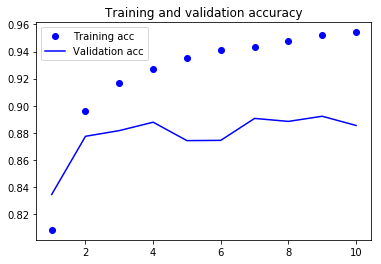

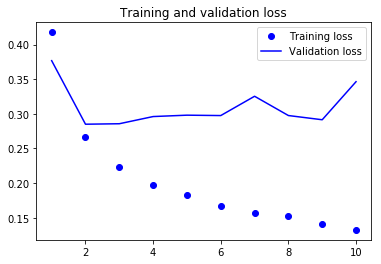

In [11]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()
